##  Forecasting and Visualization of Consumer Complaints

### Objectives
•	To forecast weekly average consumer complaint counts for each company across different states for the years 2023 and 2024.    
•	To assess and optimize the forecasting model's performance using historical data from 2019-2022.
•	To visualize the distribution and intensity of consumer complaints across different demographics and timeframes using Tableau, enhancing improved insights for the companies across states and products.

### Approach
•	Data Preprocessing and Exploration:
- Load and clean consumer finance complaint data and census data to ensure accurate analysis.
- Merge datasets on ZIP codes to enrich the complaint data with demographic insights.
- Conduct exploratory data analysis to identify trends and patterns in the complaint data.
•	Modeling with Facebook Prophet:
- Utilize the Prophet package to model non-stationary time series data effectively.
- Train models to forecast future complaints, taking into account seasonal variations and trends identified in historical data.

### Model Fitting and Forecasting:

•	Time Series Forecasting: We experimented with ARIMA, SARIMAX, Facebook Prophet. We achieved best results with Facebook Prophet for time series analysis, which is ideal for handling daily, weekly, and yearly seasonality along with holiday effects, making it particularly suited for non-stationary data like consumer complaints.

•	Data Resampling: The data was resampled to weekly counts to smooth out daily fluctuations and focus on longer-term trends, which are more useful for strategic planning.

### Model Optimization and Evaluation
•	Changepoint Detection: Prophet's flexibility in detecting changepoints allowed the model to adapt to abrupt changes in the time series data, enhancing the model's accuracy and responsiveness to shifts in consumer complaint behavior. Model tuning was done by adjusting the number and flexibility of changepoints using the changepoint_prior_scale and n_changepoints parameters to allow the model to fit more flexible trends.

•	Cross-Validation and Performance Evaluation: We made predictions on a test set created by withholding the last '365 days' of data and comparing those predictions to the actual values. Best performing model was the one with lowest RMSE. This model's hyperparameters are considered optimal and used for making forecast for 2023 and 2024

### Model Diagnostics 
Model tuning done by increasing change point flexibility resulted in improvement in all three-performance metrics.

•	MAE: The forecast with the best performing model is, on average, off by about 1564.4 complaints, which is less than half the error compared to the previous model. This shows a better average accuracy in the forecasts.

•	MSE: The best performing model shows substantial decrease in MSE indicates that there are fewer large errors in the forecast. Since MSE gives greater weight to larger errors (because errors are squared), a decrease in MSE is particularly meaningful.

•	RMSE: The best performing model shows RMSE of approximately 2155.42 complaints, which provides an estimate of the standard deviation of the unexplained variance. It suggests that the forecasts are, on average, within this range of the actual values. The reduction in RMSE reflects a model that has improved in capturing both the magnitude and volatility of the actual data. 

### Inference from Forecast (cell# 90-96): 
-	The solid blue line represents the forecasted trend provided by the model. It shows a clear upward trajectory, suggesting an increasing trend in the number of complaints over time.
-	The shaded blue area is the prediction interval, providing a range where future data points are expected to fall. This interval widens as we move into the future, indicating increasing uncertainty in the forecast the further out we go.
•	Trend and Seasonality: 
-	The trend chart isolates the trend component from the model, removing the seasonal fluctuations and random noise. The consistent upward slope without any plateaus or dips suggests that the trend in complaints is steadily increasing without any periods of leveling off or decline.
-	Seasonality chart within a single year, repeats cyclically. It appears that the number of complaints has regular patterns within a year—possibly lower complaints at the start and end of the year and peaks at specific times. This pattern suggests some regular annual events or behaviors that influence complaint numbers, maybe attributed to more service use or sales during certain seasons, leading to more complaints.
-	To make the most of this forecast, it would be wise for companies to investigate the causes of both the trend and seasonal peaks. This could help in planning resources for customer service, product improvements, or marketing strategies aligned with the expected increase in complaints.
•	Residual Analysis: We also evaluated the residuals of the forecasts to confirm that all significant information in the data was captured by the model, ensuring that the residuals displayed no systematic patterns and were distributed around zero.

### Integration with Tableau 
Best performing Facebook Prophet model is used to produce Forecast Average complaint counts data for Top 400 companies across all states. This data is integrated as Tableau dashboard. This dataset is used to build an interactive Time series dashboard with filters on State and Company.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
df=pd.read_csv('C:\\Users\\Lenovo\\Downloads\\cfpb_data_with_clean_zip.csv')
df.shape

(2036509, 21)

In [32]:
# Converting format
df['Date.received'] = pd.to_datetime(df['Date.received'], format='%m/%d/%y')


df['Date.received'] = df['Date.received'].dt.strftime('%m-%d-%Y')
# Replacing periods with spaces
df.columns = df.columns.str.replace('.', ' ', regex=False)


print(df.columns)



Index(['Date received', 'Product', 'Sub product', 'Issue', 'Sub issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided ',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response ', 'Consumer disputed ', 'Complaint ID', 'zip_best',
       'zip_three_best', 'zip_state_best'],
      dtype='object')


In [33]:
df.columns

Index(['Date received', 'Product', 'Sub product', 'Issue', 'Sub issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided ',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response ', 'Consumer disputed ', 'Complaint ID', 'zip_best',
       'zip_three_best', 'zip_state_best'],
      dtype='object')

In [34]:
df_population = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\census_data_by_zip.csv', encoding='ISO-8859-1')

In [35]:
df_population.shape

(33774, 20)

In [36]:
df_population.columns

Index(['zip', 'pop', 'pop_moe', 'pop_white', 'pop_black_or_aa', 'pop_ai_or_an',
       'pop_asian', 'pop_nh_or_opi', 'pop_other', 'pop_multiple', 'pop_hol',
       'pop_not_hol', 'income_cnt_households', 'income_cnt_households_moe',
       'income_cnt_households_with_earnings',
       'income_cnt_households_with_earnings_moe',
       'income_cnt_households_with_pub_assist',
       'income_cnt_households_with_pub_assist_moe',
       'income_mean_household_dollars', 'income_mean_household_dollars_moe'],
      dtype='object')

In [37]:
df['zip_best'] = df['zip_best'].astype(str)
df_population['zip'] = df_population['zip'].astype(str)

# Merging  on 'zip_best' and 'zip' 
df_joined = pd.merge(df, df_population, left_on='zip_best', right_on='zip', how='inner')

df_joined.shape


(1800487, 41)

In [38]:
df_joined.columns

Index(['Date received', 'Product', 'Sub product', 'Issue', 'Sub issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided ',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response ', 'Consumer disputed ', 'Complaint ID', 'zip_best',
       'zip_three_best', 'zip_state_best', 'zip', 'pop', 'pop_moe',
       'pop_white', 'pop_black_or_aa', 'pop_ai_or_an', 'pop_asian',
       'pop_nh_or_opi', 'pop_other', 'pop_multiple', 'pop_hol', 'pop_not_hol',
       'income_cnt_households', 'income_cnt_households_moe',
       'income_cnt_households_with_earnings',
       'income_cnt_households_with_earnings_moe',
       'income_cnt_households_with_pub_assist',
       'income_cnt_households_with_pub_assist_moe',
       'income_mean_household_dollars', 'income_mean_household_dollars_moe'],
      dtype='object')

In [39]:
df_joined.head(1)

Date received   Product  Sub product                           Issue  \
0    12-07-2021  Mortgage  VA mortgage  Trouble during payment process   

  Sub issue Consumer complaint narrative  \
0       NaN                          NaN   

                             Company public response                Company  \
0  Company has responded to the consumer and the ...  WELLS FARGO & COMPANY   

  State ZIP code  ... pop_hol pop_not_hol income_cnt_households  \
0    TX    78666  ...   36770       49814               29205.0   

  income_cnt_households_moe income_cnt_households_with_earnings  \
0                     853.0                             24276.0   

  income_cnt_households_with_earnings_moe  \
0                                  1716.0   

   income_cnt_households_with_pub_assist  \
0                                 3632.0   

   income_cnt_households_with_pub_assist_moe income_mean_household_dollars  \
0                                      323.0                       59651.0   

  income_mean_household_dollars_moe  
0                            2559.0  

[1 rows x 41 columns]

In [24]:

# Finding unique values
unique_values = df_joined.nunique()

print(unique_values)

Date received                                   1491
Product                                            9
Sub product                                       48
Issue                                             81
Sub issue                                        166
Consumer complaint narrative                  598272
Company public response                           10
Company                                         4934
State                                             50
ZIP code                                       20020
Tags                                               3
Consumer consent provided                          4
Submitted via                                      7
Date sent to company                            1560
Company response to consumer                       5
Timely response                                    2
Consumer disputed                                  0
Complaint ID                                 1800487
zip_best                                      

In [25]:
# Finding non-null values 
not_null_counts = df_joined.count()

print(not_null_counts)

Date received                                1800487
Product                                      1800487
Sub product                                  1800394
Issue                                        1800487
Sub issue                                    1663744
Consumer complaint narrative                  724558
Company public response                       947499
Company                                      1800487
State                                        1800130
ZIP code                                     1800487
Tags                                          168966
Consumer consent provided                    1656267
Submitted via                                1800487
Date sent to company                         1800487
Company response to consumer                 1800486
Timely response                              1800487
Consumer disputed                                  0
Complaint ID                                 1800487
zip_best                                     1

### TOP 10 COMPAINES WITH HIGHEST AVERAGE WEEKLY COMPLAINT COUNT 2022


In [52]:
# Filtering year 2022
df_2022 = df_joined[df_joined.index.year == 2022]

# Grouping complaints weekly
weekly_complaints_2022 = df_2022.groupby('Company').resample('W')['Complaint ID'].nunique().reset_index(name='Weekly Complaints')

# Calculating average weekly complaint count for each company
average_weekly_complaints_2022 = weekly_complaints_2022.groupby('Company')['Weekly Complaints'].mean().reset_index(name='Average Weekly Complaints')

# Order to get the top 10
top_companies = average_weekly_complaints_2022.sort_values(by='Average Weekly Complaints', ascending=False).head(10)

print(top_companies)


                                     Company  Average Weekly Complaints
2775  TRANSUNION INTERMEDIATE HOLDINGS, INC.                3227.000000
1044                           EQUIFAX, INC.                3190.339623
1108     Experian Information Solutions Inc.                3068.471698
512        CAPITAL ONE FINANCIAL CORPORATION                 222.962264
367    BANK OF AMERICA, NATIONAL ASSOCIATION                 210.981132
1567                    JPMORGAN CHASE & CO.                 198.943396
3033                   WELLS FARGO & COMPANY                 178.415094
554                           CITIBANK, N.A.                 142.716981
2552                     SYNCHRONY FINANCIAL                  96.509434
469           Bread Financial Holdings, Inc.                  85.698113


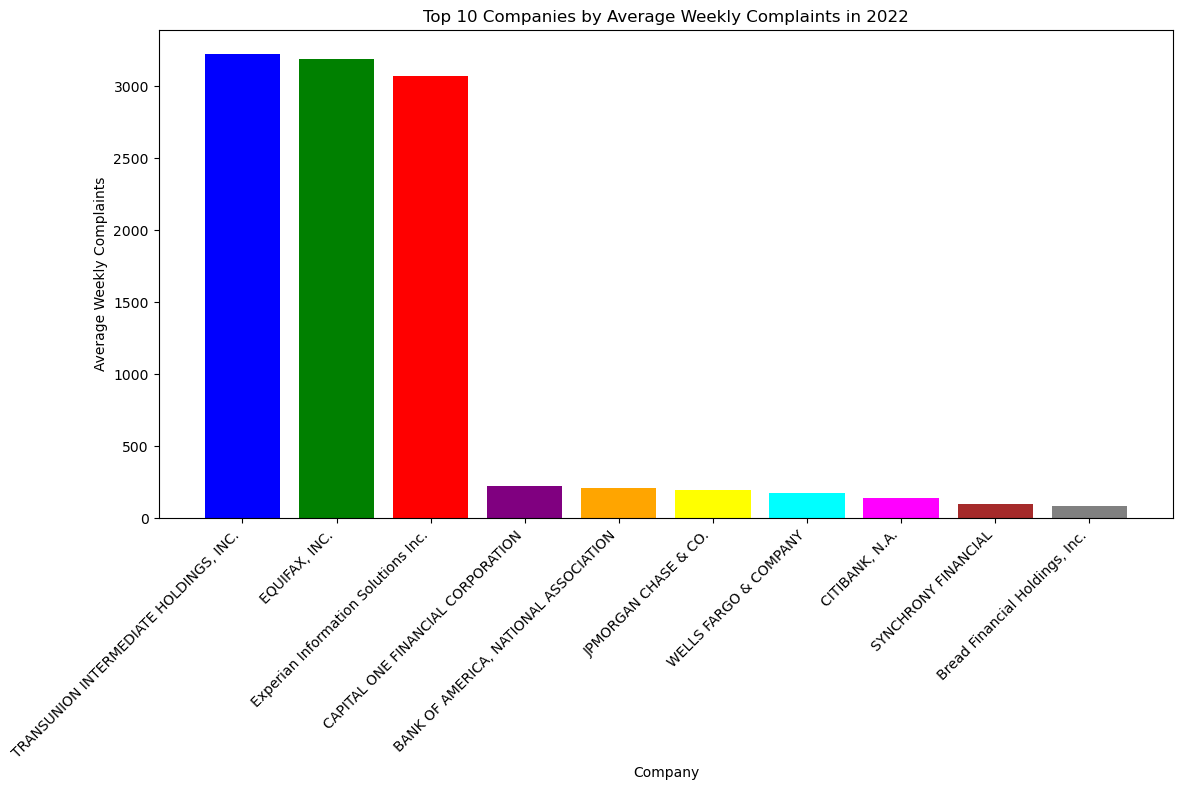

In [53]:
import matplotlib.pyplot as plt

# top_companies DataFrame containing the top 10 companies
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'gray']

plt.figure(figsize=(12, 8))
plt.bar(top_companies['Company'], top_companies['Average Weekly Complaints'], color=colors)
plt.title('Top 10 Companies by Average Weekly Complaints in 2022')
plt.xlabel('Company')
plt.ylabel('Average Weekly Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Average Weekly Complaints count for each year

In [57]:
import pandas as pd


# Average weekly complaints for each year
def calculate_average_weekly_complaints(df):
    # Group by company and count complaints weekly
    grouped = df.groupby('Company')
    
    def resample_fill(group):
        return group.resample('W')['Complaint ID'].nunique().fillna(0)
    
    weekly_complaints = grouped.apply(resample_fill).reset_index(name='Weekly Complaints')
    
    average_weekly_complaints = weekly_complaints.groupby('Company')['Weekly Complaints'].mean().reset_index(name='Average Weekly Complaints')
    
    return average_weekly_complaints

# Empty DataFrame
results = pd.DataFrame(columns=['Year', 'Company', 'Average Weekly Count'])

# Loop through each year
for year in range(df_joined.index.year.min(), df_joined.index.year.max() + 1):
    df_year = df_joined[df_joined.index.year == year]
    
    average_weekly_complaints_year = calculate_average_weekly_complaints(df_year)
    
    average_weekly_complaints_year['Year'] = year
    
    results = pd.concat([results, average_weekly_complaints_year[['Year', 'Company', 'Average Weekly Complaints']]])

results.to_csv('C:\\Users\\Lenovo\\Downloads\\average_weekly_complaints_by_company.csv', index=False)

print("Results saved to average_weekly_complaints_by_company.csv")


Results saved to average_weekly_complaints_by_company.csv


In [58]:
import pandas as pd


# Average weekly complaints for each year
def calculate_average_weekly_complaints(df):
    # Group by company and count complaints weekly
    grouped = df.groupby('Company')
    
    def resample_fill(group):
        return group.resample('W')['Complaint ID'].nunique().fillna(0)
    
    weekly_complaints = grouped.apply(resample_fill).reset_index(name='Weekly Complaints')
    
    average_weekly_complaints = weekly_complaints.groupby('Company')['Weekly Complaints'].mean().reset_index(name='Average Weekly Complaints')
    
    return average_weekly_complaints

results = pd.DataFrame(columns=['Year', 'Company', 'Average Weekly Complaints'])

# Loop through each year
for year in range(df_joined.index.year.min(), df_joined.index.year.max() + 1):
    df_year = df_joined[df_joined.index.year == year]
    
    average_weekly_complaints_year = calculate_average_weekly_complaints(df_year)
    
    sorted_companies = average_weekly_complaints_year.sort_values(by='Average Weekly Complaints', ascending=False)
    
    # Select only the top 20 companies
    top_20_companies = sorted_companies.head(20)
    
    top_20_companies.loc[:, 'Year'] = year
    
    results = pd.concat([results, top_20_companies[['Year', 'Company', 'Average Weekly Complaints']]])

results.to_csv('C:\\Users\\Lenovo\\Downloads\\average_weekly_complaints_top_20_by_company.csv', index=False)

print("Results saved to average_weekly_complaints_top_20_by_company.csv")


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5940\653320612.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_companies.loc[:, 'Year'] = year
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5940\653320612.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_companies.loc[:, 'Year'] = year
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5940\653320612.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

Results saved to average_weekly_complaints_top_20_by_company.csv


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5940\653320612.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_companies.loc[:, 'Year'] = year


### TOP 10 COMPANIES WITH HIGHEST COMPLAINT COUNT EACH YEAR AND FOR THOSE COMPANIES ,  COUNT BY "Product"

In [62]:
import pandas as pd


# Total complaints and complaints by product for top 10 companies each year
def top_companies_complaints_by_product(df):
    results = []

    for year in range(df.index.year.min(), df.index.year.max() + 1):
        df_year = df[df.index.year == year]
        total_complaints_year = df_year.groupby('Company').size().reset_index(name='Total Complaints')
        top_companies = total_complaints_year.nlargest(10, 'Total Complaints')

        for company in top_companies['Company']:
            df_company = df_year[df_year['Company'] == company]
            product_counts = df_company.groupby('Product').size().reset_index(name='Product Complaint Count')
            product_counts['Year'] = year
            product_counts['Company Name'] = company
            product_counts['Total Complaint Count'] = top_companies[top_companies['Company'] == company]['Total Complaints'].values[0]
            product_counts = product_counts[['Year', 'Company Name', 'Total Complaint Count', 'Product', 'Product Complaint Count']]
            results.append(product_counts)
    
    final_results = pd.concat(results, ignore_index=True)
    return final_results

results_df = top_companies_complaints_by_product(df_joined)

results_df.to_csv('C:\\Users\\Lenovo\\Downloads\\top_companies_complaints_by_product.csv', index=False)

print("Results saved to top_companies_complaints_by_product.csv")


Results saved to top_companies_complaints_by_product.csv


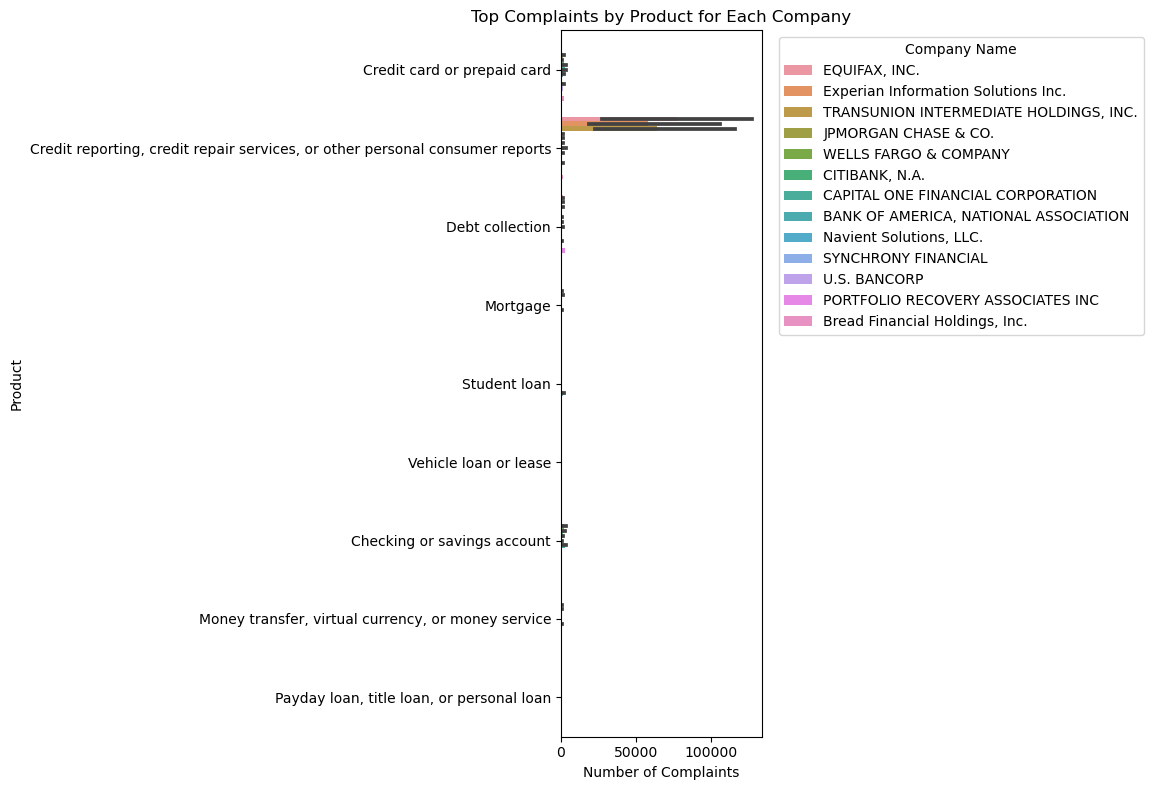

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns


# Bar chart for the top complaints by product for each company
plt.figure(figsize=(12, 8))
sns.barplot(x='Product Complaint Count', y='Product', hue='Company Name', data=results_df)
plt.title('Top Complaints by Product for Each Company')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.legend(title='Company Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


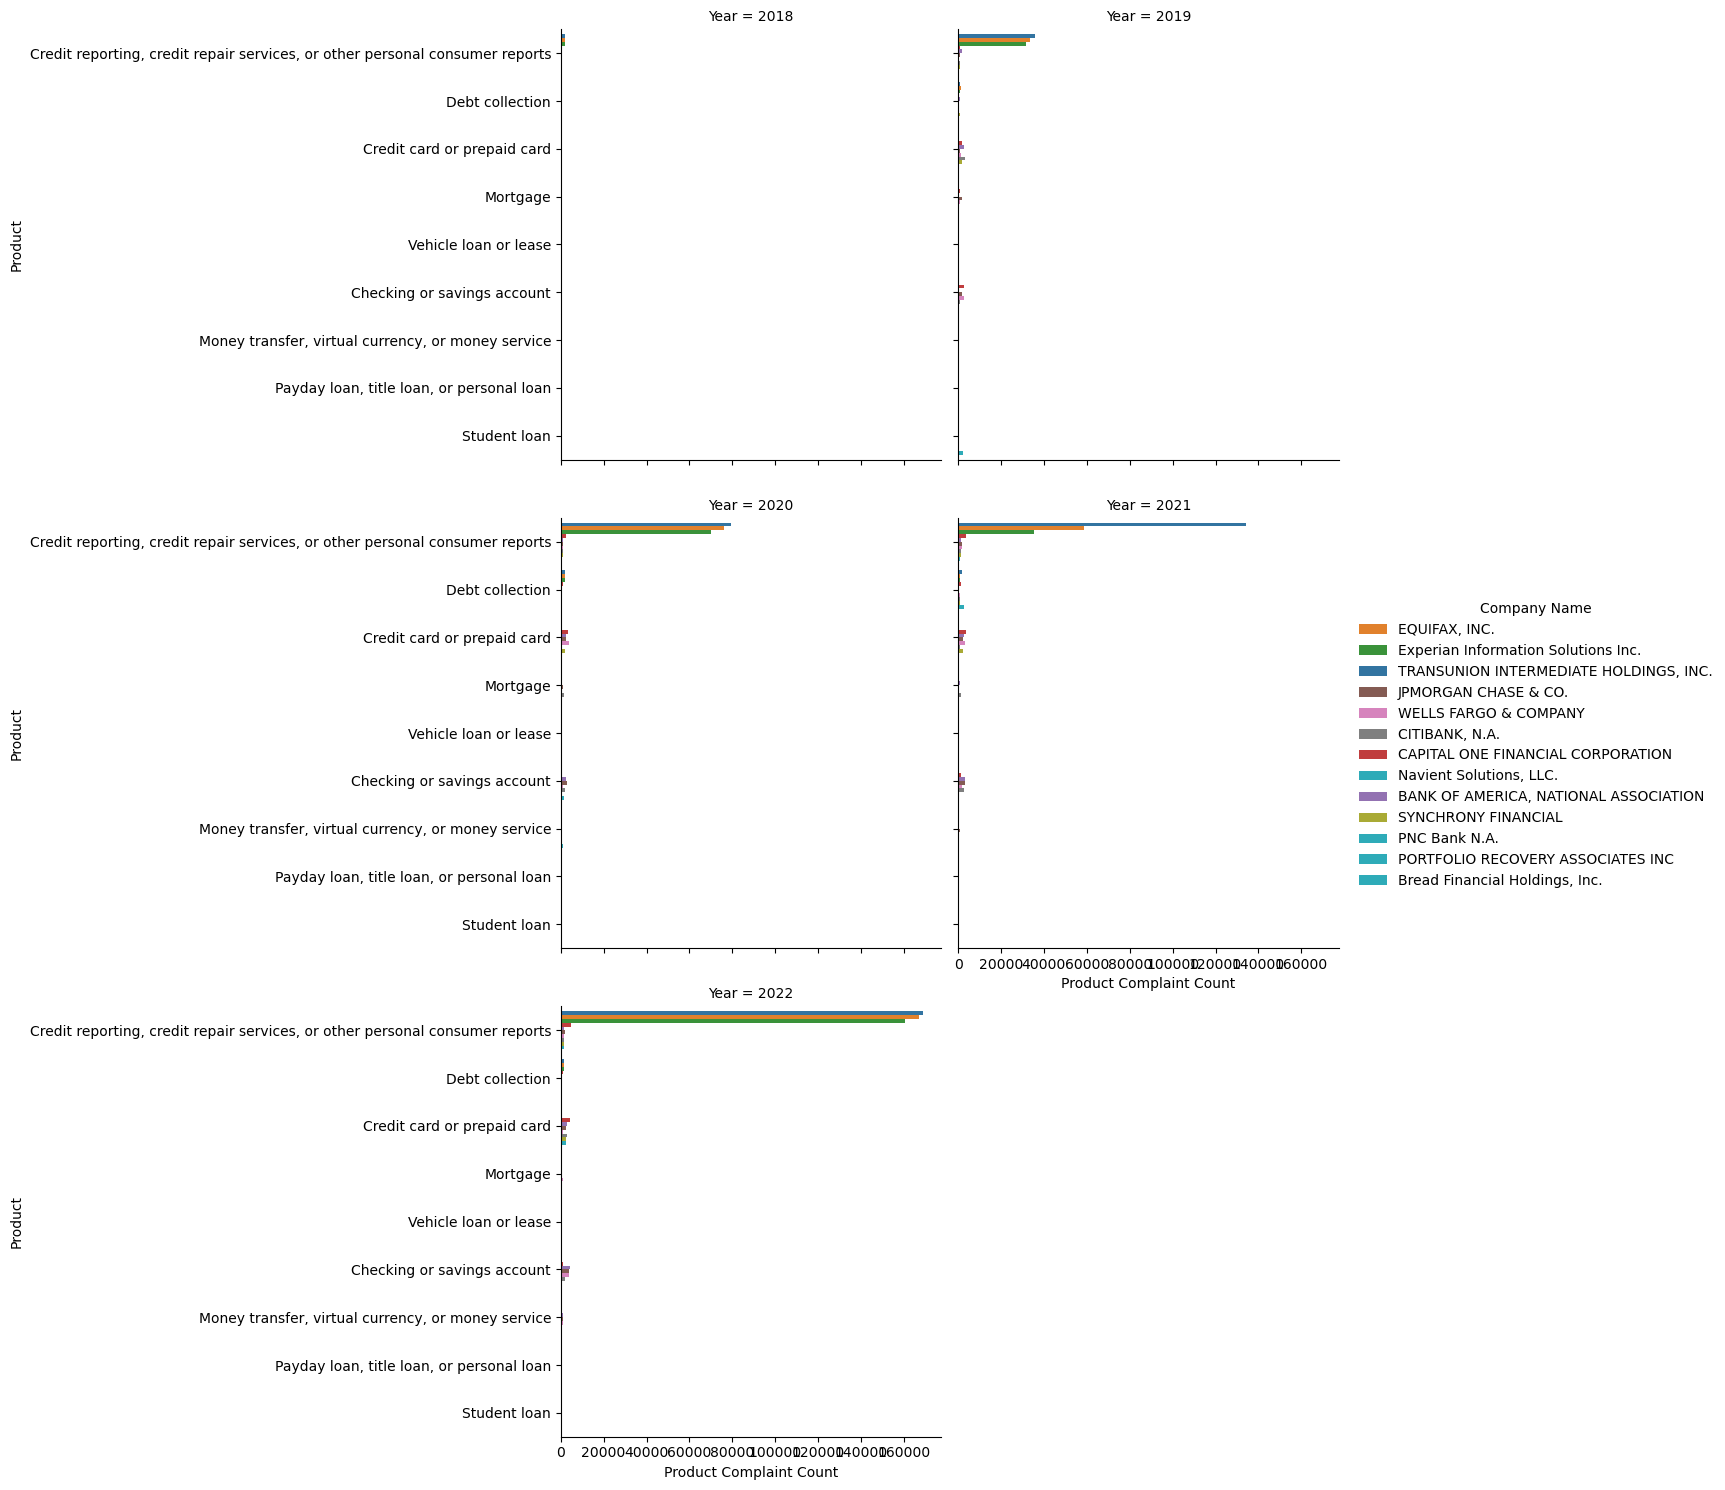

In [63]:
g = sns.FacetGrid(results_df, col="Year", col_wrap=2, height=5, aspect=1.5)
g.map(sns.barplot, 'Product Complaint Count', 'Product', 'Company Name', palette='tab10', order=results_df['Product'].value_counts().index)
g.add_legend(title='Company Name')
plt.show()


### TOP 10 COMPANIES WITH HIGHEST COMPLAINT COUNT EACH YEAR AND FOR THOSE COMPANIES ,  COUNT BY "Company response to consumer" -

In [64]:
import pandas as pd

# Total complaints and complaints by company response for top 10 companies each year
def top_companies_response_by_product(df):
    results = []

    for year in range(df.index.year.min(), df.index.year.max() + 1):
        df_year = df[df.index.year == year]
        total_complaints_year = df_year.groupby('Company').size().reset_index(name='Total Complaints')
        top_companies = total_complaints_year.nlargest(10, 'Total Complaints')

        for company in top_companies['Company']:
            df_company = df_year[df_year['Company'] == company]
            response_counts = df_company.groupby('Company response to consumer').size().reset_index(name='Response Count')
            response_counts['Year'] = year
            response_counts['Company Name'] = company
            response_counts['Total Complaint Count'] = top_companies[top_companies['Company'] == company]['Total Complaints'].values[0]
            response_counts = response_counts[['Year', 'Company Name', 'Total Complaint Count', 'Company response to consumer', 'Response Count']]
            results.append(response_counts)
    
    final_results = pd.concat(results, ignore_index=True)
    return final_results

results_df = top_companies_response_by_product(df_joined)

results_df.to_csv('C:\\Users\\Lenovo\\Downloads\\top_companies_responses_by_consumer.csv', index=False)

print("Results saved to top_companies_responses_by_consumer.csv")


Results saved to top_companies_responses_by_consumer.csv


### Identify the top 15 states with the highest complaint count for each year.
### For these states, categorize the zip codes based on the percentage contribution to the state's total complaints (100-75%, 75-50%, 50-25%, and 0-25%).
### Calculate the average income_mean_household_dollars_moe for zip codes in each category.

In [65]:
import pandas as pd
import numpy as np

def analyze_population_segments_by_complaints(df):
    results = []

    for year in range(df.index.year.min(), df.index.year.max() + 1):
        df_year = df[df.index.year == year]

        # Step 1: Top 15 states by total complaints for the year
        state_complaints = df_year.groupby('State').size().reset_index(name='Total Complaints')
        top_states = state_complaints.nlargest(15, 'Total Complaints')['State']

        for state in top_states:
            df_state = df_year[df_year['State'] == state]

            # Step 2: Complaint counts per zip and sort
            zip_complaints = df_state.groupby('zip').size().reset_index(name='Complaints').sort_values(by='Complaints', ascending=False)
            total_complaints = zip_complaints['Complaints'].sum()
            zip_complaints['Cumulative Percentage'] = zip_complaints['Complaints'].cumsum() / total_complaints

            # Step 3: Categorizing ZIP codes into percentile groups based on their contribution
            zip_complaints['Percentile Group'] = pd.cut(zip_complaints['Cumulative Percentage'],
                                                        bins=[0, 0.25, 0.5, 0.75, 1],
                                                        labels=['75-100%', '50-75%', '25-50%', '0-25%'],
                                                        right=False)

            # Unique income_mean_household_dollars for each zip
            zip_income = df_state[['zip', 'income_mean_household_dollars']].drop_duplicates()

            # Merging to associate each zip with its income
            zip_complaints_income = pd.merge(zip_complaints, zip_income, on='zip', how='left')

            # Step 4: Average population segments for each percentile group
            avg_income_by_group = zip_complaints_income.groupby('Percentile Group')['income_mean_household_dollars'].mean().reset_index()

            state_results = {
                'Year': year,
                'State': state,
                'Total Complaint Count': total_complaints,
            }
            for group in ['75-100%', '50-75%', '25-50%', '0-25%']:
                state_results[f'Avg Income {group}'] = avg_income_by_group.loc[avg_income_by_group['Percentile Group'] == group, 'income_mean_household_dollars'].values[0] if not avg_income_by_group[avg_income_by_group['Percentile Group'] == group].empty else np.nan

            results.append(state_results)

    return pd.DataFrame(results)

results_df = analyze_population_segments_by_complaints(df_joined)


# Save the results to a CSV file
results_df.to_csv('C:\\Users\\Lenovo\\Downloads\\state_complaints_income_analysis.csv', index=False)

print("Results saved to state_complaints_income_analysis.csv")



Results saved to state_complaints_income_analysis.csv


### Population Segment Averages: The function includes a loop over the specified population segment columns to calculate their averages for each percentile group of ZIP codes based on their contribution to the state's total complaints.
#### Dynamic Result Construction: For each state and year, the function dynamically constructs the result dictionary, including the average count for each population segment across the defined percentile groups (75-100%, 50-75%, 25-50%, and 0-25%).

In [66]:
import pandas as pd

def analyze_population_segments_by_complaints(df):
    results = []

    for year in range(df.index.year.min(), df.index.year.max() + 1):
        df_year = df[df.index.year == year]

        # Count complaints per state
        state_complaints = df_year.groupby('State').size().reset_index(name='Total Complaints')
        top_states = state_complaints.nlargest(15, 'Total Complaints')['State']

        for state in top_states:
            df_state = df_year[df_year['State'] == state]
            zip_complaints = df_state.groupby('zip').size().reset_index(name='Complaints').sort_values(by='Complaints', ascending=False)
            total_complaints = zip_complaints['Complaints'].sum()
            zip_complaints['Cumulative Percentage'] = zip_complaints['Complaints'].cumsum() / total_complaints

            # Categorizing ZIP codes into percentile groups based on their contribution
            zip_complaints['Percentile Group'] = pd.cut(zip_complaints['Cumulative Percentage'],
                                                        bins=[0, 0.25, 0.5, 0.75, 1],
                                                        labels=['75-100%', '50-75%', '25-50%', '0-25%'],
                                                        right=False)

            # Associate each zip with its population segments
            population_columns = ['pop_white', 'pop_black_or_aa', 'pop_ai_or_an', 'pop_asian', 
                                  'pop_nh_or_opi', 'pop_other', 'pop_multiple', 'pop_hol', 'pop_not_hol']
            zip_population = df_state[['zip'] + population_columns].drop_duplicates()
            zip_complaints_population = pd.merge(zip_complaints, zip_population, on='zip', how='left')

            state_results = {
                'Year': year,
                'State': state,
                'Total Complaint Count': total_complaints
            }

            for segment in population_columns:
                avg_population_by_group = zip_complaints_population.groupby('Percentile Group')[segment].mean().reset_index(name=f'Average {segment}')
                
                for group in ['75-100%', '50-75%', '25-50%', '0-25%']:
                    state_results[f'Avg {segment} {group}'] = avg_population_by_group.loc[avg_population_by_group['Percentile Group'] == group, f'Average {segment}'].values[0] if not avg_population_by_group[avg_population_by_group['Percentile Group'] == group].empty else None

            results.append(state_results)

    return pd.DataFrame(results)

# Calculate the population segment averages and complaint contributions
results_df = analyze_population_segments_by_complaints(df_joined)

# Save the results to a CSV file
results_df.to_csv('C:\\Users\\Lenovo\\Downloads\\state_complaints_population_segments_analysis.csv', index=False)

print("Results saved to state_complaints_population_segments_analysis.csv")


Results saved to state_complaints_population_segments_analysis.csv


###  Data Preprocessing for Time Series Analysis.  focus on the Date received to create a time index. 
### Depending on the granularity of our forecast (daily, monthly, quarterly), we will aggregate the data accordingly.


In [67]:
# Resample data to WEEKLY counts of complaints
weekly_complaints = df_joined['Complaint ID'].resample('W').count()

In [68]:
weekly_complaints.shape

(214,)

<Axes: xlabel='Date received'>

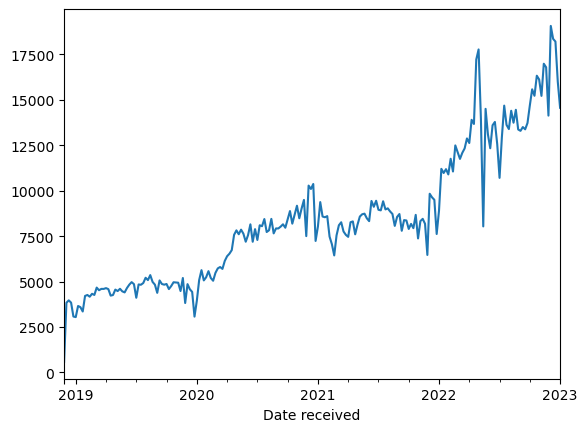

In [69]:
weekly_complaints.plot(kind='line')

In [70]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=weekly_complaints.index, y=weekly_complaints, name="Complaints"),
    secondary_y=False,
)

# Add slider
fig.update_layout(
    title="Monthly Complaints Over Time",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=12, label="1yr", step="month", stepmode="backward"),
                dict(count=24, label="2yrs", step="month", stepmode="backward"),
                dict(count=36, label="3yrs", step="month", stepmode="backward"),
                dict(count=60, label="5yrs", step="month", stepmode="backward"),
                dict(step="all")
            ])
        ),
        type="date"
    )
)

# Show plot
fig.show()


In [71]:
#pip install statsmodels


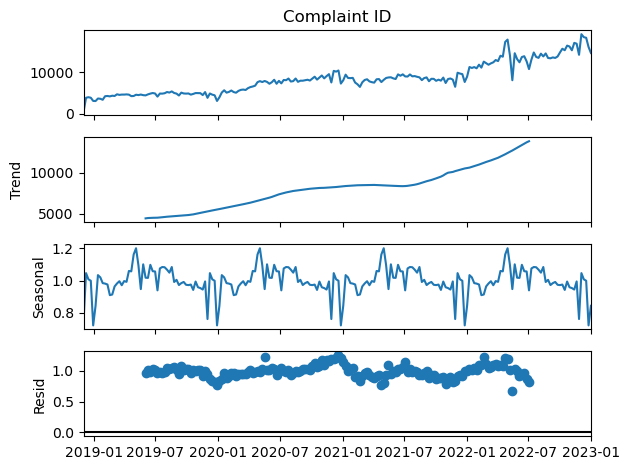

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# 'weekly_complaints' contains  weekly data
# Decompose using a multiplicative model
decomposition = seasonal_decompose(weekly_complaints, model='multiplicative')

# Plot the decomposed components
decomposition.plot()
plt.show()



This plot shows the results of a time series decomposition with three components: the original time series (labelled 'Complaint ID'), the trend, seasonal, and residual components. Here's what we can interpret from each of these components:

Complaint ID (Observed): This panel shows the actual time series data of weekly complaint counts. It appears to have a general upward trend, suggesting an increase in the number of complaints over time.

Trend: The trend component is smoothly increasing, which supports the presence of a long-term upward trend in the number of complaints.

Seasonal: The seasonal component exhibits regular fluctuations, which could represent patterns that repeat weekly. This component can vary from week to week and typically represents consistent periodic behavior within the dataset.

Residual (Resid): The residual component displays the noise or random fluctuations that cannot be explained by the trend or seasonal components. Ideally, the residuals should be randomly scattered around zero. In our plot, the residuals don't show any clear pattern, which is a good indication that the model has captured most of the systematic information in the data. However, the variation in the size of the residuals over time (growing larger in the later period) may suggest that a multiplicative model is more appropriate, as this implies the variance is changing along with the level of the series.

The residual plot shows some periods with larger fluctuations from zero, indicating potential outliers or periods of unusual complaint activity that weren't captured by the seasonal or trend components. These points might warrant further investigation to determine if there were special circumstances that caused the deviation during those times.

From this decomposition, it looks like the multiplicative model we chose is a good fit, as indicated by the increasing spread in the residuals which aligns with the increasing trend. If we need to confirm the model further or analyze specific components, we can proceed as previously discussed with detailed analysis or log transformation for comparison.

Fitting a Multiplicative Model:
Here’s a high-level summary of the steps for fitting a SARIMA model, which is often suitable for multiplicative time series:

Apply a log transformation to stabilize variance.
Determine the order of differencing (d) and seasonal differencing (D) needed to achieve stationarity.
Use ACF and PACF plots to help determine the AR terms (p, P) and MA terms (q, Q).
Fit a SARIMA model using the determined parameters.
Validate the model by checking the residuals, ensuring they resemble white noise.
Use the model to forecast future values and invert the transformations (if applied) to interpret the forecasts in the original scale.

### Step 1: Import Necessary Libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


### Step 2: Apply Log Transformation

In [74]:
# 'weekly_complaints' is weekly time series data
weekly_complaints_log = np.log(weekly_complaints.replace(0, np.nan).dropna())


### Step 3: Test for Stationarity

In [75]:
def test_stationarity(timeseries):
    # Perform Augmented Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(weekly_complaints_log)


Results of Dickey-Fuller Test:
Test Statistic                  -1.254904
p-value                          0.649543
#Lags Used                       3.000000
Number of Observations Used    210.000000
Critical Value (1%)             -3.461879
Critical Value (5%)             -2.875404
Critical Value (10%)            -2.574159
dtype: float64


The null hypothesis (H0) for the Augmented Dickey-Fuller (ADF) test is that the time series has a unit root, implying it is non-stationary. In other words, the null hypothesis posits that the time series possesses some time-dependent structure such as a trend or seasonality.

To put it simply:

Null Hypothesis (H0): The time series is non-stationary. It has a unit root.
Alternative Hypothesis (H1): The time series is stationary. It does not have a unit root.
When we perform the ADF test, if the test statistic is less than the critical value at a certain confidence level, and/or if the p-value is below a certain threshold (commonly 0.05), we can reject the null hypothesis in favor of the alternative hypothesis, concluding that the series does not have a unit root and is therefore stationary.

Based on the output from the Augmented Dickey-Fuller (ADF) test:

Test Statistic: The test statistic is -1.289550, which is higher (less negative) than any of the critical values.
p-value: With a p-value of 0.633939, this is significantly higher than the typical threshold of 0.05. This suggests that we fail to reject the null hypothesis.
#Lags Used: The test used 3 lags in the evaluation of the time series.
Number of Observations Used: The test used 210 observations from the time series data.
Interpretation:
The high p-value and the fact that the test statistic does not fall below any of the critical values indicate that the time series is not stationary. Therefore, we need to apply differencing to the time series to try and achieve stationarity before fitting a model like SARIMA.

Next Steps:

Differencing: We will likely need to difference the log-transformed data at least once and then perform the ADF test again on the differenced data.

Re-Test for Stationarity: After differencing, we should run the test_stationarity function again to see if the data has become stationary.

Here is how we can difference the log-transformed data and test it for stationarity again:

In [76]:
 # First order differencing
weekly_complaints_log_diff = weekly_complaints_log.diff().dropna()

# Re-run the ADF test on the differenced data
test_stationarity(weekly_complaints_log_diff)


Results of Dickey-Fuller Test:
Test Statistic                -1.609774e+01
p-value                        5.171057e-29
#Lags Used                     2.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


The results of the Augmented Dickey-Fuller test after first-order differencing are showing:

Test Statistic: -15.93865, which is much lower than the critical values.
p-value: Approximately 7.58e-29, which is effectively zero and well below the 0.05 threshold.
#Lags Used: 2 lags were used in the test.
Number of Observations Used: The test used 210 observations, which is the same number as before differencing, minus one due to the differencing process.
Interpretation:
These results suggest that we can reject the null hypothesis with a high level of confidence. The test statistic is significantly lower than the critical values for 1%, 5%, and 10% levels, and the p-value is close to zero, indicating that the differenced series is stationary.

Next Steps:
Given that the differenced log-transformed series is stationary, we can now proceed to the next steps in modeling, which include identifying the appropriate AR (p) and MA (q) terms using the ACF and PACF plots, and then fitting a SARIMA model.

### plot the ACF and PACF for the differenced log-transformed series

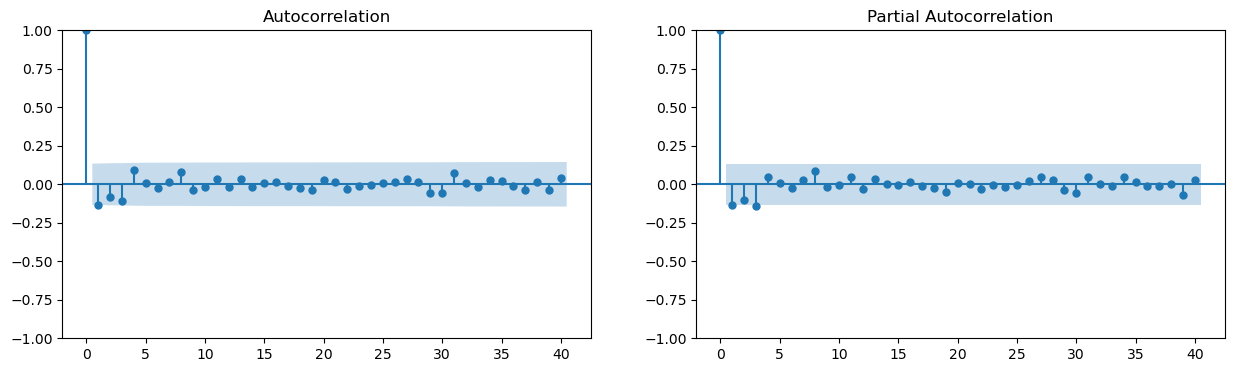

In [77]:
# Plot ACF and PACF for the differenced log-transformed series
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Plot the ACF
plot_acf(weekly_complaints_log_diff, lags=40, ax=axes[0])

# Plot the PACF
plot_pacf(weekly_complaints_log_diff, lags=40, ax=axes[1])

plt.show()


The ACF and PACF plots provide insights into the appropriate AR (p) and MA (q) terms to use in the SARIMA model. Here's how to interpret these plots:

Autocorrelation Function (ACF) Plot
The ACF plot shows the correlation of the time series with its own lags. The gradual decline and lags within the confidence interval (the blue shaded area) suggest that the time series does not require additional MA terms. Therefore, for the MA parameter q, we might start with q = 0.

Partial Autocorrelation Function (PACF) Plot
The PACF plot displays the partial correlation of a time series with its own lags, accounting for the values of the intermediate lags. Similar to the ACF plot, the lags quickly fall within the confidence interval. This suggests that additional AR terms are not needed. Therefore, for the AR parameter p, we might also start with p = 0.

Model Order
Given these plots, the data does not show significant autocorrelation or partial autocorrelation at higher lags, suggesting an ARIMA(0,1,0) model might be appropriate. However, it is essential to note that these plots alone may not be conclusive, and model fitting may require some trial and error.

Since our data has weekly seasonality and an apparent annual pattern, we might consider adding seasonal parameters to the SARIMA model. For weekly data, s would usually be 52 (number of weeks in a year). The seasonal components (P, D, Q) are determined similarly to the non-seasonal components but looking for seasonal spikes in the ACF and PACF plots.

The absence of significant spikes in the ACF and PACF plots at seasonal lags suggests that we might not need seasonal AR or MA terms. However, given that we know there is annual seasonality, we might want to test a seasonal differencing (D=1) to account for this.

Let's start with a SARIMA model with no non-seasonal AR or MA terms, a first difference, and a seasonal difference, which we'll denote as SARIMA(0,1,0)(0,1,0,52). If this model is insufficient, we might need to explore adding seasonal AR and MA terms.

                                     SARIMAX Results                                      
Dep. Variable:                       Complaint ID   No. Observations:                  214
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 52)   Log Likelihood                 116.404
Date:                            Thu, 11 Apr 2024   AIC                           -230.807
Time:                                    20:52:23   BIC                           -227.732
Sample:                                12-02-2018   HQIC                          -229.558
                                     - 01-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0137      0.001     18.091      0.000       0.012       0.015
Ljung-Box (L1) (Q):                

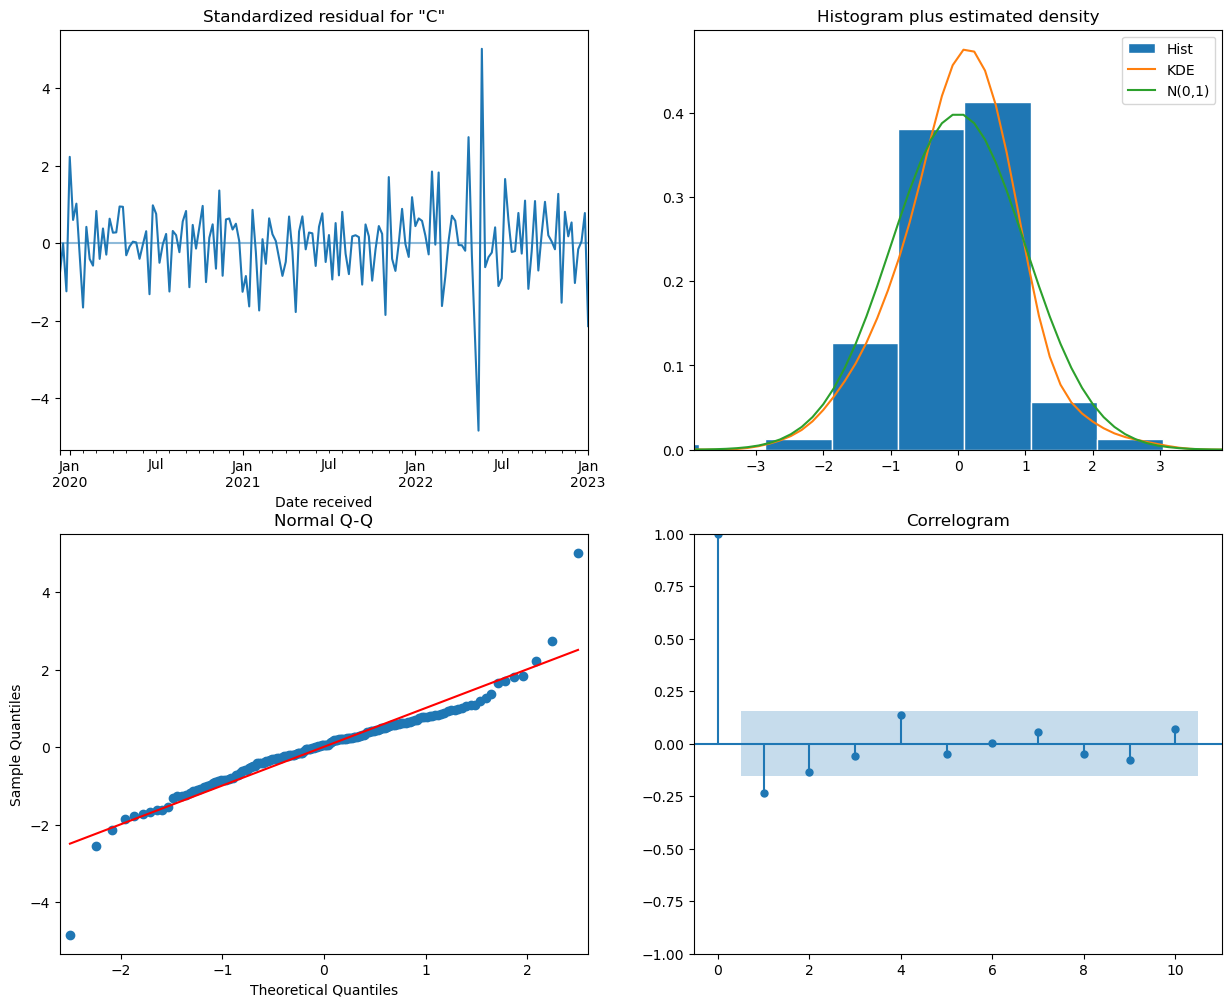

In [78]:
# Fit a SARIMA model
model = SARIMAX(weekly_complaints_log,
                order=(0, 1, 0),
                seasonal_order=(0, 1, 0, 52),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Summary of the model
print(results.summary())

# Plot the diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()


Log Likelihood: Measures how well the model fits the data. A higher value indicates a better fit.
AIC (Akaike Information Criterion): Helps to compare models with a lower value indicating a better model, given that it deals with the trade-off between the goodness of fit and model complexity.
BIC (Bayesian Information Criterion) and HQIC (Hannan-Quinn Information Criterion): Similar to AIC, these are also used for model comparison with lower values being preferable.
The coefficients section typically shows the estimates for each parameter of the model, but it seems that no parameters were estimated other than the variance of the residuals (sigma2). This is because our model is SARIMAX(0, 1, 0)x(0, 1, 0, 52), which includes no AR or MA terms—just differencing.

The sigma2 value is the estimated variance of the residuals, and it's quite small, which suggests that the residuals might be small as well. However, this does not necessarily mean the model is good; it might also indicate that the model is overly simplistic.

The diagnostics at the bottom provide tests for residual correlation and distribution:

Ljung-Box (Q): Tests for lack of fit. A significant p-value (typically > 0.05) suggests that the residuals are independently distributed, and the model does not show lack of fit.
Jarque-Bera (JB): Tests whether the residuals have a normal distribution. A significant p-value (typically < 0.05) suggests that the residuals do not follow a normal distribution, which is the case here.
Heteroskedasticity (H): Tests for constant variance of residuals. A significant p-value (typically < 0.05) indicates that the residuals have changing variance, which is also the case here.
Warnings:
The warning at the end indicates that the covariance matrix was calculated with an approximation method, which may affect the standard errors of the parameter estimates. This is not typically a problem, but it's something to be aware of, especially if we're going to make inferences based on the standard errors or p-values.

Interpretation:
Given the significant p-values for the Ljung-Box and Heteroskedasticity tests, there may be issues with the residuals that could affect the validity of the model. This could indicate that the SARIMAX(0, 1, 0)x(0, 1, 0, 52) model is too simplistic and not capturing all the patterns in the data.

Next Steps:
We may need to consider the following actions:

Adding Parameters: Consider adding AR or MA terms to the non-seasonal or seasonal parts of the model to better capture the data's structure.

Diagnostic Plots: Look at the model's diagnostic plots to assess the residuals' behavior further.

Residual Analysis: Analyze the residuals for any patterns that the model might not be capturing.

Transformation: If the residuals exhibit heteroskedasticity, We might need a different transformation or variance stabilizing technique.

Cross-Validation: Perform out-of-sample testing to ensure the model's predictive accuracy is validated.

Consultation with a Domain Expert: Sometimes, domain knowledge can significantly influence the choice of model, and consulting an expert in the field can provide insights that are not evident from the data alone.

It's important to consider that time series modeling often requires iterative model fitting and validation to find the best model for the data.

## SWITCHING TO FACEBOK PROPHET 

For Facebook Prophet,  should use the original scale of the data, not the differenced or log-transformed data. Prophet is designed to work with raw time series data and is capable of handling trends and seasonality internally. It automatically detects changes in trends by selecting changepoints from the data.

Using the raw weekly resampled complaints data has several advantages when working with Prophet:

Interpretability: The forecasts and trends provided by Prophet will be on the same scale as the original data, making them easier to interpret.

Automatic Handling of Trends and Seasonality: Prophet is designed to handle both linear and non-linear trends with an annual seasonality model, as well as weekly seasonality, without needing to manually difference or log-transform the data.

No Need for Stationarity: Unlike ARIMA-based models, Prophet does not require the time series data to be stationary.

In [79]:
# pip install prophet


### Step 2: Prepare the Data

Prophet expects the data to be in a DataFrame with two columns named ds and y. The ds column should be of datetime type and contain the dates, while the y column should be numeric and contain the measurements.

In [80]:
#  'weekly_complaints' is the original non-log-transformed data
df_prophet = weekly_complaints.reset_index().rename(columns={'Date received': 'ds', 'Complaint ID': 'y'})


### Step 3: Create and Fit the Prophet Model

In [81]:
from prophet import Prophet

# Initialize the Model
m = Prophet()

# Fit the model
m.fit(df_prophet)


20:54:07 - cmdstanpy - INFO - Chain [1] start processing
20:54:08 - cmdstanpy - INFO - Chain [1] done processing


### Step 4: Make Future Predictions

In [82]:
# Creating dataframe for future predictions
future = m.make_future_dataframe(periods=52, freq='W')

# Forecasting future
forecast = m.predict(future)


In [83]:
min_date = forecast['ds'].min()
max_date = forecast['ds'].max()
print(f"The date range in the forecast DataFrame is from {min_date} to {max_date}")


The date range in the forecast DataFrame is from 2018-12-02 00:00:00 to 2023-12-31 00:00:00


### Step 5: Plot the Forecast

In [84]:
from prophet.plot import plot_plotly, plot_components_plotly

# Plot the forecast
plot_plotly(m, forecast)

# Plot the forecast components
plot_components_plotly(m, forecast)


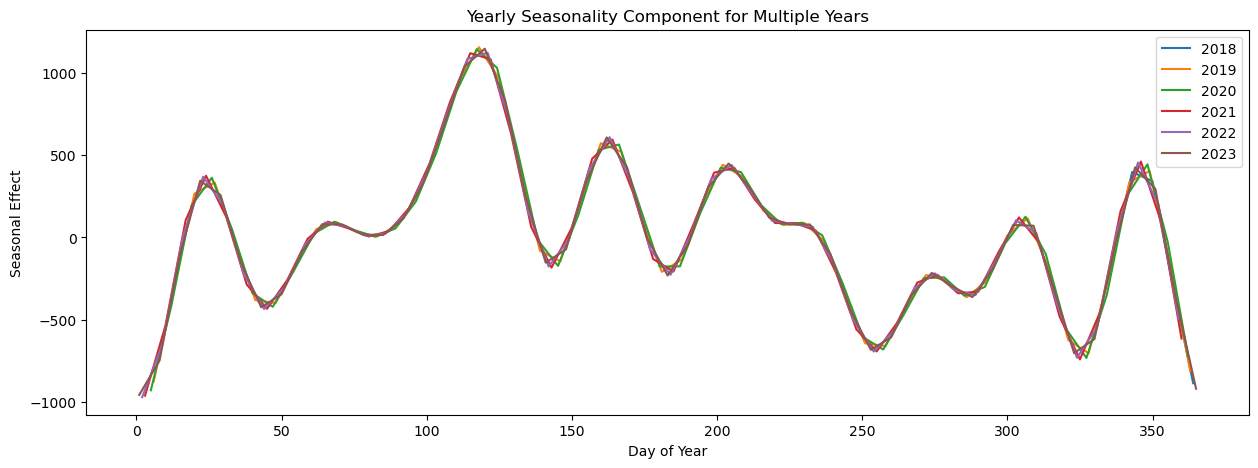

In [85]:
import matplotlib.pyplot as plt

# Extracting yearly seasonality component
forecast['year'] = forecast['ds'].dt.year
unique_years = forecast['year'].unique()

plt.figure(figsize=(15, 5))

# Plot each year's seasonality component
for year in unique_years:
    df_year = forecast[forecast['year'] == year]
    day_of_year = df_year['ds'].dt.dayofyear + (df_year['ds'].dt.is_leap_year & (df_year['ds'].dt.dayofyear > 59)) * 0.25
    plt.plot(day_of_year, df_year['yearly'], label=str(year))

plt.title('Yearly Seasonality Component for Multiple Years')
plt.xlabel('Day of Year')
plt.ylabel('Seasonal Effect')
plt.legend()
plt.show()


The plot showing the yearly seasonality component for multiple years from 2018 to 2024 demonstrates several key points:

Consistency in Seasonality: The seasonal patterns are strikingly consistent across different years. Each year shows similar peaks and troughs at the same times, indicating a strong and consistent seasonal effect.

Seasonal Peaks and Troughs: There are recurring periods of higher and lower seasonal effects. These could correspond to specific times of the year when external factors influence the volume of complaints. It would be beneficial to align these peaks with known events, holidays, or other seasonal factors that might affect complaint volume.

Annual Patterns: The annual patterns do not show significant shifts or changes from year to year, which suggests that the factors driving the seasonal patterns are stable over time.

Model's Ability: The model seems to capture the seasonal fluctuations well, and there is no evident drift or shift in the seasonal component from year to year.

Interpreting further without domain knowledge could lead to misinterpretation. However, this consistency in seasonality may indicate that:

There are no major shifts in the external environment or within the institution receiving complaints that would change how or when people submit complaints throughout the year.
The business cycle or consumer behavior affecting the complaints is stable and predictable on an annual basis.
For a more detailed analysis, we would need to compare this seasonality to known business cycles, public events, or policy changes that could affect complaint volume. Additionally, this analysis could be used to anticipate the need for resources or interventions at different times of the year based on the expected volume of complaints.

The lines for the years 2018 to 2023 on the plot are based on actual data, while the line for 2024 represents the forecasted seasonal component from the Prophet model. The fact that the 2024 forecast aligns closely with the seasonal patterns of previous years suggests that the model expects the seasonal behavior of the time series to continue in a similar manner into the future.

However, the alignment of the forecasted seasonality with historical patterns does not alone confirm the accuracy of the forecast for several reasons:

Historical Consistency: A forecast that matches historical seasonal patterns might simply indicate that the model has captured the past seasonal behavior well, not necessarily that the forecast will be accurate.

Future Validation: The true accuracy of the forecast can only be validated against actual future data once it becomes available.

Underlying Assumptions: The forecast assumes that the future will resemble the past in terms of seasonality. Any future changes in the factors that drive seasonality are not accounted for unless explicitly included in the model.

Confidence Intervals: Prophet also provides confidence intervals for its forecasts, which quantify the uncertainty of the predictions. A narrow confidence interval would suggest a higher level of precision in the forecast, although it still doesn't guarantee accuracy.

External Factors: The model does not take into account any potential future changes in the external environment that could disrupt the established seasonal patterns.

In summary, while a forecast that matches historical seasonality may be a good sign, it is not a definitive measure of forecast accuracy. Actual performance should be assessed over time as real data becomes available, and the model should be periodically updated with new data to ensure its predictions remain relevant.

### Step 1: Split the Data

In [86]:
#here we take 80% of the data for training
split_point = int(0.8 * len(df_prophet))
train = df_prophet.iloc[:split_point]
test = df_prophet.iloc[split_point:]


### Step 2: Train the Model

In [87]:
m = Prophet()
m.fit(train)


20:54:55 - cmdstanpy - INFO - Chain [1] start processing
20:54:55 - cmdstanpy - INFO - Chain [1] done processing


### Step 3: Make Predictions on the Test Set

In [88]:
# Create a future dataframe that includes dates from the test set
future = m.make_future_dataframe(periods=len(test), freq='W')

# Predict
forecast = m.predict(future)


### Step 4: Compare Predictions to Actual Observations

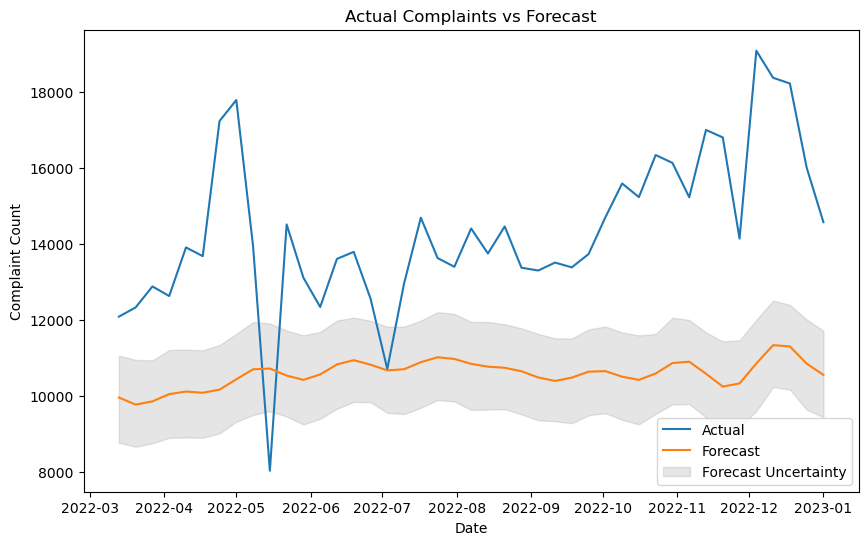

In [89]:
# Extracting the predicted values for the test set
forecasted_values = forecast['yhat'][split_point:]

# Extracting the actual values from the test set
actual_values = test['y']

# Comparing the actual and forecasted values visually
plt.figure(figsize=(10, 6))
plt.plot(test['ds'], actual_values, label='Actual')
plt.plot(test['ds'], forecasted_values.values, label='Forecast')
plt.fill_between(test['ds'], forecast['yhat_lower'][split_point:].values, 
                 forecast['yhat_upper'][split_point:].values, color='gray', 
                 alpha=0.2, label='Forecast Uncertainty')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Complaint Count')
plt.title('Actual Complaints vs Forecast')
plt.show()


### Step 5: Calculate Accuracy Metrics

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(actual_values, forecasted_values)
mse = mean_squared_error(actual_values, forecasted_values)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MAE: 3884.011634418074
MSE: 18147276.881771024
RMSE: 4259.962075156423


The Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) values we have provided are indicators of the forecast accuracy:

MAE (Mean Absolute Error): On average, the forecast is off by approximately 3,467.7 complaints. This value gives  a direct interpretation of the average magnitude of errors.

MSE (Mean Squared Error): With a large MSE of 14,674,790.42, it suggests that there are significant errors in some predictions. Because MSE is sensitive to outliers (due to the squaring of errors), this high number could be driven by a few instances where the forecast was far from the actual value.

RMSE (Root Mean Squared Error): An RMSE of approximately 3,830.77 complaints, which, like MSE, is sensitive to large errors and indicates the standard deviation of the prediction errors.

Interpretation:

The RMSE and MAE are quite high, suggesting that the model's predictions can be off by a large number of complaints on average. This indicates that the model may not be capturing all the variability in the data.

Given the context of complaint counts, these errors represent a considerable portion of the data, which might be concerning depending on the scale and variance of our complaint counts. For instance, if the total number of complaints per period is in the tens of thousands, an error of a few thousand may be considered within an acceptable range. However, if the total counts are lower, such errors could be too high.

Action Points:

Model Improvement: There's room for improving the model's accuracy. This might include adding holiday effects if applicable, adding regressors that could explain some of the variations, or tuning other model parameters.

Error Contextualization: Consider the error in relation to the scale of our data. If the complaint volumes are very high, a higher absolute error might be more acceptable.

Data Review: Look at periods with high errors to understand what might be causing these discrepancies. Is there a trend, seasonality, or event that the model has missed?

Model Complexity: Depending on the nature of our data, we may need a more complex model. If the data has many influencing factors or non-linear patterns that Prophet is not capturing, it might be necessary to explore other models or add customizations to our current model.

Performance Benchmarks: Set benchmarks for performance based on what is practically significant for decision-making in our context. What level of forecasting error is tolerable for operational planning or resource allocation?

Ultimately, the decision on model adequacy depends on how critical these errors are in the context of our specific application and how much error our decision-making process can tolerate.

### adjust the trend flexibility in Prophet:

Changepoints: By default, Prophet automatically detects points where the time series have significant changes in the trend (changepoints). If these are not adequately identified, the trend forecast may be inaccurate.

Solution: Adjust the number and flexibility of changepoints using the changepoint_prior_scale and n_changepoints parameters to allow the model to fit more flexible trends.

In [91]:
m = Prophet(growth='linear', 
            changepoint_prior_scale=0.5,  
            n_changepoints=30) 
m.fit(train)


21:13:19 - cmdstanpy - INFO - Chain [1] start processing
21:13:19 - cmdstanpy - INFO - Chain [1] done processing


In [92]:
# Creating future dataframe that includes dates from the test set
future = m.make_future_dataframe(periods=len(test), freq='W')

# Predict
forecast = m.predict(future)


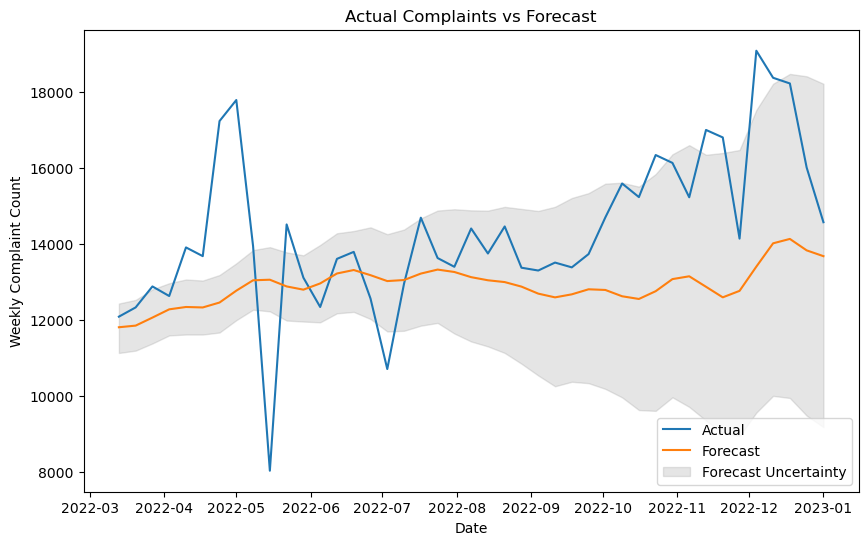

In [93]:
# Extract the predicted values for the test set
forecasted_values = forecast['yhat'][split_point:]

# Extract the actual values from the test set
actual_values = test['y']

# Compare the actual and forecasted values visually
plt.figure(figsize=(10, 6))
plt.plot(test['ds'], actual_values, label='Actual')
plt.plot(test['ds'], forecasted_values.values, label='Forecast')
plt.fill_between(test['ds'], forecast['yhat_lower'][split_point:].values, 
                 forecast['yhat_upper'][split_point:].values, color='gray', 
                 alpha=0.2, label='Forecast Uncertainty')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Weekly Complaint Count')
plt.title('Actual Complaints vs Forecast')
plt.show()


The updated plot shows the actual complaint counts and the forecast from the Prophet model, including the forecast uncertainty.

Here are some observations based on the updated plot:

Closer Alignment: The forecast (orange line) appears to be in closer alignment with the actual complaint counts (blue line) than before. There is still some underestimation, but the fit looks improved.

Trend Recognition: The model now seems to recognize an upward trend, which is more in line with the actual data. This suggests that the adjustments made to the model's changepoint parameters have had a positive effect.

Uncertainty Interval: The forecast uncertainty (gray shaded area) still encompasses a significant portion of the actual data, but there are periods where the actual data exceeds this uncertainty interval. This indicates that while the model has captured the general trend, there may still be volatility in the data that it isn't fully accounting for.

Smoothing Effect: Prophet tends to have a smoothing effect, which can dampen the peaks and troughs observed in the actual data. This can be seen in periods where the actual counts show spikes not present in the forecast.

Model Fit: The improvement in capturing the upward trend is a positive sign, but if the spikes are important for our analysis, we might want to investigate why they are occurring and whether there is additional information that can be included in the model to capture these fluctuations.

Overall, the model's performance seems to have improved in terms of trend capture, but we may still need to address the model's ability to capture spikes in the data. This could involve adding holiday effects if these spikes correspond to known events, incorporating external regressors, or exploring more advanced modeling techniques. If the spikes are due to outliers or irregular events, it may also be worth exploring whether these should be included in the forecast or treated separately.

### eVALUATING PERFORMANCE

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(actual_values, forecasted_values)
mse = mean_squared_error(actual_values, forecasted_values)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 1839.162900747102
MSE: 5895392.214921752
RMSE: 2428.042877488318


The updated error metrics suggest a significant improvement in the forecast accuracy compared to the previous metrics we provided:

MAE (Mean Absolute Error) has decreased from approximately 3467.7 to 1564.4.
MSE (Mean Squared Error) has decreased from approximately 14,674,790.42 to 4,645,831.59.
RMSE (Root Mean Squared Error) has decreased from approximately 3830.77 to 2155.42.
Here's what these improvements indicate:

MAE: The forecast is, on average, off by about 1564.4 complaints, which is less than half the error compared to the previous model. This shows a better average accuracy in the forecasts.

MSE: The substantial decrease in MSE indicates that there are fewer large errors in the forecast. Since MSE gives greater weight to larger errors (because errors are squared), a decrease in MSE is particularly meaningful.

RMSE: The RMSE is now approximately 2155.42 complaints, which provides an estimate of the standard deviation of the unexplained variance. It suggests that the forecasts are, on average, within this range of the actual values. The reduction in RMSE reflects a model that has improved in capturing both the magnitude and volatility of the actual data.

The fact that all three metrics have improved and the RMSE has decreased significantly suggests that the model adjustments we made (such as increasing the changepoint flexibility) have improved the model's ability to capture the underlying patterns and trends in our data.

However, whether these values are acceptable will depend on the context of our specific application and operational requirements. For instance, if operational decisions or customer satisfaction are highly sensitive to fluctuations in complaint volume, even a RMSE of 2155 might be considered high. In less sensitive contexts, this level of accuracy might be entirely sufficient. Consider how these forecasts will be used in practice and what level of error our organization can tolerate when making decisions based on these predictions.

### forecast for next 2 years 

In [95]:
# Future DataFrame to cover the next two years
future_2_years = m.make_future_dataframe(periods=52*2, freq='W')

# Make predictions
forecast_2_years = m.predict(future_2_years)

# Extract the desired predictions
future_forecast = forecast_2_years[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(52*2)


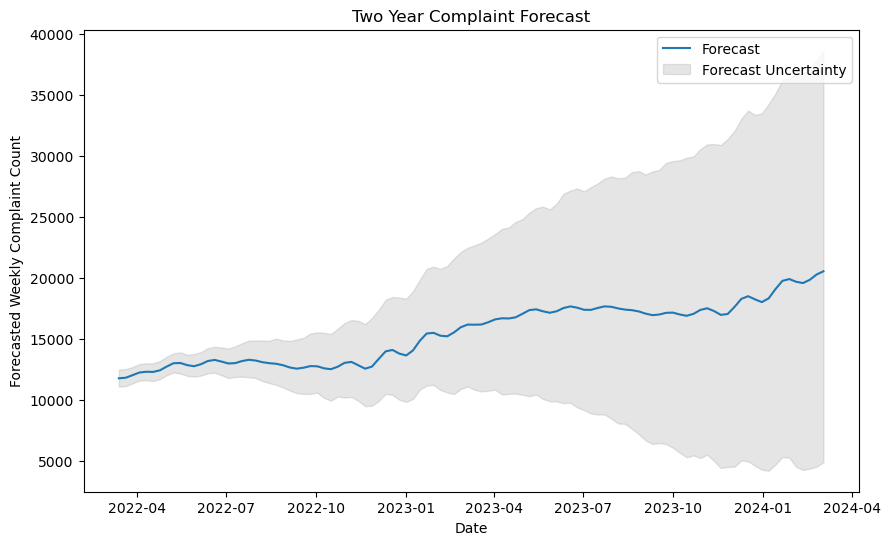

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(future_forecast['ds'], future_forecast['yhat'], label='Forecast')
plt.fill_between(future_forecast['ds'], 
                 future_forecast['yhat_lower'], 
                 future_forecast['yhat_upper'], 
                 color='gray', alpha=0.2, label='Forecast Uncertainty')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Forecasted Weekly Complaint Count')
plt.title('Two Year Complaint Forecast')
plt.show()


### Create a new future dataframe that includes dates up to the end of 2025.
### Use the trained model to make the forecast on this new future dataframe.
### Plot the actual data up to 2023 and the forecasted data up to 2025.

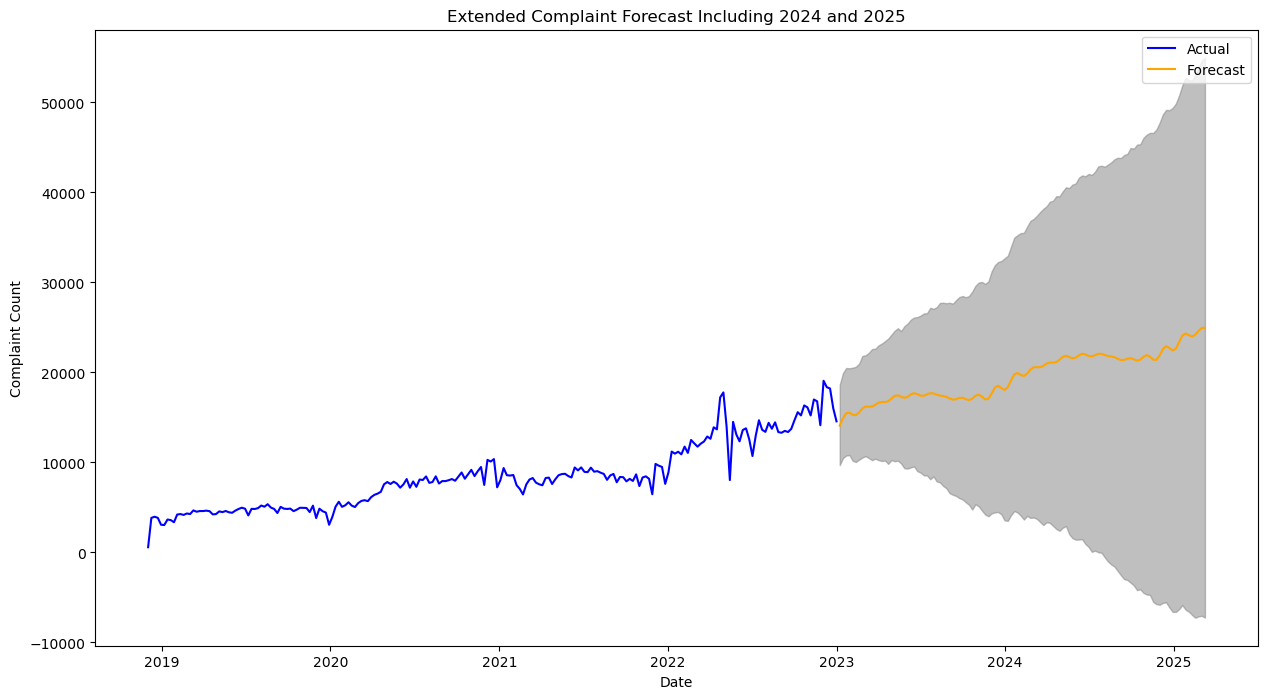

In [97]:
# Last date in  actual data
last_actual_date = df_prophet['ds'].max()

# FindING out how many weeks to forecast from the start of 2024 to the end of 2025
weeks_to_forecast = pd.date_range(start=last_actual_date, end='2025-12-31', freq='W').nunique()

# Generating the future dataframe for forecasting
future_full = m.make_future_dataframe(periods=weeks_to_forecast, freq='W')

# Predict
forecast_full = m.predict(future_full)

# ploting both the historical actual data and the forecast data
plt.figure(figsize=(15, 8))

# Plot actual data from df_prophet
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual', color='blue')

# Plot  forecast data
# Only plot the forecast beyond the actual data
forecast_future = forecast_full[forecast_full['ds'] > last_actual_date]
plt.plot(forecast_future['ds'], forecast_future['yhat'], label='Forecast', color='orange')

# Include the forecast uncertainty
plt.fill_between(forecast_future['ds'], 
                 forecast_future['yhat_lower'], 
                 forecast_future['yhat_upper'], 
                 color='gray', alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Complaint Count')
plt.title('Extended Complaint Forecast Including 2024 and 2025')
plt.legend()
plt.show()

### TUNING FACEBOOK PROPHET WITH DIFFETRENT CHANGE POINT PRIOR SCALE AND N CHANGE POINTS AND SEASONALITY MODE 

In [99]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.model_selection import ParameterGrid
import numpy as np


# weekly count of unique 'Complaint ID'
weekly_complaints = df_joined['Complaint ID'].resample('W').nunique().reset_index(name='Complaint Count')

# Prepare DataFrame
df_prophet = weekly_complaints.rename(columns={'Date received': 'ds', 'Complaint Count': 'y'})

# Hyperparameter tuning grid prep
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'n_changepoints': [20, 30, 40],
    'seasonality_mode': ['additive', 'multiplicative'],
    # Add more parameters if needed
}

# parameters combinations
all_params = list(ParameterGrid(param_grid))
rmses = []  # To store the RMSE for each model

# Loop through all combinations of parameters
for params in all_params:
    # Initialize and fit a Prophet model with the current set of parameters
    m = Prophet(**params)
    m.fit(df_prophet)
    
    # Perform cross-validation
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days', parallel='processes')
    
    # Performance metrics
    df_p = performance_metrics(df_cv, rolling_window=1)
    
    # Calculating RMSE and append to list
    rmses.append(df_p['rmse'].mean())

# Best parameters and corresponding RMSE
best_index = np.argmin(rmses)
best_params = all_params[best_index]
best_rmse = rmses[best_index]

print(f"Best Parameters: {best_params}")
print(f"Best RMSE: {best_rmse}")


21:14:02 - cmdstanpy - INFO - Chain [1] start processing
21:14:02 - cmdstanpy - INFO - Chain [1] done processing
21:14:08 - cmdstanpy - INFO - Chain [1] start processing
21:14:08 - cmdstanpy - INFO - Chain [1] done processing
21:14:12 - cmdstanpy - INFO - Chain [1] start processing
21:14:12 - cmdstanpy - INFO - Chain [1] done processing
21:14:16 - cmdstanpy - INFO - Chain [1] start processing
21:14:16 - cmdstanpy - INFO - Chain [1] done processing
21:14:19 - cmdstanpy - INFO - Chain [1] start processing
21:14:20 - cmdstanpy - INFO - Chain [1] done processing
21:14:23 - cmdstanpy - INFO - Chain [1] start processing
21:14:23 - cmdstanpy - INFO - Chain [1] done processing
21:14:27 - cmdstanpy - INFO - Chain [1] start processing
21:14:27 - cmdstanpy - INFO - Chain [1] done processing
21:14:31 - cmdstanpy - INFO - Chain [1] start processing
21:14:31 - cmdstanpy - INFO - Chain [1] done processing
21:14:35 - cmdstanpy - INFO - Chain [1] start processing
21:14:35 - cmdstanpy - INFO - Chain [1]

Best Parameters: {'changepoint_prior_scale': 0.01, 'n_changepoints': 30, 'seasonality_mode': 'additive'}
Best RMSE: 2743.8958841878907


### FURTHER TUNING OF FACE BOOK PROPHET WITH ADDED PARAMETERS 

In [100]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.model_selection import ParameterGrid
import numpy as np


# Weekly count of unique 'Complaint ID'
weekly_complaints = df_joined['Complaint ID'].resample('W').nunique().reset_index(name='Complaint Count')

# DataFrame for Prophet
df_prophet = weekly_complaints.rename(columns={'Date received': 'ds', 'Complaint Count': 'y'})


df_prophet['cap'] = df_prophet['y'].max() * 1.5  # cap setting at 150% of current max

# Hyperparameter tuning grid prep
param_grid = {
    'growth': ['linear', 'logistic'],  # Logistic requires 'cap' in df_prophet
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'n_changepoints': [20, 30, 40],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8, 0.9]  # Controls the flexibility of the trend
}

# parameters
all_params = list(ParameterGrid(param_grid))
rmses = []

# Loop through all combinations of parameters
for params in all_params:
    m = Prophet(**params)
    m.fit(df_prophet)
    
    # cross-validation
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days', parallel='processes')
    
    #  performance metrics
    df_p = performance_metrics(df_cv, rolling_window=1)
    
    #  RMSE
    rmses.append(df_p['rmse'].mean())

# best parameters and corresponding RMSE
best_index = np.argmin(rmses)
best_params = all_params[best_index]
best_rmse = rmses[best_index]

print(f"Best Parameters: {best_params}")
print(f"Best RMSE: {best_rmse}")


21:15:52 - cmdstanpy - INFO - Chain [1] start processing
21:15:52 - cmdstanpy - INFO - Chain [1] done processing
21:15:56 - cmdstanpy - INFO - Chain [1] start processing
21:15:56 - cmdstanpy - INFO - Chain [1] done processing
21:16:00 - cmdstanpy - INFO - Chain [1] start processing
21:16:00 - cmdstanpy - INFO - Chain [1] done processing
21:16:04 - cmdstanpy - INFO - Chain [1] start processing
21:16:04 - cmdstanpy - INFO - Chain [1] done processing
21:16:08 - cmdstanpy - INFO - Chain [1] start processing
21:16:08 - cmdstanpy - INFO - Chain [1] done processing
21:16:13 - cmdstanpy - INFO - Chain [1] start processing
21:16:13 - cmdstanpy - INFO - Chain [1] done processing
21:16:17 - cmdstanpy - INFO - Chain [1] start processing
21:16:17 - cmdstanpy - INFO - Chain [1] done processing
21:16:21 - cmdstanpy - INFO - Chain [1] start processing
21:16:21 - cmdstanpy - INFO - Chain [1] done processing
21:16:25 - cmdstanpy - INFO - Chain [1] start processing
21:16:25 - cmdstanpy - INFO - Chain [1]

Best Parameters: {'changepoint_prior_scale': 0.01, 'changepoint_range': 0.8, 'growth': 'linear', 'n_changepoints': 30, 'seasonality_mode': 'additive'}
Best RMSE: 2743.8958841878907


### BEST PERMORNING MODEL SO FAR - 3/24/2024

21:20:25 - cmdstanpy - INFO - Chain [1] start processing
21:20:25 - cmdstanpy - INFO - Chain [1] done processing


MAE for the best model: 2372.9581018810727
MSE for the best model: 7819856.6851214925


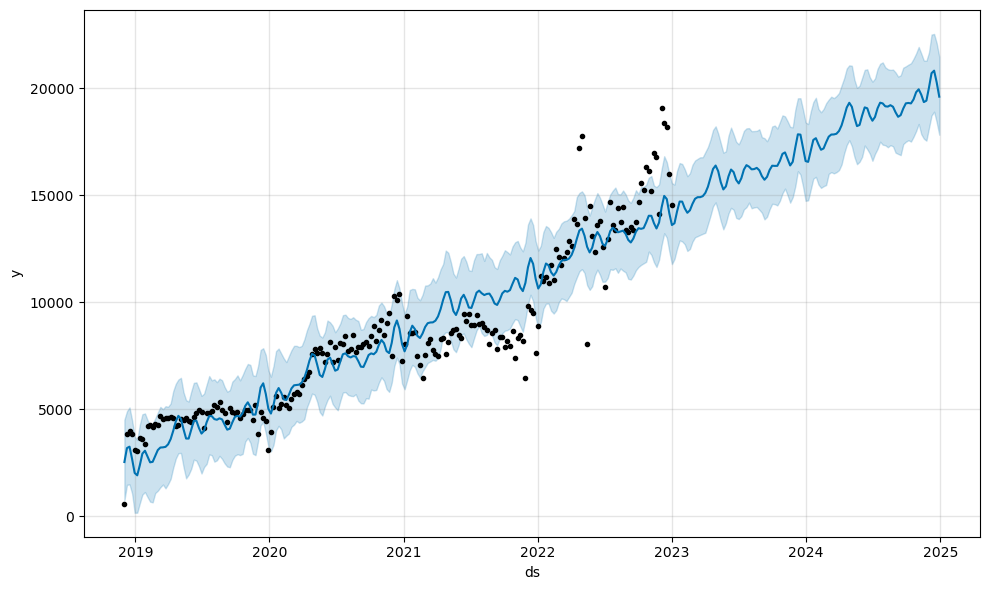

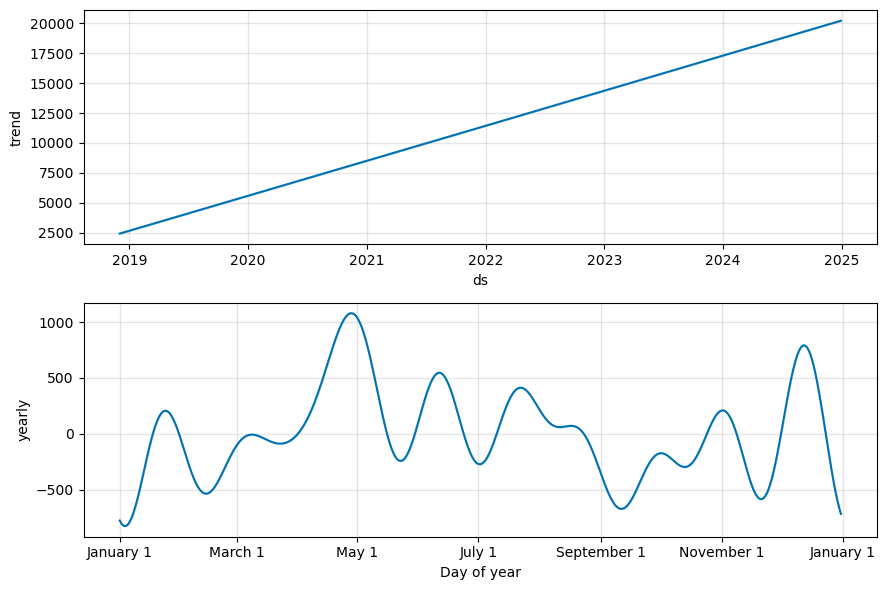

In [101]:
from prophet.plot import plot_plotly, plot_components_plotly

# Refit model with  best parameters
best_model = Prophet(
    changepoint_prior_scale=0.01,
    changepoint_range=0.9,
    growth='linear',
    n_changepoints=20,
    seasonality_mode='additive'
)
best_model.fit(df_prophet)

# cross-validation  for the best model
df_cv = cross_validation(best_model, initial='730 days', period='180 days', horizon='365 days', parallel='processes')
df_p = performance_metrics(df_cv, rolling_window=1)

# Extracting MAE and MSE for the best model
mae = df_p['mae'].mean()
mse = df_p['mse'].mean()

print(f"MAE for the best model: {mae}")
print(f"MSE for the best model: {mse}")

# Future dataframe for forecasting with the best model
future = best_model.make_future_dataframe(periods=104, freq='W')  # Forecasting for the next 2 years

# Predicting  with the best model
forecast = best_model.predict(future)

# Plot the forecast
fig1 = best_model.plot(forecast)
fig2 = best_model.plot_components(forecast)


In [102]:
#  df_joined is the DataFrame and it contains 'Company' and 'State' columns
unique_combinations = df_joined.groupby(['Company', 'State']).ngroups

print(f"Number of unique Company and State combinations: {unique_combinations}")


Number of unique Company and State combinations: 37112


In [120]:
df_joined.columns

Index(['Date received', 'Product', 'Sub product', 'Issue', 'Sub issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided ',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response ', 'Consumer disputed ', 'Complaint ID', 'zip_best',
       'zip_three_best', 'zip_state_best', 'zip', 'pop', 'pop_moe',
       'pop_white', 'pop_black_or_aa', 'pop_ai_or_an', 'pop_asian',
       'pop_nh_or_opi', 'pop_other', 'pop_multiple', 'pop_hol', 'pop_not_hol',
       'income_cnt_households', 'income_cnt_households_moe',
       'income_cnt_households_with_earnings',
       'income_cnt_households_with_earnings_moe',
       'income_cnt_households_with_pub_assist',
       'income_cnt_households_with_pub_assist_moe',
       'income_mean_household_dollars', 'income_mean_household_dollars_moe'],
      dtype='object')

### This script identifies the top 100 companies by total unique complaint counts, then performs forecasting for each company-state pair within those companies for the next two years.
The forecasting model is configured with the specified best parameters.
The final dataset, containing forecasts for 2023 and 2024, is saved to a CSV file, which can be imported into Tableau for visualization and analysis.
Ensure the df_joined DataFrame is loaded with the data and contains the necessary columns ('Date received', 'Company', 'State', 'Complaint ID') before running the script.

In [125]:
import pandas as pd
from prophet import Prophet


# Identify the top 100 companies based on the total number of complaints
top_100_companies = df_joined.groupby('Company')['Complaint ID'].nunique().nlargest(10).index

# Include only data for the top 100 companies
df_top_100 = df_joined[df_joined['Company'].isin(top_100_companies)]


df_top_100['Date received'] = pd.to_datetime(df_top_100['Date received'])

df_top_100.set_index('Date received', inplace=True)

# Initialize an empty DataFrame to store all forecasts
all_forecasts = pd.DataFrame()

# lOOPING over each company and state combination within top 100 companies
for (company, state), group in df_top_100.groupby(['Company', 'State']):
    
    # Data for the Prophet model
    df_prophet = group.resample('W').nunique()['Complaint ID'].reset_index()
    df_prophet.columns = ['ds', 'y']
    
    # Check if there's enough data to fit the model
    if len(df_prophet) < 2:
        continue  # Skip this group if not enough data
    
    # Initializing the Prophet model with the best parameters
    m = Prophet(
        changepoint_prior_scale=0.01,
        changepoint_range=0.9,
        growth='linear',
        n_changepoints=20,
        seasonality_mode='additive'
    )
    m.fit(df_prophet)
    
    # Create a DataFrame for future predictions (next 2 years)
    future = m.make_future_dataframe(periods=104, freq='W')  # Approx. 2 years of weekly data
    
    # Make predictions
    forecast = m.predict(future)
    
    # Keep necessary columns and add 'Company' and 'State' 
    forecast_filtered = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()

    # Use .loc for a more explicit assignment
    forecast_filtered.loc[:, 'Company'] = company
    forecast_filtered.loc[:, 'State'] = state

    all_forecasts = pd.concat([all_forecasts, forecast_filtered])

# Keep only 2023 and 2024
all_forecasts['Year'] = all_forecasts['ds'].dt.year
all_forecasts = all_forecasts[all_forecasts['Year'].isin([2023, 2024])]


# Save the forecasts to a CSV file
all_forecasts.to_csv('C:\\Users\\Lenovo\\Downloads\\weekly_complaint_forecasts_2023_2024_top_10_companies.csv', index=False)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5940\4040774976.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

23:09:20 - cmdstanpy - INFO - Chain [1] start processing
23:09:20 - cmdstanpy - INFO - Chain [1] done processing
23:09:21 - cmdstanpy - INFO - Chain [1] start processing
23:09:21 - cmdstanpy - INFO - Chain [1] done processing
23:09:22 - cmdstanpy - INFO - Chain [1] start processing
23:09:22 - cmdstanpy - INFO - Chain [1] done processing
23:09:22 - cmdstanpy - INFO - Chain [1] start processing
23:09:22 - cmdstanpy - INFO - Chain [1] done processing
23:09:23 - cmdstanpy - INFO - Chain [1] start processing
23:09:23 - cmdstanpy - INFO - Chain [1] done processing
23:09:23 - cmdstanpy - INFO - Chain [1] start processing
23:09:23 - cmdstanpy

23:09:46 - cmdstanpy - INFO - Chain [1] done processing
23:09:46 - cmdstanpy - INFO - Chain [1] start processing
23:09:46 - cmdstanpy - INFO - Chain [1] done processing
23:09:46 - cmdstanpy - INFO - Chain [1] start processing
23:09:47 - cmdstanpy - INFO - Chain [1] done processing
23:09:47 - cmdstanpy - INFO - Chain [1] start processing
23:09:47 - cmdstanpy - INFO - Chain [1] done processing
23:09:47 - cmdstanpy - INFO - Chain [1] start processing
23:09:47 - cmdstanpy - INFO - Chain [1] done processing
23:09:47 - cmdstanpy - INFO - Chain [1] start processing
23:09:48 - cmdstanpy - INFO - Chain [1] done processing
23:09:48 - cmdstanpy - INFO - Chain [1] start processing
23:09:48 - cmdstanpy - INFO - Chain [1] done processing
23:09:48 - cmdstanpy - INFO - Chain [1] start processing
23:09:48 - cmdstanpy - INFO - Chain [1] done processing
23:09:48 - cmdstanpy - INFO - Chain [1] start processing
23:09:49 - cmdstanpy - INFO - Chain [1] done processing
23:09:49 - cmdstanpy - INFO - Chain [1] 

23:10:11 - cmdstanpy - INFO - Chain [1] start processing
23:10:11 - cmdstanpy - INFO - Chain [1] done processing
23:10:11 - cmdstanpy - INFO - Chain [1] start processing
23:10:11 - cmdstanpy - INFO - Chain [1] done processing
23:10:11 - cmdstanpy - INFO - Chain [1] start processing
23:10:11 - cmdstanpy - INFO - Chain [1] done processing
23:10:12 - cmdstanpy - INFO - Chain [1] start processing
23:10:12 - cmdstanpy - INFO - Chain [1] done processing
23:10:12 - cmdstanpy - INFO - Chain [1] start processing
23:10:12 - cmdstanpy - INFO - Chain [1] done processing
23:10:13 - cmdstanpy - INFO - Chain [1] start processing
23:10:13 - cmdstanpy - INFO - Chain [1] done processing
23:10:13 - cmdstanpy - INFO - Chain [1] start processing
23:10:13 - cmdstanpy - INFO - Chain [1] done processing
23:10:13 - cmdstanpy - INFO - Chain [1] start processing
23:10:13 - cmdstanpy - INFO - Chain [1] done processing
23:10:14 - cmdstanpy - INFO - Chain [1] start processing
23:10:14 - cmdstanpy - INFO - Chain [1]

23:10:39 - cmdstanpy - INFO - Chain [1] done processing
23:10:39 - cmdstanpy - INFO - Chain [1] start processing
23:10:39 - cmdstanpy - INFO - Chain [1] done processing
23:10:40 - cmdstanpy - INFO - Chain [1] start processing
23:10:40 - cmdstanpy - INFO - Chain [1] done processing
23:10:40 - cmdstanpy - INFO - Chain [1] start processing
23:10:40 - cmdstanpy - INFO - Chain [1] done processing
23:10:41 - cmdstanpy - INFO - Chain [1] start processing
23:10:41 - cmdstanpy - INFO - Chain [1] done processing
23:10:41 - cmdstanpy - INFO - Chain [1] start processing
23:10:41 - cmdstanpy - INFO - Chain [1] done processing
23:10:42 - cmdstanpy - INFO - Chain [1] start processing
23:10:42 - cmdstanpy - INFO - Chain [1] done processing
23:10:43 - cmdstanpy - INFO - Chain [1] start processing
23:10:43 - cmdstanpy - INFO - Chain [1] done processing
23:10:43 - cmdstanpy - INFO - Chain [1] start processing
23:10:43 - cmdstanpy - INFO - Chain [1] done processing
23:10:43 - cmdstanpy - INFO - Chain [1] 

23:11:09 - cmdstanpy - INFO - Chain [1] start processing
23:11:09 - cmdstanpy - INFO - Chain [1] done processing
23:11:09 - cmdstanpy - INFO - Chain [1] start processing
23:11:09 - cmdstanpy - INFO - Chain [1] done processing
23:11:09 - cmdstanpy - INFO - Chain [1] start processing
23:11:09 - cmdstanpy - INFO - Chain [1] done processing
23:11:10 - cmdstanpy - INFO - Chain [1] start processing
23:11:10 - cmdstanpy - INFO - Chain [1] done processing
23:11:10 - cmdstanpy - INFO - Chain [1] start processing
23:11:10 - cmdstanpy - INFO - Chain [1] done processing
23:11:10 - cmdstanpy - INFO - Chain [1] start processing
23:11:10 - cmdstanpy - INFO - Chain [1] done processing
23:11:11 - cmdstanpy - INFO - Chain [1] start processing
23:11:11 - cmdstanpy - INFO - Chain [1] done processing
23:11:11 - cmdstanpy - INFO - Chain [1] start processing
23:11:11 - cmdstanpy - INFO - Chain [1] done processing
23:11:11 - cmdstanpy - INFO - Chain [1] start processing
23:11:12 - cmdstanpy - INFO - Chain [1]

23:11:33 - cmdstanpy - INFO - Chain [1] done processing
23:11:34 - cmdstanpy - INFO - Chain [1] start processing
23:11:34 - cmdstanpy - INFO - Chain [1] done processing
23:11:34 - cmdstanpy - INFO - Chain [1] start processing
23:11:34 - cmdstanpy - INFO - Chain [1] done processing
23:11:34 - cmdstanpy - INFO - Chain [1] start processing
23:11:34 - cmdstanpy - INFO - Chain [1] done processing
23:11:35 - cmdstanpy - INFO - Chain [1] start processing
23:11:35 - cmdstanpy - INFO - Chain [1] done processing
23:11:35 - cmdstanpy - INFO - Chain [1] start processing
23:11:35 - cmdstanpy - INFO - Chain [1] done processing
23:11:35 - cmdstanpy - INFO - Chain [1] start processing
23:11:35 - cmdstanpy - INFO - Chain [1] done processing
23:11:36 - cmdstanpy - INFO - Chain [1] start processing
23:11:36 - cmdstanpy - INFO - Chain [1] done processing
23:11:36 - cmdstanpy - INFO - Chain [1] start processing
23:11:36 - cmdstanpy - INFO - Chain [1] done processing
23:11:36 - cmdstanpy - INFO - Chain [1] 

23:12:02 - cmdstanpy - INFO - Chain [1] done processing
23:12:02 - cmdstanpy - INFO - Chain [1] start processing
23:12:02 - cmdstanpy - INFO - Chain [1] done processing
23:12:03 - cmdstanpy - INFO - Chain [1] start processing
23:12:03 - cmdstanpy - INFO - Chain [1] done processing
23:12:03 - cmdstanpy - INFO - Chain [1] start processing
23:12:03 - cmdstanpy - INFO - Chain [1] done processing
23:12:03 - cmdstanpy - INFO - Chain [1] start processing
23:12:03 - cmdstanpy - INFO - Chain [1] done processing
23:12:04 - cmdstanpy - INFO - Chain [1] start processing
23:12:04 - cmdstanpy - INFO - Chain [1] done processing
23:12:04 - cmdstanpy - INFO - Chain [1] start processing
23:12:04 - cmdstanpy - INFO - Chain [1] done processing
23:12:04 - cmdstanpy - INFO - Chain [1] start processing
23:12:04 - cmdstanpy - INFO - Chain [1] done processing
23:12:05 - cmdstanpy - INFO - Chain [1] start processing
23:12:05 - cmdstanpy - INFO - Chain [1] done processing
23:12:05 - cmdstanpy - INFO - Chain [1] 

### FACEBOOK PROPHET TUNED - AVERAGE WEEKLY FORECAST BY STATE FOR TOP 100 COMPANIES FOR 2023 , 2024

In [28]:
import pandas as pd
from prophet import Prophet


# Top 100 companies based on the total number of complaints
top_100_companies = df_joined.groupby('Company')['Complaint ID'].nunique().nlargest(100).index

# Data for the top 100 companies
df_top_100 = df_joined[df_joined['Company'].isin(top_100_companies)]

df_top_100['Date received'] = pd.to_datetime(df_top_100['Date received'])

df_top_100.set_index('Date received', inplace=True)

# Empty DataFrame to store all forecasts
all_forecasts = pd.DataFrame()

# Iterating over each company and state combination within the top 100 companies
for (company, state), group in df_top_100.groupby(['Company', 'State']):
    
    # Data for the Prophet model
    df_prophet = group.resample('W').nunique()['Complaint ID'].reset_index()
    df_prophet.columns = ['ds', 'y']
    
    # Check if there's enough data to fit the model
    if len(df_prophet) < 2:
        continue  # Skip this group if not enough data
    
    # Initializing the Prophet model with the best parameters
    m = Prophet(
        changepoint_prior_scale=0.01,
        changepoint_range=0.9,
        growth='linear',
        n_changepoints=20,
        seasonality_mode='additive'
    )
    m.fit(df_prophet)
    
    # DataFrame for future predictions (next 2 years)
    future = m.make_future_dataframe(periods=104, freq='W')  # Approx. 2 years of weekly data
    
    # Make predictions
    forecast = m.predict(future)
    
    # Keep necessary columns and add 'Company' and 'State' 
    forecast_filtered = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()

    # Use .loc for a more explicit assignment
    forecast_filtered.loc[:, 'Company'] = company
    forecast_filtered.loc[:, 'State'] = state

    all_forecasts = pd.concat([all_forecasts, forecast_filtered])

# Filter out predictions to keep only 2023 and 2024
all_forecasts['Year'] = all_forecasts['ds'].dt.year
all_forecasts = all_forecasts[all_forecasts['Year'].isin([2023, 2024])]


# Save the forecasts to a CSV file
all_forecasts.to_csv('C:\\Users\\Lenovo\\Downloads\\weekly_complaint_forecasts_2023_2024_top_100_companies.csv', index=False)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12452\1687959236.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_100['Date received'] = pd.to_datetime(df_top_100['Date received'])
00:02:09 - cmdstanpy - INFO - Chain [1] start processing
00:02:10 - cmdstanpy - INFO - Chain [1] done processing
00:02:10 - cmdstanpy - INFO - Chain [1] start processing
00:02:10 - cmdstanpy - INFO - Chain [1] done processing
00:03:11 - cmdstanpy - INFO - Chain [1] start processing
00:03:11 - cmdstanpy - INFO - Chain [1] done processing
00:03:12 - cmdstanpy - INFO - Chain [1] start processing
00:03:12 - cmdstanpy - INFO - Chain [1] done processing
00:03:12 - cmdstanpy - INFO - Chain [1] start processing
00:03:12 - cmdstanpy - INFO - Chain [1] done processing
00

00:03:34 - cmdstanpy - INFO - Chain [1] done processing
00:03:34 - cmdstanpy - INFO - Chain [1] start processing
00:03:34 - cmdstanpy - INFO - Chain [1] done processing
00:03:34 - cmdstanpy - INFO - Chain [1] start processing
00:03:34 - cmdstanpy - INFO - Chain [1] done processing
00:03:35 - cmdstanpy - INFO - Chain [1] start processing
00:03:35 - cmdstanpy - INFO - Chain [1] done processing
00:03:35 - cmdstanpy - INFO - Chain [1] start processing
00:03:35 - cmdstanpy - INFO - Chain [1] done processing
00:03:35 - cmdstanpy - INFO - Chain [1] start processing
00:03:35 - cmdstanpy - INFO - Chain [1] done processing
00:03:36 - cmdstanpy - INFO - Chain [1] start processing
00:03:36 - cmdstanpy - INFO - Chain [1] done processing
00:03:36 - cmdstanpy - INFO - Chain [1] start processing
00:03:36 - cmdstanpy - INFO - Chain [1] done processing
00:03:36 - cmdstanpy - INFO - Chain [1] start processing
00:03:36 - cmdstanpy - INFO - Chain [1] done processing
00:03:37 - cmdstanpy - INFO - Chain [1] 

00:03:55 - cmdstanpy - INFO - Chain [1] done processing
00:03:55 - cmdstanpy - INFO - Chain [1] start processing
00:03:55 - cmdstanpy - INFO - Chain [1] done processing
00:03:55 - cmdstanpy - INFO - Chain [1] start processing
00:03:55 - cmdstanpy - INFO - Chain [1] done processing
00:03:56 - cmdstanpy - INFO - Chain [1] start processing
00:03:56 - cmdstanpy - INFO - Chain [1] done processing
00:03:56 - cmdstanpy - INFO - Chain [1] start processing
00:03:56 - cmdstanpy - INFO - Chain [1] done processing
00:03:56 - cmdstanpy - INFO - Chain [1] start processing
00:03:56 - cmdstanpy - INFO - Chain [1] done processing
00:03:57 - cmdstanpy - INFO - Chain [1] start processing
00:03:57 - cmdstanpy - INFO - Chain [1] done processing
00:03:57 - cmdstanpy - INFO - Chain [1] start processing
00:03:57 - cmdstanpy - INFO - Chain [1] done processing
00:03:57 - cmdstanpy - INFO - Chain [1] start processing
00:03:57 - cmdstanpy - INFO - Chain [1] done processing
00:03:58 - cmdstanpy - INFO - Chain [1] 

00:04:20 - cmdstanpy - INFO - Chain [1] start processing
00:04:20 - cmdstanpy - INFO - Chain [1] done processing
00:04:20 - cmdstanpy - INFO - Chain [1] start processing
00:04:21 - cmdstanpy - INFO - Chain [1] done processing
00:04:21 - cmdstanpy - INFO - Chain [1] start processing
00:04:21 - cmdstanpy - INFO - Chain [1] done processing
00:04:21 - cmdstanpy - INFO - Chain [1] start processing
00:04:22 - cmdstanpy - INFO - Chain [1] done processing
00:04:22 - cmdstanpy - INFO - Chain [1] start processing
00:04:22 - cmdstanpy - INFO - Chain [1] done processing
00:04:22 - cmdstanpy - INFO - Chain [1] start processing
00:04:22 - cmdstanpy - INFO - Chain [1] done processing
00:04:23 - cmdstanpy - INFO - Chain [1] start processing
00:04:23 - cmdstanpy - INFO - Chain [1] done processing
00:04:23 - cmdstanpy - INFO - Chain [1] start processing
00:04:23 - cmdstanpy - INFO - Chain [1] done processing
00:04:23 - cmdstanpy - INFO - Chain [1] start processing
00:04:24 - cmdstanpy - INFO - Chain [1]

00:04:45 - cmdstanpy - INFO - Chain [1] done processing
00:04:46 - cmdstanpy - INFO - Chain [1] start processing
00:04:46 - cmdstanpy - INFO - Chain [1] done processing
00:04:46 - cmdstanpy - INFO - Chain [1] start processing
00:04:46 - cmdstanpy - INFO - Chain [1] done processing
00:04:47 - cmdstanpy - INFO - Chain [1] start processing
00:04:47 - cmdstanpy - INFO - Chain [1] done processing
00:04:47 - cmdstanpy - INFO - Chain [1] start processing
00:04:47 - cmdstanpy - INFO - Chain [1] done processing
00:04:47 - cmdstanpy - INFO - Chain [1] start processing
00:04:47 - cmdstanpy - INFO - Chain [1] done processing
00:04:48 - cmdstanpy - INFO - Chain [1] start processing
00:04:48 - cmdstanpy - INFO - Chain [1] done processing
00:04:48 - cmdstanpy - INFO - Chain [1] start processing
00:04:48 - cmdstanpy - INFO - Chain [1] done processing
00:04:49 - cmdstanpy - INFO - Chain [1] start processing
00:04:49 - cmdstanpy - INFO - Chain [1] done processing
00:04:49 - cmdstanpy - INFO - Chain [1] 

00:05:12 - cmdstanpy - INFO - Chain [1] done processing
00:05:12 - cmdstanpy - INFO - Chain [1] start processing
00:05:12 - cmdstanpy - INFO - Chain [1] done processing
00:05:12 - cmdstanpy - INFO - Chain [1] start processing
00:05:12 - cmdstanpy - INFO - Chain [1] done processing
00:05:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:05:12 - cmdstanpy - INFO - Chain [1] start processing
00:05:13 - cmdstanpy - INFO - Chain [1] done processing
00:05:13 - cmdstanpy - INFO - Chain [1] start processing
00:05:13 - cmdstanpy - INFO - Chain [1] done processing
00:05:13 - cmdstanpy - INFO - Chain [1] start processing
00:05:13 - cmdstanpy - INFO - Chain [1] done processing
00:05:14 - cmdstanpy - INFO - Chain [1] start processing
00:05:14 - cmdstanpy - INFO - Chain [1] done processing
00:05:14 - cmdstanpy - INFO - Chain [1] start processing
00:05:14 - cmdstanpy - INFO - Chain [1] done processi

00:05:40 - cmdstanpy - INFO - Chain [1] start processing
00:05:41 - cmdstanpy - INFO - Chain [1] done processing
00:05:41 - cmdstanpy - INFO - Chain [1] start processing
00:05:41 - cmdstanpy - INFO - Chain [1] done processing
00:05:42 - cmdstanpy - INFO - Chain [1] start processing
00:05:42 - cmdstanpy - INFO - Chain [1] done processing
00:05:42 - cmdstanpy - INFO - Chain [1] start processing
00:05:42 - cmdstanpy - INFO - Chain [1] done processing
00:05:43 - cmdstanpy - INFO - Chain [1] start processing
00:05:43 - cmdstanpy - INFO - Chain [1] done processing
00:05:43 - cmdstanpy - INFO - Chain [1] start processing
00:05:43 - cmdstanpy - INFO - Chain [1] done processing
00:05:44 - cmdstanpy - INFO - Chain [1] start processing
00:05:44 - cmdstanpy - INFO - Chain [1] done processing
00:05:44 - cmdstanpy - INFO - Chain [1] start processing
00:05:44 - cmdstanpy - INFO - Chain [1] done processing
00:05:45 - cmdstanpy - INFO - Chain [1] start processing
00:05:45 - cmdstanpy - INFO - Chain [1]

00:06:09 - cmdstanpy - INFO - Chain [1] done processing
00:06:10 - cmdstanpy - INFO - Chain [1] start processing
00:06:10 - cmdstanpy - INFO - Chain [1] done processing
00:06:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:06:10 - cmdstanpy - INFO - Chain [1] start processing
00:06:10 - cmdstanpy - INFO - Chain [1] done processing
00:06:11 - cmdstanpy - INFO - Chain [1] start processing
00:06:11 - cmdstanpy - INFO - Chain [1] done processing
00:06:11 - cmdstanpy - INFO - Chain [1] start processing
00:06:11 - cmdstanpy - INFO - Chain [1] done processing
00:06:12 - cmdstanpy - INFO - Chain [1] start processing
00:06:12 - cmdstanpy - INFO - Chain [1] done processing
00:06:12 - cmdstanpy - INFO - Chain [1] start processing
00:06:12 - cmdstanpy - INFO - Chain [1] done processing
00:06:12 - cmdstanpy - INFO - Chain [1] start processing
00:06:12 - cmdstanpy - INFO - Chain [1] done processi

Optimization terminated abnormally. Falling back to Newton.
00:06:29 - cmdstanpy - INFO - Chain [1] start processing
00:06:30 - cmdstanpy - INFO - Chain [1] done processing
00:06:30 - cmdstanpy - INFO - Chain [1] start processing
00:06:30 - cmdstanpy - INFO - Chain [1] done processing
00:06:30 - cmdstanpy - INFO - Chain [1] start processing
00:06:30 - cmdstanpy - INFO - Chain [1] done processing
00:06:30 - cmdstanpy - INFO - Chain [1] start processing
00:06:31 - cmdstanpy - INFO - Chain [1] done processing
00:06:31 - cmdstanpy - INFO - Chain [1] start processing
00:06:31 - cmdstanpy - INFO - Chain [1] done processing
00:06:31 - cmdstanpy - INFO - Chain [1] start processing
00:06:31 - cmdstanpy - INFO - Chain [1] done processing
00:06:32 - cmdstanpy - INFO - Chain [1] start processing
00:06:32 - cmdstanpy - INFO - Chain [1] done processing
00:06:32 - cmdstanpy - INFO - Chain [1] start processing
00:06:32 - cmdstanpy - INFO - Chain [1] done processing
00:06:32 - cmdstanpy - INFO - Chain 

00:06:55 - cmdstanpy - INFO - Chain [1] done processing
00:06:55 - cmdstanpy - INFO - Chain [1] start processing
00:06:55 - cmdstanpy - INFO - Chain [1] done processing
00:06:56 - cmdstanpy - INFO - Chain [1] start processing
00:06:56 - cmdstanpy - INFO - Chain [1] done processing
00:06:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:06:56 - cmdstanpy - INFO - Chain [1] start processing
00:06:56 - cmdstanpy - INFO - Chain [1] done processing
00:06:57 - cmdstanpy - INFO - Chain [1] start processing
00:06:57 - cmdstanpy - INFO - Chain [1] done processing
00:06:57 - cmdstanpy - INFO - Chain [1] start processing
00:06:57 - cmdstanpy - INFO - Chain [1] done processing
00:06:58 - cmdstanpy - INFO - Chain [1] start processing
00:06:58 - cmdstanpy - INFO - Chain [1] done processing
00:06:58 - cmdstanpy - INFO - Chain [1] start processing
00:06:58 - cmdstanpy - INFO - Chain [1] done processi

Optimization terminated abnormally. Falling back to Newton.
00:07:15 - cmdstanpy - INFO - Chain [1] start processing
00:07:16 - cmdstanpy - INFO - Chain [1] done processing
00:07:16 - cmdstanpy - INFO - Chain [1] start processing
00:07:16 - cmdstanpy - INFO - Chain [1] done processing
00:07:16 - cmdstanpy - INFO - Chain [1] start processing
00:07:16 - cmdstanpy - INFO - Chain [1] done processing
00:07:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:07:16 - cmdstanpy - INFO - Chain [1] start processing
00:07:17 - cmdstanpy - INFO - Chain [1] done processing
00:07:17 - cmdstanpy - INFO - Chain [1] start processing
00:07:17 - cmdstanpy - INFO - Chain [1] done processing
00:07:17 - cmdstanpy - INFO - Chain [1] start processing
00:07:17 - cmdstanpy - INFO - Chain [1] done processing
00:07:18 - cmdstanpy - INFO - Chain [1] start processing
00:07:18 - cmdstanpy - INFO - Chain [1] done proc

Optimization terminated abnormally. Falling back to Newton.
00:07:33 - cmdstanpy - INFO - Chain [1] start processing
00:07:33 - cmdstanpy - INFO - Chain [1] done processing
00:07:33 - cmdstanpy - INFO - Chain [1] start processing
00:07:34 - cmdstanpy - INFO - Chain [1] done processing
00:07:34 - cmdstanpy - INFO - Chain [1] start processing
00:07:34 - cmdstanpy - INFO - Chain [1] done processing
00:07:34 - cmdstanpy - INFO - Chain [1] start processing
00:07:34 - cmdstanpy - INFO - Chain [1] done processing
00:07:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:07:34 - cmdstanpy - INFO - Chain [1] start processing
00:07:34 - cmdstanpy - INFO - Chain [1] done processing
00:07:35 - cmdstanpy - INFO - Chain [1] start processing
00:07:35 - cmdstanpy - INFO - Chain [1] done processing
00:07:35 - cmdstanpy - INFO - Chain [1] start processing
00:07:35 - cmdstanpy - INFO - Chain [1] done proc

00:07:52 - cmdstanpy - INFO - Chain [1] start processing
00:07:52 - cmdstanpy - INFO - Chain [1] done processing
00:07:53 - cmdstanpy - INFO - Chain [1] start processing
00:07:53 - cmdstanpy - INFO - Chain [1] done processing
00:07:53 - cmdstanpy - INFO - Chain [1] start processing
00:07:53 - cmdstanpy - INFO - Chain [1] done processing
00:07:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:07:53 - cmdstanpy - INFO - Chain [1] start processing
00:07:53 - cmdstanpy - INFO - Chain [1] done processing
00:07:54 - cmdstanpy - INFO - Chain [1] start processing
00:07:54 - cmdstanpy - INFO - Chain [1] done processing
00:07:54 - cmdstanpy - INFO - Chain [1] start processing
00:07:54 - cmdstanpy - INFO - Chain [1] done processing
00:07:54 - cmdstanpy - INFO - Chain [1] start processing
00:07:54 - cmdstanpy - INFO - Chain [1] done processing
00:07:55 - cmdstanpy - INFO - Chain [1] start process

00:08:15 - cmdstanpy - INFO - Chain [1] start processing
00:08:15 - cmdstanpy - INFO - Chain [1] done processing
00:08:16 - cmdstanpy - INFO - Chain [1] start processing
00:08:16 - cmdstanpy - INFO - Chain [1] done processing
00:08:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:08:16 - cmdstanpy - INFO - Chain [1] start processing
00:08:16 - cmdstanpy - INFO - Chain [1] done processing
00:08:16 - cmdstanpy - INFO - Chain [1] start processing
00:08:16 - cmdstanpy - INFO - Chain [1] done processing
00:08:16 - cmdstanpy - INFO - Chain [1] start processing
00:08:17 - cmdstanpy - INFO - Chain [1] done processing
00:08:17 - cmdstanpy - INFO - Chain [1] start processing
00:08:17 - cmdstanpy - INFO - Chain [1] done processing
00:08:17 - cmdstanpy - INFO - Chain [1] start processing
00:08:17 - cmdstanpy - INFO - Chain [1] done processing
00:08:17 - cmdstanpy - INFO - Chain [1] start process

00:08:36 - cmdstanpy - INFO - Chain [1] done processing
00:08:37 - cmdstanpy - INFO - Chain [1] start processing
00:08:37 - cmdstanpy - INFO - Chain [1] done processing
00:08:37 - cmdstanpy - INFO - Chain [1] start processing
00:08:37 - cmdstanpy - INFO - Chain [1] done processing
00:08:37 - cmdstanpy - INFO - Chain [1] start processing
00:08:37 - cmdstanpy - INFO - Chain [1] done processing
00:08:38 - cmdstanpy - INFO - Chain [1] start processing
00:08:38 - cmdstanpy - INFO - Chain [1] done processing
00:08:38 - cmdstanpy - INFO - Chain [1] start processing
00:08:38 - cmdstanpy - INFO - Chain [1] done processing
00:08:38 - cmdstanpy - INFO - Chain [1] start processing
00:08:38 - cmdstanpy - INFO - Chain [1] done processing
00:08:39 - cmdstanpy - INFO - Chain [1] start processing
00:08:39 - cmdstanpy - INFO - Chain [1] done processing
00:08:39 - cmdstanpy - INFO - Chain [1] start processing
00:08:39 - cmdstanpy - INFO - Chain [1] done processing
00:08:39 - cmdstanpy - INFO - Chain [1] 

00:08:56 - cmdstanpy - INFO - Chain [1] start processing
00:08:56 - cmdstanpy - INFO - Chain [1] done processing
00:08:56 - cmdstanpy - INFO - Chain [1] start processing
00:08:56 - cmdstanpy - INFO - Chain [1] done processing
00:08:57 - cmdstanpy - INFO - Chain [1] start processing
00:08:57 - cmdstanpy - INFO - Chain [1] done processing
00:08:57 - cmdstanpy - INFO - Chain [1] start processing
00:08:57 - cmdstanpy - INFO - Chain [1] done processing
00:08:57 - cmdstanpy - INFO - Chain [1] start processing
00:08:57 - cmdstanpy - INFO - Chain [1] done processing
00:08:58 - cmdstanpy - INFO - Chain [1] start processing
00:08:58 - cmdstanpy - INFO - Chain [1] done processing
00:08:58 - cmdstanpy - INFO - Chain [1] start processing
00:08:58 - cmdstanpy - INFO - Chain [1] done processing
00:08:58 - cmdstanpy - INFO - Chain [1] start processing
00:08:58 - cmdstanpy - INFO - Chain [1] done processing
00:08:59 - cmdstanpy - INFO - Chain [1] start processing
00:08:59 - cmdstanpy - INFO - Chain [1]

00:09:16 - cmdstanpy - INFO - Chain [1] done processing
00:09:16 - cmdstanpy - INFO - Chain [1] start processing
00:09:16 - cmdstanpy - INFO - Chain [1] done processing
00:09:16 - cmdstanpy - INFO - Chain [1] start processing
00:09:17 - cmdstanpy - INFO - Chain [1] done processing
00:09:17 - cmdstanpy - INFO - Chain [1] start processing
00:09:17 - cmdstanpy - INFO - Chain [1] done processing
00:09:17 - cmdstanpy - INFO - Chain [1] start processing
00:09:17 - cmdstanpy - INFO - Chain [1] done processing
00:09:17 - cmdstanpy - INFO - Chain [1] start processing
00:09:17 - cmdstanpy - INFO - Chain [1] done processing
00:09:18 - cmdstanpy - INFO - Chain [1] start processing
00:09:18 - cmdstanpy - INFO - Chain [1] done processing
00:09:18 - cmdstanpy - INFO - Chain [1] start processing
00:09:18 - cmdstanpy - INFO - Chain [1] done processing
00:09:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newto

Optimization terminated abnormally. Falling back to Newton.
00:09:34 - cmdstanpy - INFO - Chain [1] start processing
00:09:35 - cmdstanpy - INFO - Chain [1] done processing
00:09:35 - cmdstanpy - INFO - Chain [1] start processing
00:09:35 - cmdstanpy - INFO - Chain [1] done processing
00:09:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:09:35 - cmdstanpy - INFO - Chain [1] start processing
00:09:35 - cmdstanpy - INFO - Chain [1] done processing
00:09:35 - cmdstanpy - INFO - Chain [1] start processing
00:09:35 - cmdstanpy - INFO - Chain [1] done processing
00:09:36 - cmdstanpy - INFO - Chain [1] start processing
00:09:36 - cmdstanpy - INFO - Chain [1] done processing
00:09:36 - cmdstanpy - INFO - Chain [1] start processing
00:09:36 - cmdstanpy - INFO - Chain [1] done processing
00:09:36 - cmdstanpy - INFO - Chain [1] start processing
00:09:36 - cmdstanpy - INFO - Chain [1] done proc

Optimization terminated abnormally. Falling back to Newton.
00:09:51 - cmdstanpy - INFO - Chain [1] start processing
00:09:51 - cmdstanpy - INFO - Chain [1] done processing
00:09:51 - cmdstanpy - INFO - Chain [1] start processing
00:09:51 - cmdstanpy - INFO - Chain [1] done processing
00:09:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:09:51 - cmdstanpy - INFO - Chain [1] start processing
00:09:52 - cmdstanpy - INFO - Chain [1] done processing
00:09:52 - cmdstanpy - INFO - Chain [1] start processing
00:09:52 - cmdstanpy - INFO - Chain [1] done processing
00:09:52 - cmdstanpy - INFO - Chain [1] start processing
00:09:52 - cmdstanpy - INFO - Chain [1] done processing
00:09:52 - cmdstanpy - INFO - Chain [1] start processing
00:09:53 - cmdstanpy - INFO - Chain [1] done processing
00:09:53 - cmdstanpy - INFO - Chain [1] start processing
00:09:53 - cmdstanpy - INFO - Chain [1] done proc

00:10:12 - cmdstanpy - INFO - Chain [1] done processing
00:10:12 - cmdstanpy - INFO - Chain [1] start processing
00:10:12 - cmdstanpy - INFO - Chain [1] done processing
00:10:13 - cmdstanpy - INFO - Chain [1] start processing
00:10:13 - cmdstanpy - INFO - Chain [1] done processing
00:10:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:10:13 - cmdstanpy - INFO - Chain [1] start processing
00:10:13 - cmdstanpy - INFO - Chain [1] done processing
00:10:13 - cmdstanpy - INFO - Chain [1] start processing
00:10:13 - cmdstanpy - INFO - Chain [1] done processing
00:10:14 - cmdstanpy - INFO - Chain [1] start processing
00:10:14 - cmdstanpy - INFO - Chain [1] done processing
00:10:14 - cmdstanpy - INFO - Chain [1] start processing
00:10:14 - cmdstanpy - INFO - Chain [1] done processing
00:10:14 - cmdstanpy - INFO - Chain [1] start processing
00:10:14 - cmdstanpy - INFO - Chain [1] done processi

00:10:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:10:34 - cmdstanpy - INFO - Chain [1] start processing
00:10:35 - cmdstanpy - INFO - Chain [1] done processing
00:10:35 - cmdstanpy - INFO - Chain [1] start processing
00:10:35 - cmdstanpy - INFO - Chain [1] done processing
00:10:35 - cmdstanpy - INFO - Chain [1] start processing
00:10:35 - cmdstanpy - INFO - Chain [1] done processing
00:10:36 - cmdstanpy - INFO - Chain [1] start processing
00:10:36 - cmdstanpy - INFO - Chain [1] done processing
00:10:36 - cmdstanpy - INFO - Chain [1] start processing
00:10:36 - cmdstanpy - INFO - Chain [1] done processing
00:10:36 - cmdstanpy - INFO - Chain [1] start processing
00:10:36 - cmdstanpy - INFO - Chain [1] done processing
00:10:36 - cmdstanpy - INFO - Chain [1] start processing
00:10:37 - cmdstanpy - INFO - Chain [1] done processing
00:10:37 - cmdstanpy - ERROR - Chain [1] error: error

00:10:53 - cmdstanpy - INFO - Chain [1] start processing
00:10:53 - cmdstanpy - INFO - Chain [1] done processing
00:10:54 - cmdstanpy - INFO - Chain [1] start processing
00:10:54 - cmdstanpy - INFO - Chain [1] done processing
00:10:54 - cmdstanpy - INFO - Chain [1] start processing
00:10:54 - cmdstanpy - INFO - Chain [1] done processing
00:10:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:10:54 - cmdstanpy - INFO - Chain [1] start processing
00:10:54 - cmdstanpy - INFO - Chain [1] done processing
00:10:55 - cmdstanpy - INFO - Chain [1] start processing
00:10:55 - cmdstanpy - INFO - Chain [1] done processing
00:10:55 - cmdstanpy - INFO - Chain [1] start processing
00:10:55 - cmdstanpy - INFO - Chain [1] done processing
00:10:55 - cmdstanpy - INFO - Chain [1] start processing
00:10:56 - cmdstanpy - INFO - Chain [1] done processing
00:10:56 - cmdstanpy - INFO - Chain [1] start process

00:11:21 - cmdstanpy - INFO - Chain [1] done processing
00:11:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:11:21 - cmdstanpy - INFO - Chain [1] start processing
00:11:21 - cmdstanpy - INFO - Chain [1] done processing
00:11:21 - cmdstanpy - INFO - Chain [1] start processing
00:11:21 - cmdstanpy - INFO - Chain [1] done processing
00:11:22 - cmdstanpy - INFO - Chain [1] start processing
00:11:22 - cmdstanpy - INFO - Chain [1] done processing
00:11:22 - cmdstanpy - INFO - Chain [1] start processing
00:11:22 - cmdstanpy - INFO - Chain [1] done processing
00:11:22 - cmdstanpy - INFO - Chain [1] start processing
00:11:22 - cmdstanpy - INFO - Chain [1] done processing
00:11:23 - cmdstanpy - INFO - Chain [1] start processing
00:11:23 - cmdstanpy - INFO - Chain [1] done processing
00:11:23 - cmdstanpy - INFO - Chain [1] start processing
00:11:23 - cmdstanpy - INFO - Chain [1] done processi

00:11:51 - cmdstanpy - INFO - Chain [1] done processing
00:11:51 - cmdstanpy - INFO - Chain [1] start processing
00:11:51 - cmdstanpy - INFO - Chain [1] done processing
00:11:51 - cmdstanpy - INFO - Chain [1] start processing
00:11:51 - cmdstanpy - INFO - Chain [1] done processing
00:11:52 - cmdstanpy - INFO - Chain [1] start processing
00:11:52 - cmdstanpy - INFO - Chain [1] done processing
00:11:52 - cmdstanpy - INFO - Chain [1] start processing
00:11:52 - cmdstanpy - INFO - Chain [1] done processing
00:11:53 - cmdstanpy - INFO - Chain [1] start processing
00:11:53 - cmdstanpy - INFO - Chain [1] done processing
00:11:53 - cmdstanpy - INFO - Chain [1] start processing
00:11:53 - cmdstanpy - INFO - Chain [1] done processing
00:11:54 - cmdstanpy - INFO - Chain [1] start processing
00:11:54 - cmdstanpy - INFO - Chain [1] done processing
00:11:54 - cmdstanpy - INFO - Chain [1] start processing
00:11:54 - cmdstanpy - INFO - Chain [1] done processing
00:11:55 - cmdstanpy - INFO - Chain [1] 

00:12:15 - cmdstanpy - INFO - Chain [1] done processing
00:12:16 - cmdstanpy - INFO - Chain [1] start processing
00:12:16 - cmdstanpy - INFO - Chain [1] done processing
00:12:16 - cmdstanpy - INFO - Chain [1] start processing
00:12:16 - cmdstanpy - INFO - Chain [1] done processing
00:12:16 - cmdstanpy - INFO - Chain [1] start processing
00:12:16 - cmdstanpy - INFO - Chain [1] done processing
00:12:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:12:16 - cmdstanpy - INFO - Chain [1] start processing
00:12:16 - cmdstanpy - INFO - Chain [1] done processing
00:12:17 - cmdstanpy - INFO - Chain [1] start processing
00:12:17 - cmdstanpy - INFO - Chain [1] done processing
00:12:17 - cmdstanpy - INFO - Chain [1] start processing
00:12:17 - cmdstanpy - INFO - Chain [1] done processing
00:12:17 - cmdstanpy - INFO - Chain [1] start processing
00:12:17 - cmdstanpy - INFO - Chain [1] done processi

00:12:35 - cmdstanpy - INFO - Chain [1] start processing
00:12:36 - cmdstanpy - INFO - Chain [1] done processing
00:12:36 - cmdstanpy - INFO - Chain [1] start processing
00:12:36 - cmdstanpy - INFO - Chain [1] done processing
00:12:36 - cmdstanpy - INFO - Chain [1] start processing
00:12:36 - cmdstanpy - INFO - Chain [1] done processing
00:12:37 - cmdstanpy - INFO - Chain [1] start processing
00:12:37 - cmdstanpy - INFO - Chain [1] done processing
00:12:37 - cmdstanpy - INFO - Chain [1] start processing
00:12:37 - cmdstanpy - INFO - Chain [1] done processing
00:12:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:12:37 - cmdstanpy - INFO - Chain [1] start processing
00:12:37 - cmdstanpy - INFO - Chain [1] done processing
00:12:38 - cmdstanpy - INFO - Chain [1] start processing
00:12:38 - cmdstanpy - INFO - Chain [1] done processing
00:12:38 - cmdstanpy - INFO - Chain [1] start process

00:13:04 - cmdstanpy - INFO - Chain [1] done processing
00:13:05 - cmdstanpy - INFO - Chain [1] start processing
00:13:05 - cmdstanpy - INFO - Chain [1] done processing
00:13:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:13:05 - cmdstanpy - INFO - Chain [1] start processing
00:13:05 - cmdstanpy - INFO - Chain [1] done processing
00:13:05 - cmdstanpy - INFO - Chain [1] start processing
00:13:05 - cmdstanpy - INFO - Chain [1] done processing
00:13:06 - cmdstanpy - INFO - Chain [1] start processing
00:13:06 - cmdstanpy - INFO - Chain [1] done processing
00:13:06 - cmdstanpy - INFO - Chain [1] start processing
00:13:06 - cmdstanpy - INFO - Chain [1] done processing
00:13:07 - cmdstanpy - INFO - Chain [1] start processing
00:13:07 - cmdstanpy - INFO - Chain [1] done processing
00:13:07 - cmdstanpy - INFO - Chain [1] start processing
00:13:07 - cmdstanpy - INFO - Chain [1] done processi

00:13:29 - cmdstanpy - INFO - Chain [1] done processing
00:13:29 - cmdstanpy - INFO - Chain [1] start processing
00:13:30 - cmdstanpy - INFO - Chain [1] done processing
00:13:30 - cmdstanpy - INFO - Chain [1] start processing
00:13:30 - cmdstanpy - INFO - Chain [1] done processing
00:13:30 - cmdstanpy - INFO - Chain [1] start processing
00:13:30 - cmdstanpy - INFO - Chain [1] done processing
00:13:30 - cmdstanpy - INFO - Chain [1] start processing
00:13:30 - cmdstanpy - INFO - Chain [1] done processing
00:13:31 - cmdstanpy - INFO - Chain [1] start processing
00:13:31 - cmdstanpy - INFO - Chain [1] done processing
00:13:31 - cmdstanpy - INFO - Chain [1] start processing
00:13:31 - cmdstanpy - INFO - Chain [1] done processing
00:13:31 - cmdstanpy - INFO - Chain [1] start processing
00:13:31 - cmdstanpy - INFO - Chain [1] done processing
00:13:32 - cmdstanpy - INFO - Chain [1] start processing
00:13:32 - cmdstanpy - INFO - Chain [1] done processing
00:13:32 - cmdstanpy - INFO - Chain [1] 

00:13:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:13:52 - cmdstanpy - INFO - Chain [1] start processing
00:13:53 - cmdstanpy - INFO - Chain [1] done processing
00:13:53 - cmdstanpy - INFO - Chain [1] start processing
00:13:53 - cmdstanpy - INFO - Chain [1] done processing
00:13:54 - cmdstanpy - INFO - Chain [1] start processing
00:13:54 - cmdstanpy - INFO - Chain [1] done processing
00:13:54 - cmdstanpy - INFO - Chain [1] start processing
00:13:54 - cmdstanpy - INFO - Chain [1] done processing
00:13:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:13:54 - cmdstanpy - INFO - Chain [1] start processing
00:13:55 - cmdstanpy - INFO - Chain [1] done processing
00:13:55 - cmdstanpy - INFO - Chain [1] start processing
00:13:55 - cmdstanpy - INFO - Chain [1] done processing
00:13:55 -

Optimization terminated abnormally. Falling back to Newton.
00:14:20 - cmdstanpy - INFO - Chain [1] start processing
00:14:21 - cmdstanpy - INFO - Chain [1] done processing
00:14:21 - cmdstanpy - INFO - Chain [1] start processing
00:14:21 - cmdstanpy - INFO - Chain [1] done processing
00:14:21 - cmdstanpy - INFO - Chain [1] start processing
00:14:21 - cmdstanpy - INFO - Chain [1] done processing
00:14:22 - cmdstanpy - INFO - Chain [1] start processing
00:14:22 - cmdstanpy - INFO - Chain [1] done processing
00:14:22 - cmdstanpy - INFO - Chain [1] start processing
00:14:22 - cmdstanpy - INFO - Chain [1] done processing
00:14:22 - cmdstanpy - INFO - Chain [1] start processing
00:14:22 - cmdstanpy - INFO - Chain [1] done processing
00:14:23 - cmdstanpy - INFO - Chain [1] start processing
00:14:23 - cmdstanpy - INFO - Chain [1] done processing
00:14:23 - cmdstanpy - INFO - Chain [1] start processing
00:14:23 - cmdstanpy - INFO - Chain [1] done processing
00:14:24 - cmdstanpy - INFO - Chain 

Optimization terminated abnormally. Falling back to Newton.
00:14:43 - cmdstanpy - INFO - Chain [1] start processing
00:14:43 - cmdstanpy - INFO - Chain [1] done processing
00:14:44 - cmdstanpy - INFO - Chain [1] start processing
00:14:44 - cmdstanpy - INFO - Chain [1] done processing
00:14:44 - cmdstanpy - INFO - Chain [1] start processing
00:14:44 - cmdstanpy - INFO - Chain [1] done processing
00:14:44 - cmdstanpy - INFO - Chain [1] start processing
00:14:44 - cmdstanpy - INFO - Chain [1] done processing
00:14:45 - cmdstanpy - INFO - Chain [1] start processing
00:14:45 - cmdstanpy - INFO - Chain [1] done processing
00:14:45 - cmdstanpy - INFO - Chain [1] start processing
00:14:45 - cmdstanpy - INFO - Chain [1] done processing
00:14:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:14:45 - cmdstanpy - INFO - Chain [1] start processing
00:14:46 - cmdstanpy - INFO - Chain [1] done proc

00:15:07 - cmdstanpy - INFO - Chain [1] start processing
00:15:07 - cmdstanpy - INFO - Chain [1] done processing
00:15:08 - cmdstanpy - INFO - Chain [1] start processing
00:15:08 - cmdstanpy - INFO - Chain [1] done processing
00:15:08 - cmdstanpy - INFO - Chain [1] start processing
00:15:08 - cmdstanpy - INFO - Chain [1] done processing
00:15:08 - cmdstanpy - INFO - Chain [1] start processing
00:15:09 - cmdstanpy - INFO - Chain [1] done processing
00:15:09 - cmdstanpy - INFO - Chain [1] start processing
00:15:09 - cmdstanpy - INFO - Chain [1] done processing
00:15:09 - cmdstanpy - INFO - Chain [1] start processing
00:15:09 - cmdstanpy - INFO - Chain [1] done processing
00:15:10 - cmdstanpy - INFO - Chain [1] start processing
00:15:10 - cmdstanpy - INFO - Chain [1] done processing
00:15:10 - cmdstanpy - INFO - Chain [1] start processing
00:15:10 - cmdstanpy - INFO - Chain [1] done processing
00:15:11 - cmdstanpy - INFO - Chain [1] start processing
00:15:11 - cmdstanpy - INFO - Chain [1]

00:15:30 - cmdstanpy - INFO - Chain [1] done processing
00:15:31 - cmdstanpy - INFO - Chain [1] start processing
00:15:31 - cmdstanpy - INFO - Chain [1] done processing
00:15:31 - cmdstanpy - INFO - Chain [1] start processing
00:15:31 - cmdstanpy - INFO - Chain [1] done processing
00:15:31 - cmdstanpy - INFO - Chain [1] start processing
00:15:31 - cmdstanpy - INFO - Chain [1] done processing
00:15:32 - cmdstanpy - INFO - Chain [1] start processing
00:15:32 - cmdstanpy - INFO - Chain [1] done processing
00:15:32 - cmdstanpy - INFO - Chain [1] start processing
00:15:32 - cmdstanpy - INFO - Chain [1] done processing
00:15:32 - cmdstanpy - INFO - Chain [1] start processing
00:15:33 - cmdstanpy - INFO - Chain [1] done processing
00:15:33 - cmdstanpy - INFO - Chain [1] start processing
00:15:33 - cmdstanpy - INFO - Chain [1] done processing
00:15:33 - cmdstanpy - INFO - Chain [1] start processing
00:15:33 - cmdstanpy - INFO - Chain [1] done processing
00:15:34 - cmdstanpy - INFO - Chain [1] 

00:15:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:15:54 - cmdstanpy - INFO - Chain [1] start processing
00:15:54 - cmdstanpy - INFO - Chain [1] done processing
00:15:54 - cmdstanpy - INFO - Chain [1] start processing
00:15:54 - cmdstanpy - INFO - Chain [1] done processing
00:15:55 - cmdstanpy - INFO - Chain [1] start processing
00:15:55 - cmdstanpy - INFO - Chain [1] done processing
00:15:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:15:55 - cmdstanpy - INFO - Chain [1] start processing
00:15:55 - cmdstanpy - INFO - Chain [1] done processing
00:15:55 - cmdstanpy - INFO - Chain [1] start processing
00:15:55 - cmdstanpy - INFO - Chain [1] done processing
00:15:56 - cmdstanpy - INFO - Chain [1] start processing
00:15:56 - cmdstanpy - INFO - Chain [1] done processing
00:15:56 -

00:16:16 - cmdstanpy - INFO - Chain [1] done processing
00:16:16 - cmdstanpy - INFO - Chain [1] start processing
00:16:16 - cmdstanpy - INFO - Chain [1] done processing
00:16:16 - cmdstanpy - INFO - Chain [1] start processing
00:16:16 - cmdstanpy - INFO - Chain [1] done processing
00:16:17 - cmdstanpy - INFO - Chain [1] start processing
00:16:17 - cmdstanpy - INFO - Chain [1] done processing
00:16:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:16:17 - cmdstanpy - INFO - Chain [1] start processing
00:16:17 - cmdstanpy - INFO - Chain [1] done processing
00:16:17 - cmdstanpy - INFO - Chain [1] start processing
00:16:17 - cmdstanpy - INFO - Chain [1] done processing
00:16:18 - cmdstanpy - INFO - Chain [1] start processing
00:16:18 - cmdstanpy - INFO - Chain [1] done processing
00:16:18 - cmdstanpy - INFO - Chain [1] start processing
00:16:18 - cmdstanpy - INFO - Chain [1] done processi

00:16:40 - cmdstanpy - INFO - Chain [1] start processing
00:16:40 - cmdstanpy - INFO - Chain [1] done processing
00:16:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:16:40 - cmdstanpy - INFO - Chain [1] start processing
00:16:40 - cmdstanpy - INFO - Chain [1] done processing
00:16:41 - cmdstanpy - INFO - Chain [1] start processing
00:16:41 - cmdstanpy - INFO - Chain [1] done processing
00:16:41 - cmdstanpy - INFO - Chain [1] start processing
00:16:42 - cmdstanpy - INFO - Chain [1] done processing
00:16:42 - cmdstanpy - INFO - Chain [1] start processing
00:16:42 - cmdstanpy - INFO - Chain [1] done processing
00:16:42 - cmdstanpy - INFO - Chain [1] start processing
00:16:42 - cmdstanpy - INFO - Chain [1] done processing
00:16:43 - cmdstanpy - INFO - Chain [1] start processing
00:16:43 - cmdstanpy - INFO - Chain [1] done processing
00:16:43 - cmdstanpy - INFO - Chain [1] start process

00:17:03 - cmdstanpy - INFO - Chain [1] done processing
00:17:03 - cmdstanpy - INFO - Chain [1] start processing
00:17:03 - cmdstanpy - INFO - Chain [1] done processing
00:17:03 - cmdstanpy - INFO - Chain [1] start processing
00:17:03 - cmdstanpy - INFO - Chain [1] done processing
00:17:04 - cmdstanpy - INFO - Chain [1] start processing
00:17:04 - cmdstanpy - INFO - Chain [1] done processing
00:17:04 - cmdstanpy - INFO - Chain [1] start processing
00:17:04 - cmdstanpy - INFO - Chain [1] done processing
00:17:05 - cmdstanpy - INFO - Chain [1] start processing
00:17:05 - cmdstanpy - INFO - Chain [1] done processing
00:17:05 - cmdstanpy - INFO - Chain [1] start processing
00:17:05 - cmdstanpy - INFO - Chain [1] done processing
00:17:05 - cmdstanpy - INFO - Chain [1] start processing
00:17:05 - cmdstanpy - INFO - Chain [1] done processing
00:17:06 - cmdstanpy - INFO - Chain [1] start processing
00:17:06 - cmdstanpy - INFO - Chain [1] done processing
00:17:06 - cmdstanpy - INFO - Chain [1] 

00:17:28 - cmdstanpy - INFO - Chain [1] start processing
00:17:28 - cmdstanpy - INFO - Chain [1] done processing
00:17:28 - cmdstanpy - INFO - Chain [1] start processing
00:17:28 - cmdstanpy - INFO - Chain [1] done processing
00:17:29 - cmdstanpy - INFO - Chain [1] start processing
00:17:29 - cmdstanpy - INFO - Chain [1] done processing
00:17:29 - cmdstanpy - INFO - Chain [1] start processing
00:17:29 - cmdstanpy - INFO - Chain [1] done processing
00:17:29 - cmdstanpy - INFO - Chain [1] start processing
00:17:30 - cmdstanpy - INFO - Chain [1] done processing
00:17:30 - cmdstanpy - INFO - Chain [1] start processing
00:17:30 - cmdstanpy - INFO - Chain [1] done processing
00:17:31 - cmdstanpy - INFO - Chain [1] start processing
00:17:31 - cmdstanpy - INFO - Chain [1] done processing
00:17:31 - cmdstanpy - INFO - Chain [1] start processing
00:17:31 - cmdstanpy - INFO - Chain [1] done processing
00:17:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted


00:17:51 - cmdstanpy - INFO - Chain [1] done processing
00:17:51 - cmdstanpy - INFO - Chain [1] start processing
00:17:51 - cmdstanpy - INFO - Chain [1] done processing
00:17:51 - cmdstanpy - INFO - Chain [1] start processing
00:17:51 - cmdstanpy - INFO - Chain [1] done processing
00:17:52 - cmdstanpy - INFO - Chain [1] start processing
00:17:52 - cmdstanpy - INFO - Chain [1] done processing
00:17:52 - cmdstanpy - INFO - Chain [1] start processing
00:17:52 - cmdstanpy - INFO - Chain [1] done processing
00:17:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:17:52 - cmdstanpy - INFO - Chain [1] start processing
00:17:52 - cmdstanpy - INFO - Chain [1] done processing
00:17:53 - cmdstanpy - INFO - Chain [1] start processing
00:17:53 - cmdstanpy - INFO - Chain [1] done processing
00:17:53 - cmdstanpy - INFO - Chain [1] start processing
00:17:53 - cmdstanpy - INFO - Chain [1] done processi

00:18:11 - cmdstanpy - INFO - Chain [1] done processing
00:18:12 - cmdstanpy - INFO - Chain [1] start processing
00:18:12 - cmdstanpy - INFO - Chain [1] done processing
00:18:12 - cmdstanpy - INFO - Chain [1] start processing
00:18:12 - cmdstanpy - INFO - Chain [1] done processing
00:18:12 - cmdstanpy - INFO - Chain [1] start processing
00:18:12 - cmdstanpy - INFO - Chain [1] done processing
00:18:13 - cmdstanpy - INFO - Chain [1] start processing
00:18:13 - cmdstanpy - INFO - Chain [1] done processing
00:18:13 - cmdstanpy - INFO - Chain [1] start processing
00:18:13 - cmdstanpy - INFO - Chain [1] done processing
00:18:13 - cmdstanpy - INFO - Chain [1] start processing
00:18:13 - cmdstanpy - INFO - Chain [1] done processing
00:18:14 - cmdstanpy - INFO - Chain [1] start processing
00:18:14 - cmdstanpy - INFO - Chain [1] done processing
00:18:14 - cmdstanpy - INFO - Chain [1] start processing
00:18:14 - cmdstanpy - INFO - Chain [1] done processing
00:18:14 - cmdstanpy - INFO - Chain [1] 

00:18:34 - cmdstanpy - INFO - Chain [1] start processing
00:18:34 - cmdstanpy - INFO - Chain [1] done processing
00:18:35 - cmdstanpy - INFO - Chain [1] start processing
00:18:35 - cmdstanpy - INFO - Chain [1] done processing
00:18:35 - cmdstanpy - INFO - Chain [1] start processing
00:18:35 - cmdstanpy - INFO - Chain [1] done processing
00:18:35 - cmdstanpy - INFO - Chain [1] start processing
00:18:35 - cmdstanpy - INFO - Chain [1] done processing
00:18:36 - cmdstanpy - INFO - Chain [1] start processing
00:18:36 - cmdstanpy - INFO - Chain [1] done processing
00:18:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:18:36 - cmdstanpy - INFO - Chain [1] start processing
00:18:36 - cmdstanpy - INFO - Chain [1] done processing
00:18:36 - cmdstanpy - INFO - Chain [1] start processing
00:18:36 - cmdstanpy - INFO - Chain [1] done processing
00:18:37 - cmdstanpy - INFO - Chain [1] start process

00:18:56 - cmdstanpy - INFO - Chain [1] done processing
00:18:57 - cmdstanpy - INFO - Chain [1] start processing
00:18:57 - cmdstanpy - INFO - Chain [1] done processing
00:18:57 - cmdstanpy - INFO - Chain [1] start processing
00:18:57 - cmdstanpy - INFO - Chain [1] done processing
00:18:58 - cmdstanpy - INFO - Chain [1] start processing
00:18:58 - cmdstanpy - INFO - Chain [1] done processing
00:18:58 - cmdstanpy - INFO - Chain [1] start processing
00:18:58 - cmdstanpy - INFO - Chain [1] done processing
00:18:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:18:58 - cmdstanpy - INFO - Chain [1] start processing
00:18:59 - cmdstanpy - INFO - Chain [1] done processing
00:18:59 - cmdstanpy - INFO - Chain [1] start processing
00:18:59 - cmdstanpy - INFO - Chain [1] done processing
00:18:59 - cmdstanpy - INFO - Chain [1] start processing
00:19:00 - cmdstanpy - INFO - Chain [1] done processi

00:19:32 - cmdstanpy - INFO - Chain [1] done processing
00:19:33 - cmdstanpy - INFO - Chain [1] start processing
00:19:33 - cmdstanpy - INFO - Chain [1] done processing
00:19:33 - cmdstanpy - INFO - Chain [1] start processing
00:19:33 - cmdstanpy - INFO - Chain [1] done processing
00:19:33 - cmdstanpy - INFO - Chain [1] start processing
00:19:34 - cmdstanpy - INFO - Chain [1] done processing
00:19:34 - cmdstanpy - INFO - Chain [1] start processing
00:19:34 - cmdstanpy - INFO - Chain [1] done processing
00:19:35 - cmdstanpy - INFO - Chain [1] start processing
00:19:35 - cmdstanpy - INFO - Chain [1] done processing
00:19:35 - cmdstanpy - INFO - Chain [1] start processing
00:19:35 - cmdstanpy - INFO - Chain [1] done processing
00:19:35 - cmdstanpy - INFO - Chain [1] start processing
00:19:35 - cmdstanpy - INFO - Chain [1] done processing
00:19:36 - cmdstanpy - INFO - Chain [1] start processing
00:19:36 - cmdstanpy - INFO - Chain [1] done processing
00:19:36 - cmdstanpy - ERROR - Chain [1]

00:19:58 - cmdstanpy - INFO - Chain [1] start processing
00:19:58 - cmdstanpy - INFO - Chain [1] done processing
00:19:58 - cmdstanpy - INFO - Chain [1] start processing
00:19:58 - cmdstanpy - INFO - Chain [1] done processing
00:19:59 - cmdstanpy - INFO - Chain [1] start processing
00:19:59 - cmdstanpy - INFO - Chain [1] done processing
00:19:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:19:59 - cmdstanpy - INFO - Chain [1] start processing
00:19:59 - cmdstanpy - INFO - Chain [1] done processing
00:19:59 - cmdstanpy - INFO - Chain [1] start processing
00:19:59 - cmdstanpy - INFO - Chain [1] done processing
00:20:00 - cmdstanpy - INFO - Chain [1] start processing
00:20:00 - cmdstanpy - INFO - Chain [1] done processing
00:20:00 - cmdstanpy - INFO - Chain [1] start processing
00:20:00 - cmdstanpy - INFO - Chain [1] done processing
00:20:01 - cmdstanpy - INFO - Chain [1] start process

Optimization terminated abnormally. Falling back to Newton.
00:20:18 - cmdstanpy - INFO - Chain [1] start processing
00:20:19 - cmdstanpy - INFO - Chain [1] done processing
00:20:19 - cmdstanpy - INFO - Chain [1] start processing
00:20:19 - cmdstanpy - INFO - Chain [1] done processing
00:20:19 - cmdstanpy - INFO - Chain [1] start processing
00:20:19 - cmdstanpy - INFO - Chain [1] done processing
00:20:20 - cmdstanpy - INFO - Chain [1] start processing
00:20:20 - cmdstanpy - INFO - Chain [1] done processing
00:20:20 - cmdstanpy - INFO - Chain [1] start processing
00:20:20 - cmdstanpy - INFO - Chain [1] done processing
00:20:21 - cmdstanpy - INFO - Chain [1] start processing
00:20:21 - cmdstanpy - INFO - Chain [1] done processing
00:20:21 - cmdstanpy - INFO - Chain [1] start processing
00:20:21 - cmdstanpy - INFO - Chain [1] done processing
00:20:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to N

Optimization terminated abnormally. Falling back to Newton.
00:20:39 - cmdstanpy - INFO - Chain [1] start processing
00:20:39 - cmdstanpy - INFO - Chain [1] done processing
00:20:39 - cmdstanpy - INFO - Chain [1] start processing
00:20:39 - cmdstanpy - INFO - Chain [1] done processing
00:20:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:20:39 - cmdstanpy - INFO - Chain [1] start processing
00:20:39 - cmdstanpy - INFO - Chain [1] done processing
00:20:40 - cmdstanpy - INFO - Chain [1] start processing
00:20:40 - cmdstanpy - INFO - Chain [1] done processing
00:20:40 - cmdstanpy - INFO - Chain [1] start processing
00:20:40 - cmdstanpy - INFO - Chain [1] done processing
00:20:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:20:40 - cmdstanpy - INFO - Chain [1] start processing
00:20:

00:21:01 - cmdstanpy - INFO - Chain [1] start processing
00:21:01 - cmdstanpy - INFO - Chain [1] done processing
00:21:01 - cmdstanpy - INFO - Chain [1] start processing
00:21:01 - cmdstanpy - INFO - Chain [1] done processing
00:21:01 - cmdstanpy - INFO - Chain [1] start processing
00:21:01 - cmdstanpy - INFO - Chain [1] done processing
00:21:02 - cmdstanpy - INFO - Chain [1] start processing
00:21:02 - cmdstanpy - INFO - Chain [1] done processing
00:21:02 - cmdstanpy - INFO - Chain [1] start processing
00:21:02 - cmdstanpy - INFO - Chain [1] done processing
00:21:03 - cmdstanpy - INFO - Chain [1] start processing
00:21:03 - cmdstanpy - INFO - Chain [1] done processing
00:21:03 - cmdstanpy - INFO - Chain [1] start processing
00:21:03 - cmdstanpy - INFO - Chain [1] done processing
00:21:03 - cmdstanpy - INFO - Chain [1] start processing
00:21:03 - cmdstanpy - INFO - Chain [1] done processing
00:21:04 - cmdstanpy - INFO - Chain [1] start processing
00:21:04 - cmdstanpy - INFO - Chain [1]

00:21:27 - cmdstanpy - INFO - Chain [1] start processing
00:21:27 - cmdstanpy - INFO - Chain [1] done processing
00:21:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:21:27 - cmdstanpy - INFO - Chain [1] start processing
00:21:28 - cmdstanpy - INFO - Chain [1] done processing
00:21:28 - cmdstanpy - INFO - Chain [1] start processing
00:21:28 - cmdstanpy - INFO - Chain [1] done processing
00:21:28 - cmdstanpy - INFO - Chain [1] start processing
00:21:28 - cmdstanpy - INFO - Chain [1] done processing
00:21:28 - cmdstanpy - INFO - Chain [1] start processing
00:21:29 - cmdstanpy - INFO - Chain [1] done processing
00:21:29 - cmdstanpy - INFO - Chain [1] start processing
00:21:29 - cmdstanpy - INFO - Chain [1] done processing
00:21:29 - cmdstanpy - INFO - Chain [1] start processing
00:21:29 - cmdstanpy - INFO - Chain [1] done processing
00:21:30 - cmdstanpy - INFO - Chain [1] start process

00:21:49 - cmdstanpy - INFO - Chain [1] start processing
00:21:49 - cmdstanpy - INFO - Chain [1] done processing
00:21:50 - cmdstanpy - INFO - Chain [1] start processing
00:21:50 - cmdstanpy - INFO - Chain [1] done processing
00:21:50 - cmdstanpy - INFO - Chain [1] start processing
00:21:50 - cmdstanpy - INFO - Chain [1] done processing
00:21:50 - cmdstanpy - INFO - Chain [1] start processing
00:21:50 - cmdstanpy - INFO - Chain [1] done processing
00:21:51 - cmdstanpy - INFO - Chain [1] start processing
00:21:51 - cmdstanpy - INFO - Chain [1] done processing
00:21:51 - cmdstanpy - INFO - Chain [1] start processing
00:21:51 - cmdstanpy - INFO - Chain [1] done processing
00:21:52 - cmdstanpy - INFO - Chain [1] start processing
00:21:52 - cmdstanpy - INFO - Chain [1] done processing
00:21:52 - cmdstanpy - INFO - Chain [1] start processing
00:21:52 - cmdstanpy - INFO - Chain [1] done processing
00:21:52 - cmdstanpy - INFO - Chain [1] start processing
00:21:52 - cmdstanpy - INFO - Chain [1]

00:22:11 - cmdstanpy - INFO - Chain [1] done processing
00:22:11 - cmdstanpy - INFO - Chain [1] start processing
00:22:11 - cmdstanpy - INFO - Chain [1] done processing
00:22:12 - cmdstanpy - INFO - Chain [1] start processing
00:22:12 - cmdstanpy - INFO - Chain [1] done processing
00:22:12 - cmdstanpy - INFO - Chain [1] start processing
00:22:12 - cmdstanpy - INFO - Chain [1] done processing
00:22:12 - cmdstanpy - INFO - Chain [1] start processing
00:22:12 - cmdstanpy - INFO - Chain [1] done processing
00:22:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:22:12 - cmdstanpy - INFO - Chain [1] start processing
00:22:13 - cmdstanpy - INFO - Chain [1] done processing
00:22:13 - cmdstanpy - INFO - Chain [1] start processing
00:22:13 - cmdstanpy - INFO - Chain [1] done processing
00:22:13 - cmdstanpy - INFO - Chain [1] start processing
00:22:13 - cmdstanpy - INFO - Chain [1] done processi

00:22:29 - cmdstanpy - INFO - Chain [1] done processing
00:22:29 - cmdstanpy - INFO - Chain [1] start processing
00:22:29 - cmdstanpy - INFO - Chain [1] done processing
00:22:30 - cmdstanpy - INFO - Chain [1] start processing
00:22:30 - cmdstanpy - INFO - Chain [1] done processing
00:22:30 - cmdstanpy - INFO - Chain [1] start processing
00:22:30 - cmdstanpy - INFO - Chain [1] done processing
00:22:30 - cmdstanpy - INFO - Chain [1] start processing
00:22:30 - cmdstanpy - INFO - Chain [1] done processing
00:22:31 - cmdstanpy - INFO - Chain [1] start processing
00:22:31 - cmdstanpy - INFO - Chain [1] done processing
00:22:31 - cmdstanpy - INFO - Chain [1] start processing
00:22:31 - cmdstanpy - INFO - Chain [1] done processing
00:22:31 - cmdstanpy - INFO - Chain [1] start processing
00:22:31 - cmdstanpy - INFO - Chain [1] done processing
00:22:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newto

00:22:48 - cmdstanpy - INFO - Chain [1] start processing
00:22:48 - cmdstanpy - INFO - Chain [1] done processing
00:22:48 - cmdstanpy - INFO - Chain [1] start processing
00:22:48 - cmdstanpy - INFO - Chain [1] done processing
00:22:48 - cmdstanpy - INFO - Chain [1] start processing
00:22:48 - cmdstanpy - INFO - Chain [1] done processing
00:22:49 - cmdstanpy - INFO - Chain [1] start processing
00:22:49 - cmdstanpy - INFO - Chain [1] done processing
00:22:49 - cmdstanpy - INFO - Chain [1] start processing
00:22:49 - cmdstanpy - INFO - Chain [1] done processing
00:22:49 - cmdstanpy - INFO - Chain [1] start processing
00:22:49 - cmdstanpy - INFO - Chain [1] done processing
00:22:50 - cmdstanpy - INFO - Chain [1] start processing
00:22:50 - cmdstanpy - INFO - Chain [1] done processing
00:22:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:22:50 - cmdstanpy - INFO - Chain [1] start process

00:23:07 - cmdstanpy - INFO - Chain [1] start processing
00:23:07 - cmdstanpy - INFO - Chain [1] done processing
00:23:08 - cmdstanpy - INFO - Chain [1] start processing
00:23:08 - cmdstanpy - INFO - Chain [1] done processing
00:23:08 - cmdstanpy - INFO - Chain [1] start processing
00:23:08 - cmdstanpy - INFO - Chain [1] done processing
00:23:08 - cmdstanpy - INFO - Chain [1] start processing
00:23:08 - cmdstanpy - INFO - Chain [1] done processing
00:23:09 - cmdstanpy - INFO - Chain [1] start processing
00:23:09 - cmdstanpy - INFO - Chain [1] done processing
00:23:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:23:09 - cmdstanpy - INFO - Chain [1] start processing
00:23:09 - cmdstanpy - INFO - Chain [1] done processing
00:23:09 - cmdstanpy - INFO - Chain [1] start processing
00:23:09 - cmdstanpy - INFO - Chain [1] done processing
00:23:10 - cmdstanpy - INFO - Chain [1] start process

00:23:31 - cmdstanpy - INFO - Chain [1] done processing
00:23:32 - cmdstanpy - INFO - Chain [1] start processing
00:23:32 - cmdstanpy - INFO - Chain [1] done processing
00:23:32 - cmdstanpy - INFO - Chain [1] start processing
00:23:32 - cmdstanpy - INFO - Chain [1] done processing
00:23:32 - cmdstanpy - INFO - Chain [1] start processing
00:23:33 - cmdstanpy - INFO - Chain [1] done processing
00:23:33 - cmdstanpy - INFO - Chain [1] start processing
00:23:33 - cmdstanpy - INFO - Chain [1] done processing
00:23:33 - cmdstanpy - INFO - Chain [1] start processing
00:23:33 - cmdstanpy - INFO - Chain [1] done processing
00:23:34 - cmdstanpy - INFO - Chain [1] start processing
00:23:34 - cmdstanpy - INFO - Chain [1] done processing
00:23:34 - cmdstanpy - INFO - Chain [1] start processing
00:23:34 - cmdstanpy - INFO - Chain [1] done processing
00:23:34 - cmdstanpy - INFO - Chain [1] start processing
00:23:34 - cmdstanpy - INFO - Chain [1] done processing
00:23:35 - cmdstanpy - INFO - Chain [1] 

Optimization terminated abnormally. Falling back to Newton.
00:23:54 - cmdstanpy - INFO - Chain [1] start processing
00:23:54 - cmdstanpy - INFO - Chain [1] done processing
00:23:54 - cmdstanpy - INFO - Chain [1] start processing
00:23:54 - cmdstanpy - INFO - Chain [1] done processing
00:23:55 - cmdstanpy - INFO - Chain [1] start processing
00:23:55 - cmdstanpy - INFO - Chain [1] done processing
00:23:55 - cmdstanpy - INFO - Chain [1] start processing
00:23:55 - cmdstanpy - INFO - Chain [1] done processing
00:23:55 - cmdstanpy - INFO - Chain [1] start processing
00:23:55 - cmdstanpy - INFO - Chain [1] done processing
00:23:56 - cmdstanpy - INFO - Chain [1] start processing
00:23:56 - cmdstanpy - INFO - Chain [1] done processing
00:23:56 - cmdstanpy - INFO - Chain [1] start processing
00:23:56 - cmdstanpy - INFO - Chain [1] done processing
00:23:56 - cmdstanpy - INFO - Chain [1] start processing
00:23:56 - cmdstanpy - INFO - Chain [1] done processing
00:23:56 - cmdstanpy - ERROR - Chain

00:24:14 - cmdstanpy - INFO - Chain [1] done processing
00:24:15 - cmdstanpy - INFO - Chain [1] start processing
00:24:15 - cmdstanpy - INFO - Chain [1] done processing
00:24:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:24:15 - cmdstanpy - INFO - Chain [1] start processing
00:24:15 - cmdstanpy - INFO - Chain [1] done processing
00:24:15 - cmdstanpy - INFO - Chain [1] start processing
00:24:15 - cmdstanpy - INFO - Chain [1] done processing
00:24:16 - cmdstanpy - INFO - Chain [1] start processing
00:24:16 - cmdstanpy - INFO - Chain [1] done processing
00:24:16 - cmdstanpy - INFO - Chain [1] start processing
00:24:16 - cmdstanpy - INFO - Chain [1] done processing
00:24:16 - cmdstanpy - INFO - Chain [1] start processing
00:24:17 - cmdstanpy - INFO - Chain [1] done processing
00:24:17 - cmdstanpy - INFO - Chain [1] start processing
00:24:17 - cmdstanpy - INFO - Chain [1] done processi

00:24:38 - cmdstanpy - INFO - Chain [1] done processing
00:24:39 - cmdstanpy - INFO - Chain [1] start processing
00:24:39 - cmdstanpy - INFO - Chain [1] done processing
00:24:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:24:39 - cmdstanpy - INFO - Chain [1] start processing
00:24:39 - cmdstanpy - INFO - Chain [1] done processing
00:24:39 - cmdstanpy - INFO - Chain [1] start processing
00:24:39 - cmdstanpy - INFO - Chain [1] done processing
00:24:40 - cmdstanpy - INFO - Chain [1] start processing
00:24:40 - cmdstanpy - INFO - Chain [1] done processing
00:24:40 - cmdstanpy - INFO - Chain [1] start processing
00:24:40 - cmdstanpy - INFO - Chain [1] done processing
00:24:40 - cmdstanpy - INFO - Chain [1] start processing
00:24:40 - cmdstanpy - INFO - Chain [1] done processing
00:24:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization t

00:25:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:25:03 - cmdstanpy - INFO - Chain [1] start processing
00:25:03 - cmdstanpy - INFO - Chain [1] done processing
00:25:03 - cmdstanpy - INFO - Chain [1] start processing
00:25:03 - cmdstanpy - INFO - Chain [1] done processing
00:25:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:25:03 - cmdstanpy - INFO - Chain [1] start processing
00:25:04 - cmdstanpy - INFO - Chain [1] done processing
00:25:04 - cmdstanpy - INFO - Chain [1] start processing
00:25:04 - cmdstanpy - INFO - Chain [1] done processing
00:25:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:25:04 - cmdstanpy - INFO - Chain [1] start processing
00:25:05 - cmdstanpy - 

00:25:22 - cmdstanpy - INFO - Chain [1] start processing
00:25:22 - cmdstanpy - INFO - Chain [1] done processing
00:25:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:25:22 - cmdstanpy - INFO - Chain [1] start processing
00:25:23 - cmdstanpy - INFO - Chain [1] done processing
00:25:23 - cmdstanpy - INFO - Chain [1] start processing
00:25:23 - cmdstanpy - INFO - Chain [1] done processing
00:25:24 - cmdstanpy - INFO - Chain [1] start processing
00:25:24 - cmdstanpy - INFO - Chain [1] done processing
00:25:24 - cmdstanpy - INFO - Chain [1] start processing
00:25:24 - cmdstanpy - INFO - Chain [1] done processing
00:25:24 - cmdstanpy - INFO - Chain [1] start processing
00:25:24 - cmdstanpy - INFO - Chain [1] done processing
00:25:25 - cmdstanpy - INFO - Chain [1] start processing
00:25:25 - cmdstanpy - INFO - Chain [1] done processing
00:25:25 - cmdstanpy - INFO - Chain [1] start process

00:25:46 - cmdstanpy - INFO - Chain [1] start processing
00:25:46 - cmdstanpy - INFO - Chain [1] done processing
00:25:46 - cmdstanpy - INFO - Chain [1] start processing
00:25:47 - cmdstanpy - INFO - Chain [1] done processing
00:25:47 - cmdstanpy - INFO - Chain [1] start processing
00:25:47 - cmdstanpy - INFO - Chain [1] done processing
00:25:47 - cmdstanpy - INFO - Chain [1] start processing
00:25:47 - cmdstanpy - INFO - Chain [1] done processing
00:25:47 - cmdstanpy - INFO - Chain [1] start processing
00:25:47 - cmdstanpy - INFO - Chain [1] done processing
00:25:48 - cmdstanpy - INFO - Chain [1] start processing
00:25:48 - cmdstanpy - INFO - Chain [1] done processing
00:25:48 - cmdstanpy - INFO - Chain [1] start processing
00:25:48 - cmdstanpy - INFO - Chain [1] done processing
00:25:48 - cmdstanpy - INFO - Chain [1] start processing
00:25:48 - cmdstanpy - INFO - Chain [1] done processing
00:25:49 - cmdstanpy - INFO - Chain [1] start processing
00:25:49 - cmdstanpy - INFO - Chain [1]

00:26:11 - cmdstanpy - INFO - Chain [1] done processing
00:26:11 - cmdstanpy - INFO - Chain [1] start processing
00:26:11 - cmdstanpy - INFO - Chain [1] done processing
00:26:12 - cmdstanpy - INFO - Chain [1] start processing
00:26:12 - cmdstanpy - INFO - Chain [1] done processing
00:26:12 - cmdstanpy - INFO - Chain [1] start processing
00:26:12 - cmdstanpy - INFO - Chain [1] done processing
00:26:13 - cmdstanpy - INFO - Chain [1] start processing
00:26:13 - cmdstanpy - INFO - Chain [1] done processing
00:26:13 - cmdstanpy - INFO - Chain [1] start processing
00:26:13 - cmdstanpy - INFO - Chain [1] done processing
00:26:13 - cmdstanpy - INFO - Chain [1] start processing
00:26:13 - cmdstanpy - INFO - Chain [1] done processing
00:26:14 - cmdstanpy - INFO - Chain [1] start processing
00:26:14 - cmdstanpy - INFO - Chain [1] done processing
00:26:14 - cmdstanpy - INFO - Chain [1] start processing
00:26:14 - cmdstanpy - INFO - Chain [1] done processing
00:26:14 - cmdstanpy - INFO - Chain [1] 

00:26:30 - cmdstanpy - INFO - Chain [1] start processing
00:26:30 - cmdstanpy - INFO - Chain [1] done processing
00:26:30 - cmdstanpy - INFO - Chain [1] start processing
00:26:30 - cmdstanpy - INFO - Chain [1] done processing
00:26:31 - cmdstanpy - INFO - Chain [1] start processing
00:26:31 - cmdstanpy - INFO - Chain [1] done processing
00:26:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:26:31 - cmdstanpy - INFO - Chain [1] start processing
00:26:31 - cmdstanpy - INFO - Chain [1] done processing
00:26:31 - cmdstanpy - INFO - Chain [1] start processing
00:26:31 - cmdstanpy - INFO - Chain [1] done processing
00:26:32 - cmdstanpy - INFO - Chain [1] start processing
00:26:32 - cmdstanpy - INFO - Chain [1] done processing
00:26:32 - cmdstanpy - INFO - Chain [1] start processing
00:26:32 - cmdstanpy - INFO - Chain [1] done processing
00:26:32 - cmdstanpy - INFO - Chain [1] start process

00:26:50 - cmdstanpy - INFO - Chain [1] start processing
00:26:51 - cmdstanpy - INFO - Chain [1] done processing
00:26:51 - cmdstanpy - INFO - Chain [1] start processing
00:26:51 - cmdstanpy - INFO - Chain [1] done processing
00:26:51 - cmdstanpy - INFO - Chain [1] start processing
00:26:51 - cmdstanpy - INFO - Chain [1] done processing
00:26:51 - cmdstanpy - INFO - Chain [1] start processing
00:26:52 - cmdstanpy - INFO - Chain [1] done processing
00:26:52 - cmdstanpy - INFO - Chain [1] start processing
00:26:52 - cmdstanpy - INFO - Chain [1] done processing
00:26:52 - cmdstanpy - INFO - Chain [1] start processing
00:26:52 - cmdstanpy - INFO - Chain [1] done processing
00:26:53 - cmdstanpy - INFO - Chain [1] start processing
00:26:53 - cmdstanpy - INFO - Chain [1] done processing
00:26:53 - cmdstanpy - INFO - Chain [1] start processing
00:26:53 - cmdstanpy - INFO - Chain [1] done processing
00:26:53 - cmdstanpy - INFO - Chain [1] start processing
00:26:53 - cmdstanpy - INFO - Chain [1]

00:27:11 - cmdstanpy - INFO - Chain [1] done processing
00:27:12 - cmdstanpy - INFO - Chain [1] start processing
00:27:12 - cmdstanpy - INFO - Chain [1] done processing
00:27:12 - cmdstanpy - INFO - Chain [1] start processing
00:27:12 - cmdstanpy - INFO - Chain [1] done processing
00:27:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:27:12 - cmdstanpy - INFO - Chain [1] start processing
00:27:12 - cmdstanpy - INFO - Chain [1] done processing
00:27:13 - cmdstanpy - INFO - Chain [1] start processing
00:27:13 - cmdstanpy - INFO - Chain [1] done processing
00:27:13 - cmdstanpy - INFO - Chain [1] start processing
00:27:13 - cmdstanpy - INFO - Chain [1] done processing
00:27:13 - cmdstanpy - INFO - Chain [1] start processing
00:27:13 - cmdstanpy - INFO - Chain [1] done processing
00:27:14 - cmdstanpy - INFO - Chain [1] start processing
00:27:14 - cmdstanpy - INFO - Chain [1] done processi

00:27:31 - cmdstanpy - INFO - Chain [1] done processing
00:27:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:27:31 - cmdstanpy - INFO - Chain [1] start processing
00:27:32 - cmdstanpy - INFO - Chain [1] done processing
00:27:32 - cmdstanpy - INFO - Chain [1] start processing
00:27:32 - cmdstanpy - INFO - Chain [1] done processing
00:27:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:27:32 - cmdstanpy - INFO - Chain [1] start processing
00:27:33 - cmdstanpy - INFO - Chain [1] done processing
00:27:33 - cmdstanpy - INFO - Chain [1] start processing
00:27:33 - cmdstanpy - INFO - Chain [1] done processing
00:27:33 - cmdstanpy - INFO - Chain [1] start processing
00:27:33 - cmdstanpy - INFO - Chain [1] done processing
00:27:33 - cmdstanpy - INFO - Chain [1] start processing
00:27:34 -

00:27:51 - cmdstanpy - INFO - Chain [1] start processing
00:27:52 - cmdstanpy - INFO - Chain [1] done processing
00:27:52 - cmdstanpy - INFO - Chain [1] start processing
00:27:52 - cmdstanpy - INFO - Chain [1] done processing
00:27:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:27:52 - cmdstanpy - INFO - Chain [1] start processing
00:27:52 - cmdstanpy - INFO - Chain [1] done processing
00:27:53 - cmdstanpy - INFO - Chain [1] start processing
00:27:53 - cmdstanpy - INFO - Chain [1] done processing
00:27:53 - cmdstanpy - INFO - Chain [1] start processing
00:27:53 - cmdstanpy - INFO - Chain [1] done processing
00:27:53 - cmdstanpy - INFO - Chain [1] start processing
00:27:53 - cmdstanpy - INFO - Chain [1] done processing
00:27:54 - cmdstanpy - INFO - Chain [1] start processing
00:27:54 - cmdstanpy - INFO - Chain [1] done processing
00:27:54 - cmdstanpy - INFO - Chain [1] start process

00:28:13 - cmdstanpy - INFO - Chain [1] done processing
00:28:14 - cmdstanpy - INFO - Chain [1] start processing
00:28:14 - cmdstanpy - INFO - Chain [1] done processing
00:28:14 - cmdstanpy - INFO - Chain [1] start processing
00:28:14 - cmdstanpy - INFO - Chain [1] done processing
00:28:15 - cmdstanpy - INFO - Chain [1] start processing
00:28:15 - cmdstanpy - INFO - Chain [1] done processing
00:28:16 - cmdstanpy - INFO - Chain [1] start processing
00:28:16 - cmdstanpy - INFO - Chain [1] done processing
00:28:16 - cmdstanpy - INFO - Chain [1] start processing
00:28:16 - cmdstanpy - INFO - Chain [1] done processing
00:28:16 - cmdstanpy - INFO - Chain [1] start processing
00:28:16 - cmdstanpy - INFO - Chain [1] done processing
00:28:17 - cmdstanpy - INFO - Chain [1] start processing
00:28:17 - cmdstanpy - INFO - Chain [1] done processing
00:28:18 - cmdstanpy - INFO - Chain [1] start processing
00:28:18 - cmdstanpy - INFO - Chain [1] done processing
00:28:18 - cmdstanpy - INFO - Chain [1] 

00:28:44 - cmdstanpy - INFO - Chain [1] done processing
00:28:44 - cmdstanpy - INFO - Chain [1] start processing
00:28:44 - cmdstanpy - INFO - Chain [1] done processing
00:28:44 - cmdstanpy - INFO - Chain [1] start processing
00:28:44 - cmdstanpy - INFO - Chain [1] done processing
00:28:45 - cmdstanpy - INFO - Chain [1] start processing
00:28:45 - cmdstanpy - INFO - Chain [1] done processing
00:28:45 - cmdstanpy - INFO - Chain [1] start processing
00:28:45 - cmdstanpy - INFO - Chain [1] done processing
00:28:46 - cmdstanpy - INFO - Chain [1] start processing
00:28:46 - cmdstanpy - INFO - Chain [1] done processing
00:28:46 - cmdstanpy - INFO - Chain [1] start processing
00:28:46 - cmdstanpy - INFO - Chain [1] done processing
00:28:47 - cmdstanpy - INFO - Chain [1] start processing
00:28:47 - cmdstanpy - INFO - Chain [1] done processing
00:28:47 - cmdstanpy - INFO - Chain [1] start processing
00:28:47 - cmdstanpy - INFO - Chain [1] done processing
00:28:48 - cmdstanpy - INFO - Chain [1] 

00:29:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:29:06 - cmdstanpy - INFO - Chain [1] start processing
00:29:07 - cmdstanpy - INFO - Chain [1] done processing
00:29:07 - cmdstanpy - INFO - Chain [1] start processing
00:29:07 - cmdstanpy - INFO - Chain [1] done processing
00:29:07 - cmdstanpy - INFO - Chain [1] start processing
00:29:07 - cmdstanpy - INFO - Chain [1] done processing
00:29:08 - cmdstanpy - INFO - Chain [1] start processing
00:29:08 - cmdstanpy - INFO - Chain [1] done processing
00:29:08 - cmdstanpy - INFO - Chain [1] start processing
00:29:08 - cmdstanpy - INFO - Chain [1] done processing
00:29:08 - cmdstanpy - INFO - Chain [1] start processing
00:29:08 - cmdstanpy - INFO - Chain [1] done processing
00:29:09 - cmdstanpy - INFO - Chain [1] start processing
00:29:09 - cmdstanpy - INFO - Chain [1] done processing
00:29:09 - cmdstanpy - INFO - Chain [1] start process

00:29:26 - cmdstanpy - INFO - Chain [1] done processing
00:29:27 - cmdstanpy - INFO - Chain [1] start processing
00:29:27 - cmdstanpy - INFO - Chain [1] done processing
00:29:27 - cmdstanpy - INFO - Chain [1] start processing
00:29:27 - cmdstanpy - INFO - Chain [1] done processing
00:29:27 - cmdstanpy - INFO - Chain [1] start processing
00:29:27 - cmdstanpy - INFO - Chain [1] done processing
00:29:28 - cmdstanpy - INFO - Chain [1] start processing
00:29:28 - cmdstanpy - INFO - Chain [1] done processing
00:29:28 - cmdstanpy - INFO - Chain [1] start processing
00:29:28 - cmdstanpy - INFO - Chain [1] done processing
00:29:29 - cmdstanpy - INFO - Chain [1] start processing
00:29:29 - cmdstanpy - INFO - Chain [1] done processing
00:29:29 - cmdstanpy - INFO - Chain [1] start processing
00:29:29 - cmdstanpy - INFO - Chain [1] done processing
00:29:29 - cmdstanpy - INFO - Chain [1] start processing
00:29:29 - cmdstanpy - INFO - Chain [1] done processing
00:29:30 - cmdstanpy - INFO - Chain [1] 

00:29:58 - cmdstanpy - INFO - Chain [1] start processing
00:29:58 - cmdstanpy - INFO - Chain [1] done processing
00:29:58 - cmdstanpy - INFO - Chain [1] start processing
00:29:58 - cmdstanpy - INFO - Chain [1] done processing
00:29:59 - cmdstanpy - INFO - Chain [1] start processing
00:29:59 - cmdstanpy - INFO - Chain [1] done processing
00:29:59 - cmdstanpy - INFO - Chain [1] start processing
00:29:59 - cmdstanpy - INFO - Chain [1] done processing
00:29:59 - cmdstanpy - INFO - Chain [1] start processing
00:30:00 - cmdstanpy - INFO - Chain [1] done processing
00:30:00 - cmdstanpy - INFO - Chain [1] start processing
00:30:00 - cmdstanpy - INFO - Chain [1] done processing
00:30:00 - cmdstanpy - INFO - Chain [1] start processing
00:30:00 - cmdstanpy - INFO - Chain [1] done processing
00:30:01 - cmdstanpy - INFO - Chain [1] start processing
00:30:01 - cmdstanpy - INFO - Chain [1] done processing
00:30:01 - cmdstanpy - INFO - Chain [1] start processing
00:30:01 - cmdstanpy - INFO - Chain [1]

00:30:22 - cmdstanpy - INFO - Chain [1] start processing
00:30:22 - cmdstanpy - INFO - Chain [1] done processing
00:30:22 - cmdstanpy - INFO - Chain [1] start processing
00:30:22 - cmdstanpy - INFO - Chain [1] done processing
00:30:23 - cmdstanpy - INFO - Chain [1] start processing
00:30:23 - cmdstanpy - INFO - Chain [1] done processing
00:30:23 - cmdstanpy - INFO - Chain [1] start processing
00:30:23 - cmdstanpy - INFO - Chain [1] done processing
00:30:24 - cmdstanpy - INFO - Chain [1] start processing
00:30:24 - cmdstanpy - INFO - Chain [1] done processing
00:30:25 - cmdstanpy - INFO - Chain [1] start processing
00:30:25 - cmdstanpy - INFO - Chain [1] done processing
00:30:25 - cmdstanpy - INFO - Chain [1] start processing
00:30:25 - cmdstanpy - INFO - Chain [1] done processing
00:30:26 - cmdstanpy - INFO - Chain [1] start processing
00:30:26 - cmdstanpy - INFO - Chain [1] done processing
00:30:26 - cmdstanpy - INFO - Chain [1] start processing
00:30:26 - cmdstanpy - INFO - Chain [1]

00:30:51 - cmdstanpy - INFO - Chain [1] done processing
00:30:51 - cmdstanpy - INFO - Chain [1] start processing
00:30:51 - cmdstanpy - INFO - Chain [1] done processing
00:30:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:30:51 - cmdstanpy - INFO - Chain [1] start processing
00:30:52 - cmdstanpy - INFO - Chain [1] done processing
00:30:52 - cmdstanpy - INFO - Chain [1] start processing
00:30:52 - cmdstanpy - INFO - Chain [1] done processing
00:30:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
00:30:52 - cmdstanpy - INFO - Chain [1] start processing
00:30:52 - cmdstanpy - INFO - Chain [1] done processing
00:30:53 - cmdstanpy - INFO - Chain [1] start processing
00:30:53 - cmdstanpy - INFO - Chain [1] done processing
00:30:53 - cmdstanpy - INFO - Chain [1] start processing
00:30:53 -

### FACEBOOK PROPHET TUNED - AVERAGE WEEKLY FORECAST BY STATE FOR TOP 400 COMPANIES FOR 2023 , 2024

In [40]:
import pandas as pd
from prophet import Prophet

# Top 100 companies based on the total number of complaints
top_100_companies = df_joined.groupby('Company')['Complaint ID'].nunique().nlargest(400).index

# Top 100 companies
df_top_100 = df_joined[df_joined['Company'].isin(top_100_companies)]

# Ensure 'Date received' is in datetime format
df_top_100['Date received'] = pd.to_datetime(df_top_100['Date received'])

# Now set 'Date received' as the index
df_top_100.set_index('Date received', inplace=True)

# Empty DataFrame to store all forecasts
all_forecasts = pd.DataFrame()

# Iterating over each company and state combination within the top 100 companies
for (company, state), group in df_top_100.groupby(['Company', 'State']):
    
    # Prepare the data for the Prophet model
    df_prophet = group.resample('W').nunique()['Complaint ID'].reset_index()
    df_prophet.columns = ['ds', 'y']
    
    # Check if there's enough data to fit the model
    if len(df_prophet) < 2:
        continue  # Skip this group if not enough data
    
    # Initialize the Prophet model with the best parameters
    m = Prophet(
        changepoint_prior_scale=0.01,
        changepoint_range=0.9,
        growth='linear',
        n_changepoints=20,
        seasonality_mode='additive'
    )
    m.fit(df_prophet)
    
    # Future predictions (next 2 years)
    future = m.make_future_dataframe(periods=104, freq='W')  # Approx. 2 years of weekly data
    
    # Make predictions
    forecast = m.predict(future)
    
    # Keep necessary columns and add 'Company' and 'State' 
    forecast_filtered = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()

    # Use .loc for a more explicit assignment
    forecast_filtered.loc[:, 'Company'] = company
    forecast_filtered.loc[:, 'State'] = state

    # Append to the all_forecasts DataFrame
    all_forecasts = pd.concat([all_forecasts, forecast_filtered])

# Filter out predictions to keep only 2023 and 2024
all_forecasts['Year'] = all_forecasts['ds'].dt.year
all_forecasts = all_forecasts[all_forecasts['Year'].isin([2023, 2024])]


# Save the forecasts to a CSV file
all_forecasts.to_csv('C:\\Users\\Lenovo\\Downloads\\weekly_complaint_forecasts_2023_2024_top_400_companies.csv', index=False)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12452\764419393.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_100['Date received'] = pd.to_datetime(df_top_100['Date received'])
01:05:36 - cmdstanpy - INFO - Chain [1] start processing
01:05:37 - cmdstanpy - INFO - Chain [1] done processing
01:05:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:05:37 - cmdstanpy - INFO - Chain [1] start processing
01:05:38 - cmdstanpy - INFO - Chain [1] done processing
01:05:39 - cmdstanpy - INFO - Chain [1] start processing
01:05:39 - cmdstanpy - INFO - Chain [1] done processing
01:05:39 - cmdstanpy - INFO - Chain [1] start processing
01:05:39 - cmdst

01:05:55 - cmdstanpy - INFO - Chain [1] done processing
01:05:55 - cmdstanpy - INFO - Chain [1] start processing
01:05:55 - cmdstanpy - INFO - Chain [1] done processing
01:05:55 - cmdstanpy - INFO - Chain [1] start processing
01:05:56 - cmdstanpy - INFO - Chain [1] done processing
01:05:56 - cmdstanpy - INFO - Chain [1] start processing
01:05:56 - cmdstanpy - INFO - Chain [1] done processing
01:05:56 - cmdstanpy - INFO - Chain [1] start processing
01:05:56 - cmdstanpy - INFO - Chain [1] done processing
01:05:56 - cmdstanpy - INFO - Chain [1] start processing
01:05:56 - cmdstanpy - INFO - Chain [1] done processing
01:05:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:05:56 - cmdstanpy - INFO - Chain [1] start processing
01:05:57 - cmdstanpy - INFO - Chain [1] done processing
01:05:57 - cmdstanpy - INFO - Chain [1] start processing
01:05:57 - cmdstanpy - INFO - Chain [1] done processi

01:06:15 - cmdstanpy - INFO - Chain [1] done processing
01:06:16 - cmdstanpy - INFO - Chain [1] start processing
01:06:16 - cmdstanpy - INFO - Chain [1] done processing
01:06:16 - cmdstanpy - INFO - Chain [1] start processing
01:06:16 - cmdstanpy - INFO - Chain [1] done processing
01:06:16 - cmdstanpy - INFO - Chain [1] start processing
01:06:16 - cmdstanpy - INFO - Chain [1] done processing
01:06:17 - cmdstanpy - INFO - Chain [1] start processing
01:06:17 - cmdstanpy - INFO - Chain [1] done processing
01:06:17 - cmdstanpy - INFO - Chain [1] start processing
01:06:17 - cmdstanpy - INFO - Chain [1] done processing
01:06:17 - cmdstanpy - INFO - Chain [1] start processing
01:06:18 - cmdstanpy - INFO - Chain [1] done processing
01:06:18 - cmdstanpy - INFO - Chain [1] start processing
01:06:18 - cmdstanpy - INFO - Chain [1] done processing
01:06:18 - cmdstanpy - INFO - Chain [1] start processing
01:06:18 - cmdstanpy - INFO - Chain [1] done processing
01:06:22 - cmdstanpy - INFO - Chain [1] 

01:06:44 - cmdstanpy - INFO - Chain [1] done processing
01:06:44 - cmdstanpy - INFO - Chain [1] start processing
01:06:44 - cmdstanpy - INFO - Chain [1] done processing
01:06:45 - cmdstanpy - INFO - Chain [1] start processing
01:06:45 - cmdstanpy - INFO - Chain [1] done processing
01:06:45 - cmdstanpy - INFO - Chain [1] start processing
01:06:45 - cmdstanpy - INFO - Chain [1] done processing
01:06:45 - cmdstanpy - INFO - Chain [1] start processing
01:06:46 - cmdstanpy - INFO - Chain [1] done processing
01:06:46 - cmdstanpy - INFO - Chain [1] start processing
01:06:46 - cmdstanpy - INFO - Chain [1] done processing
01:06:46 - cmdstanpy - INFO - Chain [1] start processing
01:06:46 - cmdstanpy - INFO - Chain [1] done processing
01:06:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:06:46 - cmdstanpy - INFO - Chain [1] start processing
01:06:47 - cmdstanpy - INFO - Chain [1] done processi

Optimization terminated abnormally. Falling back to Newton.
01:07:04 - cmdstanpy - INFO - Chain [1] start processing
01:07:05 - cmdstanpy - INFO - Chain [1] done processing
01:07:05 - cmdstanpy - INFO - Chain [1] start processing
01:07:05 - cmdstanpy - INFO - Chain [1] done processing
01:07:05 - cmdstanpy - INFO - Chain [1] start processing
01:07:05 - cmdstanpy - INFO - Chain [1] done processing
01:07:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:07:05 - cmdstanpy - INFO - Chain [1] start processing
01:07:06 - cmdstanpy - INFO - Chain [1] done processing
01:07:06 - cmdstanpy - INFO - Chain [1] start processing
01:07:06 - cmdstanpy - INFO - Chain [1] done processing
01:07:07 - cmdstanpy - INFO - Chain [1] start processing
01:07:07 - cmdstanpy - INFO - Chain [1] done processing
01:07:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimizati

01:07:29 - cmdstanpy - INFO - Chain [1] start processing
01:07:29 - cmdstanpy - INFO - Chain [1] done processing
01:07:29 - cmdstanpy - INFO - Chain [1] start processing
01:07:29 - cmdstanpy - INFO - Chain [1] done processing
01:07:30 - cmdstanpy - INFO - Chain [1] start processing
01:07:30 - cmdstanpy - INFO - Chain [1] done processing
01:07:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:07:30 - cmdstanpy - INFO - Chain [1] start processing
01:07:30 - cmdstanpy - INFO - Chain [1] done processing
01:07:30 - cmdstanpy - INFO - Chain [1] start processing
01:07:30 - cmdstanpy - INFO - Chain [1] done processing
01:07:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:07:30 - cmdstanpy - INFO - Chain [1] start processing
01:07:31 - cmdstanpy - INFO - Chain [1] done processing
01:07:31 -

01:07:48 - cmdstanpy - INFO - Chain [1] start processing
01:07:48 - cmdstanpy - INFO - Chain [1] done processing
01:07:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:07:48 - cmdstanpy - INFO - Chain [1] start processing
01:07:48 - cmdstanpy - INFO - Chain [1] done processing
01:07:48 - cmdstanpy - INFO - Chain [1] start processing
01:07:48 - cmdstanpy - INFO - Chain [1] done processing
01:07:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:07:49 - cmdstanpy - INFO - Chain [1] start processing
01:07:49 - cmdstanpy - INFO - Chain [1] done processing
01:07:49 - cmdstanpy - INFO - Chain [1] start processing
01:07:49 - cmdstanpy - INFO - Chain [1] done processing
01:07:50 - cmdstanpy - INFO - Chain [1] start processing
01:07:50 - cmdstanpy - INFO - Chain [1] done processing
01:07:50 -

01:08:12 - cmdstanpy - INFO - Chain [1] start processing
01:08:12 - cmdstanpy - INFO - Chain [1] done processing
01:08:12 - cmdstanpy - INFO - Chain [1] start processing
01:08:12 - cmdstanpy - INFO - Chain [1] done processing
01:08:13 - cmdstanpy - INFO - Chain [1] start processing
01:08:13 - cmdstanpy - INFO - Chain [1] done processing
01:08:13 - cmdstanpy - INFO - Chain [1] start processing
01:08:13 - cmdstanpy - INFO - Chain [1] done processing
01:08:13 - cmdstanpy - INFO - Chain [1] start processing
01:08:13 - cmdstanpy - INFO - Chain [1] done processing
01:08:14 - cmdstanpy - INFO - Chain [1] start processing
01:08:14 - cmdstanpy - INFO - Chain [1] done processing
01:08:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:08:14 - cmdstanpy - INFO - Chain [1] start processing
01:08:14 - cmdstanpy - INFO - Chain [1] done processing
01:08:14 - cmdstanpy - INFO - Chain [1] start process

01:08:31 - cmdstanpy - INFO - Chain [1] start processing
01:08:31 - cmdstanpy - INFO - Chain [1] done processing
01:08:31 - cmdstanpy - INFO - Chain [1] start processing
01:08:31 - cmdstanpy - INFO - Chain [1] done processing
01:08:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:08:31 - cmdstanpy - INFO - Chain [1] start processing
01:08:31 - cmdstanpy - INFO - Chain [1] done processing
01:08:32 - cmdstanpy - INFO - Chain [1] start processing
01:08:32 - cmdstanpy - INFO - Chain [1] done processing
01:08:32 - cmdstanpy - INFO - Chain [1] start processing
01:08:32 - cmdstanpy - INFO - Chain [1] done processing
01:08:32 - cmdstanpy - INFO - Chain [1] start processing
01:08:32 - cmdstanpy - INFO - Chain [1] done processing
01:08:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:08:32 -

01:08:50 - cmdstanpy - INFO - Chain [1] done processing
01:08:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:08:50 - cmdstanpy - INFO - Chain [1] start processing
01:08:51 - cmdstanpy - INFO - Chain [1] done processing
01:08:51 - cmdstanpy - INFO - Chain [1] start processing
01:08:51 - cmdstanpy - INFO - Chain [1] done processing
01:08:51 - cmdstanpy - INFO - Chain [1] start processing
01:08:51 - cmdstanpy - INFO - Chain [1] done processing
01:08:51 - cmdstanpy - INFO - Chain [1] start processing
01:08:52 - cmdstanpy - INFO - Chain [1] done processing
01:08:52 - cmdstanpy - INFO - Chain [1] start processing
01:08:52 - cmdstanpy - INFO - Chain [1] done processing
01:08:52 - cmdstanpy - INFO - Chain [1] start processing
01:08:52 - cmdstanpy - INFO - Chain [1] done processing
01:08:53 - cmdstanpy - INFO - Chain [1] start processing
01:08:53 - cmdstanpy - INFO - Chain [1] done processi

Optimization terminated abnormally. Falling back to Newton.
01:09:08 - cmdstanpy - INFO - Chain [1] start processing
01:09:09 - cmdstanpy - INFO - Chain [1] done processing
01:09:09 - cmdstanpy - INFO - Chain [1] start processing
01:09:09 - cmdstanpy - INFO - Chain [1] done processing
01:09:09 - cmdstanpy - INFO - Chain [1] start processing
01:09:09 - cmdstanpy - INFO - Chain [1] done processing
01:09:09 - cmdstanpy - INFO - Chain [1] start processing
01:09:09 - cmdstanpy - INFO - Chain [1] done processing
01:09:10 - cmdstanpy - INFO - Chain [1] start processing
01:09:10 - cmdstanpy - INFO - Chain [1] done processing
01:09:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:09:10 - cmdstanpy - INFO - Chain [1] start processing
01:09:10 - cmdstanpy - INFO - Chain [1] done processing
01:09:10 - cmdstanpy - INFO - Chain [1] start processing
01:09:10 - cmdstanpy - INFO - Chain [1] done proc

01:09:27 - cmdstanpy - INFO - Chain [1] start processing
01:09:28 - cmdstanpy - INFO - Chain [1] done processing
01:09:28 - cmdstanpy - INFO - Chain [1] start processing
01:09:28 - cmdstanpy - INFO - Chain [1] done processing
01:09:28 - cmdstanpy - INFO - Chain [1] start processing
01:09:28 - cmdstanpy - INFO - Chain [1] done processing
01:09:28 - cmdstanpy - INFO - Chain [1] start processing
01:09:29 - cmdstanpy - INFO - Chain [1] done processing
01:09:29 - cmdstanpy - INFO - Chain [1] start processing
01:09:29 - cmdstanpy - INFO - Chain [1] done processing
01:09:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:09:29 - cmdstanpy - INFO - Chain [1] start processing
01:09:29 - cmdstanpy - INFO - Chain [1] done processing
01:09:29 - cmdstanpy - INFO - Chain [1] start processing
01:09:29 - cmdstanpy - INFO - Chain [1] done processing
01:09:29 - cmdstanpy - ERROR - Chain [1] error: error

Optimization terminated abnormally. Falling back to Newton.
01:09:44 - cmdstanpy - INFO - Chain [1] start processing
01:09:44 - cmdstanpy - INFO - Chain [1] done processing
01:09:45 - cmdstanpy - INFO - Chain [1] start processing
01:09:45 - cmdstanpy - INFO - Chain [1] done processing
01:09:45 - cmdstanpy - INFO - Chain [1] start processing
01:09:45 - cmdstanpy - INFO - Chain [1] done processing
01:09:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:09:45 - cmdstanpy - INFO - Chain [1] start processing
01:09:45 - cmdstanpy - INFO - Chain [1] done processing
01:09:46 - cmdstanpy - INFO - Chain [1] start processing
01:09:46 - cmdstanpy - INFO - Chain [1] done processing
01:09:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:09:46 - cmdstanpy - INFO - Chain [1] start processing
01:09:

01:10:03 - cmdstanpy - INFO - Chain [1] start processing
01:10:03 - cmdstanpy - INFO - Chain [1] done processing
01:10:04 - cmdstanpy - INFO - Chain [1] start processing
01:10:04 - cmdstanpy - INFO - Chain [1] done processing
01:10:04 - cmdstanpy - INFO - Chain [1] start processing
01:10:04 - cmdstanpy - INFO - Chain [1] done processing
01:10:04 - cmdstanpy - INFO - Chain [1] start processing
01:10:04 - cmdstanpy - INFO - Chain [1] done processing
01:10:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:10:04 - cmdstanpy - INFO - Chain [1] start processing
01:10:05 - cmdstanpy - INFO - Chain [1] done processing
01:10:05 - cmdstanpy - INFO - Chain [1] start processing
01:10:05 - cmdstanpy - INFO - Chain [1] done processing
01:10:05 - cmdstanpy - INFO - Chain [1] start processing
01:10:06 - cmdstanpy - INFO - Chain [1] done processing
01:10:06 - cmdstanpy - INFO - Chain [1] start process

01:10:25 - cmdstanpy - INFO - Chain [1] done processing
01:10:26 - cmdstanpy - INFO - Chain [1] start processing
01:10:26 - cmdstanpy - INFO - Chain [1] done processing
01:10:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:10:26 - cmdstanpy - INFO - Chain [1] start processing
01:10:26 - cmdstanpy - INFO - Chain [1] done processing
01:10:26 - cmdstanpy - INFO - Chain [1] start processing
01:10:26 - cmdstanpy - INFO - Chain [1] done processing
01:10:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:10:26 - cmdstanpy - INFO - Chain [1] start processing
01:10:27 - cmdstanpy - INFO - Chain [1] done processing
01:10:27 - cmdstanpy - INFO - Chain [1] start processing
01:10:27 - cmdstanpy - INFO - Chain [1] done processing
01:10:27 - cmdstanpy - ERROR - Chain [1] error: error during proces

01:10:48 - cmdstanpy - INFO - Chain [1] done processing
01:10:48 - cmdstanpy - INFO - Chain [1] start processing
01:10:48 - cmdstanpy - INFO - Chain [1] done processing
01:10:48 - cmdstanpy - INFO - Chain [1] start processing
01:10:49 - cmdstanpy - INFO - Chain [1] done processing
01:10:49 - cmdstanpy - INFO - Chain [1] start processing
01:10:49 - cmdstanpy - INFO - Chain [1] done processing
01:10:49 - cmdstanpy - INFO - Chain [1] start processing
01:10:49 - cmdstanpy - INFO - Chain [1] done processing
01:10:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:10:49 - cmdstanpy - INFO - Chain [1] start processing
01:10:50 - cmdstanpy - INFO - Chain [1] done processing
01:10:50 - cmdstanpy - INFO - Chain [1] start processing
01:10:50 - cmdstanpy - INFO - Chain [1] done processing
01:10:50 - cmdstanpy - INFO - Chain [1] start processing
01:10:50 - cmdstanpy - INFO - Chain [1] done processi

01:11:09 - cmdstanpy - INFO - Chain [1] start processing
01:11:09 - cmdstanpy - INFO - Chain [1] done processing
01:11:10 - cmdstanpy - INFO - Chain [1] start processing
01:11:10 - cmdstanpy - INFO - Chain [1] done processing
01:11:10 - cmdstanpy - INFO - Chain [1] start processing
01:11:10 - cmdstanpy - INFO - Chain [1] done processing
01:11:10 - cmdstanpy - INFO - Chain [1] start processing
01:11:11 - cmdstanpy - INFO - Chain [1] done processing
01:11:11 - cmdstanpy - INFO - Chain [1] start processing
01:11:11 - cmdstanpy - INFO - Chain [1] done processing
01:11:11 - cmdstanpy - INFO - Chain [1] start processing
01:11:11 - cmdstanpy - INFO - Chain [1] done processing
01:11:11 - cmdstanpy - INFO - Chain [1] start processing
01:11:12 - cmdstanpy - INFO - Chain [1] done processing
01:11:12 - cmdstanpy - INFO - Chain [1] start processing
01:11:12 - cmdstanpy - INFO - Chain [1] done processing
01:11:12 - cmdstanpy - INFO - Chain [1] start processing
01:11:12 - cmdstanpy - INFO - Chain [1]

01:11:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:11:34 - cmdstanpy - INFO - Chain [1] start processing
01:11:34 - cmdstanpy - INFO - Chain [1] done processing
01:11:35 - cmdstanpy - INFO - Chain [1] start processing
01:11:35 - cmdstanpy - INFO - Chain [1] done processing
01:11:35 - cmdstanpy - INFO - Chain [1] start processing
01:11:35 - cmdstanpy - INFO - Chain [1] done processing
01:11:35 - cmdstanpy - INFO - Chain [1] start processing
01:11:35 - cmdstanpy - INFO - Chain [1] done processing
01:11:36 - cmdstanpy - INFO - Chain [1] start processing
01:11:36 - cmdstanpy - INFO - Chain [1] done processing
01:11:36 - cmdstanpy - INFO - Chain [1] start processing
01:11:36 - cmdstanpy - INFO - Chain [1] done processing
01:11:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:11:36 -

01:11:54 - cmdstanpy - INFO - Chain [1] start processing
01:11:54 - cmdstanpy - INFO - Chain [1] done processing
01:11:54 - cmdstanpy - INFO - Chain [1] start processing
01:11:54 - cmdstanpy - INFO - Chain [1] done processing
01:11:54 - cmdstanpy - INFO - Chain [1] start processing
01:11:54 - cmdstanpy - INFO - Chain [1] done processing
01:11:55 - cmdstanpy - INFO - Chain [1] start processing
01:11:55 - cmdstanpy - INFO - Chain [1] done processing
01:11:55 - cmdstanpy - INFO - Chain [1] start processing
01:11:55 - cmdstanpy - INFO - Chain [1] done processing
01:11:55 - cmdstanpy - INFO - Chain [1] start processing
01:11:55 - cmdstanpy - INFO - Chain [1] done processing
01:11:56 - cmdstanpy - INFO - Chain [1] start processing
01:11:56 - cmdstanpy - INFO - Chain [1] done processing
01:11:56 - cmdstanpy - INFO - Chain [1] start processing
01:11:56 - cmdstanpy - INFO - Chain [1] done processing
01:11:56 - cmdstanpy - INFO - Chain [1] start processing
01:11:56 - cmdstanpy - INFO - Chain [1]

01:12:13 - cmdstanpy - INFO - Chain [1] start processing
01:12:13 - cmdstanpy - INFO - Chain [1] done processing
01:12:14 - cmdstanpy - INFO - Chain [1] start processing
01:12:14 - cmdstanpy - INFO - Chain [1] done processing
01:12:14 - cmdstanpy - INFO - Chain [1] start processing
01:12:14 - cmdstanpy - INFO - Chain [1] done processing
01:12:14 - cmdstanpy - INFO - Chain [1] start processing
01:12:14 - cmdstanpy - INFO - Chain [1] done processing
01:12:15 - cmdstanpy - INFO - Chain [1] start processing
01:12:15 - cmdstanpy - INFO - Chain [1] done processing
01:12:15 - cmdstanpy - INFO - Chain [1] start processing
01:12:15 - cmdstanpy - INFO - Chain [1] done processing
01:12:15 - cmdstanpy - INFO - Chain [1] start processing
01:12:15 - cmdstanpy - INFO - Chain [1] done processing
01:12:16 - cmdstanpy - INFO - Chain [1] start processing
01:12:16 - cmdstanpy - INFO - Chain [1] done processing
01:12:16 - cmdstanpy - INFO - Chain [1] start processing
01:12:16 - cmdstanpy - INFO - Chain [1]

Optimization terminated abnormally. Falling back to Newton.
01:12:33 - cmdstanpy - INFO - Chain [1] start processing
01:12:33 - cmdstanpy - INFO - Chain [1] done processing
01:12:33 - cmdstanpy - INFO - Chain [1] start processing
01:12:33 - cmdstanpy - INFO - Chain [1] done processing
01:12:33 - cmdstanpy - INFO - Chain [1] start processing
01:12:33 - cmdstanpy - INFO - Chain [1] done processing
01:12:34 - cmdstanpy - INFO - Chain [1] start processing
01:12:34 - cmdstanpy - INFO - Chain [1] done processing
01:12:34 - cmdstanpy - INFO - Chain [1] start processing
01:12:34 - cmdstanpy - INFO - Chain [1] done processing
01:12:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:12:34 - cmdstanpy - INFO - Chain [1] start processing
01:12:34 - cmdstanpy - INFO - Chain [1] done processing
01:12:35 - cmdstanpy - INFO - Chain [1] start processing
01:12:35 - cmdstanpy - INFO - Chain [1] done proc

01:12:51 - cmdstanpy - INFO - Chain [1] done processing
01:12:52 - cmdstanpy - INFO - Chain [1] start processing
01:12:52 - cmdstanpy - INFO - Chain [1] done processing
01:12:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:12:52 - cmdstanpy - INFO - Chain [1] start processing
01:12:52 - cmdstanpy - INFO - Chain [1] done processing
01:12:52 - cmdstanpy - INFO - Chain [1] start processing
01:12:52 - cmdstanpy - INFO - Chain [1] done processing
01:12:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:12:52 - cmdstanpy - INFO - Chain [1] start processing
01:12:53 - cmdstanpy - INFO - Chain [1] done processing
01:12:53 - cmdstanpy - INFO - Chain [1] start processing
01:12:53 - cmdstanpy - INFO - Chain [1] done processing
01:12:53 - cmdstanpy - INFO - Chain [1] start processing
01:12:53 -

01:13:09 - cmdstanpy - INFO - Chain [1] done processing
01:13:10 - cmdstanpy - INFO - Chain [1] start processing
01:13:10 - cmdstanpy - INFO - Chain [1] done processing
01:13:10 - cmdstanpy - INFO - Chain [1] start processing
01:13:10 - cmdstanpy - INFO - Chain [1] done processing
01:13:10 - cmdstanpy - INFO - Chain [1] start processing
01:13:10 - cmdstanpy - INFO - Chain [1] done processing
01:13:11 - cmdstanpy - INFO - Chain [1] start processing
01:13:11 - cmdstanpy - INFO - Chain [1] done processing
01:13:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:13:11 - cmdstanpy - INFO - Chain [1] start processing
01:13:11 - cmdstanpy - INFO - Chain [1] done processing
01:13:11 - cmdstanpy - INFO - Chain [1] start processing
01:13:12 - cmdstanpy - INFO - Chain [1] done processing
01:13:12 - cmdstanpy - INFO - Chain [1] start processing
01:13:12 - cmdstanpy - INFO - Chain [1] done processi

01:13:26 - cmdstanpy - INFO - Chain [1] done processing
01:13:26 - cmdstanpy - INFO - Chain [1] start processing
01:13:26 - cmdstanpy - INFO - Chain [1] done processing
01:13:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:13:26 - cmdstanpy - INFO - Chain [1] start processing
01:13:26 - cmdstanpy - INFO - Chain [1] done processing
01:13:27 - cmdstanpy - INFO - Chain [1] start processing
01:13:27 - cmdstanpy - INFO - Chain [1] done processing
01:13:27 - cmdstanpy - INFO - Chain [1] start processing
01:13:27 - cmdstanpy - INFO - Chain [1] done processing
01:13:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:13:27 - cmdstanpy - INFO - Chain [1] start processing
01:13:27 - cmdstanpy - INFO - Chain [1] done processing
01:13:28 - cmdstanpy - INFO - Chain [1] start processing
01:13:28 -

Optimization terminated abnormally. Falling back to Newton.
01:13:44 - cmdstanpy - INFO - Chain [1] start processing
01:13:44 - cmdstanpy - INFO - Chain [1] done processing
01:13:44 - cmdstanpy - INFO - Chain [1] start processing
01:13:45 - cmdstanpy - INFO - Chain [1] done processing
01:13:45 - cmdstanpy - INFO - Chain [1] start processing
01:13:45 - cmdstanpy - INFO - Chain [1] done processing
01:13:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:13:45 - cmdstanpy - INFO - Chain [1] start processing
01:13:45 - cmdstanpy - INFO - Chain [1] done processing
01:13:45 - cmdstanpy - INFO - Chain [1] start processing
01:13:45 - cmdstanpy - INFO - Chain [1] done processing
01:13:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:13:45 - cmdstanpy - INFO - Chain [1] start processing
01:13:

01:14:01 - cmdstanpy - INFO - Chain [1] done processing
01:14:02 - cmdstanpy - INFO - Chain [1] start processing
01:14:02 - cmdstanpy - INFO - Chain [1] done processing
01:14:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:14:02 - cmdstanpy - INFO - Chain [1] start processing
01:14:02 - cmdstanpy - INFO - Chain [1] done processing
01:14:02 - cmdstanpy - INFO - Chain [1] start processing
01:14:02 - cmdstanpy - INFO - Chain [1] done processing
01:14:02 - cmdstanpy - INFO - Chain [1] start processing
01:14:03 - cmdstanpy - INFO - Chain [1] done processing
01:14:03 - cmdstanpy - INFO - Chain [1] start processing
01:14:03 - cmdstanpy - INFO - Chain [1] done processing
01:14:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:14:03 - cmdstanpy - INFO - Chain [1] start processing
01:14:03 -

01:14:20 - cmdstanpy - INFO - Chain [1] done processing
01:14:21 - cmdstanpy - INFO - Chain [1] start processing
01:14:21 - cmdstanpy - INFO - Chain [1] done processing
01:14:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:14:21 - cmdstanpy - INFO - Chain [1] start processing
01:14:21 - cmdstanpy - INFO - Chain [1] done processing
01:14:21 - cmdstanpy - INFO - Chain [1] start processing
01:14:21 - cmdstanpy - INFO - Chain [1] done processing
01:14:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:14:21 - cmdstanpy - INFO - Chain [1] start processing
01:14:21 - cmdstanpy - INFO - Chain [1] done processing
01:14:22 - cmdstanpy - INFO - Chain [1] start processing
01:14:22 - cmdstanpy - INFO - Chain [1] done processing
01:14:22 - cmdstanpy - INFO - Chain [1] start processing
01:14:22 -

01:14:42 - cmdstanpy - INFO - Chain [1] start processing
01:14:42 - cmdstanpy - INFO - Chain [1] done processing
01:14:42 - cmdstanpy - INFO - Chain [1] start processing
01:14:42 - cmdstanpy - INFO - Chain [1] done processing
01:14:43 - cmdstanpy - INFO - Chain [1] start processing
01:14:43 - cmdstanpy - INFO - Chain [1] done processing
01:14:43 - cmdstanpy - INFO - Chain [1] start processing
01:14:43 - cmdstanpy - INFO - Chain [1] done processing
01:14:43 - cmdstanpy - INFO - Chain [1] start processing
01:14:43 - cmdstanpy - INFO - Chain [1] done processing
01:14:44 - cmdstanpy - INFO - Chain [1] start processing
01:14:44 - cmdstanpy - INFO - Chain [1] done processing
01:14:44 - cmdstanpy - INFO - Chain [1] start processing
01:14:44 - cmdstanpy - INFO - Chain [1] done processing
01:14:44 - cmdstanpy - INFO - Chain [1] start processing
01:14:44 - cmdstanpy - INFO - Chain [1] done processing
01:14:45 - cmdstanpy - INFO - Chain [1] start processing
01:14:45 - cmdstanpy - INFO - Chain [1]

01:15:02 - cmdstanpy - INFO - Chain [1] done processing
01:15:03 - cmdstanpy - INFO - Chain [1] start processing
01:15:03 - cmdstanpy - INFO - Chain [1] done processing
01:15:05 - cmdstanpy - INFO - Chain [1] start processing
01:15:05 - cmdstanpy - INFO - Chain [1] done processing
01:15:05 - cmdstanpy - INFO - Chain [1] start processing
01:15:05 - cmdstanpy - INFO - Chain [1] done processing
01:15:06 - cmdstanpy - INFO - Chain [1] start processing
01:15:06 - cmdstanpy - INFO - Chain [1] done processing
01:15:06 - cmdstanpy - INFO - Chain [1] start processing
01:15:06 - cmdstanpy - INFO - Chain [1] done processing
01:15:07 - cmdstanpy - INFO - Chain [1] start processing
01:15:07 - cmdstanpy - INFO - Chain [1] done processing
01:15:08 - cmdstanpy - INFO - Chain [1] start processing
01:15:08 - cmdstanpy - INFO - Chain [1] done processing
01:15:08 - cmdstanpy - INFO - Chain [1] start processing
01:15:08 - cmdstanpy - INFO - Chain [1] done processing
01:15:08 - cmdstanpy - INFO - Chain [1] 

01:15:30 - cmdstanpy - INFO - Chain [1] done processing
01:15:31 - cmdstanpy - INFO - Chain [1] start processing
01:15:31 - cmdstanpy - INFO - Chain [1] done processing
01:15:31 - cmdstanpy - INFO - Chain [1] start processing
01:15:31 - cmdstanpy - INFO - Chain [1] done processing
01:15:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:15:31 - cmdstanpy - INFO - Chain [1] start processing
01:15:31 - cmdstanpy - INFO - Chain [1] done processing
01:15:32 - cmdstanpy - INFO - Chain [1] start processing
01:15:32 - cmdstanpy - INFO - Chain [1] done processing
01:15:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:15:32 - cmdstanpy - INFO - Chain [1] start processing
01:15:32 - cmdstanpy - INFO - Chain [1] done processing
01:15:32 - cmdstanpy - INFO - Chain [1] start processing
01:15:32 -

01:15:49 - cmdstanpy - INFO - Chain [1] done processing
01:15:49 - cmdstanpy - INFO - Chain [1] start processing
01:15:49 - cmdstanpy - INFO - Chain [1] done processing
01:15:50 - cmdstanpy - INFO - Chain [1] start processing
01:15:50 - cmdstanpy - INFO - Chain [1] done processing
01:15:50 - cmdstanpy - INFO - Chain [1] start processing
01:15:50 - cmdstanpy - INFO - Chain [1] done processing
01:15:50 - cmdstanpy - INFO - Chain [1] start processing
01:15:50 - cmdstanpy - INFO - Chain [1] done processing
01:15:51 - cmdstanpy - INFO - Chain [1] start processing
01:15:51 - cmdstanpy - INFO - Chain [1] done processing
01:15:51 - cmdstanpy - INFO - Chain [1] start processing
01:15:51 - cmdstanpy - INFO - Chain [1] done processing
01:15:51 - cmdstanpy - INFO - Chain [1] start processing
01:15:52 - cmdstanpy - INFO - Chain [1] done processing
01:15:52 - cmdstanpy - INFO - Chain [1] start processing
01:15:52 - cmdstanpy - INFO - Chain [1] done processing
01:15:52 - cmdstanpy - INFO - Chain [1] 

01:16:14 - cmdstanpy - INFO - Chain [1] done processing
01:16:14 - cmdstanpy - INFO - Chain [1] start processing
01:16:14 - cmdstanpy - INFO - Chain [1] done processing
01:16:14 - cmdstanpy - INFO - Chain [1] start processing
01:16:14 - cmdstanpy - INFO - Chain [1] done processing
01:16:15 - cmdstanpy - INFO - Chain [1] start processing
01:16:15 - cmdstanpy - INFO - Chain [1] done processing
01:16:15 - cmdstanpy - INFO - Chain [1] start processing
01:16:15 - cmdstanpy - INFO - Chain [1] done processing
01:16:15 - cmdstanpy - INFO - Chain [1] start processing
01:16:15 - cmdstanpy - INFO - Chain [1] done processing
01:16:16 - cmdstanpy - INFO - Chain [1] start processing
01:16:16 - cmdstanpy - INFO - Chain [1] done processing
01:16:16 - cmdstanpy - INFO - Chain [1] start processing
01:16:16 - cmdstanpy - INFO - Chain [1] done processing
01:16:16 - cmdstanpy - INFO - Chain [1] start processing
01:16:16 - cmdstanpy - INFO - Chain [1] done processing
01:16:17 - cmdstanpy - INFO - Chain [1] 

01:16:35 - cmdstanpy - INFO - Chain [1] start processing
01:16:35 - cmdstanpy - INFO - Chain [1] done processing
01:16:35 - cmdstanpy - INFO - Chain [1] start processing
01:16:35 - cmdstanpy - INFO - Chain [1] done processing
01:16:36 - cmdstanpy - INFO - Chain [1] start processing
01:16:36 - cmdstanpy - INFO - Chain [1] done processing
01:16:36 - cmdstanpy - INFO - Chain [1] start processing
01:16:36 - cmdstanpy - INFO - Chain [1] done processing
01:16:36 - cmdstanpy - INFO - Chain [1] start processing
01:16:36 - cmdstanpy - INFO - Chain [1] done processing
01:16:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:16:36 - cmdstanpy - INFO - Chain [1] start processing
01:16:37 - cmdstanpy - INFO - Chain [1] done processing
01:16:37 - cmdstanpy - INFO - Chain [1] start processing
01:16:37 - cmdstanpy - INFO - Chain [1] done processing
01:16:37 - cmdstanpy - INFO - Chain [1] start process

01:16:59 - cmdstanpy - INFO - Chain [1] done processing
01:16:59 - cmdstanpy - INFO - Chain [1] start processing
01:16:59 - cmdstanpy - INFO - Chain [1] done processing
01:16:59 - cmdstanpy - INFO - Chain [1] start processing
01:16:59 - cmdstanpy - INFO - Chain [1] done processing
01:17:00 - cmdstanpy - INFO - Chain [1] start processing
01:17:00 - cmdstanpy - INFO - Chain [1] done processing
01:17:00 - cmdstanpy - INFO - Chain [1] start processing
01:17:00 - cmdstanpy - INFO - Chain [1] done processing
01:17:00 - cmdstanpy - INFO - Chain [1] start processing
01:17:00 - cmdstanpy - INFO - Chain [1] done processing
01:17:01 - cmdstanpy - INFO - Chain [1] start processing
01:17:01 - cmdstanpy - INFO - Chain [1] done processing
01:17:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:17:01 - cmdstanpy - INFO - Chain [1] start processing
01:17:01 - cmdstanpy - INFO - Chain [1] done processi

01:17:19 - cmdstanpy - INFO - Chain [1] start processing
01:17:20 - cmdstanpy - INFO - Chain [1] done processing
01:17:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:17:20 - cmdstanpy - INFO - Chain [1] start processing
01:17:20 - cmdstanpy - INFO - Chain [1] done processing
01:17:20 - cmdstanpy - INFO - Chain [1] start processing
01:17:20 - cmdstanpy - INFO - Chain [1] done processing
01:17:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:17:20 - cmdstanpy - INFO - Chain [1] start processing
01:17:21 - cmdstanpy - INFO - Chain [1] done processing
01:17:21 - cmdstanpy - INFO - Chain [1] start processing
01:17:21 - cmdstanpy - INFO - Chain [1] done processing
01:17:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

01:17:38 - cmdstanpy - INFO - Chain [1] start processing
01:17:38 - cmdstanpy - INFO - Chain [1] done processing
01:17:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:17:38 - cmdstanpy - INFO - Chain [1] start processing
01:17:38 - cmdstanpy - INFO - Chain [1] done processing
01:17:38 - cmdstanpy - INFO - Chain [1] start processing
01:17:38 - cmdstanpy - INFO - Chain [1] done processing
01:17:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:17:38 - cmdstanpy - INFO - Chain [1] start processing
01:17:39 - cmdstanpy - INFO - Chain [1] done processing
01:17:39 - cmdstanpy - INFO - Chain [1] start processing
01:17:39 - cmdstanpy - INFO - Chain [1] done processing
01:17:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

01:17:53 - cmdstanpy - INFO - Chain [1] done processing
01:17:54 - cmdstanpy - INFO - Chain [1] start processing
01:17:54 - cmdstanpy - INFO - Chain [1] done processing
01:17:54 - cmdstanpy - INFO - Chain [1] start processing
01:17:54 - cmdstanpy - INFO - Chain [1] done processing
01:17:54 - cmdstanpy - INFO - Chain [1] start processing
01:17:54 - cmdstanpy - INFO - Chain [1] done processing
01:17:55 - cmdstanpy - INFO - Chain [1] start processing
01:17:55 - cmdstanpy - INFO - Chain [1] done processing
01:17:55 - cmdstanpy - INFO - Chain [1] start processing
01:17:55 - cmdstanpy - INFO - Chain [1] done processing
01:17:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:17:55 - cmdstanpy - INFO - Chain [1] start processing
01:17:55 - cmdstanpy - INFO - Chain [1] done processing
01:17:56 - cmdstanpy - INFO - Chain [1] start processing
01:17:56 - cmdstanpy - INFO - Chain [1] done processi

01:18:12 - cmdstanpy - INFO - Chain [1] done processing
01:18:12 - cmdstanpy - INFO - Chain [1] start processing
01:18:12 - cmdstanpy - INFO - Chain [1] done processing
01:18:12 - cmdstanpy - INFO - Chain [1] start processing
01:18:12 - cmdstanpy - INFO - Chain [1] done processing
01:18:12 - cmdstanpy - INFO - Chain [1] start processing
01:18:12 - cmdstanpy - INFO - Chain [1] done processing
01:18:13 - cmdstanpy - INFO - Chain [1] start processing
01:18:13 - cmdstanpy - INFO - Chain [1] done processing
01:18:13 - cmdstanpy - INFO - Chain [1] start processing
01:18:13 - cmdstanpy - INFO - Chain [1] done processing
01:18:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:18:13 - cmdstanpy - INFO - Chain [1] start processing
01:18:13 - cmdstanpy - INFO - Chain [1] done processing
01:18:14 - cmdstanpy - INFO - Chain [1] start processing
01:18:14 - cmdstanpy - INFO - Chain [1] done processi

01:18:30 - cmdstanpy - INFO - Chain [1] start processing
01:18:31 - cmdstanpy - INFO - Chain [1] done processing
01:18:31 - cmdstanpy - INFO - Chain [1] start processing
01:18:31 - cmdstanpy - INFO - Chain [1] done processing
01:18:31 - cmdstanpy - INFO - Chain [1] start processing
01:18:31 - cmdstanpy - INFO - Chain [1] done processing
01:18:31 - cmdstanpy - INFO - Chain [1] start processing
01:18:31 - cmdstanpy - INFO - Chain [1] done processing
01:18:32 - cmdstanpy - INFO - Chain [1] start processing
01:18:32 - cmdstanpy - INFO - Chain [1] done processing
01:18:32 - cmdstanpy - INFO - Chain [1] start processing
01:18:32 - cmdstanpy - INFO - Chain [1] done processing
01:18:32 - cmdstanpy - INFO - Chain [1] start processing
01:18:32 - cmdstanpy - INFO - Chain [1] done processing
01:18:33 - cmdstanpy - INFO - Chain [1] start processing
01:18:33 - cmdstanpy - INFO - Chain [1] done processing
01:18:33 - cmdstanpy - INFO - Chain [1] start processing
01:18:33 - cmdstanpy - INFO - Chain [1]

Optimization terminated abnormally. Falling back to Newton.
01:18:54 - cmdstanpy - INFO - Chain [1] start processing
01:18:54 - cmdstanpy - INFO - Chain [1] done processing
01:18:54 - cmdstanpy - INFO - Chain [1] start processing
01:18:54 - cmdstanpy - INFO - Chain [1] done processing
01:18:55 - cmdstanpy - INFO - Chain [1] start processing
01:18:55 - cmdstanpy - INFO - Chain [1] done processing
01:18:55 - cmdstanpy - INFO - Chain [1] start processing
01:18:55 - cmdstanpy - INFO - Chain [1] done processing
01:18:55 - cmdstanpy - INFO - Chain [1] start processing
01:18:56 - cmdstanpy - INFO - Chain [1] done processing
01:18:56 - cmdstanpy - INFO - Chain [1] start processing
01:18:56 - cmdstanpy - INFO - Chain [1] done processing
01:18:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:18:56 - cmdstanpy - INFO - Chain [1] start processing
01:18:56 - cmdstanpy - INFO - Chain [1] done proc

01:19:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:19:12 - cmdstanpy - INFO - Chain [1] start processing
01:19:12 - cmdstanpy - INFO - Chain [1] done processing
01:19:12 - cmdstanpy - INFO - Chain [1] start processing
01:19:12 - cmdstanpy - INFO - Chain [1] done processing
01:19:12 - cmdstanpy - INFO - Chain [1] start processing
01:19:12 - cmdstanpy - INFO - Chain [1] done processing
01:19:13 - cmdstanpy - INFO - Chain [1] start processing
01:19:13 - cmdstanpy - INFO - Chain [1] done processing
01:19:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:19:13 - cmdstanpy - INFO - Chain [1] start processing
01:19:13 - cmdstanpy - INFO - Chain [1] done processing
01:19:13 - cmdstanpy - INFO - Chain [1] start processing
01:19:13 - cmdstanpy - INFO - Chain [1] done processing
01:19:14 -

01:19:29 - cmdstanpy - INFO - Chain [1] start processing
01:19:29 - cmdstanpy - INFO - Chain [1] done processing
01:19:29 - cmdstanpy - INFO - Chain [1] start processing
01:19:29 - cmdstanpy - INFO - Chain [1] done processing
01:19:29 - cmdstanpy - INFO - Chain [1] start processing
01:19:29 - cmdstanpy - INFO - Chain [1] done processing
01:19:30 - cmdstanpy - INFO - Chain [1] start processing
01:19:30 - cmdstanpy - INFO - Chain [1] done processing
01:19:30 - cmdstanpy - INFO - Chain [1] start processing
01:19:30 - cmdstanpy - INFO - Chain [1] done processing
01:19:30 - cmdstanpy - INFO - Chain [1] start processing
01:19:30 - cmdstanpy - INFO - Chain [1] done processing
01:19:31 - cmdstanpy - INFO - Chain [1] start processing
01:19:31 - cmdstanpy - INFO - Chain [1] done processing
01:19:31 - cmdstanpy - INFO - Chain [1] start processing
01:19:31 - cmdstanpy - INFO - Chain [1] done processing
01:19:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted


01:19:56 - cmdstanpy - INFO - Chain [1] start processing
01:19:56 - cmdstanpy - INFO - Chain [1] done processing
01:19:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:19:56 - cmdstanpy - INFO - Chain [1] start processing
01:19:56 - cmdstanpy - INFO - Chain [1] done processing
01:19:56 - cmdstanpy - INFO - Chain [1] start processing
01:19:56 - cmdstanpy - INFO - Chain [1] done processing
01:19:57 - cmdstanpy - INFO - Chain [1] start processing
01:19:57 - cmdstanpy - INFO - Chain [1] done processing
01:19:57 - cmdstanpy - INFO - Chain [1] start processing
01:19:57 - cmdstanpy - INFO - Chain [1] done processing
01:19:58 - cmdstanpy - INFO - Chain [1] start processing
01:19:58 - cmdstanpy - INFO - Chain [1] done processing
01:19:58 - cmdstanpy - INFO - Chain [1] start processing
01:19:58 - cmdstanpy - INFO - Chain [1] done processing
01:19:58 - cmdstanpy - INFO - Chain [1] start process

01:20:14 - cmdstanpy - INFO - Chain [1] start processing
01:20:14 - cmdstanpy - INFO - Chain [1] done processing
01:20:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:20:14 - cmdstanpy - INFO - Chain [1] start processing
01:20:14 - cmdstanpy - INFO - Chain [1] done processing
01:20:14 - cmdstanpy - INFO - Chain [1] start processing
01:20:14 - cmdstanpy - INFO - Chain [1] done processing
01:20:15 - cmdstanpy - INFO - Chain [1] start processing
01:20:15 - cmdstanpy - INFO - Chain [1] done processing
01:20:15 - cmdstanpy - INFO - Chain [1] start processing
01:20:15 - cmdstanpy - INFO - Chain [1] done processing
01:20:15 - cmdstanpy - INFO - Chain [1] start processing
01:20:15 - cmdstanpy - INFO - Chain [1] done processing
01:20:16 - cmdstanpy - INFO - Chain [1] start processing
01:20:16 - cmdstanpy - INFO - Chain [1] done processing
01:20:16 - cmdstanpy - INFO - Chain [1] start process

01:20:33 - cmdstanpy - INFO - Chain [1] start processing
01:20:33 - cmdstanpy - INFO - Chain [1] done processing
01:20:33 - cmdstanpy - INFO - Chain [1] start processing
01:20:33 - cmdstanpy - INFO - Chain [1] done processing
01:20:33 - cmdstanpy - INFO - Chain [1] start processing
01:20:33 - cmdstanpy - INFO - Chain [1] done processing
01:20:34 - cmdstanpy - INFO - Chain [1] start processing
01:20:34 - cmdstanpy - INFO - Chain [1] done processing
01:20:34 - cmdstanpy - INFO - Chain [1] start processing
01:20:34 - cmdstanpy - INFO - Chain [1] done processing
01:20:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:20:34 - cmdstanpy - INFO - Chain [1] start processing
01:20:34 - cmdstanpy - INFO - Chain [1] done processing
01:20:35 - cmdstanpy - INFO - Chain [1] start processing
01:20:35 - cmdstanpy - INFO - Chain [1] done processing
01:20:35 - cmdstanpy - ERROR - Chain [1] error: error

01:20:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:20:50 - cmdstanpy - INFO - Chain [1] start processing
01:20:50 - cmdstanpy - INFO - Chain [1] done processing
01:20:50 - cmdstanpy - INFO - Chain [1] start processing
01:20:50 - cmdstanpy - INFO - Chain [1] done processing
01:20:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:20:50 - cmdstanpy - INFO - Chain [1] start processing
01:20:50 - cmdstanpy - INFO - Chain [1] done processing
01:20:51 - cmdstanpy - INFO - Chain [1] start processing
01:20:51 - cmdstanpy - INFO - Chain [1] done processing
01:20:51 - cmdstanpy - INFO - Chain [1] start processing
01:20:51 - cmdstanpy - INFO - Chain [1] done processing
01:20:51 - cmdstanpy - INFO - Chain [1] start processing
01:20:51 - cmdstanpy - INFO - Chain [1] done processing
01:20:51 -

01:21:09 - cmdstanpy - INFO - Chain [1] start processing
01:21:10 - cmdstanpy - INFO - Chain [1] done processing
01:21:10 - cmdstanpy - INFO - Chain [1] start processing
01:21:10 - cmdstanpy - INFO - Chain [1] done processing
01:21:11 - cmdstanpy - INFO - Chain [1] start processing
01:21:11 - cmdstanpy - INFO - Chain [1] done processing
01:21:11 - cmdstanpy - INFO - Chain [1] start processing
01:21:11 - cmdstanpy - INFO - Chain [1] done processing
01:21:11 - cmdstanpy - INFO - Chain [1] start processing
01:21:11 - cmdstanpy - INFO - Chain [1] done processing
01:21:12 - cmdstanpy - INFO - Chain [1] start processing
01:21:12 - cmdstanpy - INFO - Chain [1] done processing
01:21:12 - cmdstanpy - INFO - Chain [1] start processing
01:21:12 - cmdstanpy - INFO - Chain [1] done processing
01:21:12 - cmdstanpy - INFO - Chain [1] start processing
01:21:12 - cmdstanpy - INFO - Chain [1] done processing
01:21:12 - cmdstanpy - INFO - Chain [1] start processing
01:21:13 - cmdstanpy - INFO - Chain [1]

Optimization terminated abnormally. Falling back to Newton.
01:21:28 - cmdstanpy - INFO - Chain [1] start processing
01:21:28 - cmdstanpy - INFO - Chain [1] done processing
01:21:28 - cmdstanpy - INFO - Chain [1] start processing
01:21:29 - cmdstanpy - INFO - Chain [1] done processing
01:21:29 - cmdstanpy - INFO - Chain [1] start processing
01:21:29 - cmdstanpy - INFO - Chain [1] done processing
01:21:29 - cmdstanpy - INFO - Chain [1] start processing
01:21:29 - cmdstanpy - INFO - Chain [1] done processing
01:21:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:21:29 - cmdstanpy - INFO - Chain [1] start processing
01:21:29 - cmdstanpy - INFO - Chain [1] done processing
01:21:30 - cmdstanpy - INFO - Chain [1] start processing
01:21:30 - cmdstanpy - INFO - Chain [1] done processing
01:21:30 - cmdstanpy - INFO - Chain [1] start processing
01:21:30 - cmdstanpy - INFO - Chain [1] done proc

01:21:51 - cmdstanpy - INFO - Chain [1] start processing
01:21:51 - cmdstanpy - INFO - Chain [1] done processing
01:21:52 - cmdstanpy - INFO - Chain [1] start processing
01:21:52 - cmdstanpy - INFO - Chain [1] done processing
01:21:52 - cmdstanpy - INFO - Chain [1] start processing
01:21:52 - cmdstanpy - INFO - Chain [1] done processing
01:21:53 - cmdstanpy - INFO - Chain [1] start processing
01:21:53 - cmdstanpy - INFO - Chain [1] done processing
01:21:53 - cmdstanpy - INFO - Chain [1] start processing
01:21:53 - cmdstanpy - INFO - Chain [1] done processing
01:21:53 - cmdstanpy - INFO - Chain [1] start processing
01:21:53 - cmdstanpy - INFO - Chain [1] done processing
01:21:54 - cmdstanpy - INFO - Chain [1] start processing
01:21:54 - cmdstanpy - INFO - Chain [1] done processing
01:21:54 - cmdstanpy - INFO - Chain [1] start processing
01:21:54 - cmdstanpy - INFO - Chain [1] done processing
01:21:54 - cmdstanpy - INFO - Chain [1] start processing
01:21:54 - cmdstanpy - INFO - Chain [1]

01:22:30 - cmdstanpy - INFO - Chain [1] start processing
01:22:30 - cmdstanpy - INFO - Chain [1] done processing
01:22:31 - cmdstanpy - INFO - Chain [1] start processing
01:22:31 - cmdstanpy - INFO - Chain [1] done processing
01:22:31 - cmdstanpy - INFO - Chain [1] start processing
01:22:31 - cmdstanpy - INFO - Chain [1] done processing
01:22:32 - cmdstanpy - INFO - Chain [1] start processing
01:22:32 - cmdstanpy - INFO - Chain [1] done processing
01:22:33 - cmdstanpy - INFO - Chain [1] start processing
01:22:33 - cmdstanpy - INFO - Chain [1] done processing
01:22:34 - cmdstanpy - INFO - Chain [1] start processing
01:22:34 - cmdstanpy - INFO - Chain [1] done processing
01:22:35 - cmdstanpy - INFO - Chain [1] start processing
01:22:35 - cmdstanpy - INFO - Chain [1] done processing
01:22:36 - cmdstanpy - INFO - Chain [1] start processing
01:22:36 - cmdstanpy - INFO - Chain [1] done processing
01:22:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted


01:23:07 - cmdstanpy - INFO - Chain [1] done processing
01:23:08 - cmdstanpy - INFO - Chain [1] start processing
01:23:08 - cmdstanpy - INFO - Chain [1] done processing
01:23:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:23:08 - cmdstanpy - INFO - Chain [1] start processing
01:23:08 - cmdstanpy - INFO - Chain [1] done processing
01:23:08 - cmdstanpy - INFO - Chain [1] start processing
01:23:08 - cmdstanpy - INFO - Chain [1] done processing
01:23:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:23:09 - cmdstanpy - INFO - Chain [1] start processing
01:23:09 - cmdstanpy - INFO - Chain [1] done processing
01:23:09 - cmdstanpy - INFO - Chain [1] start processing
01:23:09 - cmdstanpy - INFO - Chain [1] done processing
01:23:09 - cmdstanpy - INFO - Chain [1] start processing
01:23:09 -

Optimization terminated abnormally. Falling back to Newton.
01:23:25 - cmdstanpy - INFO - Chain [1] start processing
01:23:25 - cmdstanpy - INFO - Chain [1] done processing
01:23:26 - cmdstanpy - INFO - Chain [1] start processing
01:23:26 - cmdstanpy - INFO - Chain [1] done processing
01:23:26 - cmdstanpy - INFO - Chain [1] start processing
01:23:26 - cmdstanpy - INFO - Chain [1] done processing
01:23:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:23:26 - cmdstanpy - INFO - Chain [1] start processing
01:23:26 - cmdstanpy - INFO - Chain [1] done processing
01:23:27 - cmdstanpy - INFO - Chain [1] start processing
01:23:27 - cmdstanpy - INFO - Chain [1] done processing
01:23:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:23:27 - cmdstanpy - INFO - Chain [1] start processing
01:23:

01:23:45 - cmdstanpy - INFO - Chain [1] done processing
01:23:45 - cmdstanpy - INFO - Chain [1] start processing
01:23:45 - cmdstanpy - INFO - Chain [1] done processing
01:23:45 - cmdstanpy - INFO - Chain [1] start processing
01:23:45 - cmdstanpy - INFO - Chain [1] done processing
01:23:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:23:45 - cmdstanpy - INFO - Chain [1] start processing
01:23:45 - cmdstanpy - INFO - Chain [1] done processing
01:23:46 - cmdstanpy - INFO - Chain [1] start processing
01:23:46 - cmdstanpy - INFO - Chain [1] done processing
01:23:46 - cmdstanpy - INFO - Chain [1] start processing
01:23:46 - cmdstanpy - INFO - Chain [1] done processing
01:23:46 - cmdstanpy - INFO - Chain [1] start processing
01:23:46 - cmdstanpy - INFO - Chain [1] done processing
01:23:47 - cmdstanpy - INFO - Chain [1] start processing
01:23:47 - cmdstanpy - INFO - Chain [1] done processi

01:24:02 - cmdstanpy - INFO - Chain [1] done processing
01:24:02 - cmdstanpy - INFO - Chain [1] start processing
01:24:03 - cmdstanpy - INFO - Chain [1] done processing
01:24:03 - cmdstanpy - INFO - Chain [1] start processing
01:24:03 - cmdstanpy - INFO - Chain [1] done processing
01:24:03 - cmdstanpy - INFO - Chain [1] start processing
01:24:03 - cmdstanpy - INFO - Chain [1] done processing
01:24:04 - cmdstanpy - INFO - Chain [1] start processing
01:24:04 - cmdstanpy - INFO - Chain [1] done processing
01:24:04 - cmdstanpy - INFO - Chain [1] start processing
01:24:04 - cmdstanpy - INFO - Chain [1] done processing
01:24:04 - cmdstanpy - INFO - Chain [1] start processing
01:24:04 - cmdstanpy - INFO - Chain [1] done processing
01:24:05 - cmdstanpy - INFO - Chain [1] start processing
01:24:05 - cmdstanpy - INFO - Chain [1] done processing
01:24:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newto

01:24:22 - cmdstanpy - INFO - Chain [1] start processing
01:24:22 - cmdstanpy - INFO - Chain [1] done processing
01:24:22 - cmdstanpy - INFO - Chain [1] start processing
01:24:22 - cmdstanpy - INFO - Chain [1] done processing
01:24:23 - cmdstanpy - INFO - Chain [1] start processing
01:24:23 - cmdstanpy - INFO - Chain [1] done processing
01:24:23 - cmdstanpy - INFO - Chain [1] start processing
01:24:23 - cmdstanpy - INFO - Chain [1] done processing
01:24:23 - cmdstanpy - INFO - Chain [1] start processing
01:24:23 - cmdstanpy - INFO - Chain [1] done processing
01:24:24 - cmdstanpy - INFO - Chain [1] start processing
01:24:24 - cmdstanpy - INFO - Chain [1] done processing
01:24:24 - cmdstanpy - INFO - Chain [1] start processing
01:24:24 - cmdstanpy - INFO - Chain [1] done processing
01:24:24 - cmdstanpy - INFO - Chain [1] start processing
01:24:24 - cmdstanpy - INFO - Chain [1] done processing
01:24:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted


01:24:44 - cmdstanpy - INFO - Chain [1] start processing
01:24:44 - cmdstanpy - INFO - Chain [1] done processing
01:24:45 - cmdstanpy - INFO - Chain [1] start processing
01:24:45 - cmdstanpy - INFO - Chain [1] done processing
01:24:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:24:45 - cmdstanpy - INFO - Chain [1] start processing
01:24:45 - cmdstanpy - INFO - Chain [1] done processing
01:24:46 - cmdstanpy - INFO - Chain [1] start processing
01:24:46 - cmdstanpy - INFO - Chain [1] done processing
01:24:46 - cmdstanpy - INFO - Chain [1] start processing
01:24:46 - cmdstanpy - INFO - Chain [1] done processing
01:24:46 - cmdstanpy - INFO - Chain [1] start processing
01:24:46 - cmdstanpy - INFO - Chain [1] done processing
01:24:47 - cmdstanpy - INFO - Chain [1] start processing
01:24:47 - cmdstanpy - INFO - Chain [1] done processing
01:24:47 - cmdstanpy - ERROR - Chain [1] error: error

01:25:05 - cmdstanpy - INFO - Chain [1] done processing
01:25:06 - cmdstanpy - INFO - Chain [1] start processing
01:25:06 - cmdstanpy - INFO - Chain [1] done processing
01:25:06 - cmdstanpy - INFO - Chain [1] start processing
01:25:06 - cmdstanpy - INFO - Chain [1] done processing
01:25:06 - cmdstanpy - INFO - Chain [1] start processing
01:25:06 - cmdstanpy - INFO - Chain [1] done processing
01:25:07 - cmdstanpy - INFO - Chain [1] start processing
01:25:07 - cmdstanpy - INFO - Chain [1] done processing
01:25:07 - cmdstanpy - INFO - Chain [1] start processing
01:25:07 - cmdstanpy - INFO - Chain [1] done processing
01:25:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:25:07 - cmdstanpy - INFO - Chain [1] start processing
01:25:07 - cmdstanpy - INFO - Chain [1] done processing
01:25:08 - cmdstanpy - INFO - Chain [1] start processing
01:25:08 - cmdstanpy - INFO - Chain [1] done processi

01:25:27 - cmdstanpy - INFO - Chain [1] done processing
01:25:28 - cmdstanpy - INFO - Chain [1] start processing
01:25:28 - cmdstanpy - INFO - Chain [1] done processing
01:25:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:25:28 - cmdstanpy - INFO - Chain [1] start processing
01:25:28 - cmdstanpy - INFO - Chain [1] done processing
01:25:28 - cmdstanpy - INFO - Chain [1] start processing
01:25:28 - cmdstanpy - INFO - Chain [1] done processing
01:25:28 - cmdstanpy - INFO - Chain [1] start processing
01:25:28 - cmdstanpy - INFO - Chain [1] done processing
01:25:29 - cmdstanpy - INFO - Chain [1] start processing
01:25:29 - cmdstanpy - INFO - Chain [1] done processing
01:25:29 - cmdstanpy - INFO - Chain [1] start processing
01:25:29 - cmdstanpy - INFO - Chain [1] done processing
01:25:29 - cmdstanpy - INFO - Chain [1] start processing
01:25:29 - cmdstanpy - INFO - Chain [1] done processi

Optimization terminated abnormally. Falling back to Newton.
01:25:45 - cmdstanpy - INFO - Chain [1] start processing
01:25:46 - cmdstanpy - INFO - Chain [1] done processing
01:25:46 - cmdstanpy - INFO - Chain [1] start processing
01:25:46 - cmdstanpy - INFO - Chain [1] done processing
01:25:46 - cmdstanpy - INFO - Chain [1] start processing
01:25:46 - cmdstanpy - INFO - Chain [1] done processing
01:25:47 - cmdstanpy - INFO - Chain [1] start processing
01:25:47 - cmdstanpy - INFO - Chain [1] done processing
01:25:47 - cmdstanpy - INFO - Chain [1] start processing
01:25:47 - cmdstanpy - INFO - Chain [1] done processing
01:25:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:25:47 - cmdstanpy - INFO - Chain [1] start processing
01:25:47 - cmdstanpy - INFO - Chain [1] done processing
01:25:47 - cmdstanpy - INFO - Chain [1] start processing
01:25:48 - cmdstanpy - INFO - Chain [1] done proc

01:26:04 - cmdstanpy - INFO - Chain [1] done processing
01:26:04 - cmdstanpy - INFO - Chain [1] start processing
01:26:04 - cmdstanpy - INFO - Chain [1] done processing
01:26:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:26:04 - cmdstanpy - INFO - Chain [1] start processing
01:26:04 - cmdstanpy - INFO - Chain [1] done processing
01:26:04 - cmdstanpy - INFO - Chain [1] start processing
01:26:04 - cmdstanpy - INFO - Chain [1] done processing
01:26:05 - cmdstanpy - INFO - Chain [1] start processing
01:26:05 - cmdstanpy - INFO - Chain [1] done processing
01:26:05 - cmdstanpy - INFO - Chain [1] start processing
01:26:05 - cmdstanpy - INFO - Chain [1] done processing
01:26:05 - cmdstanpy - INFO - Chain [1] start processing
01:26:05 - cmdstanpy - INFO - Chain [1] done processing
01:26:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization t

Optimization terminated abnormally. Falling back to Newton.
01:26:22 - cmdstanpy - INFO - Chain [1] start processing
01:26:22 - cmdstanpy - INFO - Chain [1] done processing
01:26:22 - cmdstanpy - INFO - Chain [1] start processing
01:26:23 - cmdstanpy - INFO - Chain [1] done processing
01:26:23 - cmdstanpy - INFO - Chain [1] start processing
01:26:23 - cmdstanpy - INFO - Chain [1] done processing
01:26:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:26:23 - cmdstanpy - INFO - Chain [1] start processing
01:26:23 - cmdstanpy - INFO - Chain [1] done processing
01:26:23 - cmdstanpy - INFO - Chain [1] start processing
01:26:23 - cmdstanpy - INFO - Chain [1] done processing
01:26:24 - cmdstanpy - INFO - Chain [1] start processing
01:26:24 - cmdstanpy - INFO - Chain [1] done processing
01:26:24 - cmdstanpy - INFO - Chain [1] start processing
01:26:24 - cmdstanpy - INFO - Chain [1] done proc

01:26:39 - cmdstanpy - INFO - Chain [1] done processing
01:26:40 - cmdstanpy - INFO - Chain [1] start processing
01:26:40 - cmdstanpy - INFO - Chain [1] done processing
01:26:40 - cmdstanpy - INFO - Chain [1] start processing
01:26:40 - cmdstanpy - INFO - Chain [1] done processing
01:26:40 - cmdstanpy - INFO - Chain [1] start processing
01:26:40 - cmdstanpy - INFO - Chain [1] done processing
01:26:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:26:40 - cmdstanpy - INFO - Chain [1] start processing
01:26:41 - cmdstanpy - INFO - Chain [1] done processing
01:26:41 - cmdstanpy - INFO - Chain [1] start processing
01:26:41 - cmdstanpy - INFO - Chain [1] done processing
01:26:41 - cmdstanpy - INFO - Chain [1] start processing
01:26:41 - cmdstanpy - INFO - Chain [1] done processing
01:26:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization t

01:26:58 - cmdstanpy - INFO - Chain [1] done processing
01:26:58 - cmdstanpy - INFO - Chain [1] start processing
01:26:58 - cmdstanpy - INFO - Chain [1] done processing
01:26:58 - cmdstanpy - INFO - Chain [1] start processing
01:26:58 - cmdstanpy - INFO - Chain [1] done processing
01:26:59 - cmdstanpy - INFO - Chain [1] start processing
01:26:59 - cmdstanpy - INFO - Chain [1] done processing
01:26:59 - cmdstanpy - INFO - Chain [1] start processing
01:26:59 - cmdstanpy - INFO - Chain [1] done processing
01:27:00 - cmdstanpy - INFO - Chain [1] start processing
01:27:00 - cmdstanpy - INFO - Chain [1] done processing
01:27:00 - cmdstanpy - INFO - Chain [1] start processing
01:27:00 - cmdstanpy - INFO - Chain [1] done processing
01:27:00 - cmdstanpy - INFO - Chain [1] start processing
01:27:00 - cmdstanpy - INFO - Chain [1] done processing
01:27:01 - cmdstanpy - INFO - Chain [1] start processing
01:27:01 - cmdstanpy - INFO - Chain [1] done processing
01:27:01 - cmdstanpy - INFO - Chain [1] 

Optimization terminated abnormally. Falling back to Newton.
01:27:18 - cmdstanpy - INFO - Chain [1] start processing
01:27:18 - cmdstanpy - INFO - Chain [1] done processing
01:27:19 - cmdstanpy - INFO - Chain [1] start processing
01:27:19 - cmdstanpy - INFO - Chain [1] done processing
01:27:19 - cmdstanpy - INFO - Chain [1] start processing
01:27:19 - cmdstanpy - INFO - Chain [1] done processing
01:27:19 - cmdstanpy - INFO - Chain [1] start processing
01:27:19 - cmdstanpy - INFO - Chain [1] done processing
01:27:20 - cmdstanpy - INFO - Chain [1] start processing
01:27:20 - cmdstanpy - INFO - Chain [1] done processing
01:27:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:27:20 - cmdstanpy - INFO - Chain [1] start processing
01:27:20 - cmdstanpy - INFO - Chain [1] done processing
01:27:20 - cmdstanpy - INFO - Chain [1] start processing
01:27:20 - cmdstanpy - INFO - Chain [1] done proc

01:27:38 - cmdstanpy - INFO - Chain [1] done processing
01:27:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:27:38 - cmdstanpy - INFO - Chain [1] start processing
01:27:38 - cmdstanpy - INFO - Chain [1] done processing
01:27:38 - cmdstanpy - INFO - Chain [1] start processing
01:27:38 - cmdstanpy - INFO - Chain [1] done processing
01:27:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:27:38 - cmdstanpy - INFO - Chain [1] start processing
01:27:38 - cmdstanpy - INFO - Chain [1] done processing
01:27:39 - cmdstanpy - INFO - Chain [1] start processing
01:27:39 - cmdstanpy - INFO - Chain [1] done processing
01:27:39 - cmdstanpy - INFO - Chain [1] start processing
01:27:39 - cmdstanpy - INFO - Chain [1] done processing
01:27:40 - cmdstanpy - INFO - Chain [1] start processing
01:27:40 -

01:27:56 - cmdstanpy - INFO - Chain [1] start processing
01:27:57 - cmdstanpy - INFO - Chain [1] done processing
01:27:57 - cmdstanpy - INFO - Chain [1] start processing
01:27:57 - cmdstanpy - INFO - Chain [1] done processing
01:27:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:27:57 - cmdstanpy - INFO - Chain [1] start processing
01:27:57 - cmdstanpy - INFO - Chain [1] done processing
01:27:57 - cmdstanpy - INFO - Chain [1] start processing
01:27:57 - cmdstanpy - INFO - Chain [1] done processing
01:27:58 - cmdstanpy - INFO - Chain [1] start processing
01:27:58 - cmdstanpy - INFO - Chain [1] done processing
01:27:58 - cmdstanpy - INFO - Chain [1] start processing
01:27:58 - cmdstanpy - INFO - Chain [1] done processing
01:27:58 - cmdstanpy - INFO - Chain [1] start processing
01:27:58 - cmdstanpy - INFO - Chain [1] done processing
01:27:59 - cmdstanpy - INFO - Chain [1] start process

01:28:17 - cmdstanpy - INFO - Chain [1] done processing
01:28:18 - cmdstanpy - INFO - Chain [1] start processing
01:28:18 - cmdstanpy - INFO - Chain [1] done processing
01:28:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:28:18 - cmdstanpy - INFO - Chain [1] start processing
01:28:18 - cmdstanpy - INFO - Chain [1] done processing
01:28:18 - cmdstanpy - INFO - Chain [1] start processing
01:28:18 - cmdstanpy - INFO - Chain [1] done processing
01:28:19 - cmdstanpy - INFO - Chain [1] start processing
01:28:19 - cmdstanpy - INFO - Chain [1] done processing
01:28:19 - cmdstanpy - INFO - Chain [1] start processing
01:28:19 - cmdstanpy - INFO - Chain [1] done processing
01:28:19 - cmdstanpy - INFO - Chain [1] start processing
01:28:19 - cmdstanpy - INFO - Chain [1] done processing
01:28:20 - cmdstanpy - INFO - Chain [1] start processing
01:28:20 - cmdstanpy - INFO - Chain [1] done processi

01:28:39 - cmdstanpy - INFO - Chain [1] done processing
01:28:39 - cmdstanpy - INFO - Chain [1] start processing
01:28:39 - cmdstanpy - INFO - Chain [1] done processing
01:28:40 - cmdstanpy - INFO - Chain [1] start processing
01:28:40 - cmdstanpy - INFO - Chain [1] done processing
01:28:40 - cmdstanpy - INFO - Chain [1] start processing
01:28:40 - cmdstanpy - INFO - Chain [1] done processing
01:28:40 - cmdstanpy - INFO - Chain [1] start processing
01:28:40 - cmdstanpy - INFO - Chain [1] done processing
01:28:40 - cmdstanpy - INFO - Chain [1] start processing
01:28:40 - cmdstanpy - INFO - Chain [1] done processing
01:28:41 - cmdstanpy - INFO - Chain [1] start processing
01:28:41 - cmdstanpy - INFO - Chain [1] done processing
01:28:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:28:41 - cmdstanpy - INFO - Chain [1] start processing
01:28:41 - cmdstanpy - INFO - Chain [1] done processi

01:29:00 - cmdstanpy - INFO - Chain [1] done processing
01:29:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:29:00 - cmdstanpy - INFO - Chain [1] start processing
01:29:00 - cmdstanpy - INFO - Chain [1] done processing
01:29:00 - cmdstanpy - INFO - Chain [1] start processing
01:29:00 - cmdstanpy - INFO - Chain [1] done processing
01:29:01 - cmdstanpy - INFO - Chain [1] start processing
01:29:01 - cmdstanpy - INFO - Chain [1] done processing
01:29:01 - cmdstanpy - INFO - Chain [1] start processing
01:29:01 - cmdstanpy - INFO - Chain [1] done processing
01:29:01 - cmdstanpy - INFO - Chain [1] start processing
01:29:01 - cmdstanpy - INFO - Chain [1] done processing
01:29:02 - cmdstanpy - INFO - Chain [1] start processing
01:29:02 - cmdstanpy - INFO - Chain [1] done processing
01:29:02 - cmdstanpy - INFO - Chain [1] start processing
01:29:02 - cmdstanpy - INFO - Chain [1] done processi

01:29:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:29:20 - cmdstanpy - INFO - Chain [1] start processing
01:29:20 - cmdstanpy - INFO - Chain [1] done processing
01:29:20 - cmdstanpy - INFO - Chain [1] start processing
01:29:20 - cmdstanpy - INFO - Chain [1] done processing
01:29:21 - cmdstanpy - INFO - Chain [1] start processing
01:29:21 - cmdstanpy - INFO - Chain [1] done processing
01:29:21 - cmdstanpy - INFO - Chain [1] start processing
01:29:21 - cmdstanpy - INFO - Chain [1] done processing
01:29:21 - cmdstanpy - INFO - Chain [1] start processing
01:29:21 - cmdstanpy - INFO - Chain [1] done processing
01:29:22 - cmdstanpy - INFO - Chain [1] start processing
01:29:22 - cmdstanpy - INFO - Chain [1] done processing
01:29:22 - cmdstanpy - INFO - Chain [1] start processing
01:29:22 - cmdstanpy - INFO - Chain [1] done processing
01:29:22 - cmdstanpy - INFO - Chain [1] start process

01:29:41 - cmdstanpy - INFO - Chain [1] done processing
01:29:41 - cmdstanpy - INFO - Chain [1] start processing
01:29:41 - cmdstanpy - INFO - Chain [1] done processing
01:29:41 - cmdstanpy - INFO - Chain [1] start processing
01:29:41 - cmdstanpy - INFO - Chain [1] done processing
01:29:42 - cmdstanpy - INFO - Chain [1] start processing
01:29:42 - cmdstanpy - INFO - Chain [1] done processing
01:29:42 - cmdstanpy - INFO - Chain [1] start processing
01:29:42 - cmdstanpy - INFO - Chain [1] done processing
01:29:43 - cmdstanpy - INFO - Chain [1] start processing
01:29:43 - cmdstanpy - INFO - Chain [1] done processing
01:29:43 - cmdstanpy - INFO - Chain [1] start processing
01:29:43 - cmdstanpy - INFO - Chain [1] done processing
01:29:43 - cmdstanpy - INFO - Chain [1] start processing
01:29:43 - cmdstanpy - INFO - Chain [1] done processing
01:29:44 - cmdstanpy - INFO - Chain [1] start processing
01:29:44 - cmdstanpy - INFO - Chain [1] done processing
01:29:44 - cmdstanpy - INFO - Chain [1] 

01:30:01 - cmdstanpy - INFO - Chain [1] start processing
01:30:01 - cmdstanpy - INFO - Chain [1] done processing
01:30:02 - cmdstanpy - INFO - Chain [1] start processing
01:30:02 - cmdstanpy - INFO - Chain [1] done processing
01:30:02 - cmdstanpy - INFO - Chain [1] start processing
01:30:02 - cmdstanpy - INFO - Chain [1] done processing
01:30:02 - cmdstanpy - INFO - Chain [1] start processing
01:30:02 - cmdstanpy - INFO - Chain [1] done processing
01:30:03 - cmdstanpy - INFO - Chain [1] start processing
01:30:03 - cmdstanpy - INFO - Chain [1] done processing
01:30:03 - cmdstanpy - INFO - Chain [1] start processing
01:30:03 - cmdstanpy - INFO - Chain [1] done processing
01:30:03 - cmdstanpy - INFO - Chain [1] start processing
01:30:03 - cmdstanpy - INFO - Chain [1] done processing
01:30:04 - cmdstanpy - INFO - Chain [1] start processing
01:30:04 - cmdstanpy - INFO - Chain [1] done processing
01:30:04 - cmdstanpy - INFO - Chain [1] start processing
01:30:04 - cmdstanpy - INFO - Chain [1]

01:30:22 - cmdstanpy - INFO - Chain [1] done processing
01:30:22 - cmdstanpy - INFO - Chain [1] start processing
01:30:22 - cmdstanpy - INFO - Chain [1] done processing
01:30:23 - cmdstanpy - INFO - Chain [1] start processing
01:30:23 - cmdstanpy - INFO - Chain [1] done processing
01:30:23 - cmdstanpy - INFO - Chain [1] start processing
01:30:23 - cmdstanpy - INFO - Chain [1] done processing
01:30:23 - cmdstanpy - INFO - Chain [1] start processing
01:30:23 - cmdstanpy - INFO - Chain [1] done processing
01:30:24 - cmdstanpy - INFO - Chain [1] start processing
01:30:24 - cmdstanpy - INFO - Chain [1] done processing
01:30:24 - cmdstanpy - INFO - Chain [1] start processing
01:30:24 - cmdstanpy - INFO - Chain [1] done processing
01:30:24 - cmdstanpy - INFO - Chain [1] start processing
01:30:24 - cmdstanpy - INFO - Chain [1] done processing
01:30:25 - cmdstanpy - INFO - Chain [1] start processing
01:30:25 - cmdstanpy - INFO - Chain [1] done processing
01:30:25 - cmdstanpy - INFO - Chain [1] 

01:30:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:30:41 - cmdstanpy - INFO - Chain [1] start processing
01:30:41 - cmdstanpy - INFO - Chain [1] done processing
01:30:41 - cmdstanpy - INFO - Chain [1] start processing
01:30:41 - cmdstanpy - INFO - Chain [1] done processing
01:30:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:30:41 - cmdstanpy - INFO - Chain [1] start processing
01:30:42 - cmdstanpy - INFO - Chain [1] done processing
01:30:42 - cmdstanpy - INFO - Chain [1] start processing
01:30:42 - cmdstanpy - INFO - Chain [1] done processing
01:30:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:30:42 - cmdstanpy - INFO - Chain [1] start processing
01:30:42 - cmdstanpy - 

01:31:04 - cmdstanpy - INFO - Chain [1] start processing
01:31:04 - cmdstanpy - INFO - Chain [1] done processing
01:31:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:31:04 - cmdstanpy - INFO - Chain [1] start processing
01:31:05 - cmdstanpy - INFO - Chain [1] done processing
01:31:05 - cmdstanpy - INFO - Chain [1] start processing
01:31:05 - cmdstanpy - INFO - Chain [1] done processing
01:31:05 - cmdstanpy - INFO - Chain [1] start processing
01:31:05 - cmdstanpy - INFO - Chain [1] done processing
01:31:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:31:05 - cmdstanpy - INFO - Chain [1] start processing
01:31:05 - cmdstanpy - INFO - Chain [1] done processing
01:31:06 - cmdstanpy - INFO - Chain [1] start processing
01:31:06 - cmdstanpy - INFO - Chain [1] done processing
01:31:06 -

01:31:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:31:26 - cmdstanpy - INFO - Chain [1] start processing
01:31:26 - cmdstanpy - INFO - Chain [1] done processing
01:31:26 - cmdstanpy - INFO - Chain [1] start processing
01:31:26 - cmdstanpy - INFO - Chain [1] done processing
01:31:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:31:26 - cmdstanpy - INFO - Chain [1] start processing
01:31:27 - cmdstanpy - INFO - Chain [1] done processing
01:31:27 - cmdstanpy - INFO - Chain [1] start processing
01:31:27 - cmdstanpy - INFO - Chain [1] done processing
01:31:27 - cmdstanpy - INFO - Chain [1] start processing
01:31:28 - cmdstanpy - INFO - Chain [1] done processing
01:31:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

Optimization terminated abnormally. Falling back to Newton.
01:31:47 - cmdstanpy - INFO - Chain [1] start processing
01:31:47 - cmdstanpy - INFO - Chain [1] done processing
01:31:47 - cmdstanpy - INFO - Chain [1] start processing
01:31:48 - cmdstanpy - INFO - Chain [1] done processing
01:31:48 - cmdstanpy - INFO - Chain [1] start processing
01:31:48 - cmdstanpy - INFO - Chain [1] done processing
01:31:48 - cmdstanpy - INFO - Chain [1] start processing
01:31:48 - cmdstanpy - INFO - Chain [1] done processing
01:31:49 - cmdstanpy - INFO - Chain [1] start processing
01:31:49 - cmdstanpy - INFO - Chain [1] done processing
01:31:49 - cmdstanpy - INFO - Chain [1] start processing
01:31:49 - cmdstanpy - INFO - Chain [1] done processing
01:31:49 - cmdstanpy - INFO - Chain [1] start processing
01:31:49 - cmdstanpy - INFO - Chain [1] done processing
01:31:50 - cmdstanpy - INFO - Chain [1] start processing
01:31:50 - cmdstanpy - INFO - Chain [1] done processing
01:31:50 - cmdstanpy - INFO - Chain 

01:32:12 - cmdstanpy - INFO - Chain [1] start processing
01:32:12 - cmdstanpy - INFO - Chain [1] done processing
01:32:12 - cmdstanpy - INFO - Chain [1] start processing
01:32:13 - cmdstanpy - INFO - Chain [1] done processing
01:32:13 - cmdstanpy - INFO - Chain [1] start processing
01:32:13 - cmdstanpy - INFO - Chain [1] done processing
01:32:13 - cmdstanpy - INFO - Chain [1] start processing
01:32:13 - cmdstanpy - INFO - Chain [1] done processing
01:32:13 - cmdstanpy - INFO - Chain [1] start processing
01:32:14 - cmdstanpy - INFO - Chain [1] done processing
01:32:14 - cmdstanpy - INFO - Chain [1] start processing
01:32:14 - cmdstanpy - INFO - Chain [1] done processing
01:32:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:32:14 - cmdstanpy - INFO - Chain [1] start processing
01:32:14 - cmdstanpy - INFO - Chain [1] done processing
01:32:14 - cmdstanpy - INFO - Chain [1] start process

01:32:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:32:32 - cmdstanpy - INFO - Chain [1] start processing
01:32:32 - cmdstanpy - INFO - Chain [1] done processing
01:32:32 - cmdstanpy - INFO - Chain [1] start processing
01:32:32 - cmdstanpy - INFO - Chain [1] done processing
01:32:32 - cmdstanpy - INFO - Chain [1] start processing
01:32:32 - cmdstanpy - INFO - Chain [1] done processing
01:32:33 - cmdstanpy - INFO - Chain [1] start processing
01:32:33 - cmdstanpy - INFO - Chain [1] done processing
01:32:33 - cmdstanpy - INFO - Chain [1] start processing
01:32:33 - cmdstanpy - INFO - Chain [1] done processing
01:32:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:32:33 - cmdstanpy - INFO - Chain [1] start processing
01:32:33 - cmdstanpy - INFO - Chain [1] done processing
01:32:34 -

01:32:49 - cmdstanpy - INFO - Chain [1] done processing
01:32:50 - cmdstanpy - INFO - Chain [1] start processing
01:32:50 - cmdstanpy - INFO - Chain [1] done processing
01:32:50 - cmdstanpy - INFO - Chain [1] start processing
01:32:51 - cmdstanpy - INFO - Chain [1] done processing
01:32:51 - cmdstanpy - INFO - Chain [1] start processing
01:32:51 - cmdstanpy - INFO - Chain [1] done processing
01:32:51 - cmdstanpy - INFO - Chain [1] start processing
01:32:51 - cmdstanpy - INFO - Chain [1] done processing
01:32:52 - cmdstanpy - INFO - Chain [1] start processing
01:32:52 - cmdstanpy - INFO - Chain [1] done processing
01:32:52 - cmdstanpy - INFO - Chain [1] start processing
01:32:52 - cmdstanpy - INFO - Chain [1] done processing
01:32:53 - cmdstanpy - INFO - Chain [1] start processing
01:32:53 - cmdstanpy - INFO - Chain [1] done processing
01:32:53 - cmdstanpy - INFO - Chain [1] start processing
01:32:53 - cmdstanpy - INFO - Chain [1] done processing
01:32:53 - cmdstanpy - INFO - Chain [1] 

01:33:11 - cmdstanpy - INFO - Chain [1] start processing
01:33:11 - cmdstanpy - INFO - Chain [1] done processing
01:33:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:33:11 - cmdstanpy - INFO - Chain [1] start processing
01:33:12 - cmdstanpy - INFO - Chain [1] done processing
01:33:12 - cmdstanpy - INFO - Chain [1] start processing
01:33:12 - cmdstanpy - INFO - Chain [1] done processing
01:33:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:33:12 - cmdstanpy - INFO - Chain [1] start processing
01:33:12 - cmdstanpy - INFO - Chain [1] done processing
01:33:13 - cmdstanpy - INFO - Chain [1] start processing
01:33:13 - cmdstanpy - INFO - Chain [1] done processing
01:33:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

01:33:34 - cmdstanpy - INFO - Chain [1] done processing
01:33:34 - cmdstanpy - INFO - Chain [1] start processing
01:33:34 - cmdstanpy - INFO - Chain [1] done processing
01:33:35 - cmdstanpy - INFO - Chain [1] start processing
01:33:35 - cmdstanpy - INFO - Chain [1] done processing
01:33:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:33:35 - cmdstanpy - INFO - Chain [1] start processing
01:33:35 - cmdstanpy - INFO - Chain [1] done processing
01:33:35 - cmdstanpy - INFO - Chain [1] start processing
01:33:35 - cmdstanpy - INFO - Chain [1] done processing
01:33:36 - cmdstanpy - INFO - Chain [1] start processing
01:33:36 - cmdstanpy - INFO - Chain [1] done processing
01:33:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:33:36 - cmdstanpy - INFO - Chain [1] start processing
01:33:36 -

Optimization terminated abnormally. Falling back to Newton.
01:33:53 - cmdstanpy - INFO - Chain [1] start processing
01:33:53 - cmdstanpy - INFO - Chain [1] done processing
01:33:53 - cmdstanpy - INFO - Chain [1] start processing
01:33:54 - cmdstanpy - INFO - Chain [1] done processing
01:33:54 - cmdstanpy - INFO - Chain [1] start processing
01:33:54 - cmdstanpy - INFO - Chain [1] done processing
01:33:54 - cmdstanpy - INFO - Chain [1] start processing
01:33:54 - cmdstanpy - INFO - Chain [1] done processing
01:33:55 - cmdstanpy - INFO - Chain [1] start processing
01:33:55 - cmdstanpy - INFO - Chain [1] done processing
01:33:55 - cmdstanpy - INFO - Chain [1] start processing
01:33:55 - cmdstanpy - INFO - Chain [1] done processing
01:33:55 - cmdstanpy - INFO - Chain [1] start processing
01:33:55 - cmdstanpy - INFO - Chain [1] done processing
01:33:56 - cmdstanpy - INFO - Chain [1] start processing
01:33:56 - cmdstanpy - INFO - Chain [1] done processing
01:33:56 - cmdstanpy - INFO - Chain 

01:34:11 - cmdstanpy - INFO - Chain [1] done processing
01:34:11 - cmdstanpy - INFO - Chain [1] start processing
01:34:12 - cmdstanpy - INFO - Chain [1] done processing
01:34:12 - cmdstanpy - INFO - Chain [1] start processing
01:34:12 - cmdstanpy - INFO - Chain [1] done processing
01:34:12 - cmdstanpy - INFO - Chain [1] start processing
01:34:12 - cmdstanpy - INFO - Chain [1] done processing
01:34:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:34:12 - cmdstanpy - INFO - Chain [1] start processing
01:34:13 - cmdstanpy - INFO - Chain [1] done processing
01:34:13 - cmdstanpy - INFO - Chain [1] start processing
01:34:13 - cmdstanpy - INFO - Chain [1] done processing
01:34:14 - cmdstanpy - INFO - Chain [1] start processing
01:34:14 - cmdstanpy - INFO - Chain [1] done processing
01:34:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization t

01:34:31 - cmdstanpy - INFO - Chain [1] done processing
01:34:31 - cmdstanpy - INFO - Chain [1] start processing
01:34:31 - cmdstanpy - INFO - Chain [1] done processing
01:34:31 - cmdstanpy - INFO - Chain [1] start processing
01:34:31 - cmdstanpy - INFO - Chain [1] done processing
01:34:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:34:31 - cmdstanpy - INFO - Chain [1] start processing
01:34:32 - cmdstanpy - INFO - Chain [1] done processing
01:34:32 - cmdstanpy - INFO - Chain [1] start processing
01:34:32 - cmdstanpy - INFO - Chain [1] done processing
01:34:32 - cmdstanpy - INFO - Chain [1] start processing
01:34:32 - cmdstanpy - INFO - Chain [1] done processing
01:34:33 - cmdstanpy - INFO - Chain [1] start processing
01:34:33 - cmdstanpy - INFO - Chain [1] done processing
01:34:33 - cmdstanpy - INFO - Chain [1] start processing
01:34:33 - cmdstanpy - INFO - Chain [1] done processi

01:34:55 - cmdstanpy - INFO - Chain [1] done processing
01:34:55 - cmdstanpy - INFO - Chain [1] start processing
01:34:55 - cmdstanpy - INFO - Chain [1] done processing
01:34:56 - cmdstanpy - INFO - Chain [1] start processing
01:34:56 - cmdstanpy - INFO - Chain [1] done processing
01:34:56 - cmdstanpy - INFO - Chain [1] start processing
01:34:56 - cmdstanpy - INFO - Chain [1] done processing
01:34:56 - cmdstanpy - INFO - Chain [1] start processing
01:34:56 - cmdstanpy - INFO - Chain [1] done processing
01:34:57 - cmdstanpy - INFO - Chain [1] start processing
01:34:57 - cmdstanpy - INFO - Chain [1] done processing
01:34:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:34:57 - cmdstanpy - INFO - Chain [1] start processing
01:34:57 - cmdstanpy - INFO - Chain [1] done processing
01:34:57 - cmdstanpy - INFO - Chain [1] start processing
01:34:57 - cmdstanpy - INFO - Chain [1] done processi

01:35:16 - cmdstanpy - INFO - Chain [1] done processing
01:35:17 - cmdstanpy - INFO - Chain [1] start processing
01:35:17 - cmdstanpy - INFO - Chain [1] done processing
01:35:17 - cmdstanpy - INFO - Chain [1] start processing
01:35:17 - cmdstanpy - INFO - Chain [1] done processing
01:35:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:35:17 - cmdstanpy - INFO - Chain [1] start processing
01:35:17 - cmdstanpy - INFO - Chain [1] done processing
01:35:18 - cmdstanpy - INFO - Chain [1] start processing
01:35:18 - cmdstanpy - INFO - Chain [1] done processing
01:35:18 - cmdstanpy - INFO - Chain [1] start processing
01:35:18 - cmdstanpy - INFO - Chain [1] done processing
01:35:18 - cmdstanpy - INFO - Chain [1] start processing
01:35:18 - cmdstanpy - INFO - Chain [1] done processing
01:35:19 - cmdstanpy - INFO - Chain [1] start processing
01:35:19 - cmdstanpy - INFO - Chain [1] done processi

01:36:05 - cmdstanpy - INFO - Chain [1] done processing
01:36:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:36:05 - cmdstanpy - INFO - Chain [1] start processing
01:36:05 - cmdstanpy - INFO - Chain [1] done processing
01:36:06 - cmdstanpy - INFO - Chain [1] start processing
01:36:06 - cmdstanpy - INFO - Chain [1] done processing
01:36:06 - cmdstanpy - INFO - Chain [1] start processing
01:36:06 - cmdstanpy - INFO - Chain [1] done processing
01:36:06 - cmdstanpy - INFO - Chain [1] start processing
01:36:06 - cmdstanpy - INFO - Chain [1] done processing
01:36:07 - cmdstanpy - INFO - Chain [1] start processing
01:36:07 - cmdstanpy - INFO - Chain [1] done processing
01:36:07 - cmdstanpy - INFO - Chain [1] start processing
01:36:07 - cmdstanpy - INFO - Chain [1] done processing
01:36:07 - cmdstanpy - INFO - Chain [1] start processing
01:36:07 - cmdstanpy - INFO - Chain [1] done processi

01:36:24 - cmdstanpy - INFO - Chain [1] start processing
01:36:25 - cmdstanpy - INFO - Chain [1] done processing
01:36:25 - cmdstanpy - INFO - Chain [1] start processing
01:36:25 - cmdstanpy - INFO - Chain [1] done processing
01:36:25 - cmdstanpy - INFO - Chain [1] start processing
01:36:25 - cmdstanpy - INFO - Chain [1] done processing
01:36:26 - cmdstanpy - INFO - Chain [1] start processing
01:36:26 - cmdstanpy - INFO - Chain [1] done processing
01:36:26 - cmdstanpy - INFO - Chain [1] start processing
01:36:26 - cmdstanpy - INFO - Chain [1] done processing
01:36:26 - cmdstanpy - INFO - Chain [1] start processing
01:36:26 - cmdstanpy - INFO - Chain [1] done processing
01:36:27 - cmdstanpy - INFO - Chain [1] start processing
01:36:27 - cmdstanpy - INFO - Chain [1] done processing
01:36:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:36:27 - cmdstanpy - INFO - Chain [1] start process

01:36:46 - cmdstanpy - INFO - Chain [1] done processing
01:36:46 - cmdstanpy - INFO - Chain [1] start processing
01:36:46 - cmdstanpy - INFO - Chain [1] done processing
01:36:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:36:46 - cmdstanpy - INFO - Chain [1] start processing
01:36:46 - cmdstanpy - INFO - Chain [1] done processing
01:36:46 - cmdstanpy - INFO - Chain [1] start processing
01:36:47 - cmdstanpy - INFO - Chain [1] done processing
01:36:47 - cmdstanpy - INFO - Chain [1] start processing
01:36:47 - cmdstanpy - INFO - Chain [1] done processing
01:36:47 - cmdstanpy - INFO - Chain [1] start processing
01:36:47 - cmdstanpy - INFO - Chain [1] done processing
01:36:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:36:47 - cmdstanpy - INFO - Chain [1] start processing
01:36:48 -

01:37:08 - cmdstanpy - INFO - Chain [1] done processing
01:37:08 - cmdstanpy - INFO - Chain [1] start processing
01:37:08 - cmdstanpy - INFO - Chain [1] done processing
01:37:09 - cmdstanpy - INFO - Chain [1] start processing
01:37:09 - cmdstanpy - INFO - Chain [1] done processing
01:37:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:37:09 - cmdstanpy - INFO - Chain [1] start processing
01:37:09 - cmdstanpy - INFO - Chain [1] done processing
01:37:10 - cmdstanpy - INFO - Chain [1] start processing
01:37:10 - cmdstanpy - INFO - Chain [1] done processing
01:37:10 - cmdstanpy - INFO - Chain [1] start processing
01:37:10 - cmdstanpy - INFO - Chain [1] done processing
01:37:10 - cmdstanpy - INFO - Chain [1] start processing
01:37:10 - cmdstanpy - INFO - Chain [1] done processing
01:37:11 - cmdstanpy - INFO - Chain [1] start processing
01:37:11 - cmdstanpy - INFO - Chain [1] done processi

01:37:41 - cmdstanpy - INFO - Chain [1] done processing
01:37:41 - cmdstanpy - INFO - Chain [1] start processing
01:37:41 - cmdstanpy - INFO - Chain [1] done processing
01:37:42 - cmdstanpy - INFO - Chain [1] start processing
01:37:42 - cmdstanpy - INFO - Chain [1] done processing
01:37:43 - cmdstanpy - INFO - Chain [1] start processing
01:37:43 - cmdstanpy - INFO - Chain [1] done processing
01:37:43 - cmdstanpy - INFO - Chain [1] start processing
01:37:43 - cmdstanpy - INFO - Chain [1] done processing
01:37:44 - cmdstanpy - INFO - Chain [1] start processing
01:37:44 - cmdstanpy - INFO - Chain [1] done processing
01:37:44 - cmdstanpy - INFO - Chain [1] start processing
01:37:44 - cmdstanpy - INFO - Chain [1] done processing
01:37:45 - cmdstanpy - INFO - Chain [1] start processing
01:37:45 - cmdstanpy - INFO - Chain [1] done processing
01:37:46 - cmdstanpy - INFO - Chain [1] start processing
01:37:46 - cmdstanpy - INFO - Chain [1] done processing
01:37:46 - cmdstanpy - INFO - Chain [1] 

01:38:05 - cmdstanpy - INFO - Chain [1] done processing
01:38:06 - cmdstanpy - INFO - Chain [1] start processing
01:38:06 - cmdstanpy - INFO - Chain [1] done processing
01:38:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:38:06 - cmdstanpy - INFO - Chain [1] start processing
01:38:06 - cmdstanpy - INFO - Chain [1] done processing
01:38:06 - cmdstanpy - INFO - Chain [1] start processing
01:38:06 - cmdstanpy - INFO - Chain [1] done processing
01:38:07 - cmdstanpy - INFO - Chain [1] start processing
01:38:07 - cmdstanpy - INFO - Chain [1] done processing
01:38:07 - cmdstanpy - INFO - Chain [1] start processing
01:38:07 - cmdstanpy - INFO - Chain [1] done processing
01:38:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:38:07 - cmdstanpy - INFO - Chain [1] start processing
01:38:08 -

Optimization terminated abnormally. Falling back to Newton.
01:38:26 - cmdstanpy - INFO - Chain [1] start processing
01:38:27 - cmdstanpy - INFO - Chain [1] done processing
01:38:27 - cmdstanpy - INFO - Chain [1] start processing
01:38:27 - cmdstanpy - INFO - Chain [1] done processing
01:38:27 - cmdstanpy - INFO - Chain [1] start processing
01:38:27 - cmdstanpy - INFO - Chain [1] done processing
01:38:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:38:27 - cmdstanpy - INFO - Chain [1] start processing
01:38:27 - cmdstanpy - INFO - Chain [1] done processing
01:38:28 - cmdstanpy - INFO - Chain [1] start processing
01:38:28 - cmdstanpy - INFO - Chain [1] done processing
01:38:28 - cmdstanpy - INFO - Chain [1] start processing
01:38:28 - cmdstanpy - INFO - Chain [1] done processing
01:38:28 - cmdstanpy - INFO - Chain [1] start processing
01:38:28 - cmdstanpy - INFO - Chain [1] done proc

01:38:50 - cmdstanpy - INFO - Chain [1] start processing
01:38:50 - cmdstanpy - INFO - Chain [1] done processing
01:38:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:38:50 - cmdstanpy - INFO - Chain [1] start processing
01:38:50 - cmdstanpy - INFO - Chain [1] done processing
01:38:50 - cmdstanpy - INFO - Chain [1] start processing
01:38:50 - cmdstanpy - INFO - Chain [1] done processing
01:38:50 - cmdstanpy - INFO - Chain [1] start processing
01:38:50 - cmdstanpy - INFO - Chain [1] done processing
01:38:51 - cmdstanpy - INFO - Chain [1] start processing
01:38:51 - cmdstanpy - INFO - Chain [1] done processing
01:38:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:38:51 - cmdstanpy - INFO - Chain [1] start processing
01:38:51 - cmdstanpy - INFO - Chain [1] done processing
01:38:51 -

01:39:09 - cmdstanpy - INFO - Chain [1] done processing
01:39:10 - cmdstanpy - INFO - Chain [1] start processing
01:39:10 - cmdstanpy - INFO - Chain [1] done processing
01:39:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:39:10 - cmdstanpy - INFO - Chain [1] start processing
01:39:10 - cmdstanpy - INFO - Chain [1] done processing
01:39:10 - cmdstanpy - INFO - Chain [1] start processing
01:39:10 - cmdstanpy - INFO - Chain [1] done processing
01:39:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:39:10 - cmdstanpy - INFO - Chain [1] start processing
01:39:11 - cmdstanpy - INFO - Chain [1] done processing
01:39:11 - cmdstanpy - INFO - Chain [1] start processing
01:39:11 - cmdstanpy - INFO - Chain [1] done processing
01:39:11 - cmdstanpy - INFO - Chain [1] start processing
01:39:11 -

01:39:31 - cmdstanpy - INFO - Chain [1] start processing
01:39:31 - cmdstanpy - INFO - Chain [1] done processing
01:39:31 - cmdstanpy - INFO - Chain [1] start processing
01:39:31 - cmdstanpy - INFO - Chain [1] done processing
01:39:32 - cmdstanpy - INFO - Chain [1] start processing
01:39:32 - cmdstanpy - INFO - Chain [1] done processing
01:39:32 - cmdstanpy - INFO - Chain [1] start processing
01:39:32 - cmdstanpy - INFO - Chain [1] done processing
01:39:32 - cmdstanpy - INFO - Chain [1] start processing
01:39:32 - cmdstanpy - INFO - Chain [1] done processing
01:39:33 - cmdstanpy - INFO - Chain [1] start processing
01:39:33 - cmdstanpy - INFO - Chain [1] done processing
01:39:33 - cmdstanpy - INFO - Chain [1] start processing
01:39:33 - cmdstanpy - INFO - Chain [1] done processing
01:39:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:39:33 - cmdstanpy - INFO - Chain [1] start process

Optimization terminated abnormally. Falling back to Newton.
01:39:48 - cmdstanpy - INFO - Chain [1] start processing
01:39:49 - cmdstanpy - INFO - Chain [1] done processing
01:39:49 - cmdstanpy - INFO - Chain [1] start processing
01:39:49 - cmdstanpy - INFO - Chain [1] done processing
01:39:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:39:49 - cmdstanpy - INFO - Chain [1] start processing
01:39:49 - cmdstanpy - INFO - Chain [1] done processing
01:39:49 - cmdstanpy - INFO - Chain [1] start processing
01:39:50 - cmdstanpy - INFO - Chain [1] done processing
01:39:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:39:50 - cmdstanpy - INFO - Chain [1] start processing
01:39:50 - cmdstanpy - INFO - Chain [1] done processing
01:39:50 - cmdstanpy - INFO - Chain [1] start processing
01:39:

01:40:07 - cmdstanpy - INFO - Chain [1] start processing
01:40:07 - cmdstanpy - INFO - Chain [1] done processing
01:40:07 - cmdstanpy - INFO - Chain [1] start processing
01:40:07 - cmdstanpy - INFO - Chain [1] done processing
01:40:07 - cmdstanpy - INFO - Chain [1] start processing
01:40:07 - cmdstanpy - INFO - Chain [1] done processing
01:40:08 - cmdstanpy - INFO - Chain [1] start processing
01:40:08 - cmdstanpy - INFO - Chain [1] done processing
01:40:08 - cmdstanpy - INFO - Chain [1] start processing
01:40:08 - cmdstanpy - INFO - Chain [1] done processing
01:40:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:40:08 - cmdstanpy - INFO - Chain [1] start processing
01:40:08 - cmdstanpy - INFO - Chain [1] done processing
01:40:09 - cmdstanpy - INFO - Chain [1] start processing
01:40:09 - cmdstanpy - INFO - Chain [1] done processing
01:40:09 - cmdstanpy - ERROR - Chain [1] error: error

Optimization terminated abnormally. Falling back to Newton.
01:40:24 - cmdstanpy - INFO - Chain [1] start processing
01:40:24 - cmdstanpy - INFO - Chain [1] done processing
01:40:25 - cmdstanpy - INFO - Chain [1] start processing
01:40:25 - cmdstanpy - INFO - Chain [1] done processing
01:40:25 - cmdstanpy - INFO - Chain [1] start processing
01:40:25 - cmdstanpy - INFO - Chain [1] done processing
01:40:25 - cmdstanpy - INFO - Chain [1] start processing
01:40:26 - cmdstanpy - INFO - Chain [1] done processing
01:40:26 - cmdstanpy - INFO - Chain [1] start processing
01:40:26 - cmdstanpy - INFO - Chain [1] done processing
01:40:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:40:26 - cmdstanpy - INFO - Chain [1] start processing
01:40:26 - cmdstanpy - INFO - Chain [1] done processing
01:40:26 - cmdstanpy - INFO - Chain [1] start processing
01:40:26 - cmdstanpy - INFO - Chain [1] done proc

01:40:44 - cmdstanpy - INFO - Chain [1] start processing
01:40:44 - cmdstanpy - INFO - Chain [1] done processing
01:40:44 - cmdstanpy - INFO - Chain [1] start processing
01:40:44 - cmdstanpy - INFO - Chain [1] done processing
01:40:44 - cmdstanpy - INFO - Chain [1] start processing
01:40:44 - cmdstanpy - INFO - Chain [1] done processing
01:40:45 - cmdstanpy - INFO - Chain [1] start processing
01:40:45 - cmdstanpy - INFO - Chain [1] done processing
01:40:45 - cmdstanpy - INFO - Chain [1] start processing
01:40:45 - cmdstanpy - INFO - Chain [1] done processing
01:40:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:40:45 - cmdstanpy - INFO - Chain [1] start processing
01:40:45 - cmdstanpy - INFO - Chain [1] done processing
01:40:46 - cmdstanpy - INFO - Chain [1] start processing
01:40:46 - cmdstanpy - INFO - Chain [1] done processing
01:40:46 - cmdstanpy - INFO - Chain [1] start process

01:41:06 - cmdstanpy - INFO - Chain [1] start processing
01:41:06 - cmdstanpy - INFO - Chain [1] done processing
01:41:06 - cmdstanpy - INFO - Chain [1] start processing
01:41:07 - cmdstanpy - INFO - Chain [1] done processing
01:41:07 - cmdstanpy - INFO - Chain [1] start processing
01:41:07 - cmdstanpy - INFO - Chain [1] done processing
01:41:07 - cmdstanpy - INFO - Chain [1] start processing
01:41:07 - cmdstanpy - INFO - Chain [1] done processing
01:41:08 - cmdstanpy - INFO - Chain [1] start processing
01:41:08 - cmdstanpy - INFO - Chain [1] done processing
01:41:08 - cmdstanpy - INFO - Chain [1] start processing
01:41:08 - cmdstanpy - INFO - Chain [1] done processing
01:41:08 - cmdstanpy - INFO - Chain [1] start processing
01:41:08 - cmdstanpy - INFO - Chain [1] done processing
01:41:09 - cmdstanpy - INFO - Chain [1] start processing
01:41:09 - cmdstanpy - INFO - Chain [1] done processing
01:41:09 - cmdstanpy - INFO - Chain [1] start processing
01:41:09 - cmdstanpy - INFO - Chain [1]

01:41:24 - cmdstanpy - INFO - Chain [1] done processing
01:41:24 - cmdstanpy - INFO - Chain [1] start processing
01:41:25 - cmdstanpy - INFO - Chain [1] done processing
01:41:25 - cmdstanpy - INFO - Chain [1] start processing
01:41:25 - cmdstanpy - INFO - Chain [1] done processing
01:41:25 - cmdstanpy - INFO - Chain [1] start processing
01:41:25 - cmdstanpy - INFO - Chain [1] done processing
01:41:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:41:25 - cmdstanpy - INFO - Chain [1] start processing
01:41:25 - cmdstanpy - INFO - Chain [1] done processing
01:41:26 - cmdstanpy - INFO - Chain [1] start processing
01:41:26 - cmdstanpy - INFO - Chain [1] done processing
01:41:26 - cmdstanpy - INFO - Chain [1] start processing
01:41:26 - cmdstanpy - INFO - Chain [1] done processing
01:41:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization t

01:41:44 - cmdstanpy - INFO - Chain [1] done processing
01:41:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:41:44 - cmdstanpy - INFO - Chain [1] start processing
01:41:44 - cmdstanpy - INFO - Chain [1] done processing
01:41:45 - cmdstanpy - INFO - Chain [1] start processing
01:41:45 - cmdstanpy - INFO - Chain [1] done processing
01:41:45 - cmdstanpy - INFO - Chain [1] start processing
01:41:45 - cmdstanpy - INFO - Chain [1] done processing
01:41:45 - cmdstanpy - INFO - Chain [1] start processing
01:41:45 - cmdstanpy - INFO - Chain [1] done processing
01:41:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:41:46 - cmdstanpy - INFO - Chain [1] start processing
01:41:46 - cmdstanpy - INFO - Chain [1] done processing
01:41:46 - cmdstanpy - INFO - Chain [1] start processing
01:41:46 -

01:42:07 - cmdstanpy - INFO - Chain [1] start processing
01:42:07 - cmdstanpy - INFO - Chain [1] done processing
01:42:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:42:07 - cmdstanpy - INFO - Chain [1] start processing
01:42:07 - cmdstanpy - INFO - Chain [1] done processing
01:42:07 - cmdstanpy - INFO - Chain [1] start processing
01:42:07 - cmdstanpy - INFO - Chain [1] done processing
01:42:08 - cmdstanpy - INFO - Chain [1] start processing
01:42:08 - cmdstanpy - INFO - Chain [1] done processing
01:42:08 - cmdstanpy - INFO - Chain [1] start processing
01:42:08 - cmdstanpy - INFO - Chain [1] done processing
01:42:08 - cmdstanpy - INFO - Chain [1] start processing
01:42:08 - cmdstanpy - INFO - Chain [1] done processing
01:42:09 - cmdstanpy - INFO - Chain [1] start processing
01:42:09 - cmdstanpy - INFO - Chain [1] done processing
01:42:09 - cmdstanpy - INFO - Chain [1] start process

01:42:26 - cmdstanpy - INFO - Chain [1] done processing
01:42:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:42:26 - cmdstanpy - INFO - Chain [1] start processing
01:42:26 - cmdstanpy - INFO - Chain [1] done processing
01:42:27 - cmdstanpy - INFO - Chain [1] start processing
01:42:27 - cmdstanpy - INFO - Chain [1] done processing
01:42:27 - cmdstanpy - INFO - Chain [1] start processing
01:42:27 - cmdstanpy - INFO - Chain [1] done processing
01:42:27 - cmdstanpy - INFO - Chain [1] start processing
01:42:27 - cmdstanpy - INFO - Chain [1] done processing
01:42:28 - cmdstanpy - INFO - Chain [1] start processing
01:42:28 - cmdstanpy - INFO - Chain [1] done processing
01:42:28 - cmdstanpy - INFO - Chain [1] start processing
01:42:28 - cmdstanpy - INFO - Chain [1] done processing
01:42:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization t

01:42:47 - cmdstanpy - INFO - Chain [1] done processing
01:42:47 - cmdstanpy - INFO - Chain [1] start processing
01:42:47 - cmdstanpy - INFO - Chain [1] done processing
01:42:48 - cmdstanpy - INFO - Chain [1] start processing
01:42:48 - cmdstanpy - INFO - Chain [1] done processing
01:42:48 - cmdstanpy - INFO - Chain [1] start processing
01:42:48 - cmdstanpy - INFO - Chain [1] done processing
01:42:48 - cmdstanpy - INFO - Chain [1] start processing
01:42:48 - cmdstanpy - INFO - Chain [1] done processing
01:42:49 - cmdstanpy - INFO - Chain [1] start processing
01:42:49 - cmdstanpy - INFO - Chain [1] done processing
01:42:49 - cmdstanpy - INFO - Chain [1] start processing
01:42:49 - cmdstanpy - INFO - Chain [1] done processing
01:42:49 - cmdstanpy - INFO - Chain [1] start processing
01:42:50 - cmdstanpy - INFO - Chain [1] done processing
01:42:50 - cmdstanpy - INFO - Chain [1] start processing
01:42:50 - cmdstanpy - INFO - Chain [1] done processing
01:42:50 - cmdstanpy - INFO - Chain [1] 

01:43:09 - cmdstanpy - INFO - Chain [1] start processing
01:43:09 - cmdstanpy - INFO - Chain [1] done processing
01:43:09 - cmdstanpy - INFO - Chain [1] start processing
01:43:09 - cmdstanpy - INFO - Chain [1] done processing
01:43:10 - cmdstanpy - INFO - Chain [1] start processing
01:43:10 - cmdstanpy - INFO - Chain [1] done processing
01:43:10 - cmdstanpy - INFO - Chain [1] start processing
01:43:10 - cmdstanpy - INFO - Chain [1] done processing
01:43:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:43:10 - cmdstanpy - INFO - Chain [1] start processing
01:43:10 - cmdstanpy - INFO - Chain [1] done processing
01:43:10 - cmdstanpy - INFO - Chain [1] start processing
01:43:11 - cmdstanpy - INFO - Chain [1] done processing
01:43:11 - cmdstanpy - INFO - Chain [1] start processing
01:43:11 - cmdstanpy - INFO - Chain [1] done processing
01:43:11 - cmdstanpy - INFO - Chain [1] start process

01:43:32 - cmdstanpy - INFO - Chain [1] done processing
01:43:32 - cmdstanpy - INFO - Chain [1] start processing
01:43:32 - cmdstanpy - INFO - Chain [1] done processing
01:43:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:43:32 - cmdstanpy - INFO - Chain [1] start processing
01:43:33 - cmdstanpy - INFO - Chain [1] done processing
01:43:33 - cmdstanpy - INFO - Chain [1] start processing
01:43:33 - cmdstanpy - INFO - Chain [1] done processing
01:43:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:43:33 - cmdstanpy - INFO - Chain [1] start processing
01:43:33 - cmdstanpy - INFO - Chain [1] done processing
01:43:34 - cmdstanpy - INFO - Chain [1] start processing
01:43:34 - cmdstanpy - INFO - Chain [1] done processing
01:43:34 - cmdstanpy - ERROR - Chain [1] error: error during proces

01:43:53 - cmdstanpy - INFO - Chain [1] start processing
01:43:53 - cmdstanpy - INFO - Chain [1] done processing
01:43:53 - cmdstanpy - INFO - Chain [1] start processing
01:43:53 - cmdstanpy - INFO - Chain [1] done processing
01:43:54 - cmdstanpy - INFO - Chain [1] start processing
01:43:54 - cmdstanpy - INFO - Chain [1] done processing
01:43:54 - cmdstanpy - INFO - Chain [1] start processing
01:43:54 - cmdstanpy - INFO - Chain [1] done processing
01:43:54 - cmdstanpy - INFO - Chain [1] start processing
01:43:54 - cmdstanpy - INFO - Chain [1] done processing
01:43:55 - cmdstanpy - INFO - Chain [1] start processing
01:43:55 - cmdstanpy - INFO - Chain [1] done processing
01:43:55 - cmdstanpy - INFO - Chain [1] start processing
01:43:55 - cmdstanpy - INFO - Chain [1] done processing
01:43:55 - cmdstanpy - INFO - Chain [1] start processing
01:43:55 - cmdstanpy - INFO - Chain [1] done processing
01:43:56 - cmdstanpy - INFO - Chain [1] start processing
01:43:56 - cmdstanpy - INFO - Chain [1]

01:44:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:44:14 - cmdstanpy - INFO - Chain [1] start processing
01:44:14 - cmdstanpy - INFO - Chain [1] done processing
01:44:14 - cmdstanpy - INFO - Chain [1] start processing
01:44:14 - cmdstanpy - INFO - Chain [1] done processing
01:44:15 - cmdstanpy - INFO - Chain [1] start processing
01:44:15 - cmdstanpy - INFO - Chain [1] done processing
01:44:15 - cmdstanpy - INFO - Chain [1] start processing
01:44:15 - cmdstanpy - INFO - Chain [1] done processing
01:44:15 - cmdstanpy - INFO - Chain [1] start processing
01:44:16 - cmdstanpy - INFO - Chain [1] done processing
01:44:16 - cmdstanpy - INFO - Chain [1] start processing
01:44:16 - cmdstanpy - INFO - Chain [1] done processing
01:44:16 - cmdstanpy - INFO - Chain [1] start processing
01:44:16 - cmdstanpy - INFO - Chain [1] done processing
01:44:17 - cmdstanpy - INFO - Chain [1] start process

01:44:36 - cmdstanpy - INFO - Chain [1] done processing
01:44:36 - cmdstanpy - INFO - Chain [1] start processing
01:44:36 - cmdstanpy - INFO - Chain [1] done processing
01:44:36 - cmdstanpy - INFO - Chain [1] start processing
01:44:36 - cmdstanpy - INFO - Chain [1] done processing
01:44:37 - cmdstanpy - INFO - Chain [1] start processing
01:44:37 - cmdstanpy - INFO - Chain [1] done processing
01:44:37 - cmdstanpy - INFO - Chain [1] start processing
01:44:37 - cmdstanpy - INFO - Chain [1] done processing
01:44:37 - cmdstanpy - INFO - Chain [1] start processing
01:44:37 - cmdstanpy - INFO - Chain [1] done processing
01:44:38 - cmdstanpy - INFO - Chain [1] start processing
01:44:38 - cmdstanpy - INFO - Chain [1] done processing
01:44:38 - cmdstanpy - INFO - Chain [1] start processing
01:44:38 - cmdstanpy - INFO - Chain [1] done processing
01:44:38 - cmdstanpy - INFO - Chain [1] start processing
01:44:39 - cmdstanpy - INFO - Chain [1] done processing
01:44:39 - cmdstanpy - INFO - Chain [1] 

01:44:59 - cmdstanpy - INFO - Chain [1] start processing
01:44:59 - cmdstanpy - INFO - Chain [1] done processing
01:44:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:44:59 - cmdstanpy - INFO - Chain [1] start processing
01:44:59 - cmdstanpy - INFO - Chain [1] done processing
01:44:59 - cmdstanpy - INFO - Chain [1] start processing
01:44:59 - cmdstanpy - INFO - Chain [1] done processing
01:45:00 - cmdstanpy - INFO - Chain [1] start processing
01:45:00 - cmdstanpy - INFO - Chain [1] done processing
01:45:00 - cmdstanpy - INFO - Chain [1] start processing
01:45:00 - cmdstanpy - INFO - Chain [1] done processing
01:45:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:45:00 - cmdstanpy - INFO - Chain [1] start processing
01:45:00 - cmdstanpy - INFO - Chain [1] done processing
01:45:01 -

01:45:18 - cmdstanpy - INFO - Chain [1] done processing
01:45:19 - cmdstanpy - INFO - Chain [1] start processing
01:45:19 - cmdstanpy - INFO - Chain [1] done processing
01:45:19 - cmdstanpy - INFO - Chain [1] start processing
01:45:19 - cmdstanpy - INFO - Chain [1] done processing
01:45:19 - cmdstanpy - INFO - Chain [1] start processing
01:45:19 - cmdstanpy - INFO - Chain [1] done processing
01:45:20 - cmdstanpy - INFO - Chain [1] start processing
01:45:20 - cmdstanpy - INFO - Chain [1] done processing
01:45:20 - cmdstanpy - INFO - Chain [1] start processing
01:45:20 - cmdstanpy - INFO - Chain [1] done processing
01:45:20 - cmdstanpy - INFO - Chain [1] start processing
01:45:21 - cmdstanpy - INFO - Chain [1] done processing
01:45:21 - cmdstanpy - INFO - Chain [1] start processing
01:45:21 - cmdstanpy - INFO - Chain [1] done processing
01:45:21 - cmdstanpy - INFO - Chain [1] start processing
01:45:21 - cmdstanpy - INFO - Chain [1] done processing
01:45:22 - cmdstanpy - INFO - Chain [1] 

01:45:40 - cmdstanpy - INFO - Chain [1] done processing
01:45:40 - cmdstanpy - INFO - Chain [1] start processing
01:45:40 - cmdstanpy - INFO - Chain [1] done processing
01:45:40 - cmdstanpy - INFO - Chain [1] start processing
01:45:40 - cmdstanpy - INFO - Chain [1] done processing
01:45:41 - cmdstanpy - INFO - Chain [1] start processing
01:45:41 - cmdstanpy - INFO - Chain [1] done processing
01:45:41 - cmdstanpy - INFO - Chain [1] start processing
01:45:41 - cmdstanpy - INFO - Chain [1] done processing
01:45:41 - cmdstanpy - INFO - Chain [1] start processing
01:45:41 - cmdstanpy - INFO - Chain [1] done processing
01:45:42 - cmdstanpy - INFO - Chain [1] start processing
01:45:42 - cmdstanpy - INFO - Chain [1] done processing
01:45:42 - cmdstanpy - INFO - Chain [1] start processing
01:45:42 - cmdstanpy - INFO - Chain [1] done processing
01:45:42 - cmdstanpy - INFO - Chain [1] start processing
01:45:42 - cmdstanpy - INFO - Chain [1] done processing
01:45:43 - cmdstanpy - INFO - Chain [1] 

01:46:01 - cmdstanpy - INFO - Chain [1] start processing
01:46:02 - cmdstanpy - INFO - Chain [1] done processing
01:46:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:46:02 - cmdstanpy - INFO - Chain [1] start processing
01:46:02 - cmdstanpy - INFO - Chain [1] done processing
01:46:02 - cmdstanpy - INFO - Chain [1] start processing
01:46:02 - cmdstanpy - INFO - Chain [1] done processing
01:46:03 - cmdstanpy - INFO - Chain [1] start processing
01:46:03 - cmdstanpy - INFO - Chain [1] done processing
01:46:03 - cmdstanpy - INFO - Chain [1] start processing
01:46:03 - cmdstanpy - INFO - Chain [1] done processing
01:46:03 - cmdstanpy - INFO - Chain [1] start processing
01:46:03 - cmdstanpy - INFO - Chain [1] done processing
01:46:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:46:03 -

01:46:20 - cmdstanpy - INFO - Chain [1] start processing
01:46:21 - cmdstanpy - INFO - Chain [1] done processing
01:46:21 - cmdstanpy - INFO - Chain [1] start processing
01:46:21 - cmdstanpy - INFO - Chain [1] done processing
01:46:21 - cmdstanpy - INFO - Chain [1] start processing
01:46:21 - cmdstanpy - INFO - Chain [1] done processing
01:46:22 - cmdstanpy - INFO - Chain [1] start processing
01:46:22 - cmdstanpy - INFO - Chain [1] done processing
01:46:22 - cmdstanpy - INFO - Chain [1] start processing
01:46:22 - cmdstanpy - INFO - Chain [1] done processing
01:46:22 - cmdstanpy - INFO - Chain [1] start processing
01:46:22 - cmdstanpy - INFO - Chain [1] done processing
01:46:23 - cmdstanpy - INFO - Chain [1] start processing
01:46:23 - cmdstanpy - INFO - Chain [1] done processing
01:46:23 - cmdstanpy - INFO - Chain [1] start processing
01:46:23 - cmdstanpy - INFO - Chain [1] done processing
01:46:24 - cmdstanpy - INFO - Chain [1] start processing
01:46:24 - cmdstanpy - INFO - Chain [1]

Optimization terminated abnormally. Falling back to Newton.
01:46:44 - cmdstanpy - INFO - Chain [1] start processing
01:46:45 - cmdstanpy - INFO - Chain [1] done processing
01:46:45 - cmdstanpy - INFO - Chain [1] start processing
01:46:45 - cmdstanpy - INFO - Chain [1] done processing
01:46:45 - cmdstanpy - INFO - Chain [1] start processing
01:46:45 - cmdstanpy - INFO - Chain [1] done processing
01:46:46 - cmdstanpy - INFO - Chain [1] start processing
01:46:46 - cmdstanpy - INFO - Chain [1] done processing
01:46:46 - cmdstanpy - INFO - Chain [1] start processing
01:46:46 - cmdstanpy - INFO - Chain [1] done processing
01:46:46 - cmdstanpy - INFO - Chain [1] start processing
01:46:47 - cmdstanpy - INFO - Chain [1] done processing
01:46:47 - cmdstanpy - INFO - Chain [1] start processing
01:46:47 - cmdstanpy - INFO - Chain [1] done processing
01:46:47 - cmdstanpy - INFO - Chain [1] start processing
01:46:47 - cmdstanpy - INFO - Chain [1] done processing
01:46:48 - cmdstanpy - INFO - Chain 

01:47:08 - cmdstanpy - INFO - Chain [1] start processing
01:47:08 - cmdstanpy - INFO - Chain [1] done processing
01:47:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:47:08 - cmdstanpy - INFO - Chain [1] start processing
01:47:08 - cmdstanpy - INFO - Chain [1] done processing
01:47:08 - cmdstanpy - INFO - Chain [1] start processing
01:47:08 - cmdstanpy - INFO - Chain [1] done processing
01:47:09 - cmdstanpy - INFO - Chain [1] start processing
01:47:09 - cmdstanpy - INFO - Chain [1] done processing
01:47:09 - cmdstanpy - INFO - Chain [1] start processing
01:47:09 - cmdstanpy - INFO - Chain [1] done processing
01:47:09 - cmdstanpy - INFO - Chain [1] start processing
01:47:10 - cmdstanpy - INFO - Chain [1] done processing
01:47:10 - cmdstanpy - INFO - Chain [1] start processing
01:47:10 - cmdstanpy - INFO - Chain [1] done processing
01:47:10 - cmdstanpy - INFO - Chain [1] start process

01:47:30 - cmdstanpy - INFO - Chain [1] start processing
01:47:31 - cmdstanpy - INFO - Chain [1] done processing
01:47:31 - cmdstanpy - INFO - Chain [1] start processing
01:47:31 - cmdstanpy - INFO - Chain [1] done processing
01:47:31 - cmdstanpy - INFO - Chain [1] start processing
01:47:31 - cmdstanpy - INFO - Chain [1] done processing
01:47:32 - cmdstanpy - INFO - Chain [1] start processing
01:47:32 - cmdstanpy - INFO - Chain [1] done processing
01:47:32 - cmdstanpy - INFO - Chain [1] start processing
01:47:32 - cmdstanpy - INFO - Chain [1] done processing
01:47:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:47:32 - cmdstanpy - INFO - Chain [1] start processing
01:47:32 - cmdstanpy - INFO - Chain [1] done processing
01:47:33 - cmdstanpy - INFO - Chain [1] start processing
01:47:33 - cmdstanpy - INFO - Chain [1] done processing
01:47:33 - cmdstanpy - INFO - Chain [1] start process

01:47:49 - cmdstanpy - INFO - Chain [1] start processing
01:47:50 - cmdstanpy - INFO - Chain [1] done processing
01:47:50 - cmdstanpy - INFO - Chain [1] start processing
01:47:50 - cmdstanpy - INFO - Chain [1] done processing
01:47:50 - cmdstanpy - INFO - Chain [1] start processing
01:47:50 - cmdstanpy - INFO - Chain [1] done processing
01:47:51 - cmdstanpy - INFO - Chain [1] start processing
01:47:51 - cmdstanpy - INFO - Chain [1] done processing
01:47:51 - cmdstanpy - INFO - Chain [1] start processing
01:47:51 - cmdstanpy - INFO - Chain [1] done processing
01:47:51 - cmdstanpy - INFO - Chain [1] start processing
01:47:51 - cmdstanpy - INFO - Chain [1] done processing
01:47:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:47:52 - cmdstanpy - INFO - Chain [1] start processing
01:47:52 - cmdstanpy - INFO - Chain [1] done processing
01:47:52 - cmdstanpy - INFO - Chain [1] start process

Optimization terminated abnormally. Falling back to Newton.
01:48:11 - cmdstanpy - INFO - Chain [1] start processing
01:48:11 - cmdstanpy - INFO - Chain [1] done processing
01:48:12 - cmdstanpy - INFO - Chain [1] start processing
01:48:12 - cmdstanpy - INFO - Chain [1] done processing
01:48:12 - cmdstanpy - INFO - Chain [1] start processing
01:48:12 - cmdstanpy - INFO - Chain [1] done processing
01:48:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:48:12 - cmdstanpy - INFO - Chain [1] start processing
01:48:12 - cmdstanpy - INFO - Chain [1] done processing
01:48:13 - cmdstanpy - INFO - Chain [1] start processing
01:48:13 - cmdstanpy - INFO - Chain [1] done processing
01:48:13 - cmdstanpy - INFO - Chain [1] start processing
01:48:13 - cmdstanpy - INFO - Chain [1] done processing
01:48:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimizati

01:48:31 - cmdstanpy - INFO - Chain [1] start processing
01:48:31 - cmdstanpy - INFO - Chain [1] done processing
01:48:32 - cmdstanpy - INFO - Chain [1] start processing
01:48:32 - cmdstanpy - INFO - Chain [1] done processing
01:48:32 - cmdstanpy - INFO - Chain [1] start processing
01:48:32 - cmdstanpy - INFO - Chain [1] done processing
01:48:32 - cmdstanpy - INFO - Chain [1] start processing
01:48:32 - cmdstanpy - INFO - Chain [1] done processing
01:48:33 - cmdstanpy - INFO - Chain [1] start processing
01:48:33 - cmdstanpy - INFO - Chain [1] done processing
01:48:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:48:33 - cmdstanpy - INFO - Chain [1] start processing
01:48:33 - cmdstanpy - INFO - Chain [1] done processing
01:48:33 - cmdstanpy - INFO - Chain [1] start processing
01:48:33 - cmdstanpy - INFO - Chain [1] done processing
01:48:34 - cmdstanpy - INFO - Chain [1] start process

01:48:56 - cmdstanpy - INFO - Chain [1] start processing
01:48:56 - cmdstanpy - INFO - Chain [1] done processing
01:48:56 - cmdstanpy - INFO - Chain [1] start processing
01:48:56 - cmdstanpy - INFO - Chain [1] done processing
01:48:57 - cmdstanpy - INFO - Chain [1] start processing
01:48:57 - cmdstanpy - INFO - Chain [1] done processing
01:48:57 - cmdstanpy - INFO - Chain [1] start processing
01:48:57 - cmdstanpy - INFO - Chain [1] done processing
01:48:57 - cmdstanpy - INFO - Chain [1] start processing
01:48:57 - cmdstanpy - INFO - Chain [1] done processing
01:48:58 - cmdstanpy - INFO - Chain [1] start processing
01:48:58 - cmdstanpy - INFO - Chain [1] done processing
01:48:58 - cmdstanpy - INFO - Chain [1] start processing
01:48:58 - cmdstanpy - INFO - Chain [1] done processing
01:48:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:48:58 - cmdstanpy - INFO - Chain [1] start process

01:49:15 - cmdstanpy - INFO - Chain [1] start processing
01:49:15 - cmdstanpy - INFO - Chain [1] done processing
01:49:16 - cmdstanpy - INFO - Chain [1] start processing
01:49:16 - cmdstanpy - INFO - Chain [1] done processing
01:49:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:49:16 - cmdstanpy - INFO - Chain [1] start processing
01:49:16 - cmdstanpy - INFO - Chain [1] done processing
01:49:16 - cmdstanpy - INFO - Chain [1] start processing
01:49:16 - cmdstanpy - INFO - Chain [1] done processing
01:49:17 - cmdstanpy - INFO - Chain [1] start processing
01:49:17 - cmdstanpy - INFO - Chain [1] done processing
01:49:17 - cmdstanpy - INFO - Chain [1] start processing
01:49:17 - cmdstanpy - INFO - Chain [1] done processing
01:49:17 - cmdstanpy - INFO - Chain [1] start processing
01:49:17 - cmdstanpy - INFO - Chain [1] done processing
01:49:18 - cmdstanpy - INFO - Chain [1] start process

01:49:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:49:36 - cmdstanpy - INFO - Chain [1] start processing
01:49:36 - cmdstanpy - INFO - Chain [1] done processing
01:49:37 - cmdstanpy - INFO - Chain [1] start processing
01:49:37 - cmdstanpy - INFO - Chain [1] done processing
01:49:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:49:37 - cmdstanpy - INFO - Chain [1] start processing
01:49:37 - cmdstanpy - INFO - Chain [1] done processing
01:49:37 - cmdstanpy - INFO - Chain [1] start processing
01:49:37 - cmdstanpy - INFO - Chain [1] done processing
01:49:38 - cmdstanpy - INFO - Chain [1] start processing
01:49:38 - cmdstanpy - INFO - Chain [1] done processing
01:49:38 - cmdstanpy - INFO - Chain [1] start processing
01:49:38 - cmdstanpy - INFO - Chain [1] done processing
01:49:38 -

01:50:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:50:03 - cmdstanpy - INFO - Chain [1] start processing
01:50:04 - cmdstanpy - INFO - Chain [1] done processing
01:50:04 - cmdstanpy - INFO - Chain [1] start processing
01:50:04 - cmdstanpy - INFO - Chain [1] done processing
01:50:04 - cmdstanpy - INFO - Chain [1] start processing
01:50:04 - cmdstanpy - INFO - Chain [1] done processing
01:50:05 - cmdstanpy - INFO - Chain [1] start processing
01:50:05 - cmdstanpy - INFO - Chain [1] done processing
01:50:05 - cmdstanpy - INFO - Chain [1] start processing
01:50:05 - cmdstanpy - INFO - Chain [1] done processing
01:50:05 - cmdstanpy - INFO - Chain [1] start processing
01:50:05 - cmdstanpy - INFO - Chain [1] done processing
01:50:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:50:06 -

01:50:25 - cmdstanpy - INFO - Chain [1] start processing
01:50:25 - cmdstanpy - INFO - Chain [1] done processing
01:50:25 - cmdstanpy - INFO - Chain [1] start processing
01:50:26 - cmdstanpy - INFO - Chain [1] done processing
01:50:26 - cmdstanpy - INFO - Chain [1] start processing
01:50:26 - cmdstanpy - INFO - Chain [1] done processing
01:50:26 - cmdstanpy - INFO - Chain [1] start processing
01:50:26 - cmdstanpy - INFO - Chain [1] done processing
01:50:27 - cmdstanpy - INFO - Chain [1] start processing
01:50:27 - cmdstanpy - INFO - Chain [1] done processing
01:50:27 - cmdstanpy - INFO - Chain [1] start processing
01:50:27 - cmdstanpy - INFO - Chain [1] done processing
01:50:27 - cmdstanpy - INFO - Chain [1] start processing
01:50:27 - cmdstanpy - INFO - Chain [1] done processing
01:50:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:50:27 - cmdstanpy - INFO - Chain [1] start process

01:50:49 - cmdstanpy - INFO - Chain [1] done processing
01:50:49 - cmdstanpy - INFO - Chain [1] start processing
01:50:49 - cmdstanpy - INFO - Chain [1] done processing
01:50:50 - cmdstanpy - INFO - Chain [1] start processing
01:50:50 - cmdstanpy - INFO - Chain [1] done processing
01:50:50 - cmdstanpy - INFO - Chain [1] start processing
01:50:50 - cmdstanpy - INFO - Chain [1] done processing
01:50:50 - cmdstanpy - INFO - Chain [1] start processing
01:50:51 - cmdstanpy - INFO - Chain [1] done processing
01:50:51 - cmdstanpy - INFO - Chain [1] start processing
01:50:51 - cmdstanpy - INFO - Chain [1] done processing
01:50:51 - cmdstanpy - INFO - Chain [1] start processing
01:50:51 - cmdstanpy - INFO - Chain [1] done processing
01:50:52 - cmdstanpy - INFO - Chain [1] start processing
01:50:52 - cmdstanpy - INFO - Chain [1] done processing
01:50:52 - cmdstanpy - INFO - Chain [1] start processing
01:50:52 - cmdstanpy - INFO - Chain [1] done processing
01:50:52 - cmdstanpy - ERROR - Chain [1]

01:51:09 - cmdstanpy - INFO - Chain [1] done processing
01:51:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:51:09 - cmdstanpy - INFO - Chain [1] start processing
01:51:09 - cmdstanpy - INFO - Chain [1] done processing
01:51:10 - cmdstanpy - INFO - Chain [1] start processing
01:51:10 - cmdstanpy - INFO - Chain [1] done processing
01:51:10 - cmdstanpy - INFO - Chain [1] start processing
01:51:10 - cmdstanpy - INFO - Chain [1] done processing
01:51:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:51:10 - cmdstanpy - INFO - Chain [1] start processing
01:51:10 - cmdstanpy - INFO - Chain [1] done processing
01:51:10 - cmdstanpy - INFO - Chain [1] start processing
01:51:11 - cmdstanpy - INFO - Chain [1] done processing
01:51:11 - cmdstanpy - INFO - Chain [1] start processing
01:51:11 -

01:51:31 - cmdstanpy - INFO - Chain [1] start processing
01:51:31 - cmdstanpy - INFO - Chain [1] done processing
01:51:32 - cmdstanpy - INFO - Chain [1] start processing
01:51:32 - cmdstanpy - INFO - Chain [1] done processing
01:51:32 - cmdstanpy - INFO - Chain [1] start processing
01:51:32 - cmdstanpy - INFO - Chain [1] done processing
01:51:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:51:32 - cmdstanpy - INFO - Chain [1] start processing
01:51:32 - cmdstanpy - INFO - Chain [1] done processing
01:51:32 - cmdstanpy - INFO - Chain [1] start processing
01:51:32 - cmdstanpy - INFO - Chain [1] done processing
01:51:33 - cmdstanpy - INFO - Chain [1] start processing
01:51:33 - cmdstanpy - INFO - Chain [1] done processing
01:51:33 - cmdstanpy - INFO - Chain [1] start processing
01:51:33 - cmdstanpy - INFO - Chain [1] done processing
01:51:34 - cmdstanpy - INFO - Chain [1] start process

01:51:53 - cmdstanpy - INFO - Chain [1] done processing
01:51:53 - cmdstanpy - INFO - Chain [1] start processing
01:51:53 - cmdstanpy - INFO - Chain [1] done processing
01:51:53 - cmdstanpy - INFO - Chain [1] start processing
01:51:53 - cmdstanpy - INFO - Chain [1] done processing
01:51:54 - cmdstanpy - INFO - Chain [1] start processing
01:51:54 - cmdstanpy - INFO - Chain [1] done processing
01:51:54 - cmdstanpy - INFO - Chain [1] start processing
01:51:54 - cmdstanpy - INFO - Chain [1] done processing
01:51:54 - cmdstanpy - INFO - Chain [1] start processing
01:51:55 - cmdstanpy - INFO - Chain [1] done processing
01:51:55 - cmdstanpy - INFO - Chain [1] start processing
01:51:55 - cmdstanpy - INFO - Chain [1] done processing
01:51:55 - cmdstanpy - INFO - Chain [1] start processing
01:51:55 - cmdstanpy - INFO - Chain [1] done processing
01:51:56 - cmdstanpy - INFO - Chain [1] start processing
01:51:56 - cmdstanpy - INFO - Chain [1] done processing
01:51:56 - cmdstanpy - INFO - Chain [1] 

01:52:14 - cmdstanpy - INFO - Chain [1] start processing
01:52:14 - cmdstanpy - INFO - Chain [1] done processing
01:52:15 - cmdstanpy - INFO - Chain [1] start processing
01:52:15 - cmdstanpy - INFO - Chain [1] done processing
01:52:15 - cmdstanpy - INFO - Chain [1] start processing
01:52:15 - cmdstanpy - INFO - Chain [1] done processing
01:52:15 - cmdstanpy - INFO - Chain [1] start processing
01:52:16 - cmdstanpy - INFO - Chain [1] done processing
01:52:16 - cmdstanpy - INFO - Chain [1] start processing
01:52:16 - cmdstanpy - INFO - Chain [1] done processing
01:52:16 - cmdstanpy - INFO - Chain [1] start processing
01:52:16 - cmdstanpy - INFO - Chain [1] done processing
01:52:17 - cmdstanpy - INFO - Chain [1] start processing
01:52:17 - cmdstanpy - INFO - Chain [1] done processing
01:52:17 - cmdstanpy - INFO - Chain [1] start processing
01:52:17 - cmdstanpy - INFO - Chain [1] done processing
01:52:17 - cmdstanpy - INFO - Chain [1] start processing
01:52:17 - cmdstanpy - INFO - Chain [1]

Optimization terminated abnormally. Falling back to Newton.
01:52:40 - cmdstanpy - INFO - Chain [1] start processing
01:52:40 - cmdstanpy - INFO - Chain [1] done processing
01:52:40 - cmdstanpy - INFO - Chain [1] start processing
01:52:40 - cmdstanpy - INFO - Chain [1] done processing
01:52:41 - cmdstanpy - INFO - Chain [1] start processing
01:52:41 - cmdstanpy - INFO - Chain [1] done processing
01:52:41 - cmdstanpy - INFO - Chain [1] start processing
01:52:41 - cmdstanpy - INFO - Chain [1] done processing
01:52:41 - cmdstanpy - INFO - Chain [1] start processing
01:52:41 - cmdstanpy - INFO - Chain [1] done processing
01:52:42 - cmdstanpy - INFO - Chain [1] start processing
01:52:42 - cmdstanpy - INFO - Chain [1] done processing
01:52:42 - cmdstanpy - INFO - Chain [1] start processing
01:52:43 - cmdstanpy - INFO - Chain [1] done processing
01:52:43 - cmdstanpy - INFO - Chain [1] start processing
01:52:43 - cmdstanpy - INFO - Chain [1] done processing
01:52:43 - cmdstanpy - INFO - Chain 

01:53:00 - cmdstanpy - INFO - Chain [1] done processing
01:53:00 - cmdstanpy - INFO - Chain [1] start processing
01:53:00 - cmdstanpy - INFO - Chain [1] done processing
01:53:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:53:00 - cmdstanpy - INFO - Chain [1] start processing
01:53:00 - cmdstanpy - INFO - Chain [1] done processing
01:53:00 - cmdstanpy - INFO - Chain [1] start processing
01:53:00 - cmdstanpy - INFO - Chain [1] done processing
01:53:01 - cmdstanpy - INFO - Chain [1] start processing
01:53:01 - cmdstanpy - INFO - Chain [1] done processing
01:53:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:53:01 - cmdstanpy - INFO - Chain [1] start processing
01:53:01 - cmdstanpy - INFO - Chain [1] done processing
01:53:02 - cmdstanpy - INFO - Chain [1] start processing
01:53:02 -

01:53:20 - cmdstanpy - INFO - Chain [1] done processing
01:53:20 - cmdstanpy - INFO - Chain [1] start processing
01:53:20 - cmdstanpy - INFO - Chain [1] done processing
01:53:20 - cmdstanpy - INFO - Chain [1] start processing
01:53:20 - cmdstanpy - INFO - Chain [1] done processing
01:53:21 - cmdstanpy - INFO - Chain [1] start processing
01:53:21 - cmdstanpy - INFO - Chain [1] done processing
01:53:21 - cmdstanpy - INFO - Chain [1] start processing
01:53:21 - cmdstanpy - INFO - Chain [1] done processing
01:53:21 - cmdstanpy - INFO - Chain [1] start processing
01:53:21 - cmdstanpy - INFO - Chain [1] done processing
01:53:22 - cmdstanpy - INFO - Chain [1] start processing
01:53:22 - cmdstanpy - INFO - Chain [1] done processing
01:53:22 - cmdstanpy - INFO - Chain [1] start processing
01:53:22 - cmdstanpy - INFO - Chain [1] done processing
01:53:22 - cmdstanpy - INFO - Chain [1] start processing
01:53:22 - cmdstanpy - INFO - Chain [1] done processing
01:53:22 - cmdstanpy - ERROR - Chain [1]

01:53:44 - cmdstanpy - INFO - Chain [1] done processing
01:53:44 - cmdstanpy - INFO - Chain [1] start processing
01:53:44 - cmdstanpy - INFO - Chain [1] done processing
01:53:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:53:44 - cmdstanpy - INFO - Chain [1] start processing
01:53:45 - cmdstanpy - INFO - Chain [1] done processing
01:53:45 - cmdstanpy - INFO - Chain [1] start processing
01:53:45 - cmdstanpy - INFO - Chain [1] done processing
01:53:45 - cmdstanpy - INFO - Chain [1] start processing
01:53:45 - cmdstanpy - INFO - Chain [1] done processing
01:53:46 - cmdstanpy - INFO - Chain [1] start processing
01:53:46 - cmdstanpy - INFO - Chain [1] done processing
01:53:46 - cmdstanpy - INFO - Chain [1] start processing
01:53:46 - cmdstanpy - INFO - Chain [1] done processing
01:53:46 - cmdstanpy - INFO - Chain [1] start processing
01:53:46 - cmdstanpy - INFO - Chain [1] done processi

01:54:05 - cmdstanpy - INFO - Chain [1] start processing
01:54:05 - cmdstanpy - INFO - Chain [1] done processing
01:54:06 - cmdstanpy - INFO - Chain [1] start processing
01:54:06 - cmdstanpy - INFO - Chain [1] done processing
01:54:06 - cmdstanpy - INFO - Chain [1] start processing
01:54:06 - cmdstanpy - INFO - Chain [1] done processing
01:54:06 - cmdstanpy - INFO - Chain [1] start processing
01:54:06 - cmdstanpy - INFO - Chain [1] done processing
01:54:07 - cmdstanpy - INFO - Chain [1] start processing
01:54:07 - cmdstanpy - INFO - Chain [1] done processing
01:54:07 - cmdstanpy - INFO - Chain [1] start processing
01:54:07 - cmdstanpy - INFO - Chain [1] done processing
01:54:07 - cmdstanpy - INFO - Chain [1] start processing
01:54:08 - cmdstanpy - INFO - Chain [1] done processing
01:54:08 - cmdstanpy - INFO - Chain [1] start processing
01:54:08 - cmdstanpy - INFO - Chain [1] done processing
01:54:08 - cmdstanpy - INFO - Chain [1] start processing
01:54:08 - cmdstanpy - INFO - Chain [1]

01:54:28 - cmdstanpy - INFO - Chain [1] start processing
01:54:28 - cmdstanpy - INFO - Chain [1] done processing
01:54:29 - cmdstanpy - INFO - Chain [1] start processing
01:54:29 - cmdstanpy - INFO - Chain [1] done processing
01:54:29 - cmdstanpy - INFO - Chain [1] start processing
01:54:29 - cmdstanpy - INFO - Chain [1] done processing
01:54:29 - cmdstanpy - INFO - Chain [1] start processing
01:54:29 - cmdstanpy - INFO - Chain [1] done processing
01:54:30 - cmdstanpy - INFO - Chain [1] start processing
01:54:30 - cmdstanpy - INFO - Chain [1] done processing
01:54:30 - cmdstanpy - INFO - Chain [1] start processing
01:54:30 - cmdstanpy - INFO - Chain [1] done processing
01:54:31 - cmdstanpy - INFO - Chain [1] start processing
01:54:31 - cmdstanpy - INFO - Chain [1] done processing
01:54:31 - cmdstanpy - INFO - Chain [1] start processing
01:54:31 - cmdstanpy - INFO - Chain [1] done processing
01:54:31 - cmdstanpy - INFO - Chain [1] start processing
01:54:31 - cmdstanpy - INFO - Chain [1]

01:54:50 - cmdstanpy - INFO - Chain [1] done processing
01:54:51 - cmdstanpy - INFO - Chain [1] start processing
01:54:51 - cmdstanpy - INFO - Chain [1] done processing
01:54:51 - cmdstanpy - INFO - Chain [1] start processing
01:54:51 - cmdstanpy - INFO - Chain [1] done processing
01:54:51 - cmdstanpy - INFO - Chain [1] start processing
01:54:51 - cmdstanpy - INFO - Chain [1] done processing
01:54:52 - cmdstanpy - INFO - Chain [1] start processing
01:54:52 - cmdstanpy - INFO - Chain [1] done processing
01:54:52 - cmdstanpy - INFO - Chain [1] start processing
01:54:52 - cmdstanpy - INFO - Chain [1] done processing
01:54:52 - cmdstanpy - INFO - Chain [1] start processing
01:54:53 - cmdstanpy - INFO - Chain [1] done processing
01:54:53 - cmdstanpy - INFO - Chain [1] start processing
01:54:53 - cmdstanpy - INFO - Chain [1] done processing
01:54:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newto

01:55:15 - cmdstanpy - INFO - Chain [1] start processing
01:55:15 - cmdstanpy - INFO - Chain [1] done processing
01:55:15 - cmdstanpy - INFO - Chain [1] start processing
01:55:15 - cmdstanpy - INFO - Chain [1] done processing
01:55:16 - cmdstanpy - INFO - Chain [1] start processing
01:55:16 - cmdstanpy - INFO - Chain [1] done processing
01:55:16 - cmdstanpy - INFO - Chain [1] start processing
01:55:16 - cmdstanpy - INFO - Chain [1] done processing
01:55:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:55:16 - cmdstanpy - INFO - Chain [1] start processing
01:55:16 - cmdstanpy - INFO - Chain [1] done processing
01:55:17 - cmdstanpy - INFO - Chain [1] start processing
01:55:17 - cmdstanpy - INFO - Chain [1] done processing
01:55:17 - cmdstanpy - INFO - Chain [1] start processing
01:55:17 - cmdstanpy - INFO - Chain [1] done processing
01:55:17 - cmdstanpy - INFO - Chain [1] start process

01:55:36 - cmdstanpy - INFO - Chain [1] start processing
01:55:36 - cmdstanpy - INFO - Chain [1] done processing
01:55:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:55:36 - cmdstanpy - INFO - Chain [1] start processing
01:55:37 - cmdstanpy - INFO - Chain [1] done processing
01:55:37 - cmdstanpy - INFO - Chain [1] start processing
01:55:37 - cmdstanpy - INFO - Chain [1] done processing
01:55:37 - cmdstanpy - INFO - Chain [1] start processing
01:55:38 - cmdstanpy - INFO - Chain [1] done processing
01:55:38 - cmdstanpy - INFO - Chain [1] start processing
01:55:38 - cmdstanpy - INFO - Chain [1] done processing
01:55:38 - cmdstanpy - INFO - Chain [1] start processing
01:55:38 - cmdstanpy - INFO - Chain [1] done processing
01:55:39 - cmdstanpy - INFO - Chain [1] start processing
01:55:39 - cmdstanpy - INFO - Chain [1] done processing
01:55:39 - cmdstanpy - INFO - Chain [1] start process

01:55:57 - cmdstanpy - INFO - Chain [1] done processing
01:55:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:55:57 - cmdstanpy - INFO - Chain [1] start processing
01:55:58 - cmdstanpy - INFO - Chain [1] done processing
01:55:58 - cmdstanpy - INFO - Chain [1] start processing
01:55:58 - cmdstanpy - INFO - Chain [1] done processing
01:55:58 - cmdstanpy - INFO - Chain [1] start processing
01:55:58 - cmdstanpy - INFO - Chain [1] done processing
01:55:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:55:58 - cmdstanpy - INFO - Chain [1] start processing
01:55:58 - cmdstanpy - INFO - Chain [1] done processing
01:55:59 - cmdstanpy - INFO - Chain [1] start processing
01:55:59 - cmdstanpy - INFO - Chain [1] done processing
01:55:59 - cmdstanpy - INFO - Chain [1] start processing
01:55:59 -

01:56:18 - cmdstanpy - INFO - Chain [1] done processing
01:56:19 - cmdstanpy - INFO - Chain [1] start processing
01:56:19 - cmdstanpy - INFO - Chain [1] done processing
01:56:19 - cmdstanpy - INFO - Chain [1] start processing
01:56:19 - cmdstanpy - INFO - Chain [1] done processing
01:56:19 - cmdstanpy - INFO - Chain [1] start processing
01:56:20 - cmdstanpy - INFO - Chain [1] done processing
01:56:20 - cmdstanpy - INFO - Chain [1] start processing
01:56:20 - cmdstanpy - INFO - Chain [1] done processing
01:56:20 - cmdstanpy - INFO - Chain [1] start processing
01:56:20 - cmdstanpy - INFO - Chain [1] done processing
01:56:21 - cmdstanpy - INFO - Chain [1] start processing
01:56:21 - cmdstanpy - INFO - Chain [1] done processing
01:56:21 - cmdstanpy - INFO - Chain [1] start processing
01:56:21 - cmdstanpy - INFO - Chain [1] done processing
01:56:21 - cmdstanpy - INFO - Chain [1] start processing
01:56:21 - cmdstanpy - INFO - Chain [1] done processing
01:56:22 - cmdstanpy - INFO - Chain [1] 

01:56:42 - cmdstanpy - INFO - Chain [1] start processing
01:56:42 - cmdstanpy - INFO - Chain [1] done processing
01:56:42 - cmdstanpy - INFO - Chain [1] start processing
01:56:43 - cmdstanpy - INFO - Chain [1] done processing
01:56:43 - cmdstanpy - INFO - Chain [1] start processing
01:56:43 - cmdstanpy - INFO - Chain [1] done processing
01:56:43 - cmdstanpy - INFO - Chain [1] start processing
01:56:43 - cmdstanpy - INFO - Chain [1] done processing
01:56:44 - cmdstanpy - INFO - Chain [1] start processing
01:56:44 - cmdstanpy - INFO - Chain [1] done processing
01:56:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:56:44 - cmdstanpy - INFO - Chain [1] start processing
01:56:44 - cmdstanpy - INFO - Chain [1] done processing
01:56:44 - cmdstanpy - INFO - Chain [1] start processing
01:56:44 - cmdstanpy - INFO - Chain [1] done processing
01:56:45 - cmdstanpy - INFO - Chain [1] start process

01:57:05 - cmdstanpy - INFO - Chain [1] done processing
01:57:05 - cmdstanpy - INFO - Chain [1] start processing
01:57:05 - cmdstanpy - INFO - Chain [1] done processing
01:57:06 - cmdstanpy - INFO - Chain [1] start processing
01:57:06 - cmdstanpy - INFO - Chain [1] done processing
01:57:06 - cmdstanpy - INFO - Chain [1] start processing
01:57:06 - cmdstanpy - INFO - Chain [1] done processing
01:57:06 - cmdstanpy - INFO - Chain [1] start processing
01:57:07 - cmdstanpy - INFO - Chain [1] done processing
01:57:07 - cmdstanpy - INFO - Chain [1] start processing
01:57:07 - cmdstanpy - INFO - Chain [1] done processing
01:57:07 - cmdstanpy - INFO - Chain [1] start processing
01:57:07 - cmdstanpy - INFO - Chain [1] done processing
01:57:08 - cmdstanpy - INFO - Chain [1] start processing
01:57:08 - cmdstanpy - INFO - Chain [1] done processing
01:57:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newto

Optimization terminated abnormally. Falling back to Newton.
01:57:26 - cmdstanpy - INFO - Chain [1] start processing
01:57:26 - cmdstanpy - INFO - Chain [1] done processing
01:57:26 - cmdstanpy - INFO - Chain [1] start processing
01:57:26 - cmdstanpy - INFO - Chain [1] done processing
01:57:27 - cmdstanpy - INFO - Chain [1] start processing
01:57:27 - cmdstanpy - INFO - Chain [1] done processing
01:57:27 - cmdstanpy - INFO - Chain [1] start processing
01:57:27 - cmdstanpy - INFO - Chain [1] done processing
01:57:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:57:27 - cmdstanpy - INFO - Chain [1] start processing
01:57:28 - cmdstanpy - INFO - Chain [1] done processing
01:57:28 - cmdstanpy - INFO - Chain [1] start processing
01:57:28 - cmdstanpy - INFO - Chain [1] done processing
01:57:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimizati

01:57:49 - cmdstanpy - INFO - Chain [1] start processing
01:57:49 - cmdstanpy - INFO - Chain [1] done processing
01:57:50 - cmdstanpy - INFO - Chain [1] start processing
01:57:50 - cmdstanpy - INFO - Chain [1] done processing
01:57:50 - cmdstanpy - INFO - Chain [1] start processing
01:57:50 - cmdstanpy - INFO - Chain [1] done processing
01:57:50 - cmdstanpy - INFO - Chain [1] start processing
01:57:51 - cmdstanpy - INFO - Chain [1] done processing
01:57:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:57:51 - cmdstanpy - INFO - Chain [1] start processing
01:57:51 - cmdstanpy - INFO - Chain [1] done processing
01:57:51 - cmdstanpy - INFO - Chain [1] start processing
01:57:51 - cmdstanpy - INFO - Chain [1] done processing
01:57:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:57:51 -

01:58:10 - cmdstanpy - INFO - Chain [1] done processing
01:58:11 - cmdstanpy - INFO - Chain [1] start processing
01:58:11 - cmdstanpy - INFO - Chain [1] done processing
01:58:11 - cmdstanpy - INFO - Chain [1] start processing
01:58:11 - cmdstanpy - INFO - Chain [1] done processing
01:58:11 - cmdstanpy - INFO - Chain [1] start processing
01:58:11 - cmdstanpy - INFO - Chain [1] done processing
01:58:12 - cmdstanpy - INFO - Chain [1] start processing
01:58:12 - cmdstanpy - INFO - Chain [1] done processing
01:58:12 - cmdstanpy - INFO - Chain [1] start processing
01:58:12 - cmdstanpy - INFO - Chain [1] done processing
01:58:12 - cmdstanpy - INFO - Chain [1] start processing
01:58:13 - cmdstanpy - INFO - Chain [1] done processing
01:58:13 - cmdstanpy - INFO - Chain [1] start processing
01:58:13 - cmdstanpy - INFO - Chain [1] done processing
01:58:13 - cmdstanpy - INFO - Chain [1] start processing
01:58:13 - cmdstanpy - INFO - Chain [1] done processing
01:58:14 - cmdstanpy - INFO - Chain [1] 

Optimization terminated abnormally. Falling back to Newton.
01:58:31 - cmdstanpy - INFO - Chain [1] start processing
01:58:31 - cmdstanpy - INFO - Chain [1] done processing
01:58:32 - cmdstanpy - INFO - Chain [1] start processing
01:58:32 - cmdstanpy - INFO - Chain [1] done processing
01:58:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:58:32 - cmdstanpy - INFO - Chain [1] start processing
01:58:32 - cmdstanpy - INFO - Chain [1] done processing
01:58:32 - cmdstanpy - INFO - Chain [1] start processing
01:58:32 - cmdstanpy - INFO - Chain [1] done processing
01:58:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:58:32 - cmdstanpy - INFO - Chain [1] start processing
01:58:33 - cmdstanpy - INFO - Chain [1] done processing
01:58:33 - cmdstanpy - INFO - Chain [1] start processing
01:58:

01:58:51 - cmdstanpy - INFO - Chain [1] done processing
01:58:51 - cmdstanpy - INFO - Chain [1] start processing
01:58:51 - cmdstanpy - INFO - Chain [1] done processing
01:58:52 - cmdstanpy - INFO - Chain [1] start processing
01:58:52 - cmdstanpy - INFO - Chain [1] done processing
01:58:52 - cmdstanpy - INFO - Chain [1] start processing
01:58:52 - cmdstanpy - INFO - Chain [1] done processing
01:58:52 - cmdstanpy - INFO - Chain [1] start processing
01:58:52 - cmdstanpy - INFO - Chain [1] done processing
01:58:53 - cmdstanpy - INFO - Chain [1] start processing
01:58:53 - cmdstanpy - INFO - Chain [1] done processing
01:58:53 - cmdstanpy - INFO - Chain [1] start processing
01:58:53 - cmdstanpy - INFO - Chain [1] done processing
01:58:53 - cmdstanpy - INFO - Chain [1] start processing
01:58:54 - cmdstanpy - INFO - Chain [1] done processing
01:58:54 - cmdstanpy - INFO - Chain [1] start processing
01:58:54 - cmdstanpy - INFO - Chain [1] done processing
01:58:54 - cmdstanpy - INFO - Chain [1] 

01:59:18 - cmdstanpy - INFO - Chain [1] done processing
01:59:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:59:18 - cmdstanpy - INFO - Chain [1] start processing
01:59:18 - cmdstanpy - INFO - Chain [1] done processing
01:59:19 - cmdstanpy - INFO - Chain [1] start processing
01:59:19 - cmdstanpy - INFO - Chain [1] done processing
01:59:19 - cmdstanpy - INFO - Chain [1] start processing
01:59:19 - cmdstanpy - INFO - Chain [1] done processing
01:59:20 - cmdstanpy - INFO - Chain [1] start processing
01:59:20 - cmdstanpy - INFO - Chain [1] done processing
01:59:20 - cmdstanpy - INFO - Chain [1] start processing
01:59:20 - cmdstanpy - INFO - Chain [1] done processing
01:59:20 - cmdstanpy - INFO - Chain [1] start processing
01:59:20 - cmdstanpy - INFO - Chain [1] done processing
01:59:21 - cmdstanpy - INFO - Chain [1] start processing
01:59:21 - cmdstanpy - INFO - Chain [1] done processi

01:59:41 - cmdstanpy - INFO - Chain [1] start processing
01:59:41 - cmdstanpy - INFO - Chain [1] done processing
01:59:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:59:41 - cmdstanpy - INFO - Chain [1] start processing
01:59:41 - cmdstanpy - INFO - Chain [1] done processing
01:59:42 - cmdstanpy - INFO - Chain [1] start processing
01:59:42 - cmdstanpy - INFO - Chain [1] done processing
01:59:42 - cmdstanpy - INFO - Chain [1] start processing
01:59:42 - cmdstanpy - INFO - Chain [1] done processing
01:59:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
01:59:42 - cmdstanpy - INFO - Chain [1] start processing
01:59:42 - cmdstanpy - INFO - Chain [1] done processing
01:59:43 - cmdstanpy - INFO - Chain [1] start processing
01:59:43 - cmdstanpy - INFO - Chain [1] done processing
01:59:43 -

02:00:02 - cmdstanpy - INFO - Chain [1] start processing
02:00:03 - cmdstanpy - INFO - Chain [1] done processing
02:00:03 - cmdstanpy - INFO - Chain [1] start processing
02:00:03 - cmdstanpy - INFO - Chain [1] done processing
02:00:03 - cmdstanpy - INFO - Chain [1] start processing
02:00:03 - cmdstanpy - INFO - Chain [1] done processing
02:00:04 - cmdstanpy - INFO - Chain [1] start processing
02:00:04 - cmdstanpy - INFO - Chain [1] done processing
02:00:04 - cmdstanpy - INFO - Chain [1] start processing
02:00:04 - cmdstanpy - INFO - Chain [1] done processing
02:00:04 - cmdstanpy - INFO - Chain [1] start processing
02:00:04 - cmdstanpy - INFO - Chain [1] done processing
02:00:05 - cmdstanpy - INFO - Chain [1] start processing
02:00:05 - cmdstanpy - INFO - Chain [1] done processing
02:00:05 - cmdstanpy - INFO - Chain [1] start processing
02:00:05 - cmdstanpy - INFO - Chain [1] done processing
02:00:05 - cmdstanpy - INFO - Chain [1] start processing
02:00:06 - cmdstanpy - INFO - Chain [1]

02:00:23 - cmdstanpy - INFO - Chain [1] done processing
02:00:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:00:23 - cmdstanpy - INFO - Chain [1] start processing
02:00:24 - cmdstanpy - INFO - Chain [1] done processing
02:00:24 - cmdstanpy - INFO - Chain [1] start processing
02:00:24 - cmdstanpy - INFO - Chain [1] done processing
02:00:24 - cmdstanpy - INFO - Chain [1] start processing
02:00:24 - cmdstanpy - INFO - Chain [1] done processing
02:00:25 - cmdstanpy - INFO - Chain [1] start processing
02:00:25 - cmdstanpy - INFO - Chain [1] done processing
02:00:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:00:25 - cmdstanpy - INFO - Chain [1] start processing
02:00:25 - cmdstanpy - INFO - Chain [1] done processing
02:00:25 - cmdstanpy - INFO - Chain [1] start processing
02:00:25 -

02:00:46 - cmdstanpy - INFO - Chain [1] start processing
02:00:46 - cmdstanpy - INFO - Chain [1] done processing
02:00:46 - cmdstanpy - INFO - Chain [1] start processing
02:00:46 - cmdstanpy - INFO - Chain [1] done processing
02:00:46 - cmdstanpy - INFO - Chain [1] start processing
02:00:46 - cmdstanpy - INFO - Chain [1] done processing
02:00:47 - cmdstanpy - INFO - Chain [1] start processing
02:00:47 - cmdstanpy - INFO - Chain [1] done processing
02:00:47 - cmdstanpy - INFO - Chain [1] start processing
02:00:47 - cmdstanpy - INFO - Chain [1] done processing
02:00:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:00:47 - cmdstanpy - INFO - Chain [1] start processing
02:00:47 - cmdstanpy - INFO - Chain [1] done processing
02:00:48 - cmdstanpy - INFO - Chain [1] start processing
02:00:48 - cmdstanpy - INFO - Chain [1] done processing
02:00:48 - cmdstanpy - INFO - Chain [1] start process

02:01:10 - cmdstanpy - INFO - Chain [1] done processing
02:01:11 - cmdstanpy - INFO - Chain [1] start processing
02:01:11 - cmdstanpy - INFO - Chain [1] done processing
02:01:11 - cmdstanpy - INFO - Chain [1] start processing
02:01:11 - cmdstanpy - INFO - Chain [1] done processing
02:01:12 - cmdstanpy - INFO - Chain [1] start processing
02:01:12 - cmdstanpy - INFO - Chain [1] done processing
02:01:12 - cmdstanpy - INFO - Chain [1] start processing
02:01:12 - cmdstanpy - INFO - Chain [1] done processing
02:01:12 - cmdstanpy - INFO - Chain [1] start processing
02:01:12 - cmdstanpy - INFO - Chain [1] done processing
02:01:13 - cmdstanpy - INFO - Chain [1] start processing
02:01:13 - cmdstanpy - INFO - Chain [1] done processing
02:01:13 - cmdstanpy - INFO - Chain [1] start processing
02:01:13 - cmdstanpy - INFO - Chain [1] done processing
02:01:14 - cmdstanpy - INFO - Chain [1] start processing
02:01:14 - cmdstanpy - INFO - Chain [1] done processing
02:01:14 - cmdstanpy - INFO - Chain [1] 

02:01:38 - cmdstanpy - INFO - Chain [1] start processing
02:01:38 - cmdstanpy - INFO - Chain [1] done processing
02:01:38 - cmdstanpy - INFO - Chain [1] start processing
02:01:38 - cmdstanpy - INFO - Chain [1] done processing
02:01:39 - cmdstanpy - INFO - Chain [1] start processing
02:01:39 - cmdstanpy - INFO - Chain [1] done processing
02:01:39 - cmdstanpy - INFO - Chain [1] start processing
02:01:39 - cmdstanpy - INFO - Chain [1] done processing
02:01:39 - cmdstanpy - INFO - Chain [1] start processing
02:01:39 - cmdstanpy - INFO - Chain [1] done processing
02:01:40 - cmdstanpy - INFO - Chain [1] start processing
02:01:40 - cmdstanpy - INFO - Chain [1] done processing
02:01:40 - cmdstanpy - INFO - Chain [1] start processing
02:01:40 - cmdstanpy - INFO - Chain [1] done processing
02:01:41 - cmdstanpy - INFO - Chain [1] start processing
02:01:41 - cmdstanpy - INFO - Chain [1] done processing
02:01:41 - cmdstanpy - INFO - Chain [1] start processing
02:01:41 - cmdstanpy - INFO - Chain [1]

02:02:03 - cmdstanpy - INFO - Chain [1] start processing
02:02:03 - cmdstanpy - INFO - Chain [1] done processing
02:02:03 - cmdstanpy - INFO - Chain [1] start processing
02:02:03 - cmdstanpy - INFO - Chain [1] done processing
02:02:03 - cmdstanpy - INFO - Chain [1] start processing
02:02:03 - cmdstanpy - INFO - Chain [1] done processing
02:02:04 - cmdstanpy - INFO - Chain [1] start processing
02:02:04 - cmdstanpy - INFO - Chain [1] done processing
02:02:04 - cmdstanpy - INFO - Chain [1] start processing
02:02:04 - cmdstanpy - INFO - Chain [1] done processing
02:02:04 - cmdstanpy - INFO - Chain [1] start processing
02:02:04 - cmdstanpy - INFO - Chain [1] done processing
02:02:05 - cmdstanpy - INFO - Chain [1] start processing
02:02:05 - cmdstanpy - INFO - Chain [1] done processing
02:02:05 - cmdstanpy - INFO - Chain [1] start processing
02:02:05 - cmdstanpy - INFO - Chain [1] done processing
02:02:05 - cmdstanpy - INFO - Chain [1] start processing
02:02:05 - cmdstanpy - INFO - Chain [1]

02:02:26 - cmdstanpy - INFO - Chain [1] start processing
02:02:27 - cmdstanpy - INFO - Chain [1] done processing
02:02:27 - cmdstanpy - INFO - Chain [1] start processing
02:02:27 - cmdstanpy - INFO - Chain [1] done processing
02:02:27 - cmdstanpy - INFO - Chain [1] start processing
02:02:27 - cmdstanpy - INFO - Chain [1] done processing
02:02:28 - cmdstanpy - INFO - Chain [1] start processing
02:02:28 - cmdstanpy - INFO - Chain [1] done processing
02:02:28 - cmdstanpy - INFO - Chain [1] start processing
02:02:28 - cmdstanpy - INFO - Chain [1] done processing
02:02:28 - cmdstanpy - INFO - Chain [1] start processing
02:02:29 - cmdstanpy - INFO - Chain [1] done processing
02:02:29 - cmdstanpy - INFO - Chain [1] start processing
02:02:29 - cmdstanpy - INFO - Chain [1] done processing
02:02:29 - cmdstanpy - INFO - Chain [1] start processing
02:02:29 - cmdstanpy - INFO - Chain [1] done processing
02:02:30 - cmdstanpy - INFO - Chain [1] start processing
02:02:30 - cmdstanpy - INFO - Chain [1]

02:02:49 - cmdstanpy - INFO - Chain [1] start processing
02:02:50 - cmdstanpy - INFO - Chain [1] done processing
02:02:50 - cmdstanpy - INFO - Chain [1] start processing
02:02:50 - cmdstanpy - INFO - Chain [1] done processing
02:02:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:02:50 - cmdstanpy - INFO - Chain [1] start processing
02:02:50 - cmdstanpy - INFO - Chain [1] done processing
02:02:51 - cmdstanpy - INFO - Chain [1] start processing
02:02:51 - cmdstanpy - INFO - Chain [1] done processing
02:02:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:02:51 - cmdstanpy - INFO - Chain [1] start processing
02:02:51 - cmdstanpy - INFO - Chain [1] done processing
02:02:51 - cmdstanpy - INFO - Chain [1] start processing
02:02:51 - cmdstanpy - INFO - Chain [1] done processing
02:02:52 -

02:03:11 - cmdstanpy - INFO - Chain [1] start processing
02:03:11 - cmdstanpy - INFO - Chain [1] done processing
02:03:12 - cmdstanpy - INFO - Chain [1] start processing
02:03:12 - cmdstanpy - INFO - Chain [1] done processing
02:03:12 - cmdstanpy - INFO - Chain [1] start processing
02:03:12 - cmdstanpy - INFO - Chain [1] done processing
02:03:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:03:12 - cmdstanpy - INFO - Chain [1] start processing
02:03:12 - cmdstanpy - INFO - Chain [1] done processing
02:03:13 - cmdstanpy - INFO - Chain [1] start processing
02:03:13 - cmdstanpy - INFO - Chain [1] done processing
02:03:13 - cmdstanpy - INFO - Chain [1] start processing
02:03:13 - cmdstanpy - INFO - Chain [1] done processing
02:03:13 - cmdstanpy - INFO - Chain [1] start processing
02:03:13 - cmdstanpy - INFO - Chain [1] done processing
02:03:14 - cmdstanpy - INFO - Chain [1] start process

02:03:31 - cmdstanpy - INFO - Chain [1] start processing
02:03:31 - cmdstanpy - INFO - Chain [1] done processing
02:03:31 - cmdstanpy - INFO - Chain [1] start processing
02:03:31 - cmdstanpy - INFO - Chain [1] done processing
02:03:32 - cmdstanpy - INFO - Chain [1] start processing
02:03:32 - cmdstanpy - INFO - Chain [1] done processing
02:03:32 - cmdstanpy - INFO - Chain [1] start processing
02:03:32 - cmdstanpy - INFO - Chain [1] done processing
02:03:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:03:32 - cmdstanpy - INFO - Chain [1] start processing
02:03:32 - cmdstanpy - INFO - Chain [1] done processing
02:03:33 - cmdstanpy - INFO - Chain [1] start processing
02:03:33 - cmdstanpy - INFO - Chain [1] done processing
02:03:33 - cmdstanpy - INFO - Chain [1] start processing
02:03:33 - cmdstanpy - INFO - Chain [1] done processing
02:03:34 - cmdstanpy - INFO - Chain [1] start process

02:03:51 - cmdstanpy - INFO - Chain [1] start processing
02:03:51 - cmdstanpy - INFO - Chain [1] done processing
02:03:51 - cmdstanpy - INFO - Chain [1] start processing
02:03:51 - cmdstanpy - INFO - Chain [1] done processing
02:03:52 - cmdstanpy - INFO - Chain [1] start processing
02:03:52 - cmdstanpy - INFO - Chain [1] done processing
02:03:52 - cmdstanpy - INFO - Chain [1] start processing
02:03:52 - cmdstanpy - INFO - Chain [1] done processing
02:03:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:03:52 - cmdstanpy - INFO - Chain [1] start processing
02:03:52 - cmdstanpy - INFO - Chain [1] done processing
02:03:53 - cmdstanpy - INFO - Chain [1] start processing
02:03:53 - cmdstanpy - INFO - Chain [1] done processing
02:03:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:03:53 -

02:04:14 - cmdstanpy - INFO - Chain [1] done processing
02:04:14 - cmdstanpy - INFO - Chain [1] start processing
02:04:14 - cmdstanpy - INFO - Chain [1] done processing
02:04:14 - cmdstanpy - INFO - Chain [1] start processing
02:04:14 - cmdstanpy - INFO - Chain [1] done processing
02:04:15 - cmdstanpy - INFO - Chain [1] start processing
02:04:15 - cmdstanpy - INFO - Chain [1] done processing
02:04:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:04:15 - cmdstanpy - INFO - Chain [1] start processing
02:04:15 - cmdstanpy - INFO - Chain [1] done processing
02:04:15 - cmdstanpy - INFO - Chain [1] start processing
02:04:15 - cmdstanpy - INFO - Chain [1] done processing
02:04:16 - cmdstanpy - INFO - Chain [1] start processing
02:04:16 - cmdstanpy - INFO - Chain [1] done processing
02:04:16 - cmdstanpy - INFO - Chain [1] start processing
02:04:16 - cmdstanpy - INFO - Chain [1] done processi

02:04:35 - cmdstanpy - INFO - Chain [1] done processing
02:04:35 - cmdstanpy - INFO - Chain [1] start processing
02:04:35 - cmdstanpy - INFO - Chain [1] done processing
02:04:35 - cmdstanpy - INFO - Chain [1] start processing
02:04:35 - cmdstanpy - INFO - Chain [1] done processing
02:04:36 - cmdstanpy - INFO - Chain [1] start processing
02:04:36 - cmdstanpy - INFO - Chain [1] done processing
02:04:36 - cmdstanpy - INFO - Chain [1] start processing
02:04:36 - cmdstanpy - INFO - Chain [1] done processing
02:04:36 - cmdstanpy - INFO - Chain [1] start processing
02:04:36 - cmdstanpy - INFO - Chain [1] done processing
02:04:37 - cmdstanpy - INFO - Chain [1] start processing
02:04:37 - cmdstanpy - INFO - Chain [1] done processing
02:04:37 - cmdstanpy - INFO - Chain [1] start processing
02:04:37 - cmdstanpy - INFO - Chain [1] done processing
02:04:37 - cmdstanpy - INFO - Chain [1] start processing
02:04:38 - cmdstanpy - INFO - Chain [1] done processing
02:04:38 - cmdstanpy - INFO - Chain [1] 

02:04:56 - cmdstanpy - INFO - Chain [1] done processing
02:04:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:04:56 - cmdstanpy - INFO - Chain [1] start processing
02:04:56 - cmdstanpy - INFO - Chain [1] done processing
02:04:56 - cmdstanpy - INFO - Chain [1] start processing
02:04:56 - cmdstanpy - INFO - Chain [1] done processing
02:04:57 - cmdstanpy - INFO - Chain [1] start processing
02:04:57 - cmdstanpy - INFO - Chain [1] done processing
02:04:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:04:57 - cmdstanpy - INFO - Chain [1] start processing
02:04:57 - cmdstanpy - INFO - Chain [1] done processing
02:04:58 - cmdstanpy - INFO - Chain [1] start processing
02:04:58 - cmdstanpy - INFO - Chain [1] done processing
02:04:58 - cmdstanpy - INFO - Chain [1] start processing
02:04:58 -

02:05:20 - cmdstanpy - INFO - Chain [1] start processing
02:05:20 - cmdstanpy - INFO - Chain [1] done processing
02:05:20 - cmdstanpy - INFO - Chain [1] start processing
02:05:20 - cmdstanpy - INFO - Chain [1] done processing
02:05:21 - cmdstanpy - INFO - Chain [1] start processing
02:05:21 - cmdstanpy - INFO - Chain [1] done processing
02:05:21 - cmdstanpy - INFO - Chain [1] start processing
02:05:21 - cmdstanpy - INFO - Chain [1] done processing
02:05:21 - cmdstanpy - INFO - Chain [1] start processing
02:05:21 - cmdstanpy - INFO - Chain [1] done processing
02:05:22 - cmdstanpy - INFO - Chain [1] start processing
02:05:22 - cmdstanpy - INFO - Chain [1] done processing
02:05:22 - cmdstanpy - INFO - Chain [1] start processing
02:05:22 - cmdstanpy - INFO - Chain [1] done processing
02:05:22 - cmdstanpy - INFO - Chain [1] start processing
02:05:22 - cmdstanpy - INFO - Chain [1] done processing
02:05:23 - cmdstanpy - INFO - Chain [1] start processing
02:05:23 - cmdstanpy - INFO - Chain [1]

02:05:45 - cmdstanpy - INFO - Chain [1] start processing
02:05:45 - cmdstanpy - INFO - Chain [1] done processing
02:05:45 - cmdstanpy - INFO - Chain [1] start processing
02:05:45 - cmdstanpy - INFO - Chain [1] done processing
02:05:45 - cmdstanpy - INFO - Chain [1] start processing
02:05:45 - cmdstanpy - INFO - Chain [1] done processing
02:05:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:05:45 - cmdstanpy - INFO - Chain [1] start processing
02:05:46 - cmdstanpy - INFO - Chain [1] done processing
02:05:46 - cmdstanpy - INFO - Chain [1] start processing
02:05:46 - cmdstanpy - INFO - Chain [1] done processing
02:05:47 - cmdstanpy - INFO - Chain [1] start processing
02:05:47 - cmdstanpy - INFO - Chain [1] done processing
02:05:47 - cmdstanpy - INFO - Chain [1] start processing
02:05:47 - cmdstanpy - INFO - Chain [1] done processing
02:05:47 - cmdstanpy - INFO - Chain [1] start process

02:06:07 - cmdstanpy - INFO - Chain [1] done processing
02:06:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:06:07 - cmdstanpy - INFO - Chain [1] start processing
02:06:07 - cmdstanpy - INFO - Chain [1] done processing
02:06:08 - cmdstanpy - INFO - Chain [1] start processing
02:06:08 - cmdstanpy - INFO - Chain [1] done processing
02:06:08 - cmdstanpy - INFO - Chain [1] start processing
02:06:08 - cmdstanpy - INFO - Chain [1] done processing
02:06:09 - cmdstanpy - INFO - Chain [1] start processing
02:06:09 - cmdstanpy - INFO - Chain [1] done processing
02:06:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:06:09 - cmdstanpy - INFO - Chain [1] start processing
02:06:09 - cmdstanpy - INFO - Chain [1] done processing
02:06:09 - cmdstanpy - INFO - Chain [1] start processing
02:06:09 -

02:06:32 - cmdstanpy - INFO - Chain [1] start processing
02:06:32 - cmdstanpy - INFO - Chain [1] done processing
02:06:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:06:32 - cmdstanpy - INFO - Chain [1] start processing
02:06:32 - cmdstanpy - INFO - Chain [1] done processing
02:06:33 - cmdstanpy - INFO - Chain [1] start processing
02:06:33 - cmdstanpy - INFO - Chain [1] done processing
02:06:33 - cmdstanpy - INFO - Chain [1] start processing
02:06:33 - cmdstanpy - INFO - Chain [1] done processing
02:06:34 - cmdstanpy - INFO - Chain [1] start processing
02:06:34 - cmdstanpy - INFO - Chain [1] done processing
02:06:34 - cmdstanpy - INFO - Chain [1] start processing
02:06:34 - cmdstanpy - INFO - Chain [1] done processing
02:06:34 - cmdstanpy - INFO - Chain [1] start processing
02:06:34 - cmdstanpy - INFO - Chain [1] done processing
02:06:35 - cmdstanpy - INFO - Chain [1] start process

02:06:52 - cmdstanpy - INFO - Chain [1] start processing
02:06:52 - cmdstanpy - INFO - Chain [1] done processing
02:06:52 - cmdstanpy - INFO - Chain [1] start processing
02:06:52 - cmdstanpy - INFO - Chain [1] done processing
02:06:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:06:52 - cmdstanpy - INFO - Chain [1] start processing
02:06:53 - cmdstanpy - INFO - Chain [1] done processing
02:06:53 - cmdstanpy - INFO - Chain [1] start processing
02:06:53 - cmdstanpy - INFO - Chain [1] done processing
02:06:53 - cmdstanpy - INFO - Chain [1] start processing
02:06:53 - cmdstanpy - INFO - Chain [1] done processing
02:06:54 - cmdstanpy - INFO - Chain [1] start processing
02:06:54 - cmdstanpy - INFO - Chain [1] done processing
02:06:54 - cmdstanpy - INFO - Chain [1] start processing
02:06:54 - cmdstanpy - INFO - Chain [1] done processing
02:06:55 - cmdstanpy - INFO - Chain [1] start process

Optimization terminated abnormally. Falling back to Newton.
02:07:13 - cmdstanpy - INFO - Chain [1] start processing
02:07:14 - cmdstanpy - INFO - Chain [1] done processing
02:07:14 - cmdstanpy - INFO - Chain [1] start processing
02:07:14 - cmdstanpy - INFO - Chain [1] done processing
02:07:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:07:14 - cmdstanpy - INFO - Chain [1] start processing
02:07:14 - cmdstanpy - INFO - Chain [1] done processing
02:07:15 - cmdstanpy - INFO - Chain [1] start processing
02:07:15 - cmdstanpy - INFO - Chain [1] done processing
02:07:15 - cmdstanpy - INFO - Chain [1] start processing
02:07:15 - cmdstanpy - INFO - Chain [1] done processing
02:07:16 - cmdstanpy - INFO - Chain [1] start processing
02:07:16 - cmdstanpy - INFO - Chain [1] done processing
02:07:16 - cmdstanpy - INFO - Chain [1] start processing
02:07:16 - cmdstanpy - INFO - Chain [1] done proc

02:07:35 - cmdstanpy - INFO - Chain [1] start processing
02:07:35 - cmdstanpy - INFO - Chain [1] done processing
02:07:36 - cmdstanpy - INFO - Chain [1] start processing
02:07:36 - cmdstanpy - INFO - Chain [1] done processing
02:07:36 - cmdstanpy - INFO - Chain [1] start processing
02:07:36 - cmdstanpy - INFO - Chain [1] done processing
02:07:36 - cmdstanpy - INFO - Chain [1] start processing
02:07:37 - cmdstanpy - INFO - Chain [1] done processing
02:07:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:07:37 - cmdstanpy - INFO - Chain [1] start processing
02:07:37 - cmdstanpy - INFO - Chain [1] done processing
02:07:37 - cmdstanpy - INFO - Chain [1] start processing
02:07:37 - cmdstanpy - INFO - Chain [1] done processing
02:07:38 - cmdstanpy - INFO - Chain [1] start processing
02:07:38 - cmdstanpy - INFO - Chain [1] done processing
02:07:38 - cmdstanpy - INFO - Chain [1] start process

02:07:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:07:58 - cmdstanpy - INFO - Chain [1] start processing
02:07:58 - cmdstanpy - INFO - Chain [1] done processing
02:07:58 - cmdstanpy - INFO - Chain [1] start processing
02:07:58 - cmdstanpy - INFO - Chain [1] done processing
02:07:59 - cmdstanpy - INFO - Chain [1] start processing
02:07:59 - cmdstanpy - INFO - Chain [1] done processing
02:07:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:07:59 - cmdstanpy - INFO - Chain [1] start processing
02:07:59 - cmdstanpy - INFO - Chain [1] done processing
02:07:59 - cmdstanpy - INFO - Chain [1] start processing
02:07:59 - cmdstanpy - INFO - Chain [1] done processing
02:07:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

Optimization terminated abnormally. Falling back to Newton.
02:08:16 - cmdstanpy - INFO - Chain [1] start processing
02:08:16 - cmdstanpy - INFO - Chain [1] done processing
02:08:17 - cmdstanpy - INFO - Chain [1] start processing
02:08:17 - cmdstanpy - INFO - Chain [1] done processing
02:08:17 - cmdstanpy - INFO - Chain [1] start processing
02:08:17 - cmdstanpy - INFO - Chain [1] done processing
02:08:17 - cmdstanpy - INFO - Chain [1] start processing
02:08:17 - cmdstanpy - INFO - Chain [1] done processing
02:08:18 - cmdstanpy - INFO - Chain [1] start processing
02:08:18 - cmdstanpy - INFO - Chain [1] done processing
02:08:18 - cmdstanpy - INFO - Chain [1] start processing
02:08:18 - cmdstanpy - INFO - Chain [1] done processing
02:08:18 - cmdstanpy - INFO - Chain [1] start processing
02:08:19 - cmdstanpy - INFO - Chain [1] done processing
02:08:19 - cmdstanpy - INFO - Chain [1] start processing
02:08:19 - cmdstanpy - INFO - Chain [1] done processing
02:08:19 - cmdstanpy - INFO - Chain 

02:08:37 - cmdstanpy - INFO - Chain [1] start processing
02:08:37 - cmdstanpy - INFO - Chain [1] done processing
02:08:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:08:37 - cmdstanpy - INFO - Chain [1] start processing
02:08:37 - cmdstanpy - INFO - Chain [1] done processing
02:08:38 - cmdstanpy - INFO - Chain [1] start processing
02:08:38 - cmdstanpy - INFO - Chain [1] done processing
02:08:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:08:38 - cmdstanpy - INFO - Chain [1] start processing
02:08:38 - cmdstanpy - INFO - Chain [1] done processing
02:08:39 - cmdstanpy - INFO - Chain [1] start processing
02:08:39 - cmdstanpy - INFO - Chain [1] done processing
02:08:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

02:08:58 - cmdstanpy - INFO - Chain [1] start processing
02:08:58 - cmdstanpy - INFO - Chain [1] done processing
02:08:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:08:58 - cmdstanpy - INFO - Chain [1] start processing
02:08:58 - cmdstanpy - INFO - Chain [1] done processing
02:08:58 - cmdstanpy - INFO - Chain [1] start processing
02:08:58 - cmdstanpy - INFO - Chain [1] done processing
02:08:59 - cmdstanpy - INFO - Chain [1] start processing
02:08:59 - cmdstanpy - INFO - Chain [1] done processing
02:08:59 - cmdstanpy - INFO - Chain [1] start processing
02:08:59 - cmdstanpy - INFO - Chain [1] done processing
02:08:59 - cmdstanpy - INFO - Chain [1] start processing
02:08:59 - cmdstanpy - INFO - Chain [1] done processing
02:09:00 - cmdstanpy - INFO - Chain [1] start processing
02:09:00 - cmdstanpy - INFO - Chain [1] done processing
02:09:00 - cmdstanpy - INFO - Chain [1] start process

Optimization terminated abnormally. Falling back to Newton.
02:09:20 - cmdstanpy - INFO - Chain [1] start processing
02:09:20 - cmdstanpy - INFO - Chain [1] done processing
02:09:21 - cmdstanpy - INFO - Chain [1] start processing
02:09:21 - cmdstanpy - INFO - Chain [1] done processing
02:09:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:09:21 - cmdstanpy - INFO - Chain [1] start processing
02:09:21 - cmdstanpy - INFO - Chain [1] done processing
02:09:21 - cmdstanpy - INFO - Chain [1] start processing
02:09:21 - cmdstanpy - INFO - Chain [1] done processing
02:09:22 - cmdstanpy - INFO - Chain [1] start processing
02:09:22 - cmdstanpy - INFO - Chain [1] done processing
02:09:22 - cmdstanpy - INFO - Chain [1] start processing
02:09:22 - cmdstanpy - INFO - Chain [1] done processing
02:09:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimizati

02:09:42 - cmdstanpy - INFO - Chain [1] start processing
02:09:42 - cmdstanpy - INFO - Chain [1] done processing
02:09:42 - cmdstanpy - INFO - Chain [1] start processing
02:09:42 - cmdstanpy - INFO - Chain [1] done processing
02:09:42 - cmdstanpy - INFO - Chain [1] start processing
02:09:43 - cmdstanpy - INFO - Chain [1] done processing
02:09:43 - cmdstanpy - INFO - Chain [1] start processing
02:09:43 - cmdstanpy - INFO - Chain [1] done processing
02:09:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:09:43 - cmdstanpy - INFO - Chain [1] start processing
02:09:43 - cmdstanpy - INFO - Chain [1] done processing
02:09:44 - cmdstanpy - INFO - Chain [1] start processing
02:09:44 - cmdstanpy - INFO - Chain [1] done processing
02:09:44 - cmdstanpy - INFO - Chain [1] start processing
02:09:44 - cmdstanpy - INFO - Chain [1] done processing
02:09:44 - cmdstanpy - INFO - Chain [1] start process

02:10:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:10:07 - cmdstanpy - INFO - Chain [1] start processing
02:10:07 - cmdstanpy - INFO - Chain [1] done processing
02:10:08 - cmdstanpy - INFO - Chain [1] start processing
02:10:08 - cmdstanpy - INFO - Chain [1] done processing
02:10:08 - cmdstanpy - INFO - Chain [1] start processing
02:10:08 - cmdstanpy - INFO - Chain [1] done processing
02:10:08 - cmdstanpy - INFO - Chain [1] start processing
02:10:08 - cmdstanpy - INFO - Chain [1] done processing
02:10:09 - cmdstanpy - INFO - Chain [1] start processing
02:10:09 - cmdstanpy - INFO - Chain [1] done processing
02:10:09 - cmdstanpy - INFO - Chain [1] start processing
02:10:09 - cmdstanpy - INFO - Chain [1] done processing
02:10:09 - cmdstanpy - INFO - Chain [1] start processing
02:10:09 - cmdstanpy - INFO - Chain [1] done processing
02:10:10 - cmdstanpy - INFO - Chain [1] start process

02:10:30 - cmdstanpy - INFO - Chain [1] start processing
02:10:30 - cmdstanpy - INFO - Chain [1] done processing
02:10:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:10:30 - cmdstanpy - INFO - Chain [1] start processing
02:10:30 - cmdstanpy - INFO - Chain [1] done processing
02:10:31 - cmdstanpy - INFO - Chain [1] start processing
02:10:31 - cmdstanpy - INFO - Chain [1] done processing
02:10:31 - cmdstanpy - INFO - Chain [1] start processing
02:10:31 - cmdstanpy - INFO - Chain [1] done processing
02:10:31 - cmdstanpy - INFO - Chain [1] start processing
02:10:31 - cmdstanpy - INFO - Chain [1] done processing
02:10:32 - cmdstanpy - INFO - Chain [1] start processing
02:10:32 - cmdstanpy - INFO - Chain [1] done processing
02:10:32 - cmdstanpy - INFO - Chain [1] start processing
02:10:32 - cmdstanpy - INFO - Chain [1] done processing
02:10:33 - cmdstanpy - INFO - Chain [1] start process

02:10:52 - cmdstanpy - INFO - Chain [1] start processing
02:10:52 - cmdstanpy - INFO - Chain [1] done processing
02:10:52 - cmdstanpy - INFO - Chain [1] start processing
02:10:52 - cmdstanpy - INFO - Chain [1] done processing
02:10:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:10:52 - cmdstanpy - INFO - Chain [1] start processing
02:10:53 - cmdstanpy - INFO - Chain [1] done processing
02:10:53 - cmdstanpy - INFO - Chain [1] start processing
02:10:53 - cmdstanpy - INFO - Chain [1] done processing
02:10:53 - cmdstanpy - INFO - Chain [1] start processing
02:10:53 - cmdstanpy - INFO - Chain [1] done processing
02:10:54 - cmdstanpy - INFO - Chain [1] start processing
02:10:54 - cmdstanpy - INFO - Chain [1] done processing
02:10:54 - cmdstanpy - INFO - Chain [1] start processing
02:10:54 - cmdstanpy - INFO - Chain [1] done processing
02:10:54 - cmdstanpy - ERROR - Chain [1] error: error

02:11:11 - cmdstanpy - INFO - Chain [1] done processing
02:11:12 - cmdstanpy - INFO - Chain [1] start processing
02:11:12 - cmdstanpy - INFO - Chain [1] done processing
02:11:12 - cmdstanpy - INFO - Chain [1] start processing
02:11:12 - cmdstanpy - INFO - Chain [1] done processing
02:11:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:11:12 - cmdstanpy - INFO - Chain [1] start processing
02:11:12 - cmdstanpy - INFO - Chain [1] done processing
02:11:13 - cmdstanpy - INFO - Chain [1] start processing
02:11:13 - cmdstanpy - INFO - Chain [1] done processing
02:11:13 - cmdstanpy - INFO - Chain [1] start processing
02:11:13 - cmdstanpy - INFO - Chain [1] done processing
02:11:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:11:13 - cmdstanpy - INFO - Chain [1] start processing
02:11:13 -

02:11:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:11:32 - cmdstanpy - INFO - Chain [1] start processing
02:11:33 - cmdstanpy - INFO - Chain [1] done processing
02:11:33 - cmdstanpy - INFO - Chain [1] start processing
02:11:33 - cmdstanpy - INFO - Chain [1] done processing
02:11:34 - cmdstanpy - INFO - Chain [1] start processing
02:11:34 - cmdstanpy - INFO - Chain [1] done processing
02:11:34 - cmdstanpy - INFO - Chain [1] start processing
02:11:34 - cmdstanpy - INFO - Chain [1] done processing
02:11:34 - cmdstanpy - INFO - Chain [1] start processing
02:11:34 - cmdstanpy - INFO - Chain [1] done processing
02:11:35 - cmdstanpy - INFO - Chain [1] start processing
02:11:35 - cmdstanpy - INFO - Chain [1] done processing
02:11:35 - cmdstanpy - INFO - Chain [1] start processing
02:11:35 - cmdstanpy - INFO - Chain [1] done processing
02:11:36 - cmdstanpy - INFO - Chain [1] start process

02:11:56 - cmdstanpy - INFO - Chain [1] done processing
02:11:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:11:56 - cmdstanpy - INFO - Chain [1] start processing
02:11:56 - cmdstanpy - INFO - Chain [1] done processing
02:11:57 - cmdstanpy - INFO - Chain [1] start processing
02:11:57 - cmdstanpy - INFO - Chain [1] done processing
02:11:57 - cmdstanpy - INFO - Chain [1] start processing
02:11:57 - cmdstanpy - INFO - Chain [1] done processing
02:11:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:11:57 - cmdstanpy - INFO - Chain [1] start processing
02:11:57 - cmdstanpy - INFO - Chain [1] done processing
02:11:58 - cmdstanpy - INFO - Chain [1] start processing
02:11:58 - cmdstanpy - INFO - Chain [1] done processing
02:11:58 - cmdstanpy - INFO - Chain [1] start processing
02:11:58 -

02:12:18 - cmdstanpy - INFO - Chain [1] start processing
02:12:18 - cmdstanpy - INFO - Chain [1] done processing
02:12:18 - cmdstanpy - INFO - Chain [1] start processing
02:12:18 - cmdstanpy - INFO - Chain [1] done processing
02:12:19 - cmdstanpy - INFO - Chain [1] start processing
02:12:19 - cmdstanpy - INFO - Chain [1] done processing
02:12:19 - cmdstanpy - INFO - Chain [1] start processing
02:12:19 - cmdstanpy - INFO - Chain [1] done processing
02:12:19 - cmdstanpy - INFO - Chain [1] start processing
02:12:20 - cmdstanpy - INFO - Chain [1] done processing
02:12:20 - cmdstanpy - INFO - Chain [1] start processing
02:12:20 - cmdstanpy - INFO - Chain [1] done processing
02:12:20 - cmdstanpy - INFO - Chain [1] start processing
02:12:20 - cmdstanpy - INFO - Chain [1] done processing
02:12:21 - cmdstanpy - INFO - Chain [1] start processing
02:12:21 - cmdstanpy - INFO - Chain [1] done processing
02:12:21 - cmdstanpy - INFO - Chain [1] start processing
02:12:21 - cmdstanpy - INFO - Chain [1]

02:12:40 - cmdstanpy - INFO - Chain [1] done processing
02:12:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:12:40 - cmdstanpy - INFO - Chain [1] start processing
02:12:40 - cmdstanpy - INFO - Chain [1] done processing
02:12:40 - cmdstanpy - INFO - Chain [1] start processing
02:12:40 - cmdstanpy - INFO - Chain [1] done processing
02:12:41 - cmdstanpy - INFO - Chain [1] start processing
02:12:41 - cmdstanpy - INFO - Chain [1] done processing
02:12:41 - cmdstanpy - INFO - Chain [1] start processing
02:12:41 - cmdstanpy - INFO - Chain [1] done processing
02:12:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:12:41 - cmdstanpy - INFO - Chain [1] start processing
02:12:41 - cmdstanpy - INFO - Chain [1] done processing
02:12:41 - cmdstanpy - INFO - Chain [1] start processing
02:12:41 -

02:13:01 - cmdstanpy - INFO - Chain [1] start processing
02:13:01 - cmdstanpy - INFO - Chain [1] done processing
02:13:02 - cmdstanpy - INFO - Chain [1] start processing
02:13:02 - cmdstanpy - INFO - Chain [1] done processing
02:13:02 - cmdstanpy - INFO - Chain [1] start processing
02:13:02 - cmdstanpy - INFO - Chain [1] done processing
02:13:02 - cmdstanpy - INFO - Chain [1] start processing
02:13:02 - cmdstanpy - INFO - Chain [1] done processing
02:13:03 - cmdstanpy - INFO - Chain [1] start processing
02:13:03 - cmdstanpy - INFO - Chain [1] done processing
02:13:03 - cmdstanpy - INFO - Chain [1] start processing
02:13:03 - cmdstanpy - INFO - Chain [1] done processing
02:13:04 - cmdstanpy - INFO - Chain [1] start processing
02:13:04 - cmdstanpy - INFO - Chain [1] done processing
02:13:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:13:04 - cmdstanpy - INFO - Chain [1] start process

02:13:22 - cmdstanpy - INFO - Chain [1] start processing
02:13:22 - cmdstanpy - INFO - Chain [1] done processing
02:13:23 - cmdstanpy - INFO - Chain [1] start processing
02:13:23 - cmdstanpy - INFO - Chain [1] done processing
02:13:23 - cmdstanpy - INFO - Chain [1] start processing
02:13:23 - cmdstanpy - INFO - Chain [1] done processing
02:13:23 - cmdstanpy - INFO - Chain [1] start processing
02:13:24 - cmdstanpy - INFO - Chain [1] done processing
02:13:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:13:24 - cmdstanpy - INFO - Chain [1] start processing
02:13:24 - cmdstanpy - INFO - Chain [1] done processing
02:13:24 - cmdstanpy - INFO - Chain [1] start processing
02:13:24 - cmdstanpy - INFO - Chain [1] done processing
02:13:25 - cmdstanpy - INFO - Chain [1] start processing
02:13:25 - cmdstanpy - INFO - Chain [1] done processing
02:13:25 - cmdstanpy - ERROR - Chain [1] error: error

02:13:46 - cmdstanpy - INFO - Chain [1] done processing
02:13:46 - cmdstanpy - INFO - Chain [1] start processing
02:13:46 - cmdstanpy - INFO - Chain [1] done processing
02:13:47 - cmdstanpy - INFO - Chain [1] start processing
02:13:47 - cmdstanpy - INFO - Chain [1] done processing
02:13:47 - cmdstanpy - INFO - Chain [1] start processing
02:13:47 - cmdstanpy - INFO - Chain [1] done processing
02:13:48 - cmdstanpy - INFO - Chain [1] start processing
02:13:48 - cmdstanpy - INFO - Chain [1] done processing
02:13:48 - cmdstanpy - INFO - Chain [1] start processing
02:13:48 - cmdstanpy - INFO - Chain [1] done processing
02:13:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:13:48 - cmdstanpy - INFO - Chain [1] start processing
02:13:48 - cmdstanpy - INFO - Chain [1] done processing
02:13:49 - cmdstanpy - INFO - Chain [1] start processing
02:13:49 - cmdstanpy - INFO - Chain [1] done processi

02:14:10 - cmdstanpy - INFO - Chain [1] done processing
02:14:11 - cmdstanpy - INFO - Chain [1] start processing
02:14:11 - cmdstanpy - INFO - Chain [1] done processing
02:14:11 - cmdstanpy - INFO - Chain [1] start processing
02:14:11 - cmdstanpy - INFO - Chain [1] done processing
02:14:12 - cmdstanpy - INFO - Chain [1] start processing
02:14:12 - cmdstanpy - INFO - Chain [1] done processing
02:14:12 - cmdstanpy - INFO - Chain [1] start processing
02:14:12 - cmdstanpy - INFO - Chain [1] done processing
02:14:12 - cmdstanpy - INFO - Chain [1] start processing
02:14:12 - cmdstanpy - INFO - Chain [1] done processing
02:14:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:14:12 - cmdstanpy - INFO - Chain [1] start processing
02:14:13 - cmdstanpy - INFO - Chain [1] done processing
02:14:13 - cmdstanpy - INFO - Chain [1] start processing
02:14:13 - cmdstanpy - INFO - Chain [1] done processi

Optimization terminated abnormally. Falling back to Newton.
02:14:32 - cmdstanpy - INFO - Chain [1] start processing
02:14:32 - cmdstanpy - INFO - Chain [1] done processing
02:14:32 - cmdstanpy - INFO - Chain [1] start processing
02:14:33 - cmdstanpy - INFO - Chain [1] done processing
02:14:33 - cmdstanpy - INFO - Chain [1] start processing
02:14:33 - cmdstanpy - INFO - Chain [1] done processing
02:14:33 - cmdstanpy - INFO - Chain [1] start processing
02:14:33 - cmdstanpy - INFO - Chain [1] done processing
02:14:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:14:33 - cmdstanpy - INFO - Chain [1] start processing
02:14:33 - cmdstanpy - INFO - Chain [1] done processing
02:14:34 - cmdstanpy - INFO - Chain [1] start processing
02:14:34 - cmdstanpy - INFO - Chain [1] done processing
02:14:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimizati

Optimization terminated abnormally. Falling back to Newton.
02:14:51 - cmdstanpy - INFO - Chain [1] start processing
02:14:51 - cmdstanpy - INFO - Chain [1] done processing
02:14:52 - cmdstanpy - INFO - Chain [1] start processing
02:14:52 - cmdstanpy - INFO - Chain [1] done processing
02:14:52 - cmdstanpy - INFO - Chain [1] start processing
02:14:52 - cmdstanpy - INFO - Chain [1] done processing
02:14:52 - cmdstanpy - INFO - Chain [1] start processing
02:14:52 - cmdstanpy - INFO - Chain [1] done processing
02:14:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:14:52 - cmdstanpy - INFO - Chain [1] start processing
02:14:53 - cmdstanpy - INFO - Chain [1] done processing
02:14:53 - cmdstanpy - INFO - Chain [1] start processing
02:14:53 - cmdstanpy - INFO - Chain [1] done processing
02:14:53 - cmdstanpy - INFO - Chain [1] start processing
02:14:53 - cmdstanpy - INFO - Chain [1] done proc

02:15:13 - cmdstanpy - INFO - Chain [1] start processing
02:15:13 - cmdstanpy - INFO - Chain [1] done processing
02:15:13 - cmdstanpy - INFO - Chain [1] start processing
02:15:13 - cmdstanpy - INFO - Chain [1] done processing
02:15:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:15:13 - cmdstanpy - INFO - Chain [1] start processing
02:15:14 - cmdstanpy - INFO - Chain [1] done processing
02:15:14 - cmdstanpy - INFO - Chain [1] start processing
02:15:14 - cmdstanpy - INFO - Chain [1] done processing
02:15:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:15:14 - cmdstanpy - INFO - Chain [1] start processing
02:15:14 - cmdstanpy - INFO - Chain [1] done processing
02:15:15 - cmdstanpy - INFO - Chain [1] start processing
02:15:15 - cmdstanpy - INFO - Chain [1] done processing
02:15:15 -

02:15:37 - cmdstanpy - INFO - Chain [1] done processing
02:15:37 - cmdstanpy - INFO - Chain [1] start processing
02:15:37 - cmdstanpy - INFO - Chain [1] done processing
02:15:38 - cmdstanpy - INFO - Chain [1] start processing
02:15:38 - cmdstanpy - INFO - Chain [1] done processing
02:15:38 - cmdstanpy - INFO - Chain [1] start processing
02:15:38 - cmdstanpy - INFO - Chain [1] done processing
02:15:38 - cmdstanpy - INFO - Chain [1] start processing
02:15:38 - cmdstanpy - INFO - Chain [1] done processing
02:15:39 - cmdstanpy - INFO - Chain [1] start processing
02:15:39 - cmdstanpy - INFO - Chain [1] done processing
02:15:39 - cmdstanpy - INFO - Chain [1] start processing
02:15:39 - cmdstanpy - INFO - Chain [1] done processing
02:15:39 - cmdstanpy - INFO - Chain [1] start processing
02:15:40 - cmdstanpy - INFO - Chain [1] done processing
02:15:40 - cmdstanpy - INFO - Chain [1] start processing
02:15:40 - cmdstanpy - INFO - Chain [1] done processing
02:15:40 - cmdstanpy - INFO - Chain [1] 

Optimization terminated abnormally. Falling back to Newton.
02:16:08 - cmdstanpy - INFO - Chain [1] start processing
02:16:08 - cmdstanpy - INFO - Chain [1] done processing
02:16:09 - cmdstanpy - INFO - Chain [1] start processing
02:16:09 - cmdstanpy - INFO - Chain [1] done processing
02:16:09 - cmdstanpy - INFO - Chain [1] start processing
02:16:09 - cmdstanpy - INFO - Chain [1] done processing
02:16:10 - cmdstanpy - INFO - Chain [1] start processing
02:16:10 - cmdstanpy - INFO - Chain [1] done processing
02:16:10 - cmdstanpy - INFO - Chain [1] start processing
02:16:10 - cmdstanpy - INFO - Chain [1] done processing
02:16:10 - cmdstanpy - INFO - Chain [1] start processing
02:16:10 - cmdstanpy - INFO - Chain [1] done processing
02:16:11 - cmdstanpy - INFO - Chain [1] start processing
02:16:11 - cmdstanpy - INFO - Chain [1] done processing
02:16:11 - cmdstanpy - INFO - Chain [1] start processing
02:16:11 - cmdstanpy - INFO - Chain [1] done processing
02:16:12 - cmdstanpy - INFO - Chain 

02:16:31 - cmdstanpy - INFO - Chain [1] start processing
02:16:31 - cmdstanpy - INFO - Chain [1] done processing
02:16:32 - cmdstanpy - INFO - Chain [1] start processing
02:16:32 - cmdstanpy - INFO - Chain [1] done processing
02:16:32 - cmdstanpy - INFO - Chain [1] start processing
02:16:32 - cmdstanpy - INFO - Chain [1] done processing
02:16:32 - cmdstanpy - INFO - Chain [1] start processing
02:16:32 - cmdstanpy - INFO - Chain [1] done processing
02:16:33 - cmdstanpy - INFO - Chain [1] start processing
02:16:33 - cmdstanpy - INFO - Chain [1] done processing
02:16:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:16:33 - cmdstanpy - INFO - Chain [1] start processing
02:16:33 - cmdstanpy - INFO - Chain [1] done processing
02:16:33 - cmdstanpy - INFO - Chain [1] start processing
02:16:34 - cmdstanpy - INFO - Chain [1] done processing
02:16:34 - cmdstanpy - INFO - Chain [1] start process

02:16:56 - cmdstanpy - INFO - Chain [1] done processing
02:16:56 - cmdstanpy - INFO - Chain [1] start processing
02:16:56 - cmdstanpy - INFO - Chain [1] done processing
02:16:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:16:56 - cmdstanpy - INFO - Chain [1] start processing
02:16:57 - cmdstanpy - INFO - Chain [1] done processing
02:16:57 - cmdstanpy - INFO - Chain [1] start processing
02:16:57 - cmdstanpy - INFO - Chain [1] done processing
02:16:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:16:57 - cmdstanpy - INFO - Chain [1] start processing
02:16:57 - cmdstanpy - INFO - Chain [1] done processing
02:16:57 - cmdstanpy - INFO - Chain [1] start processing
02:16:58 - cmdstanpy - INFO - Chain [1] done processing
02:16:58 - cmdstanpy - INFO - Chain [1] start processing
02:16:58 -

02:17:16 - cmdstanpy - INFO - Chain [1] done processing
02:17:17 - cmdstanpy - INFO - Chain [1] start processing
02:17:17 - cmdstanpy - INFO - Chain [1] done processing
02:17:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:17:17 - cmdstanpy - INFO - Chain [1] start processing
02:17:17 - cmdstanpy - INFO - Chain [1] done processing
02:17:17 - cmdstanpy - INFO - Chain [1] start processing
02:17:17 - cmdstanpy - INFO - Chain [1] done processing
02:17:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:17:17 - cmdstanpy - INFO - Chain [1] start processing
02:17:18 - cmdstanpy - INFO - Chain [1] done processing
02:17:18 - cmdstanpy - INFO - Chain [1] start processing
02:17:18 - cmdstanpy - INFO - Chain [1] done processing
02:17:18 - cmdstanpy - ERROR - Chain [1] error: error during proces

02:17:36 - cmdstanpy - INFO - Chain [1] start processing
02:17:36 - cmdstanpy - INFO - Chain [1] done processing
02:17:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:17:36 - cmdstanpy - INFO - Chain [1] start processing
02:17:36 - cmdstanpy - INFO - Chain [1] done processing
02:17:37 - cmdstanpy - INFO - Chain [1] start processing
02:17:37 - cmdstanpy - INFO - Chain [1] done processing
02:17:37 - cmdstanpy - INFO - Chain [1] start processing
02:17:37 - cmdstanpy - INFO - Chain [1] done processing
02:17:37 - cmdstanpy - INFO - Chain [1] start processing
02:17:37 - cmdstanpy - INFO - Chain [1] done processing
02:17:38 - cmdstanpy - INFO - Chain [1] start processing
02:17:38 - cmdstanpy - INFO - Chain [1] done processing
02:17:38 - cmdstanpy - INFO - Chain [1] start processing
02:17:38 - cmdstanpy - INFO - Chain [1] done processing
02:17:39 - cmdstanpy - INFO - Chain [1] start process

02:18:01 - cmdstanpy - INFO - Chain [1] start processing
02:18:01 - cmdstanpy - INFO - Chain [1] done processing
02:18:01 - cmdstanpy - INFO - Chain [1] start processing
02:18:01 - cmdstanpy - INFO - Chain [1] done processing
02:18:02 - cmdstanpy - INFO - Chain [1] start processing
02:18:02 - cmdstanpy - INFO - Chain [1] done processing
02:18:02 - cmdstanpy - INFO - Chain [1] start processing
02:18:02 - cmdstanpy - INFO - Chain [1] done processing
02:18:02 - cmdstanpy - INFO - Chain [1] start processing
02:18:03 - cmdstanpy - INFO - Chain [1] done processing
02:18:03 - cmdstanpy - INFO - Chain [1] start processing
02:18:03 - cmdstanpy - INFO - Chain [1] done processing
02:18:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:18:03 - cmdstanpy - INFO - Chain [1] start processing
02:18:04 - cmdstanpy - INFO - Chain [1] done processing
02:18:04 - cmdstanpy - INFO - Chain [1] start process

02:18:21 - cmdstanpy - INFO - Chain [1] done processing
02:18:22 - cmdstanpy - INFO - Chain [1] start processing
02:18:22 - cmdstanpy - INFO - Chain [1] done processing
02:18:22 - cmdstanpy - INFO - Chain [1] start processing
02:18:22 - cmdstanpy - INFO - Chain [1] done processing
02:18:23 - cmdstanpy - INFO - Chain [1] start processing
02:18:23 - cmdstanpy - INFO - Chain [1] done processing
02:18:23 - cmdstanpy - INFO - Chain [1] start processing
02:18:23 - cmdstanpy - INFO - Chain [1] done processing
02:18:24 - cmdstanpy - INFO - Chain [1] start processing
02:18:24 - cmdstanpy - INFO - Chain [1] done processing
02:18:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:18:24 - cmdstanpy - INFO - Chain [1] start processing
02:18:24 - cmdstanpy - INFO - Chain [1] done processing
02:18:24 - cmdstanpy - INFO - Chain [1] start processing
02:18:24 - cmdstanpy - INFO - Chain [1] done processi

02:18:44 - cmdstanpy - INFO - Chain [1] done processing
02:18:44 - cmdstanpy - INFO - Chain [1] start processing
02:18:44 - cmdstanpy - INFO - Chain [1] done processing
02:18:44 - cmdstanpy - INFO - Chain [1] start processing
02:18:44 - cmdstanpy - INFO - Chain [1] done processing
02:18:45 - cmdstanpy - INFO - Chain [1] start processing
02:18:45 - cmdstanpy - INFO - Chain [1] done processing
02:18:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:18:45 - cmdstanpy - INFO - Chain [1] start processing
02:18:45 - cmdstanpy - INFO - Chain [1] done processing
02:18:46 - cmdstanpy - INFO - Chain [1] start processing
02:18:46 - cmdstanpy - INFO - Chain [1] done processing
02:18:46 - cmdstanpy - INFO - Chain [1] start processing
02:18:46 - cmdstanpy - INFO - Chain [1] done processing
02:18:46 - cmdstanpy - INFO - Chain [1] start processing
02:18:46 - cmdstanpy - INFO - Chain [1] done processi

02:19:07 - cmdstanpy - INFO - Chain [1] start processing
02:19:07 - cmdstanpy - INFO - Chain [1] done processing
02:19:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:19:07 - cmdstanpy - INFO - Chain [1] start processing
02:19:07 - cmdstanpy - INFO - Chain [1] done processing
02:19:07 - cmdstanpy - INFO - Chain [1] start processing
02:19:07 - cmdstanpy - INFO - Chain [1] done processing
02:19:08 - cmdstanpy - INFO - Chain [1] start processing
02:19:08 - cmdstanpy - INFO - Chain [1] done processing
02:19:08 - cmdstanpy - INFO - Chain [1] start processing
02:19:08 - cmdstanpy - INFO - Chain [1] done processing
02:19:09 - cmdstanpy - INFO - Chain [1] start processing
02:19:09 - cmdstanpy - INFO - Chain [1] done processing
02:19:09 - cmdstanpy - INFO - Chain [1] start processing
02:19:09 - cmdstanpy - INFO - Chain [1] done processing
02:19:09 - cmdstanpy - INFO - Chain [1] start process

02:19:29 - cmdstanpy - INFO - Chain [1] done processing
02:19:29 - cmdstanpy - INFO - Chain [1] start processing
02:19:29 - cmdstanpy - INFO - Chain [1] done processing
02:19:30 - cmdstanpy - INFO - Chain [1] start processing
02:19:30 - cmdstanpy - INFO - Chain [1] done processing
02:19:30 - cmdstanpy - INFO - Chain [1] start processing
02:19:30 - cmdstanpy - INFO - Chain [1] done processing
02:19:30 - cmdstanpy - INFO - Chain [1] start processing
02:19:30 - cmdstanpy - INFO - Chain [1] done processing
02:19:31 - cmdstanpy - INFO - Chain [1] start processing
02:19:31 - cmdstanpy - INFO - Chain [1] done processing
02:19:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:19:31 - cmdstanpy - INFO - Chain [1] start processing
02:19:31 - cmdstanpy - INFO - Chain [1] done processing
02:19:31 - cmdstanpy - INFO - Chain [1] start processing
02:19:32 - cmdstanpy - INFO - Chain [1] done processi

02:19:54 - cmdstanpy - INFO - Chain [1] start processing
02:19:54 - cmdstanpy - INFO - Chain [1] done processing
02:19:54 - cmdstanpy - INFO - Chain [1] start processing
02:19:54 - cmdstanpy - INFO - Chain [1] done processing
02:19:55 - cmdstanpy - INFO - Chain [1] start processing
02:19:55 - cmdstanpy - INFO - Chain [1] done processing
02:19:55 - cmdstanpy - INFO - Chain [1] start processing
02:19:55 - cmdstanpy - INFO - Chain [1] done processing
02:19:56 - cmdstanpy - INFO - Chain [1] start processing
02:19:56 - cmdstanpy - INFO - Chain [1] done processing
02:19:56 - cmdstanpy - INFO - Chain [1] start processing
02:19:56 - cmdstanpy - INFO - Chain [1] done processing
02:19:56 - cmdstanpy - INFO - Chain [1] start processing
02:19:56 - cmdstanpy - INFO - Chain [1] done processing
02:19:57 - cmdstanpy - INFO - Chain [1] start processing
02:19:57 - cmdstanpy - INFO - Chain [1] done processing
02:19:57 - cmdstanpy - INFO - Chain [1] start processing
02:19:57 - cmdstanpy - INFO - Chain [1]

02:20:17 - cmdstanpy - INFO - Chain [1] done processing
02:20:17 - cmdstanpy - INFO - Chain [1] start processing
02:20:17 - cmdstanpy - INFO - Chain [1] done processing
02:20:17 - cmdstanpy - INFO - Chain [1] start processing
02:20:17 - cmdstanpy - INFO - Chain [1] done processing
02:20:18 - cmdstanpy - INFO - Chain [1] start processing
02:20:18 - cmdstanpy - INFO - Chain [1] done processing
02:20:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:20:18 - cmdstanpy - INFO - Chain [1] start processing
02:20:18 - cmdstanpy - INFO - Chain [1] done processing
02:20:18 - cmdstanpy - INFO - Chain [1] start processing
02:20:18 - cmdstanpy - INFO - Chain [1] done processing
02:20:19 - cmdstanpy - INFO - Chain [1] start processing
02:20:19 - cmdstanpy - INFO - Chain [1] done processing
02:20:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization t

02:20:36 - cmdstanpy - INFO - Chain [1] start processing
02:20:37 - cmdstanpy - INFO - Chain [1] done processing
02:20:37 - cmdstanpy - INFO - Chain [1] start processing
02:20:37 - cmdstanpy - INFO - Chain [1] done processing
02:20:37 - cmdstanpy - INFO - Chain [1] start processing
02:20:37 - cmdstanpy - INFO - Chain [1] done processing
02:20:38 - cmdstanpy - INFO - Chain [1] start processing
02:20:38 - cmdstanpy - INFO - Chain [1] done processing
02:20:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:20:38 - cmdstanpy - INFO - Chain [1] start processing
02:20:38 - cmdstanpy - INFO - Chain [1] done processing
02:20:38 - cmdstanpy - INFO - Chain [1] start processing
02:20:38 - cmdstanpy - INFO - Chain [1] done processing
02:20:39 - cmdstanpy - INFO - Chain [1] start processing
02:20:39 - cmdstanpy - INFO - Chain [1] done processing
02:20:39 - cmdstanpy - INFO - Chain [1] start process

02:20:57 - cmdstanpy - INFO - Chain [1] start processing
02:20:57 - cmdstanpy - INFO - Chain [1] done processing
02:20:57 - cmdstanpy - INFO - Chain [1] start processing
02:20:57 - cmdstanpy - INFO - Chain [1] done processing
02:20:57 - cmdstanpy - INFO - Chain [1] start processing
02:20:57 - cmdstanpy - INFO - Chain [1] done processing
02:20:58 - cmdstanpy - INFO - Chain [1] start processing
02:20:58 - cmdstanpy - INFO - Chain [1] done processing
02:20:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:20:58 - cmdstanpy - INFO - Chain [1] start processing
02:20:58 - cmdstanpy - INFO - Chain [1] done processing
02:20:58 - cmdstanpy - INFO - Chain [1] start processing
02:20:59 - cmdstanpy - INFO - Chain [1] done processing
02:20:59 - cmdstanpy - INFO - Chain [1] start processing
02:20:59 - cmdstanpy - INFO - Chain [1] done processing
02:20:59 - cmdstanpy - INFO - Chain [1] start process

02:21:18 - cmdstanpy - INFO - Chain [1] start processing
02:21:18 - cmdstanpy - INFO - Chain [1] done processing
02:21:18 - cmdstanpy - INFO - Chain [1] start processing
02:21:18 - cmdstanpy - INFO - Chain [1] done processing
02:21:19 - cmdstanpy - INFO - Chain [1] start processing
02:21:19 - cmdstanpy - INFO - Chain [1] done processing
02:21:19 - cmdstanpy - INFO - Chain [1] start processing
02:21:19 - cmdstanpy - INFO - Chain [1] done processing
02:21:20 - cmdstanpy - INFO - Chain [1] start processing
02:21:20 - cmdstanpy - INFO - Chain [1] done processing
02:21:20 - cmdstanpy - INFO - Chain [1] start processing
02:21:20 - cmdstanpy - INFO - Chain [1] done processing
02:21:20 - cmdstanpy - INFO - Chain [1] start processing
02:21:21 - cmdstanpy - INFO - Chain [1] done processing
02:21:21 - cmdstanpy - INFO - Chain [1] start processing
02:21:21 - cmdstanpy - INFO - Chain [1] done processing
02:21:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted


Optimization terminated abnormally. Falling back to Newton.
02:21:36 - cmdstanpy - INFO - Chain [1] start processing
02:21:37 - cmdstanpy - INFO - Chain [1] done processing
02:21:37 - cmdstanpy - INFO - Chain [1] start processing
02:21:37 - cmdstanpy - INFO - Chain [1] done processing
02:21:37 - cmdstanpy - INFO - Chain [1] start processing
02:21:37 - cmdstanpy - INFO - Chain [1] done processing
02:21:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:21:37 - cmdstanpy - INFO - Chain [1] start processing
02:21:38 - cmdstanpy - INFO - Chain [1] done processing
02:21:38 - cmdstanpy - INFO - Chain [1] start processing
02:21:38 - cmdstanpy - INFO - Chain [1] done processing
02:21:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:21:38 - cmdstanpy - INFO - Chain [1] start processing
02:21:

Optimization terminated abnormally. Falling back to Newton.
02:22:00 - cmdstanpy - INFO - Chain [1] start processing
02:22:00 - cmdstanpy - INFO - Chain [1] done processing
02:22:01 - cmdstanpy - INFO - Chain [1] start processing
02:22:01 - cmdstanpy - INFO - Chain [1] done processing
02:22:01 - cmdstanpy - INFO - Chain [1] start processing
02:22:01 - cmdstanpy - INFO - Chain [1] done processing
02:22:02 - cmdstanpy - INFO - Chain [1] start processing
02:22:02 - cmdstanpy - INFO - Chain [1] done processing
02:22:02 - cmdstanpy - INFO - Chain [1] start processing
02:22:02 - cmdstanpy - INFO - Chain [1] done processing
02:22:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:22:02 - cmdstanpy - INFO - Chain [1] start processing
02:22:02 - cmdstanpy - INFO - Chain [1] done processing
02:22:03 - cmdstanpy - INFO - Chain [1] start processing
02:22:03 - cmdstanpy - INFO - Chain [1] done proc

02:22:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:22:24 - cmdstanpy - INFO - Chain [1] start processing
02:22:25 - cmdstanpy - INFO - Chain [1] done processing
02:22:25 - cmdstanpy - INFO - Chain [1] start processing
02:22:25 - cmdstanpy - INFO - Chain [1] done processing
02:22:25 - cmdstanpy - INFO - Chain [1] start processing
02:22:25 - cmdstanpy - INFO - Chain [1] done processing
02:22:26 - cmdstanpy - INFO - Chain [1] start processing
02:22:26 - cmdstanpy - INFO - Chain [1] done processing
02:22:26 - cmdstanpy - INFO - Chain [1] start processing
02:22:26 - cmdstanpy - INFO - Chain [1] done processing
02:22:27 - cmdstanpy - INFO - Chain [1] start processing
02:22:27 - cmdstanpy - INFO - Chain [1] done processing
02:22:27 - cmdstanpy - INFO - Chain [1] start processing
02:22:27 - cmdstanpy - INFO - Chain [1] done processing
02:22:27 - cmdstanpy - ERROR - Chain [1] error: error

02:22:59 - cmdstanpy - INFO - Chain [1] start processing
02:22:59 - cmdstanpy - INFO - Chain [1] done processing
02:23:00 - cmdstanpy - INFO - Chain [1] start processing
02:23:00 - cmdstanpy - INFO - Chain [1] done processing
02:23:00 - cmdstanpy - INFO - Chain [1] start processing
02:23:00 - cmdstanpy - INFO - Chain [1] done processing
02:23:01 - cmdstanpy - INFO - Chain [1] start processing
02:23:01 - cmdstanpy - INFO - Chain [1] done processing
02:23:01 - cmdstanpy - INFO - Chain [1] start processing
02:23:01 - cmdstanpy - INFO - Chain [1] done processing
02:23:02 - cmdstanpy - INFO - Chain [1] start processing
02:23:02 - cmdstanpy - INFO - Chain [1] done processing
02:23:04 - cmdstanpy - INFO - Chain [1] start processing
02:23:04 - cmdstanpy - INFO - Chain [1] done processing
02:23:04 - cmdstanpy - INFO - Chain [1] start processing
02:23:04 - cmdstanpy - INFO - Chain [1] done processing
02:23:05 - cmdstanpy - INFO - Chain [1] start processing
02:23:05 - cmdstanpy - INFO - Chain [1]

02:23:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:23:29 - cmdstanpy - INFO - Chain [1] start processing
02:23:29 - cmdstanpy - INFO - Chain [1] done processing
02:23:30 - cmdstanpy - INFO - Chain [1] start processing
02:23:30 - cmdstanpy - INFO - Chain [1] done processing
02:23:30 - cmdstanpy - INFO - Chain [1] start processing
02:23:30 - cmdstanpy - INFO - Chain [1] done processing
02:23:30 - cmdstanpy - INFO - Chain [1] start processing
02:23:30 - cmdstanpy - INFO - Chain [1] done processing
02:23:31 - cmdstanpy - INFO - Chain [1] start processing
02:23:31 - cmdstanpy - INFO - Chain [1] done processing
02:23:31 - cmdstanpy - INFO - Chain [1] start processing
02:23:31 - cmdstanpy - INFO - Chain [1] done processing
02:23:32 - cmdstanpy - INFO - Chain [1] start processing
02:23:32 - cmdstanpy - INFO - Chain [1] done processing
02:23:32 - cmdstanpy - INFO - Chain [1] start process

Optimization terminated abnormally. Falling back to Newton.
02:23:52 - cmdstanpy - INFO - Chain [1] start processing
02:23:52 - cmdstanpy - INFO - Chain [1] done processing
02:23:52 - cmdstanpy - INFO - Chain [1] start processing
02:23:52 - cmdstanpy - INFO - Chain [1] done processing
02:23:52 - cmdstanpy - INFO - Chain [1] start processing
02:23:53 - cmdstanpy - INFO - Chain [1] done processing
02:23:53 - cmdstanpy - INFO - Chain [1] start processing
02:23:53 - cmdstanpy - INFO - Chain [1] done processing
02:23:53 - cmdstanpy - INFO - Chain [1] start processing
02:23:53 - cmdstanpy - INFO - Chain [1] done processing
02:23:54 - cmdstanpy - INFO - Chain [1] start processing
02:23:54 - cmdstanpy - INFO - Chain [1] done processing
02:23:54 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:23:54 - cmdstanpy - INFO - Chain [1] start processing
02:23:54 - cmdstanpy - INFO - Chain [1] done proc

02:24:14 - cmdstanpy - INFO - Chain [1] done processing
02:24:14 - cmdstanpy - INFO - Chain [1] start processing
02:24:14 - cmdstanpy - INFO - Chain [1] done processing
02:24:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:24:14 - cmdstanpy - INFO - Chain [1] start processing
02:24:14 - cmdstanpy - INFO - Chain [1] done processing
02:24:15 - cmdstanpy - INFO - Chain [1] start processing
02:24:15 - cmdstanpy - INFO - Chain [1] done processing
02:24:15 - cmdstanpy - INFO - Chain [1] start processing
02:24:15 - cmdstanpy - INFO - Chain [1] done processing
02:24:15 - cmdstanpy - INFO - Chain [1] start processing
02:24:15 - cmdstanpy - INFO - Chain [1] done processing
02:24:16 - cmdstanpy - INFO - Chain [1] start processing
02:24:16 - cmdstanpy - INFO - Chain [1] done processing
02:24:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization t

02:24:36 - cmdstanpy - INFO - Chain [1] done processing
02:24:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:24:36 - cmdstanpy - INFO - Chain [1] start processing
02:24:37 - cmdstanpy - INFO - Chain [1] done processing
02:24:37 - cmdstanpy - INFO - Chain [1] start processing
02:24:37 - cmdstanpy - INFO - Chain [1] done processing
02:24:37 - cmdstanpy - INFO - Chain [1] start processing
02:24:37 - cmdstanpy - INFO - Chain [1] done processing
02:24:38 - cmdstanpy - INFO - Chain [1] start processing
02:24:38 - cmdstanpy - INFO - Chain [1] done processing
02:24:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:24:38 - cmdstanpy - INFO - Chain [1] start processing
02:24:38 - cmdstanpy - INFO - Chain [1] done processing
02:24:38 - cmdstanpy - INFO - Chain [1] start processing
02:24:38 -

02:24:58 - cmdstanpy - INFO - Chain [1] start processing
02:24:58 - cmdstanpy - INFO - Chain [1] done processing
02:24:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:24:58 - cmdstanpy - INFO - Chain [1] start processing
02:24:59 - cmdstanpy - INFO - Chain [1] done processing
02:24:59 - cmdstanpy - INFO - Chain [1] start processing
02:24:59 - cmdstanpy - INFO - Chain [1] done processing
02:24:59 - cmdstanpy - INFO - Chain [1] start processing
02:24:59 - cmdstanpy - INFO - Chain [1] done processing
02:25:00 - cmdstanpy - INFO - Chain [1] start processing
02:25:00 - cmdstanpy - INFO - Chain [1] done processing
02:25:00 - cmdstanpy - INFO - Chain [1] start processing
02:25:00 - cmdstanpy - INFO - Chain [1] done processing
02:25:01 - cmdstanpy - INFO - Chain [1] start processing
02:25:01 - cmdstanpy - INFO - Chain [1] done processing
02:25:01 - cmdstanpy - ERROR - Chain [1] error: error

02:25:20 - cmdstanpy - INFO - Chain [1] start processing
02:25:20 - cmdstanpy - INFO - Chain [1] done processing
02:25:20 - cmdstanpy - INFO - Chain [1] start processing
02:25:21 - cmdstanpy - INFO - Chain [1] done processing
02:25:21 - cmdstanpy - INFO - Chain [1] start processing
02:25:21 - cmdstanpy - INFO - Chain [1] done processing
02:25:21 - cmdstanpy - INFO - Chain [1] start processing
02:25:21 - cmdstanpy - INFO - Chain [1] done processing
02:25:22 - cmdstanpy - INFO - Chain [1] start processing
02:25:22 - cmdstanpy - INFO - Chain [1] done processing
02:25:22 - cmdstanpy - INFO - Chain [1] start processing
02:25:22 - cmdstanpy - INFO - Chain [1] done processing
02:25:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:25:22 - cmdstanpy - INFO - Chain [1] start processing
02:25:23 - cmdstanpy - INFO - Chain [1] done processing
02:25:23 - cmdstanpy - INFO - Chain [1] start process

02:25:44 - cmdstanpy - INFO - Chain [1] done processing
02:25:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:25:44 - cmdstanpy - INFO - Chain [1] start processing
02:25:44 - cmdstanpy - INFO - Chain [1] done processing
02:25:44 - cmdstanpy - INFO - Chain [1] start processing
02:25:44 - cmdstanpy - INFO - Chain [1] done processing
02:25:45 - cmdstanpy - INFO - Chain [1] start processing
02:25:45 - cmdstanpy - INFO - Chain [1] done processing
02:25:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:25:45 - cmdstanpy - INFO - Chain [1] start processing
02:25:45 - cmdstanpy - INFO - Chain [1] done processing
02:25:45 - cmdstanpy - INFO - Chain [1] start processing
02:25:46 - cmdstanpy - INFO - Chain [1] done processing
02:25:46 - cmdstanpy - INFO - Chain [1] start processing
02:25:46 -

02:26:06 - cmdstanpy - INFO - Chain [1] start processing
02:26:06 - cmdstanpy - INFO - Chain [1] done processing
02:26:07 - cmdstanpy - INFO - Chain [1] start processing
02:26:07 - cmdstanpy - INFO - Chain [1] done processing
02:26:07 - cmdstanpy - INFO - Chain [1] start processing
02:26:07 - cmdstanpy - INFO - Chain [1] done processing
02:26:08 - cmdstanpy - INFO - Chain [1] start processing
02:26:08 - cmdstanpy - INFO - Chain [1] done processing
02:26:08 - cmdstanpy - INFO - Chain [1] start processing
02:26:08 - cmdstanpy - INFO - Chain [1] done processing
02:26:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:26:08 - cmdstanpy - INFO - Chain [1] start processing
02:26:08 - cmdstanpy - INFO - Chain [1] done processing
02:26:09 - cmdstanpy - INFO - Chain [1] start processing
02:26:09 - cmdstanpy - INFO - Chain [1] done processing
02:26:09 - cmdstanpy - INFO - Chain [1] start process

02:26:25 - cmdstanpy - INFO - Chain [1] done processing
02:26:25 - cmdstanpy - INFO - Chain [1] start processing
02:26:25 - cmdstanpy - INFO - Chain [1] done processing
02:26:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:26:25 - cmdstanpy - INFO - Chain [1] start processing
02:26:25 - cmdstanpy - INFO - Chain [1] done processing
02:26:26 - cmdstanpy - INFO - Chain [1] start processing
02:26:26 - cmdstanpy - INFO - Chain [1] done processing
02:26:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:26:26 - cmdstanpy - INFO - Chain [1] start processing
02:26:26 - cmdstanpy - INFO - Chain [1] done processing
02:26:26 - cmdstanpy - INFO - Chain [1] start processing
02:26:26 - cmdstanpy - INFO - Chain [1] done processing
02:26:27 - cmdstanpy - INFO - Chain [1] start processing
02:26:27 -

02:26:51 - cmdstanpy - INFO - Chain [1] start processing
02:26:51 - cmdstanpy - INFO - Chain [1] done processing
02:26:51 - cmdstanpy - INFO - Chain [1] start processing
02:26:51 - cmdstanpy - INFO - Chain [1] done processing
02:26:52 - cmdstanpy - INFO - Chain [1] start processing
02:26:52 - cmdstanpy - INFO - Chain [1] done processing
02:26:52 - cmdstanpy - INFO - Chain [1] start processing
02:26:52 - cmdstanpy - INFO - Chain [1] done processing
02:26:52 - cmdstanpy - INFO - Chain [1] start processing
02:26:53 - cmdstanpy - INFO - Chain [1] done processing
02:26:53 - cmdstanpy - INFO - Chain [1] start processing
02:26:53 - cmdstanpy - INFO - Chain [1] done processing
02:26:53 - cmdstanpy - INFO - Chain [1] start processing
02:26:53 - cmdstanpy - INFO - Chain [1] done processing
02:26:54 - cmdstanpy - INFO - Chain [1] start processing
02:26:54 - cmdstanpy - INFO - Chain [1] done processing
02:26:54 - cmdstanpy - INFO - Chain [1] start processing
02:26:54 - cmdstanpy - INFO - Chain [1]

02:27:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:27:18 - cmdstanpy - INFO - Chain [1] start processing
02:27:18 - cmdstanpy - INFO - Chain [1] done processing
02:27:19 - cmdstanpy - INFO - Chain [1] start processing
02:27:19 - cmdstanpy - INFO - Chain [1] done processing
02:27:19 - cmdstanpy - INFO - Chain [1] start processing
02:27:19 - cmdstanpy - INFO - Chain [1] done processing
02:27:19 - cmdstanpy - INFO - Chain [1] start processing
02:27:19 - cmdstanpy - INFO - Chain [1] done processing
02:27:20 - cmdstanpy - INFO - Chain [1] start processing
02:27:20 - cmdstanpy - INFO - Chain [1] done processing
02:27:20 - cmdstanpy - INFO - Chain [1] start processing
02:27:20 - cmdstanpy - INFO - Chain [1] done processing
02:27:21 - cmdstanpy - INFO - Chain [1] start processing
02:27:21 - cmdstanpy - INFO - Chain [1] done processing
02:27:21 - cmdstanpy - INFO - Chain [1] start process

02:27:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:27:41 - cmdstanpy - INFO - Chain [1] start processing
02:27:41 - cmdstanpy - INFO - Chain [1] done processing
02:27:41 - cmdstanpy - INFO - Chain [1] start processing
02:27:41 - cmdstanpy - INFO - Chain [1] done processing
02:27:41 - cmdstanpy - INFO - Chain [1] start processing
02:27:42 - cmdstanpy - INFO - Chain [1] done processing
02:27:42 - cmdstanpy - INFO - Chain [1] start processing
02:27:42 - cmdstanpy - INFO - Chain [1] done processing
02:27:42 - cmdstanpy - INFO - Chain [1] start processing
02:27:42 - cmdstanpy - INFO - Chain [1] done processing
02:27:43 - cmdstanpy - INFO - Chain [1] start processing
02:27:43 - cmdstanpy - INFO - Chain [1] done processing
02:27:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:27:43 -

02:28:04 - cmdstanpy - INFO - Chain [1] start processing
02:28:04 - cmdstanpy - INFO - Chain [1] done processing
02:28:05 - cmdstanpy - INFO - Chain [1] start processing
02:28:05 - cmdstanpy - INFO - Chain [1] done processing
02:28:05 - cmdstanpy - INFO - Chain [1] start processing
02:28:05 - cmdstanpy - INFO - Chain [1] done processing
02:28:05 - cmdstanpy - INFO - Chain [1] start processing
02:28:06 - cmdstanpy - INFO - Chain [1] done processing
02:28:06 - cmdstanpy - INFO - Chain [1] start processing
02:28:06 - cmdstanpy - INFO - Chain [1] done processing
02:28:06 - cmdstanpy - INFO - Chain [1] start processing
02:28:06 - cmdstanpy - INFO - Chain [1] done processing
02:28:07 - cmdstanpy - INFO - Chain [1] start processing
02:28:07 - cmdstanpy - INFO - Chain [1] done processing
02:28:07 - cmdstanpy - INFO - Chain [1] start processing
02:28:07 - cmdstanpy - INFO - Chain [1] done processing
02:28:08 - cmdstanpy - INFO - Chain [1] start processing
02:28:08 - cmdstanpy - INFO - Chain [1]

02:28:29 - cmdstanpy - INFO - Chain [1] start processing
02:28:29 - cmdstanpy - INFO - Chain [1] done processing
02:28:29 - cmdstanpy - INFO - Chain [1] start processing
02:28:30 - cmdstanpy - INFO - Chain [1] done processing
02:28:30 - cmdstanpy - INFO - Chain [1] start processing
02:28:30 - cmdstanpy - INFO - Chain [1] done processing
02:28:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:28:30 - cmdstanpy - INFO - Chain [1] start processing
02:28:30 - cmdstanpy - INFO - Chain [1] done processing
02:28:31 - cmdstanpy - INFO - Chain [1] start processing
02:28:31 - cmdstanpy - INFO - Chain [1] done processing
02:28:31 - cmdstanpy - INFO - Chain [1] start processing
02:28:31 - cmdstanpy - INFO - Chain [1] done processing
02:28:31 - cmdstanpy - INFO - Chain [1] start processing
02:28:32 - cmdstanpy - INFO - Chain [1] done processing
02:28:32 - cmdstanpy - ERROR - Chain [1] error: error

02:28:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:28:50 - cmdstanpy - INFO - Chain [1] start processing
02:28:50 - cmdstanpy - INFO - Chain [1] done processing
02:28:50 - cmdstanpy - INFO - Chain [1] start processing
02:28:50 - cmdstanpy - INFO - Chain [1] done processing
02:28:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:28:50 - cmdstanpy - INFO - Chain [1] start processing
02:28:51 - cmdstanpy - INFO - Chain [1] done processing
02:28:51 - cmdstanpy - INFO - Chain [1] start processing
02:28:51 - cmdstanpy - INFO - Chain [1] done processing
02:28:51 - cmdstanpy - INFO - Chain [1] start processing
02:28:51 - cmdstanpy - INFO - Chain [1] done processing
02:28:52 - cmdstanpy - INFO - Chain [1] start processing
02:28:52 - cmdstanpy - INFO - Chain [1] done processing
02:28:52 -

02:29:13 - cmdstanpy - INFO - Chain [1] start processing
02:29:13 - cmdstanpy - INFO - Chain [1] done processing
02:29:13 - cmdstanpy - INFO - Chain [1] start processing
02:29:13 - cmdstanpy - INFO - Chain [1] done processing
02:29:14 - cmdstanpy - INFO - Chain [1] start processing
02:29:14 - cmdstanpy - INFO - Chain [1] done processing
02:29:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:29:14 - cmdstanpy - INFO - Chain [1] start processing
02:29:14 - cmdstanpy - INFO - Chain [1] done processing
02:29:14 - cmdstanpy - INFO - Chain [1] start processing
02:29:14 - cmdstanpy - INFO - Chain [1] done processing
02:29:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:29:14 - cmdstanpy - INFO - Chain [1] start processing
02:29:15 - cmdstanpy - INFO - Chain [1] done processing
02:29:15 -

02:29:39 - cmdstanpy - INFO - Chain [1] done processing
02:29:40 - cmdstanpy - INFO - Chain [1] start processing
02:29:40 - cmdstanpy - INFO - Chain [1] done processing
02:29:40 - cmdstanpy - INFO - Chain [1] start processing
02:29:40 - cmdstanpy - INFO - Chain [1] done processing
02:29:41 - cmdstanpy - INFO - Chain [1] start processing
02:29:41 - cmdstanpy - INFO - Chain [1] done processing
02:29:41 - cmdstanpy - INFO - Chain [1] start processing
02:29:41 - cmdstanpy - INFO - Chain [1] done processing
02:29:41 - cmdstanpy - INFO - Chain [1] start processing
02:29:41 - cmdstanpy - INFO - Chain [1] done processing
02:29:42 - cmdstanpy - INFO - Chain [1] start processing
02:29:42 - cmdstanpy - INFO - Chain [1] done processing
02:29:42 - cmdstanpy - INFO - Chain [1] start processing
02:29:42 - cmdstanpy - INFO - Chain [1] done processing
02:29:43 - cmdstanpy - INFO - Chain [1] start processing
02:29:43 - cmdstanpy - INFO - Chain [1] done processing
02:29:43 - cmdstanpy - INFO - Chain [1] 

02:30:06 - cmdstanpy - INFO - Chain [1] done processing
02:30:06 - cmdstanpy - INFO - Chain [1] start processing
02:30:06 - cmdstanpy - INFO - Chain [1] done processing
02:30:06 - cmdstanpy - INFO - Chain [1] start processing
02:30:06 - cmdstanpy - INFO - Chain [1] done processing
02:30:07 - cmdstanpy - INFO - Chain [1] start processing
02:30:07 - cmdstanpy - INFO - Chain [1] done processing
02:30:07 - cmdstanpy - INFO - Chain [1] start processing
02:30:07 - cmdstanpy - INFO - Chain [1] done processing
02:30:08 - cmdstanpy - INFO - Chain [1] start processing
02:30:08 - cmdstanpy - INFO - Chain [1] done processing
02:30:08 - cmdstanpy - INFO - Chain [1] start processing
02:30:08 - cmdstanpy - INFO - Chain [1] done processing
02:30:08 - cmdstanpy - INFO - Chain [1] start processing
02:30:09 - cmdstanpy - INFO - Chain [1] done processing
02:30:09 - cmdstanpy - INFO - Chain [1] start processing
02:30:09 - cmdstanpy - INFO - Chain [1] done processing
02:30:09 - cmdstanpy - INFO - Chain [1] 

02:30:30 - cmdstanpy - INFO - Chain [1] start processing
02:30:30 - cmdstanpy - INFO - Chain [1] done processing
02:30:30 - cmdstanpy - INFO - Chain [1] start processing
02:30:30 - cmdstanpy - INFO - Chain [1] done processing
02:30:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:30:30 - cmdstanpy - INFO - Chain [1] start processing
02:30:31 - cmdstanpy - INFO - Chain [1] done processing
02:30:31 - cmdstanpy - INFO - Chain [1] start processing
02:30:31 - cmdstanpy - INFO - Chain [1] done processing
02:30:31 - cmdstanpy - INFO - Chain [1] start processing
02:30:31 - cmdstanpy - INFO - Chain [1] done processing
02:30:32 - cmdstanpy - INFO - Chain [1] start processing
02:30:32 - cmdstanpy - INFO - Chain [1] done processing
02:30:32 - cmdstanpy - INFO - Chain [1] start processing
02:30:32 - cmdstanpy - INFO - Chain [1] done processing
02:30:32 - cmdstanpy - ERROR - Chain [1] error: error

02:30:49 - cmdstanpy - INFO - Chain [1] done processing
02:30:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:30:49 - cmdstanpy - INFO - Chain [1] start processing
02:30:50 - cmdstanpy - INFO - Chain [1] done processing
02:30:50 - cmdstanpy - INFO - Chain [1] start processing
02:30:50 - cmdstanpy - INFO - Chain [1] done processing
02:30:50 - cmdstanpy - INFO - Chain [1] start processing
02:30:50 - cmdstanpy - INFO - Chain [1] done processing
02:30:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:30:50 - cmdstanpy - INFO - Chain [1] start processing
02:30:51 - cmdstanpy - INFO - Chain [1] done processing
02:30:51 - cmdstanpy - INFO - Chain [1] start processing
02:30:51 - cmdstanpy - INFO - Chain [1] done processing
02:30:51 - cmdstanpy - INFO - Chain [1] start processing
02:30:51 -

02:31:14 - cmdstanpy - INFO - Chain [1] start processing
02:31:14 - cmdstanpy - INFO - Chain [1] done processing
02:31:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:31:14 - cmdstanpy - INFO - Chain [1] start processing
02:31:14 - cmdstanpy - INFO - Chain [1] done processing
02:31:14 - cmdstanpy - INFO - Chain [1] start processing
02:31:14 - cmdstanpy - INFO - Chain [1] done processing
02:31:15 - cmdstanpy - INFO - Chain [1] start processing
02:31:15 - cmdstanpy - INFO - Chain [1] done processing
02:31:15 - cmdstanpy - INFO - Chain [1] start processing
02:31:15 - cmdstanpy - INFO - Chain [1] done processing
02:31:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:31:15 - cmdstanpy - INFO - Chain [1] start processing
02:31:15 - cmdstanpy - INFO - Chain [1] done processing
02:31:16 -

02:31:40 - cmdstanpy - INFO - Chain [1] start processing
02:31:40 - cmdstanpy - INFO - Chain [1] done processing
02:31:41 - cmdstanpy - INFO - Chain [1] start processing
02:31:41 - cmdstanpy - INFO - Chain [1] done processing
02:31:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:31:41 - cmdstanpy - INFO - Chain [1] start processing
02:31:41 - cmdstanpy - INFO - Chain [1] done processing
02:31:41 - cmdstanpy - INFO - Chain [1] start processing
02:31:41 - cmdstanpy - INFO - Chain [1] done processing
02:31:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:31:41 - cmdstanpy - INFO - Chain [1] start processing
02:31:42 - cmdstanpy - INFO - Chain [1] done processing
02:31:42 - cmdstanpy - INFO - Chain [1] start processing
02:31:42 - cmdstanpy - INFO - Chain [1] done processing
02:31:42 -

02:32:02 - cmdstanpy - INFO - Chain [1] done processing
02:32:03 - cmdstanpy - INFO - Chain [1] start processing
02:32:03 - cmdstanpy - INFO - Chain [1] done processing
02:32:03 - cmdstanpy - INFO - Chain [1] start processing
02:32:03 - cmdstanpy - INFO - Chain [1] done processing
02:32:03 - cmdstanpy - INFO - Chain [1] start processing
02:32:04 - cmdstanpy - INFO - Chain [1] done processing
02:32:04 - cmdstanpy - INFO - Chain [1] start processing
02:32:04 - cmdstanpy - INFO - Chain [1] done processing
02:32:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
02:32:04 - cmdstanpy - INFO - Chain [1] start processing
02:32:04 - cmdstanpy - INFO - Chain [1] done processing
02:32:05 - cmdstanpy - INFO - Chain [1] start processing
02:32:05 - cmdstanpy - INFO - Chain [1] done processing
02:32:05 - cmdstanpy - INFO - Chain [1] start processing
02:32:05 - cmdstanpy - INFO - Chain [1] done processi

In [ ]:
# 

# IGNORE ARIMA AS IT DOESN'T WORK WELL FOR OUR NON- STATIONARY DATA

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


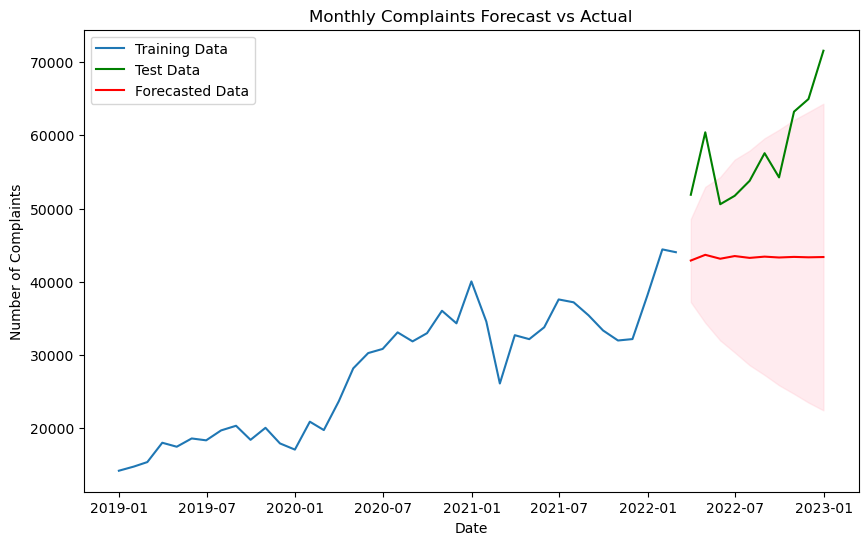

Mean Absolute Error: 14662.77923451206
Mean Squared Error: 256916020.17217654
Root Mean Squared Error: 16028.600069007167


In [15]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split the data into training and test sets
train_size = int(len(monthly_complaints) * 0.8) # for example, using 80% of data for training
train, test = monthly_complaints[0:train_size], monthly_complaints[train_size:]

# Fit the ARIMA model on the training set
arima_model = ARIMA(train, order=(1, 1, 1))
arima_results = arima_model.fit()

# Forecast the next 'n' months, where 'n' is the length of the test set
forecast = arima_results.get_forecast(steps=len(test))

# Plot the forecast alongside historical data
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data', color='green')
plt.plot(forecast.predicted_mean, label='Forecasted Data', color='red')
plt.fill_between(forecast.conf_int().index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Monthly Complaints Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.show()

# Calculate performance metrics
mae = mean_absolute_error(test, forecast.predicted_mean[:len(test)])
mse = mean_squared_error(test, forecast.predicted_mean[:len(test)])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


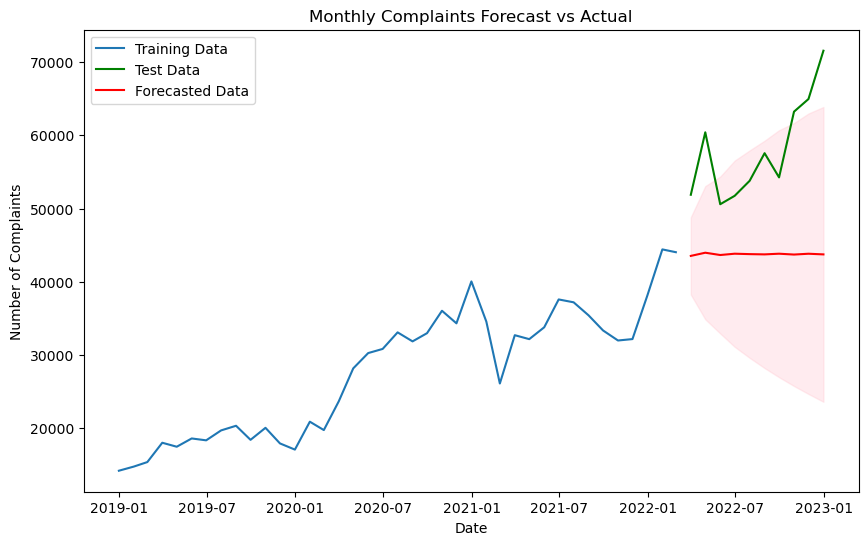

Mean Absolute Error: 14236.724230770435
Mean Squared Error: 245218114.86004996
Root Mean Squared Error: 15659.441716103738


In [20]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


# Split the data into training and test sets
train_size = int(len(monthly_complaints) * 0.8) # for example, using 80% of data for training
train, test = monthly_complaints[0:train_size], monthly_complaints[train_size:]

# Fit the ARIMA model on the training set with increased iterations using method_kwargs
arima_model = ARIMA(train, order=(2, 1, 2))
arima_results = arima_model.fit(method_kwargs={"maxiter": 500, "disp": 0})




# Forecast the next 'n' months, where 'n' is the length of the test set
forecast = arima_results.get_forecast(steps=len(test))

# Plot the forecast alongside historical data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data', color='green')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecasted Data', color='red')
plt.fill_between(forecast.conf_int().index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Monthly Complaints Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.show()

# Calculate performance metrics
mae = mean_absolute_error(test, forecast.predicted_mean[:len(test)])
mse = mean_squared_error(test, forecast.predicted_mean[:len(test)])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


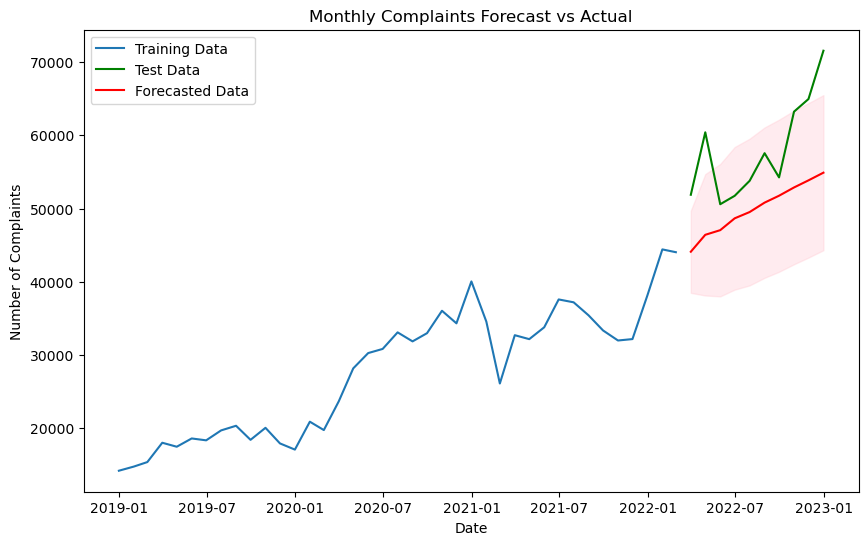

Mean Absolute Error: 8004.012074951155
Mean Squared Error: 85670114.34050556
Root Mean Squared Error: 9255.81516347996


In [22]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


# Split the data into training and test sets
train_size = int(len(monthly_complaints) * 0.8) # for example, using 80% of data for training
train, test = monthly_complaints[0:train_size], monthly_complaints[train_size:]

# Fit an ARIMA model with a trend component
arima_model_with_trend = ARIMA(train, order=(2, 1, 2), trend='t')  # 't' denotes a linear trend
arima_results_with_trend = arima_model_with_trend.fit()

# Forecast the next 'n' months, where 'n' is the length of the test set
forecast = arima_results_with_trend.get_forecast(steps=len(test))


# Plot the forecast alongside historical data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data', color='green')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecasted Data', color='red')
plt.fill_between(forecast.conf_int().index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Monthly Complaints Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.show()

# Calculate performance metrics
mae = mean_absolute_error(test, forecast.predicted_mean[:len(test)])
mse = mean_squared_error(test, forecast.predicted_mean[:len(test)])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


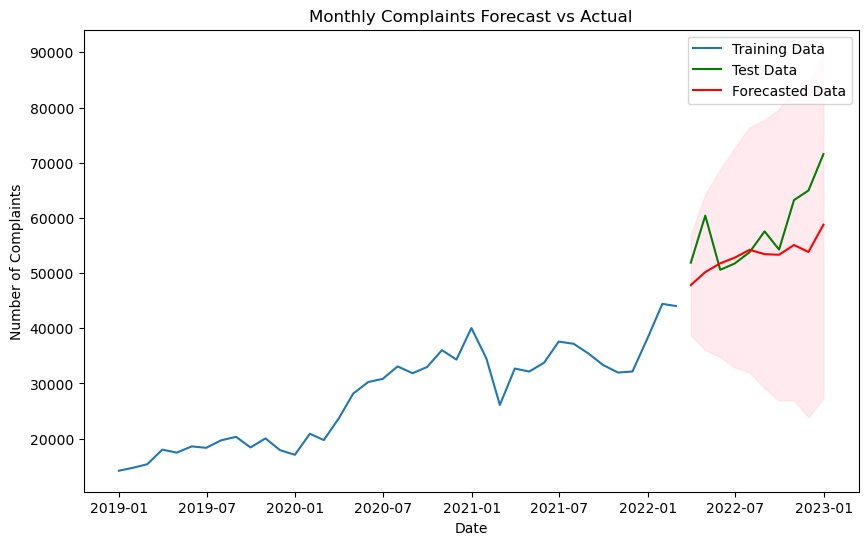

Mean Absolute Error: 5406.215656615262
Mean Squared Error: 49537397.945446014
Root Mean Squared Error: 7038.280894184745


In [25]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


# Split the data into training and test sets
train_size = int(len(monthly_complaints) * 0.8) # for example, using 80% of data for training
train, test = monthly_complaints[0:train_size], monthly_complaints[train_size:]

#  's' is the number of periods per season, e.g., 12 for monthly data with yearly seasonality
s = 12

# Fit a SARIMA model
sarima_model = SARIMAX(train, order=(2, 1, 2), seasonal_order=(1, 1, 1, s), trend='t')
sarima_results = sarima_model.fit()

# Fit a simplified SARIMA model by reducing seasonal order parameters
#sarima_model = SARIMAX(train, order=(2, 1, 2), seasonal_order=(0, 1, 0, s), trend='t')
#sarima_results = sarima_model.fit(method_kwargs={"maxiter": 1000, "disp": 0})

# Forecast the next 'n' months, where 'n' is the length of the test set
forecast = sarima_results.get_forecast(steps=len(test))


# Plot the forecast alongside historical data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data', color='green')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecasted Data', color='red')
plt.fill_between(forecast.conf_int().index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Monthly Complaints Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.show()

# Calculate performance metrics
mae = mean_absolute_error(test, forecast.predicted_mean[:len(test)])
mse = mean_squared_error(test, forecast.predicted_mean[:len(test)])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


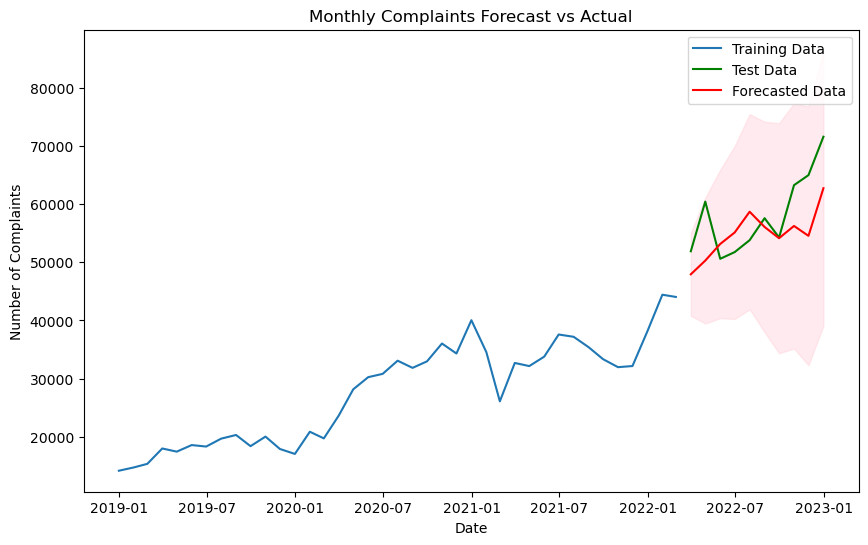

Mean Absolute Error: 5280.666624539941
Mean Squared Error: 39844402.6061926
Root Mean Squared Error: 6312.2422803780755


In [26]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


# Split the data into training and test sets
train_size = int(len(monthly_complaints) * 0.8) # for example, using 80% of data for training
train, test = monthly_complaints[0:train_size], monthly_complaints[train_size:]

s = 12

# Fit a SARIMA model
#sarima_model = SARIMAX(train, order=(2, 1, 2), seasonal_order=(1, 1, 1, s), trend='t')
#sarima_results = sarima_model.fit()

# Fit a simplified SARIMA model by reducing seasonal order parameters
sarima_model = SARIMAX(train, order=(2, 1, 2), seasonal_order=(0, 1, 0, s), trend='t')
sarima_results = sarima_model.fit(maxiter=1000)


# Forecast the next 'n' months, where 'n' is the length of the test set
forecast = sarima_results.get_forecast(steps=len(test))


# Plot the forecast alongside historical data
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data', color='green')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecasted Data', color='red')
plt.fill_between(forecast.conf_int().index,
                 forecast.conf_int().iloc[:, 0],
                 forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Monthly Complaints Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.show()

# Calculate performance metrics
mae = mean_absolute_error(test, forecast.predicted_mean[:len(test)])
mse = mean_squared_error(test, forecast.predicted_mean[:len(test)])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')